# Enem data 2018

- This notebook aims to analyse the data related to the national exame for enrolling the public univerties in Brazil, ENEM (Exame Nacional do Ensino Médio - *National exame for High School*).

- information about the meaning of each column is given in */microdados_enem2018/DICIONÁRIO/Dicionário_Microdados_Enem_2018.xlsx*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


pd.options.display.float_format = "{:,.2f}".format

The data is huge. Therefore, we are going to analyze
the first 1000 rows, make the EDA onto them and preparing it
before doing it for the entire df.

In [2]:
df2018 = pd.read_csv('DADOS/MICRODADOS_ENEM_2018.csv',
                     nrows = 100000, sep = ';', encoding = 'ISO-8859-1')

In [3]:
df2018.head(10)

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  \
0  180008202043    2018                  5300108                Brasília   
1  180007197856    2018                  2111102      São João dos Patos   
2  180008517434    2018                  3530607         Mogi das Cruzes   
3  180007661228    2018                  2916401              Itapetinga   
4  180008787987    2018                  2918100               Jeremoabo   
5  180007239581    2018                  2507507             João Pessoa   
6  180007198225    2018                  3171709                Virgínia   
7  180008090447    2018                  2207702                Parnaíba   
8  180008257068    2018                  2304400               Fortaleza   
9  180008202044    2018                  5103403                  Cuiabá   

   CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  \
0                53               DF     44.00       M             1.00   
1                21               MA     23.00       F             0.00   
2                35               SP     23.00       F             0.00   
3                29               BA     26.00       F             0.00   
4                29               BA     20.00       M             0.00   
5                25               PB     23.00       F             0.00   
6                31               MG     35.00       F             0.00   
7                22               PI     39.00       M             1.00   
8                23               CE     19.00       M             0.00   
9                51               MT     25.00       F             0.00   

   TP_COR_RACA  ...  Q018  Q019 Q020  Q021 Q022  Q023  Q024  Q025  Q026  Q027  
0            1  ...     A     A    A     A    A     A     A     A     B     A  
1            3  ...     A     B    A     A    B     A     A     A     A     A  
2            1  ...     A     B    A     A    B     B     B     B     A     A  
3            3  ...     A     B    B     A    C     A     B     B     A     A  
4            0  ...     A     B    A     A    B     A     B     B     B     A  
5            1  ...     A     B    A     A    B     A     B     B     A     A  
6            1  ...     A     C    A     A    B     A     B     B     A     A  
7            3  ...     A     C    B     A    B     A     B     B     A     A  
8            3  ...     A     B    B     A    B     A     A     A     B     A  
9            3  ...     A     B    A     A    B     A     A     A     A     A  

[10 rows x 137 columns]

In [4]:
## All the columns that we have ##

## The information given by each column can be found in 'DICIONÁRIO DE VARIÁVEIS - ENEM 2018' ##

df2018.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

There are several columns which do not contribute for a first
analysis of the dataset. Let's drop out some of them right below
to clean it up a bit and let's take a closer look on it. These
columns can be picked up later from the original dataframe.

Most of the columns dropped at first are those related to enrollment
number, questions, type of the test, location of the test, etc...

In [5]:
columns_to_be_dropped = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
                         'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007',
                         'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
                         'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
                         'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027',
                         'CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
                         'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
                         'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
                         'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 
                         'TX_GABARITO_LC','TX_GABARITO_MT', 'TP_STATUS_REDACAO',
                         'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
                         'NU_NOTA_COMP5', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
                         'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA',
                         'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA',
                         'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF',
                         'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
                         'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
                         'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS','IN_LEITURA_LABIAL',
                         'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA',
                         'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO',
                         'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO',
                         'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
                         'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA',
                         'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL',
                         'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO',
                         'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL'
                        ]

df2018_new = df2018.copy().drop(columns = columns_to_be_dropped)

In [6]:
## Checking that it worked ##

print (len(df2018_new))

df2018_new.head()

100000


NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE  \
0                Brasília                53               DF     44.00   
1      São João dos Patos                21               MA     23.00   
2         Mogi das Cruzes                35               SP     23.00   
3              Itapetinga                29               BA     26.00   
4               Jeremoabo                29               BA     20.00   

  TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
0       M             1.00            1                 0   
1       F             0.00            3                 1   
2       F             0.00            1                 1   
3       F             0.00            3                 2   
4       M             0.00            0                 1   

   CO_MUNICIPIO_NASCIMENTO NO_MUNICIPIO_NASCIMENTO  ...  TP_SIT_FUNC_ESC  \
0                      nan                     NaN  ...             1.00   
1             2,111,102.00      São João dos Patos  ...              nan   
2             4,209,300.00                   Lages  ...              nan   
3                      nan                     NaN  ...              nan   
4             2,800,308.00                 Aracaju  ...             1.00   

  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  NU_NOTA_CN  \
0           0.00            0.00            0.00            0.00         nan   
1           1.00            1.00            1.00            1.00      521.00   
2           0.00            0.00            0.00            0.00         nan   
3           0.00            0.00            0.00            0.00         nan   
4           0.00            1.00            1.00            0.00         nan   

   NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT NU_NOTA_REDACAO  
0         nan         nan         nan             nan  
1      568.70      513.10      480.30          280.00  
2         nan         nan         nan             nan  
3         nan         nan         nan             nan  
4      419.90      345.80         nan          360.00  

[5 rows x 34 columns]

In [7]:
## The remaining columns are the following 

df2018_new.columns.values

array(['NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO'], dtype=object)

In [8]:
## Playing a bit with the dataset

## We can check the 10 youngest and 10 oldest people in this sample by doing

df2018_new.sort_values(by = ['NU_IDADE']).head(10)

NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE  \
66258                   Butiá                43               RS     12.00   
30193    Monte Santo de Minas                31               MG     13.00   
65245                Itamonte                31               MG     14.00   
66069                Dourados                50               MS     14.00   
35739                     Jaú                35               SP     14.00   
43508             Nova Iguaçu                33               RJ     14.00   
98130              Uberlândia                31               MG     14.00   
69323                Igarassu                26               PE     14.00   
18162                  Maceió                27               AL     14.00   
71969             Porto Velho                11               RO     14.00   

      TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
66258       F             0.00            1                 1   
30193       F             0.00            3                 1   
65245       F             0.00            1                 1   
66069       M             0.00            1                 1   
35739       F             0.00            1                 1   
43508       M             0.00            2                 1   
98130       F             0.00            1                 1   
69323       F             0.00            3                 1   
18162       M             0.00            2                 1   
71969       M             0.00            1                 1   

       CO_MUNICIPIO_NASCIMENTO NO_MUNICIPIO_NASCIMENTO  ...  TP_SIT_FUNC_ESC  \
66258             4,302,709.00                   Butiá  ...              nan   
30193             3,143,203.00    Monte Santo de Minas  ...              nan   
65245             3,133,006.00                Itamonte  ...              nan   
66069             5,003,702.00                Dourados  ...              nan   
35739             3,525,300.00                     Jaú  ...              nan   
43508             3,304,557.00          Rio de Janeiro  ...              nan   
98130             3,170,206.00              Uberlândia  ...              nan   
69323             2,609,600.00                  Olinda  ...              nan   
18162             2,704,302.00                  Maceió  ...              nan   
71969             1,302,603.00                  Manaus  ...              nan   

      TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
66258           0.00            1.00            1.00            0.00   
30193           1.00            1.00            1.00            1.00   
65245           1.00            1.00            1.00            1.00   
66069           0.00            0.00            0.00            0.00   
35739           1.00            1.00            1.00            1.00   
43508           1.00            1.00            1.00            1.00   
98130           1.00            1.00            1.00            1.00   
69323           1.00            1.00            1.00            1.00   
18162           1.00            1.00            1.00            1.00   
71969           1.00            1.00            1.00            1.00   

       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT NU_NOTA_REDACAO  
66258         nan      462.80      490.40         nan          600.00  
30193      492.70      456.30      501.40      464.00          840.00  
65245      441.30      587.70      505.90      579.10          340.00  
66069         nan         nan         nan         nan             nan  
35739      534.80      633.80      516.80      516.20          420.00  
43508      492.00      661.10      594.30      520.20          600.00  
98130      542.40      631.20      582.10      638.50          480.00  
69323      366.70      540.20      457.60      586.80          580.00  
18162      488.90      419.30      422.70      435.30          280.00  
71969      402.50      634.10      59

In [9]:
df2018_new.sort_values(by = ['NU_IDADE'], ascending = False).head(10)

NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE  \
64523                 Goiânia                52               GO     86.00   
25792                   Natal                24               RN     78.00   
87137          Rio de Janeiro                33               RJ     76.00   
32016               Fortaleza                23               CE     76.00   
91504         Duque de Caxias                33               RJ     73.00   
93974               São Paulo                35               SP     72.00   
95613               Fortaleza                23               CE     70.00   
38655       Santa Cruz do Sul                43               RS     70.00   
79832                Salvador                29               BA     70.00   
90140                   Natal                24               RN     70.00   

      TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
64523       M             1.00            1                 1   
25792       M             1.00            1                 1   
87137       F             3.00            2                 1   
32016       F             1.00            1                 1   
91504       M             1.00            1                 1   
93974       M             1.00            1                 3   
95613       M             1.00            3                 1   
38655       M             2.00            1                 1   
79832       M             0.00            5                 1   
90140       M             1.00            1                 3   

       CO_MUNICIPIO_NASCIMENTO NO_MUNICIPIO_NASCIMENTO  ...  TP_SIT_FUNC_ESC  \
64523             3,166,808.00        Serra do Salitre  ...              nan   
25792             2,408,102.00                   Natal  ...              nan   
87137             3,304,557.00          Rio de Janeiro  ...              nan   
32016             2,304,400.00               Fortaleza  ...              nan   
91504             3,142,106.00               Miradouro  ...              nan   
93974                      nan                     NaN  ...              nan   
95613             2,304,400.00               Fortaleza  ...              nan   
38655             4,217,600.00             Siderópolis  ...              nan   
79832             2,927,408.00                Salvador  ...              nan   
90140                      nan                     NaN  ...              nan   

      TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
64523           1.00            1.00            1.00            1.00   
25792           1.00            1.00            1.00            1.00   
87137           1.00            1.00            1.00            1.00   
32016           0.00            0.00            0.00            0.00   
91504           1.00            1.00            1.00            1.00   
93974           0.00            0.00            0.00            0.00   
95613           1.00            1.00            1.00            1.00   
38655           1.00            1.00            1.00            1.00   
79832           1.00            1.00            1.00            1.00   
90140           1.00            1.00            1.00            1.00   

       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT NU_NOTA_REDACAO  
64523      443.30      603.10      577.90      396.50          440.00  
25792      497.60      667.70      560.40      662.40          660.00  
87137      434.70      461.50      398.70      393.30            0.00  
32016         nan         nan         nan         nan             nan  
91504      479.80      467.30      528.20      400.80          480.00  
93974         nan         nan         nan         nan             nan  
95613      524.90      621.60      410.50      480.70          220.00  
38655      449.50      594.70      469.60      529.60          560.00  
79832      545.80      639.40      505.80      547.90          400.00  
90140      596.10      622.90      57

This information is quite interesting. Indeed, despite of having
very young people trying to get into the University (like 14 yo,
the youngest being 12 yo), probably a good part of it is doing
it for training. However, there is a good amount (and this is
only a sample) people older than 70 years old doing ENEM and
they have no reason for doing so if not trying to get into
the University!

Let's analyze the distribution of ages per state.

In [10]:
df2018_new_bystate = df2018_new.groupby('SG_UF_RESIDENCIA')

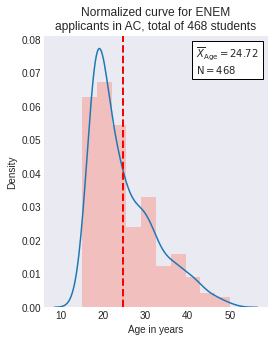

In [11]:
from matplotlib.offsetbox import AnchoredText

plt.style.use('seaborn-dark')

## TEST HISTOGRAM FOR THE ENTIRE COUNTRY BELOW ##

for state, dataframe in df2018_new_bystate:
    fig, ax = plt.subplots(figsize = (4,5))
    n_students = len(dataframe)
    mean = dataframe.NU_IDADE.mean()
    median = dataframe.NU_IDADE.median()
    std = dataframe.NU_IDADE.std()
    
    sns.distplot(dataframe['NU_IDADE'], bins = 10, hist_kws={'color' : 'salmon'})
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    
    ax.set_xlabel('Age in years')
    ax.set_title('Normalized curve for ENEM\napplicants in %s, total of %s students' %(state, n_students))
    
    info = '\n'.join((
    r'$\overline{X}_\mathrm{Age}=%.2f$' % (mean, ),
    r'$\mathrm{N}=%.0f$' % (n_students, )))
    
    anchored_text = AnchoredText(info, loc=1)
    ax.add_artist(anchored_text)

    break

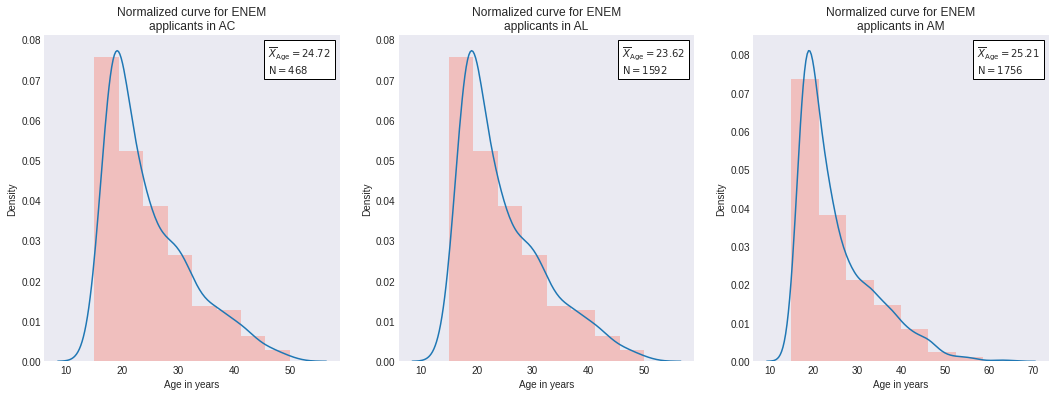

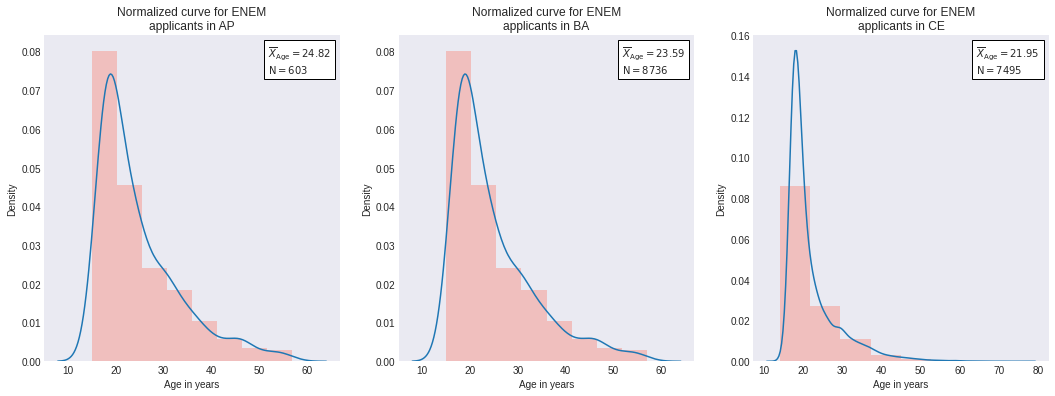

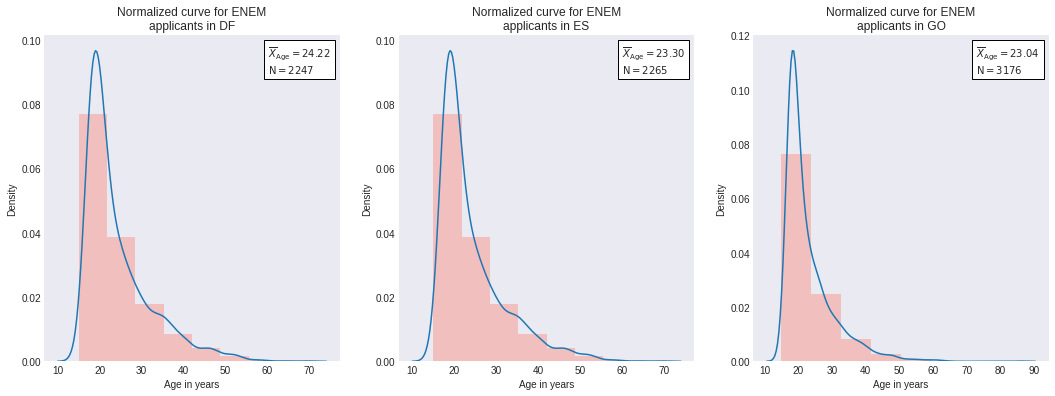

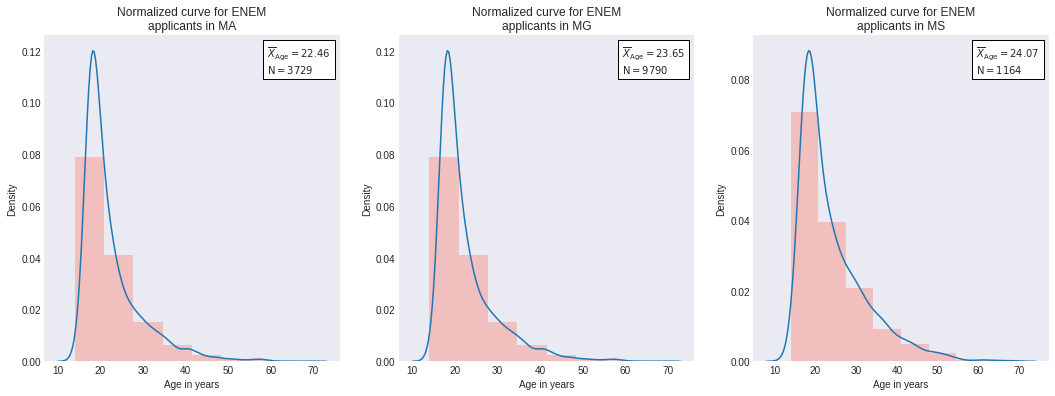

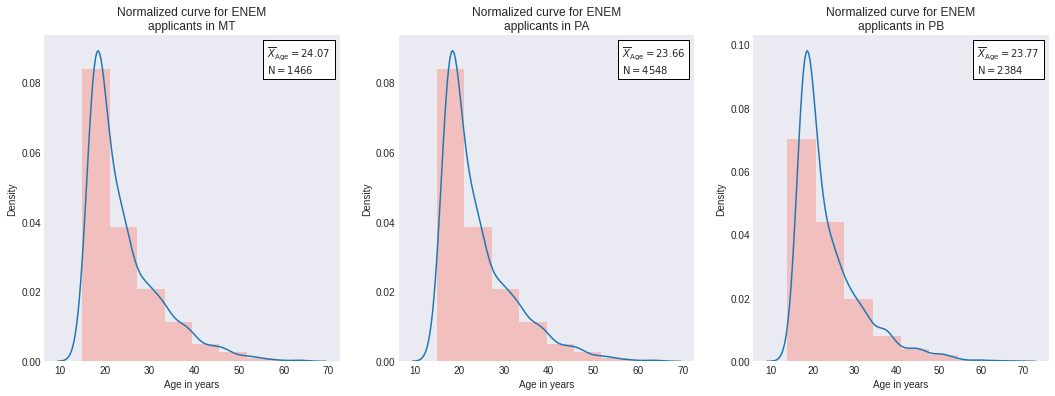

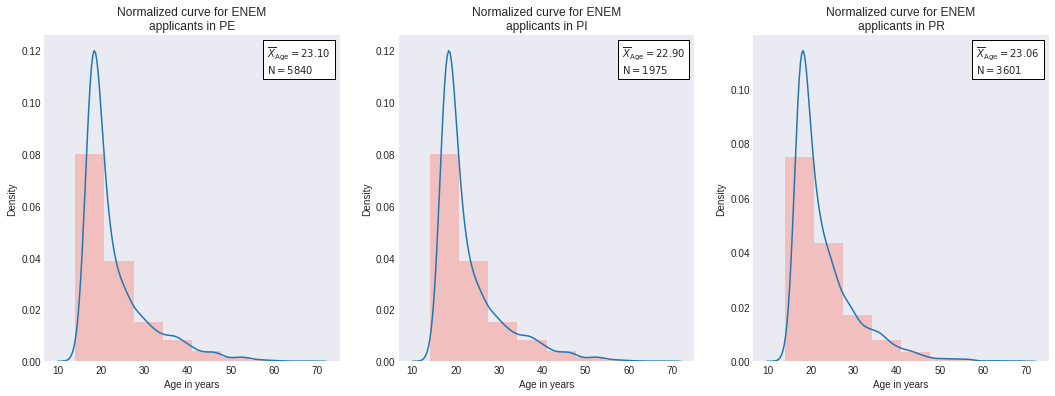

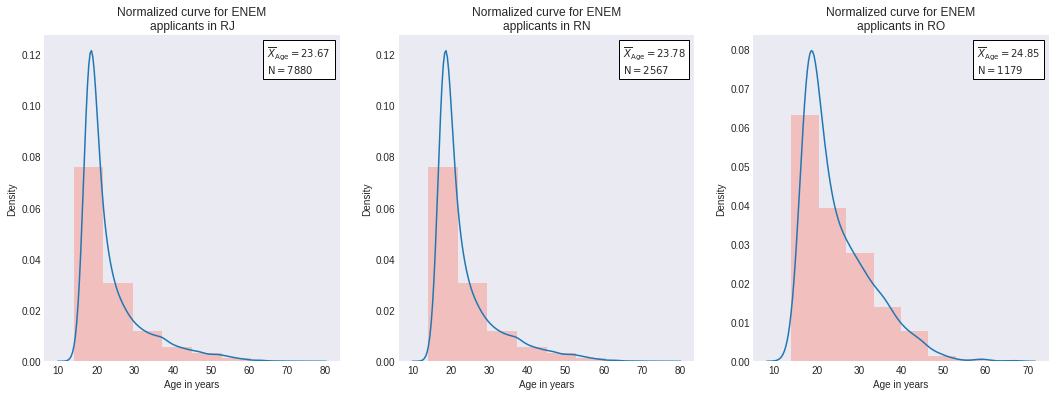

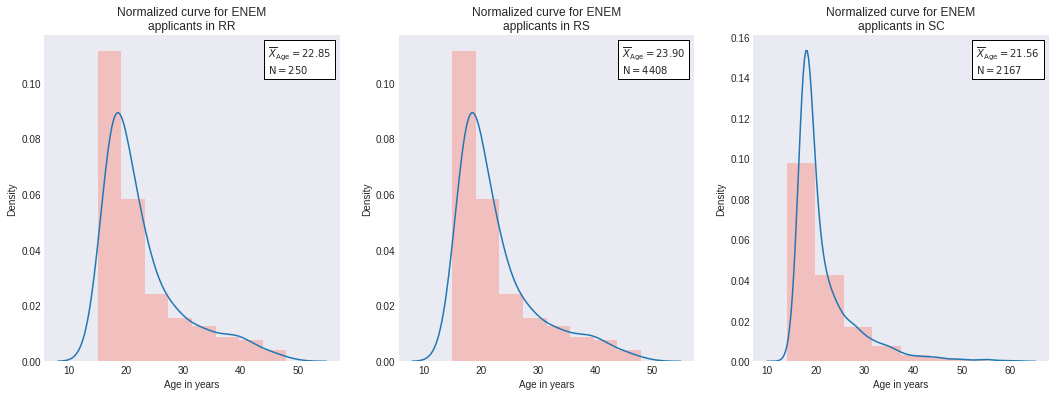

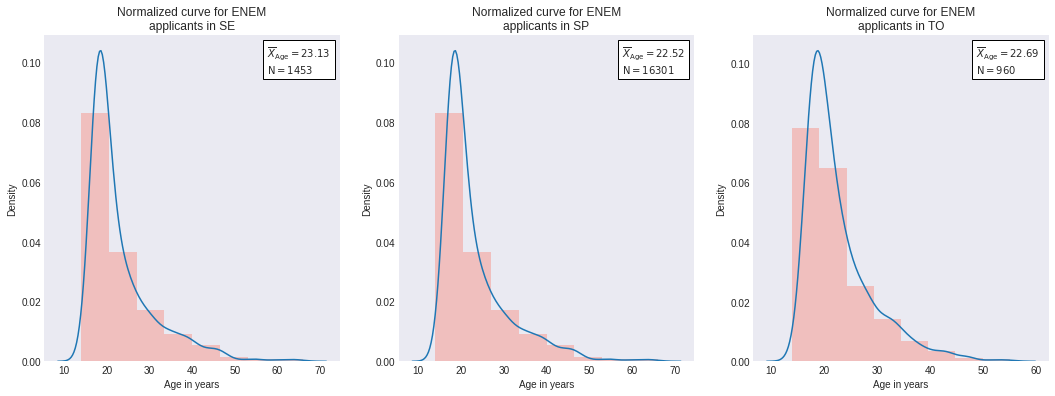

In [12]:
states = pd.Series(df2018.copy().
                   SG_UF_RESIDENCIA
                   .unique()).sort_values().reset_index(drop = True)

## Since we have 27 states, let's split them into three columns and 9 rows.
## To do so, let's loop over three axes each time

for i in range(int(len(states)/3)):
    fig, ax = plt.subplots(1, 3, figsize = (18,6))
    
    # Creating the first histogram of the ith row
    data0 = df2018_new_bystate.get_group(states[3*i]).NU_IDADE
    n_students = len(data0)
    mean = data0.mean()
    std = data0.std()
    
    ## BOX WITH STATISTICAL INFORMATION 
    info = '\n'.join((
    r'$\overline{X}_\mathrm{Age}=%.2f$' % (mean, ),
    r'$\mathrm{N}=%.0f$' % (n_students, )))
    
    ## ADDIND THE ARTIST
    anchored_text = AnchoredText(info, loc=1)
    ax[0].add_artist(anchored_text)
    
    ## PLOTTING THE HISTOGRAM
    sns.distplot(data0, ax = ax[0], bins = 8, hist_kws={'color' : 'salmon'})
    ax[0].set_xlabel('Age in years')
    ax[0].set_title('Normalized curve for ENEM\napplicants in %s'%states[3*i])
    
    # Creating the second histogram of the ith row
    data1 = df2018_new_bystate.get_group(states[3*i+1]).NU_IDADE
    n_students = len(data1)
    mean = data1.mean()
    std = data1.std()
    
    ## BOX WITH STATISTICAL INFORMATION     
    info = '\n'.join((
    r'$\overline{X}_\mathrm{Age}=%.2f$' % (mean, ),
    r'$\mathrm{N}=%.0f$' % (n_students, )))
    
    ## ADDIND THE ARTIST
    anchored_text = AnchoredText(info, loc=1)
    ax[1].add_artist(anchored_text)
    
    ## PLOTTING THE HISTOGRAM
    sns.distplot(data0, ax = ax[1], bins = 8, hist_kws={'color' : 'salmon'})
    ax[1].set_xlabel('Age in years')
    ax[1].set_title('Normalized curve for ENEM\napplicants in %s'%states[3*i+1])
    
    # Creating the third histogram of the ith row
    data2 = df2018_new_bystate.get_group(states[3*i+2]).NU_IDADE
    n_students = len(data2)
    mean = data2.mean()
    std = data2.std()
    
    ## BOX WITH STATISTICAL INFORMATION     
    info = '\n'.join((
    r'$\overline{X}_\mathrm{Age}=%.2f$' % (mean, ),
    r'$\mathrm{N}=%.0f$' % (n_students, )))
    
    ## ADDIND THE ARTIST
    anchored_text = AnchoredText(info, loc=1)
    ax[2].add_artist(anchored_text)
    
    ## PLOTTING THE HISTOGRAM
    sns.distplot(data2, ax = ax[2], bins = 8, hist_kws={'color' : 'salmon'})
    ax[2].set_xlabel('Age in years')
    ax[2].set_title('Normalized curve for ENEM\napplicants in %s'%states[3*i+2])

By this sample of $N=100.000$ people, we can analyze few interesting points:
one of them, already expected, is that all of them are right-skewer distributions.
That is expected since most people try to get into the university at the beginning
of their adult lives, between 15-25 years old. It is interesting noting that there
are people, older than 30-40 years old which are still trying. By the histograms
we can see that it is a general trend observed througout all the states.

In [13]:
df_age_state = df2018_new[['NU_IDADE', 'SG_UF_RESIDENCIA']].copy()

df_age_state.sort_values(by = ['NU_IDADE'], ascending = False).head(10)

NU_IDADE SG_UF_RESIDENCIA
64523     86.00               GO
25792     78.00               RN
87137     76.00               RJ
32016     76.00               CE
91504     73.00               RJ
93974     72.00               SP
95613     70.00               CE
38655     70.00               RS
79832     70.00               BA
90140     70.00               RN

In [14]:
## Let's analyse the distribution of number of students per state and older people,
## say, older than 30 still trying ENEM ##

df_age_state_gb = df_age_state.groupby('SG_UF_RESIDENCIA')

df_age_state_count = pd.DataFrame(columns = ['State', 'Number_applicants', 'Older_than_30'])

for state, dataframe in df_age_state_gb:
    total = len(dataframe)
    older_30 = len(dataframe[dataframe['NU_IDADE'] >= 30])
    
    df_age_state_count = df_age_state_count.append({'State': state,
                                                    'Number_applicants': total,
                                                    'Older_than_30': older_30}, ignore_index = True)

In [15]:
# Let's sort it by the number ot total applicants

df_age_state_count.sort_values(by = 'Number_applicants', ascending = False, inplace = True)
df_age_state_count.reset_index(inplace = True)
df_age_state_count.drop('index', axis = 1, inplace = True)

In [16]:
df_age_state_count.head()

State Number_applicants Older_than_30
0    SP             16301          2305
1    MG              9790          1653
2    BA              8736          1521
3    RJ              7880          1378
4    CE              7495           918

In [17]:
percentage = 100*df_age_state_count.Older_than_30/df_age_state_count.Number_applicants

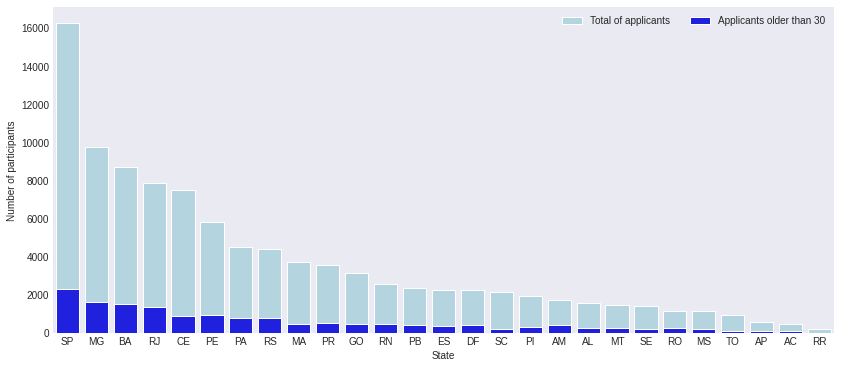

In [18]:
fig, ax = plt.subplots(figsize = (14,6))

sns.barplot(x = df_age_state_count.State,
            y = df_age_state_count.Number_applicants,
            color = 'lightblue', edgecolor = 'w',
           label = 'Total of applicants')

bar_plot_older = sns.barplot(x = df_age_state_count.State,
            y = df_age_state_count.Older_than_30,
            color = 'blue', edgecolor = 'w',
           label = 'Applicants older than 30')

ax.set_ylabel('Number of participants')
ax.legend(ncol = 2, loc = 'upper right')


plt.show()

Now we can make an analysis regarding the grades of the applicants per gender.
For doing so, we need to keep the columns [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC,NU_NOTA_MT],
which hold for natural science, human science, communication (including Porguese and Foreign Language)
and Math, respectively. The chosen foreign Language is in [TP_LINGUA] (0 for English
and 1 for Spanish). The essay is given in [NU_NOTA_REDACAO].

The gender is indicated in [TP_SEXO]

In [19]:
df_gender = df2018.copy()[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_SEXO']]

In [20]:
# Let's take a look on the data

df_gender.head(10)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO TP_SEXO
0         nan         nan         nan         nan              nan       M
1      521.00      568.70      513.10      480.30           280.00       F
2         nan         nan         nan         nan              nan       F
3         nan         nan         nan         nan              nan       F
4         nan      419.90      345.80         nan           360.00       M
5      461.80      564.00      466.80      538.80           580.00       F
6         nan         nan         nan         nan              nan       F
7      499.30      663.20      605.20      733.80           680.00       M
8      411.80      429.80      445.20      459.00           340.00       M
9      469.40      650.20      606.60      525.40           740.00       F

There are a good amount of people which seem to not have done some of the
tests (simply given it in blank or missed the test due to some reason).
An interesting point to be addressed is that the essay test corresponds
to a big amount of the grade assigned to the applicant. Let's check how
many students have got essentially zero in the essay test.

In [21]:
df_gender.isna().sum()

NU_NOTA_CN         26949
NU_NOTA_CH         22688
NU_NOTA_LC         22688
NU_NOTA_MT         26949
NU_NOTA_REDACAO    22688
TP_SEXO                0
dtype: int64

In [22]:
## 22,7% of the students got zero (for missing the test day or handling it in blank)!!
df_gender.NU_NOTA_REDACAO[df_gender.NU_NOTA_REDACAO == 0].count()

1479

Despite of being a small number, 1479 people got grade zero in the essay test,
22688 handled it in blank or didn't make it on time for the test), it adds
up to 24167 of people which dind't grade in it! It is basically 1/4 of the applicants!

Now let's analyze the grade distribution per gender, as we motivated previously.
As the essay grade is more relevant for several reasons, for example, if you
got a zero in it (or if it has a NaN value), you won't be able to participate
in several undergraduate supporting programs  offered by the Brazilian government.

Therefore, we are going to delete from the list those applicants 
which didn't scored in it.

In [23]:
#Firstly, let's convert the string "nan" into a np.NaN

def converter(element):
    if element == 'nan':
        return np.NaN
    return element

df_gender = df_gender.applymap(converter)

df_gender = df_gender[df_gender.NU_NOTA_REDACAO.notna() & df_gender.NU_NOTA_REDACAO != 0]

print (len(df_gender))

75833


In [24]:
gender_gb = df_gender.groupby('TP_SEXO')

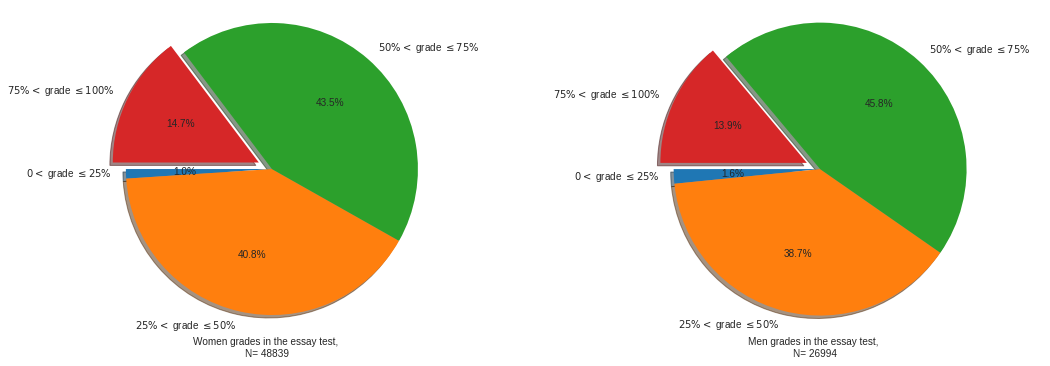

In [25]:
gender_dict = {'F': 'Women', 'M': 'Men'}

fig, ax = plt.subplots(1, 2, figsize = (18,6))

i = 0 
for gender, dataframe in gender_gb:
    grade = dataframe.NU_NOTA_REDACAO
    gender_name = gender_dict[gender]
    
    grade_0_25 = len(dataframe[(0 < grade) & (grade <= 250)])
    grade_25_50 = len(dataframe[(250 < grade) & (grade <= 500)])
    grade_50_75 = len(dataframe[(500 < grade) & (grade <= 750)])
    grade_75_100 = len(dataframe[(750 < grade) & (grade <= 1000)])
    
    sizes = [grade_0_25, grade_25_50, grade_50_75, grade_75_100]
    score = '$0 <$ grade $\leq 25\%$', '$25\% <$ grade $\leq 50\%$', '$50\% <$ grade $\leq 75\%$', '$75\% <$ grade $\leq 100\%$'
    
    ax[i].pie(sizes, explode = (0, 0, 0, 0.1), labels = score, autopct='%1.1f%%',shadow=True, startangle=180)
    ax[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax[i].set_xlabel('%s grades in the essay test, \nN= %s'% (gender_name, len(dataframe)) )
    i += 1
    

From the analysis above we observe that there are almost as twice as women
doing the text compared to men. We observe that, percentage-wise, women
are doing slightly better than the men group when analyzing the highest
score group. There are a little less than one percent of women within
the group which scored $75%$ or higher in the test. When one compares
the lower side, only $1%$ of women scored less than $25%$
whereas within the men group $1.6%$ scored less than $25%$. In the bulk
of the distribution, we observe that they are also pretty similar. It leads
us to the conclusion that gender is not a determinant factor for those which
write well or not. 

We can also make an histogram of the grade of the same people, by group, in
each of the the studying fields, science, math, etc... For doing so, let's
make two histograms on top of each other (for girls (blue) and boys (pink)),
for each of subject.

In [26]:
df_gender.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO TP_SEXO
1      521.00      568.70      513.10      480.30           280.00       F
4         nan      419.90      345.80         nan           360.00       M
5      461.80      564.00      466.80      538.80           580.00       F
7      499.30      663.20      605.20      733.80           680.00       M
8      411.80      429.80      445.20      459.00           340.00       M

NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC,NU_NOTA_MT] stands for natural science, human science, communication (including Porguese and Foreign Language) and Math, respectively. The chosen foreign Language is in [TP_LINGUA] (0 for English and 1 for Spanish). The essay is given in [NU_NOTA_REDACAO].

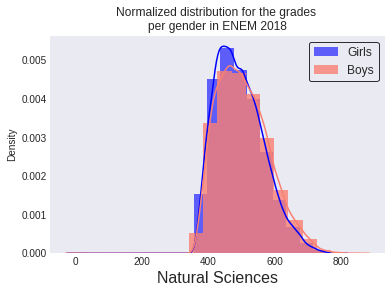

In [27]:
dict_subject = {'NU_NOTA_CN' : 'Natural Sciences', 'NU_NOTA_CH' : 'Human Sciences',
                'NU_NOTA_LC' : 'Language and communications',
                'NU_NOTA_MT' : 'Mathematics'}
dict_gender = {'F' : 'Girls', 'M' : 'Boys'}

## TEST FOR THE GENDER DISTRIBUTION

test_df = df_gender[['NU_NOTA_CN', 'TP_SEXO']].copy()

fig, ax = plt.subplots()
    

sns.distplot(test_df[test_df['TP_SEXO'] == 'F'].NU_NOTA_CN,
            bins = 20, color = 'b', hist_kws = {'alpha' : 0.6},
            label = 'Girls'
            )


sns.distplot(test_df[test_df['TP_SEXO'] == 'M'].NU_NOTA_CN,
            bins = 20, color = 'salmon', hist_kws = {'alpha' : 0.8},
            label = 'Boys'
            )

ax.set_xlabel(dict_subject['NU_NOTA_CN'], fontsize = 16)
ax.legend(frameon=True, fontsize = 12).get_frame().set_edgecolor('black')
ax.set_title('Normalized distribution for the grades \nper gender in ENEM 2018')

plt.show()

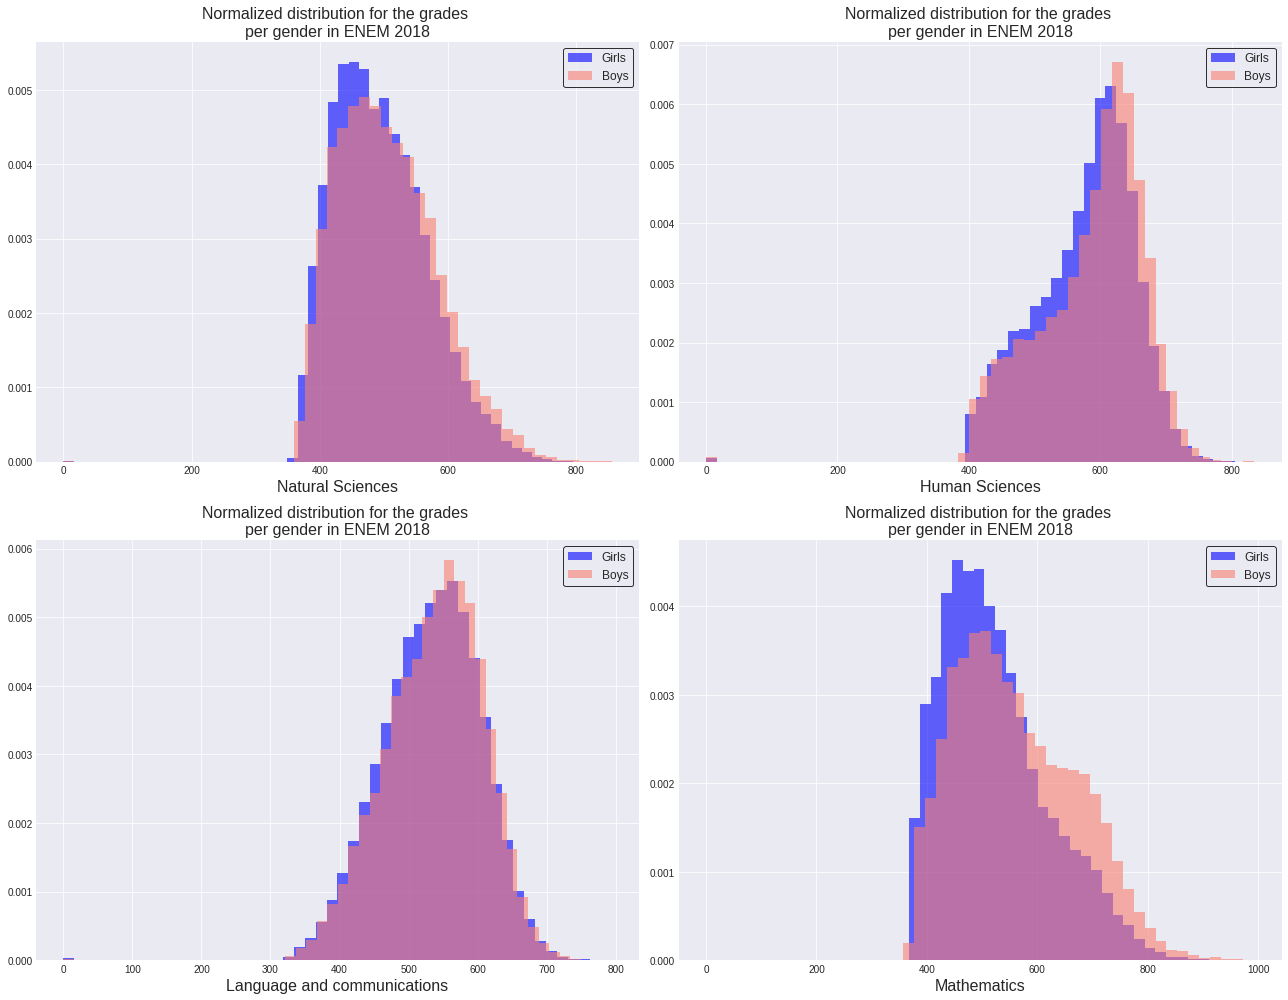

In [28]:
fig, ax = plt.subplots(2,2, figsize = (18,14))


def plot_function(subject,axs):
    
    
    data_girls = df_gender[[subject, 'TP_SEXO']].copy().groupby('TP_SEXO').get_group('F')[subject]
    data_boys = df_gender[[subject, 'TP_SEXO']].copy().groupby('TP_SEXO').get_group('M')[subject]
    
    axs.hist(data_girls, bins = 50, color = 'blue', density = True, alpha = 0.6, label = 'Girls')
    axs.hist(data_boys, bins = 50, color = 'salmon', density = True, alpha = 0.6, label = 'Boys')
    axs.legend(frameon=True, fontsize = 12).get_frame().set_edgecolor('black')
    axs.set_title('Normalized distribution for the grades \nper gender in ENEM 2018', fontsize = 16)
    
    axs.grid()
    axs.set_xlabel(dict_subject[subject], fontsize = 16)
    
    
#NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC,NU_NOTA_MT

plot_function('NU_NOTA_CN', ax[0, 0])
plot_function('NU_NOTA_CH', ax[0, 1])
plot_function('NU_NOTA_LC', ax[1, 0])
plot_function('NU_NOTA_MT', ax[1, 1])

fig.tight_layout()

plt.show()

In the histograms ploted above we have used a normalized distribution since we already
know that there are as twice as women when compared to men. There are a couple of points
which caught our eyes. At first glance it is quite amazing how they follow the same trend,
**even** when one has a more peculiar shape, like in *human sciences*.

Taking an individual analysis on each subject: we observe that for natural sciences
the pick (the mode) of the distribution is bigger for women than for the men, telling us
that there are more women concentrated around the mode. When one goes towards the upper part of the
histogram it tells us that, **percentage-wise**, there are more men than women (do not
forget that as a whole there are more women than men).

When one considers *human sciences*, it is clearly a left-skwed distribution. It is very interesting
observing that even the trend (the shape of the histogram) for men and women are essentially
the same. Since it is skewed to the left, it tells that the bulk of the distribution is concentrated
on the left and, consequently the mean of it is on the left of the mode.

For *language and communication* there is not much to say, the histograms (for men and women)
are very similar as well and it is slightly skewed, but it could be a statistical fluctuation.

For *Math* things changed a bit. We again have a skewed distribution and for both (men and women)
the mode is around 500 points, telling us that the bigger concentration of people scored around
500 points. However, the average of the grades for men are further to the right (note the
"pronounced belly" of the curve for men). That shows that in math men are doing slightly better
than women in this sample of the population, average-wise.

- As we could have already expected that there would be essentially no difference between them, since we expect the gender to play no role in the difference between the grades of women and men. However, it is quite fascinating that the trend followed by the histograms for men and women are the same in each subject (even in those which acquired a different shape, like for human sciences)!



Now we are going to make an analysis of something which will probably play a very important role:
the social status of each applicant, for example, from which kind of school they come from,
if they have had access to preparatory courses, etc... As previously, there are a lot of interesting
information that we can take from it concerning the social status of each participant.
We are going to do several of them and aftwards let's analyze the correlation between them.

Firstly, let's analyse the distribution per skin color in public and private school and within
the group of public schools, let's split it in the three groups of: municipal, state and federal
schools. Despite of all three of them being managed by public institutions, they are different
in the sense of quality of classes. The municipal, state and federal schools are under the 
jurisdiction of the major (city), governor (state) and president (country), respectively.

In [29]:
df_school = df2018.copy()[['TP_COR_RACA', 'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_CN',
                           'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']]

In [30]:
df_school.head()

TP_COR_RACA  TP_ESCOLA  TP_DEPENDENCIA_ADM_ESC  NU_NOTA_CN  NU_NOTA_CH  \
0            1          2                    2.00         nan         nan   
1            3          1                     nan      521.00      568.70   
2            1          1                     nan         nan         nan   
3            3          1                     nan         nan         nan   
4            0          2                    2.00         nan      419.90   

   NU_NOTA_LC  NU_NOTA_MT  
0         nan         nan  
1      513.10      480.30  
2         nan         nan  
3         nan         nan  
4      345.80         nan

The information about skin color is contained in *TP_COR_RACA*.
The kind of school, private or public is contained in *TP_ESCOLA*.
Whether it is federal, state, municipal or private is contained
in *TP_DEPENDENCIA_ADM_ESC*. Let's create a dictionary mapping
the numbers therein the columns to what they mean in fact.

In [31]:
dict_skinc = {0 : 'no answer', 1 : 'white', 2 : 'black',
              3 : 'brown', 4 : 'yellow', 5 : 'indigean'}     ## skinc = skin color
dict_sch = {1 : 'no answer', 2 : 'public', 3 : 'private',
            4 : 'studied abroad'}                            ## sch = school
dict_sch_adm = {1 : 'federal', 2 : 'state', 3 : 'city',
                4 : 'private'}                               ## administrative competence of the school

## LET'S TAKE A CLOSER LOOK AT MORE DATA

In [32]:
df_school.TP_DEPENDENCIA_ADM_ESC.isna().sum()

80044

In [33]:
df_school.TP_ESCOLA[df_school.TP_ESCOLA == 1].sum()

81240

We observe that roughly 80% of the people didn't answer from which kind of school
they come from nor if it is federal, state or city. Therefore this analysis is
not possible to be done. Let's take a look on other features then.

> Q001 - studying level of the father

> Q002 - studying level of the mother

> Q006 - money earned per month for the entire family

> Q024 - computer at home

> Q025 - internet access


**For *Q001* and *Q002***

A	Never studied.

B	didn't complete the elementary school.

C	completed the emelentary school but didn't complete the secondary (middle) school.

D	completed the secondary school but didn't complete the high school.

E	completed the high school but didn't obtain an undergraduation degree.

F	obtained an undergradation certificate but not a graduation certificate.

G	obtained a graduation certificate.

H	do not know.

**For question *Q006***

A	no income.

B	up to R$ 954,00.

C	between R\\$ 954,01 and R$ 1.431,00.

D	between R\\$ 1.431,01 and R$ 1.908,00.

E	between R\\$ 1.908,01 and R$ 2.385,00.

F	between R\\$ 2.385,01 and R$ 2.862,00.

G	between R\\$ 2.862,01 and R$ 3.816,00.

H	between R\\$ 3.816,01 and R$ 4.770,00.

I	between R\\$ 4.770,01 and R$ 5.724,00.

J	between R\\$ 5.724,01 and R$ 6.678,00.

K	between R\\$ 6.678,01 and R$ 7.632,00.

L	between R\\$ 7.632,01 and R$ 8.586,00.

M	between R\\$ 8.586,01 and R$ 9.540,00.

N	between R\\$ 9.540,01 and R$ 11.448,00.

O	between R\\$ 11.448,01 and R$ 14.310,00.

P	between R\\$ 14.310,01 and R$ 19.080,00.

Q	more than R\\$ 19.080,00.

**For question *Q024***

A	0.

B	1.

C	2.

D	3.

E	4 or more.

**For question *Q0025***

A no

B yes

Now we need to convert all these letters into numbers
to make it possible to make an analysis and future predictions

In [34]:
social_df = df2018.copy()[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
                           'Q001', 'Q002', 'Q006', 'Q024', 'Q025']]

social_df = social_df.dropna(thresh = 6)

In [35]:
def letter_to_number(s):
    if ord(s)-65 > 11:
        return 12
    return ord(s)-65

## when concerning the money per family, it returns 0 for no fix income
## up to 12, 12 represents 9 minimun weights or more.

social_df.Q006 = social_df.Q006.apply(letter_to_number)

## we can also apply the function above  into Q001, Q002 and Q025

social_df.Q001 = social_df.Q001.apply(letter_to_number)
social_df.Q002 = social_df.Q002.apply(letter_to_number)
social_df.Q025 = social_df.Q025.apply(letter_to_number)

social_df.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  Q001  Q002  Q006 Q024  Q025
1      521.00      568.70      513.10      480.30     1     1     1    A     0
4         nan      419.90      345.80         nan     2     4     1    B     1
5      461.80      564.00      466.80      538.80     2     3     1    B     1
7      499.30      663.20      605.20      733.80     0     4     7    B     1
8      411.80      429.80      445.20      459.00     3     3     2    A     0

For Q024, I am not particularly interested when someone has more than
3 or 4 computer. It is relevant to know whether one has 0 (no computer),
one computer or even two. Two computer tells us that, for example, the family
has one computer if someone (the student, particularly) has a free computer
if he/she needs to study. Three computers gives essentially the same information.
Therefore it is plausible to put them into the same category. For doing so let's
define the function below, similar to *letter_to_number*

In [36]:
def letter_to_number_comp(s):
    if ord(s)-65 > 2:
        return 2
    return ord(s)-65

In [37]:
## Although it is plausible, let's stick with the full version of it,
## for sake of the correlation, and using *letter_to_number*

social_df.Q024 = social_df.Q024.apply(letter_to_number)

In [38]:
social_df.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  Q001  Q002  Q006  Q024  \
1      521.00      568.70      513.10      480.30     1     1     1     0   
4         nan      419.90      345.80         nan     2     4     1     1   
5      461.80      564.00      466.80      538.80     2     3     1     1   
7      499.30      663.20      605.20      733.80     0     4     7     1   
8      411.80      429.80      445.20      459.00     3     3     2     0   

   Q025  
1     0  
4     1  
5     1  
7     1  
8     0

In [39]:
#social_df.rename(columns = {"Q001 : Father's education", "Q002 : Mother's education", "Q006 : Monthly income", "Q024 : Computer at home", "Q025 : Internet at home"})
columns_names = ['Natural sciences', 'Human sciences', 'Language and communications',
                 'Mathematics', "Father's education", "Mother's education",
                 'Monthly income', 'Computer at home', 'Internet at home']
social_df.columns = columns_names

social_df.head()

Natural sciences  Human sciences  Language and communications  Mathematics  \
1            521.00          568.70                       513.10       480.30   
4               nan          419.90                       345.80          nan   
5            461.80          564.00                       466.80       538.80   
7            499.30          663.20                       605.20       733.80   
8            411.80          429.80                       445.20       459.00   

   Father's education  Mother's education  Monthly income  Computer at home  \
1                   1                   1               1                 0   
4                   2                   4               1                 1   
5                   2                   3               1                 1   
7                   0                   4               7                 1   
8                   3                   3               2                 0   

   Internet at home  
1                 0  
4                 1  
5                 1  
7                 1  
8                 0

Note that all the questions, now corresponding to *Father's education*, *Mother's education*,
etc..., now have a number associated to them and these numbers reflect somehow an ordered scale.
Therefore it is meaningful making a correlation heat map between them

In [40]:
social_corr = social_df.corr()

social_corr

Natural sciences  Human sciences  \
Natural sciences                         1.00            0.57   
Human sciences                           0.57            1.00   
Language and communications              0.59            0.70   
Mathematics                              0.58            0.53   
Father's education                       0.17            0.14   
Mother's education                       0.22            0.17   
Monthly income                           0.40            0.34   
Computer at home                         0.33            0.29   
Internet at home                         0.19            0.17   

                             Language and communications  Mathematics  \
Natural sciences                                    0.59         0.58   
Human sciences                                      0.70         0.53   
Language and communications                         1.00         0.56   
Mathematics                                         0.56         1.00   
Father's education                                  0.18         0.19   
Mother's education                                  0.23         0.25   
Monthly income                                      0.38         0.42   
Computer at home                                    0.32         0.33   
Internet at home                                    0.21         0.19   

                             Father's education  Mother's education  \
Natural sciences                           0.17                0.22   
Human sciences                             0.14                0.17   
Language and communications                0.18                0.23   
Mathematics                                0.19                0.25   
Father's education                         1.00                0.47   
Mother's education                         0.47                1.00   
Monthly income                             0.26                0.34   
Computer at home                           0.20                0.26   
Internet at home                           0.14                0.18   

                             Monthly income  Computer at home  \
Natural sciences                       0.40              0.33   
Human sciences                         0.34              0.29   
Language and communications            0.38              0.32   
Mathematics                            0.42              0.33   
Father's education                     0.26              0.20   
Mother's education                     0.34              0.26   
Monthly income                         1.00              0.52   
Computer at home                       0.52              1.00   
Internet at home                       0.31              0.41   

                             Internet at home  
Natural sciences                         0.19  
Human sciences                           0.17  
Language and communications              0.21  
Mathematics                              0.19  
Father's education                       0.14  
Mother's education                       0.18  
Monthly income                           0.31  
Computer at home                         0.41  
Internet at home                         1.00

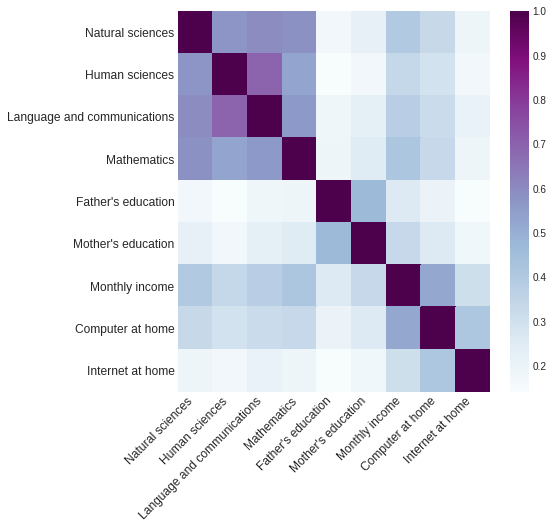

In [41]:
ax, fig = plt.subplots(figsize = (7, 7))

heatmap = sns.heatmap(social_corr, cmap = 'BuPu')

fig.set_yticklabels(heatmap.get_yticklabels(), fontsize = 12)
fig.set_xticklabels(heatmap.get_xticklabels(), rotation = 45, ha = "right", fontsize = 12)

plt.show()

In [42]:
## HIDE THE UPPER HALF OF THE TRIANGLE (remember that the correlation function is symmetric) ##

mask = np.zeros(social_corr.shape)

mask[np.triu_indices_from(mask)] = True

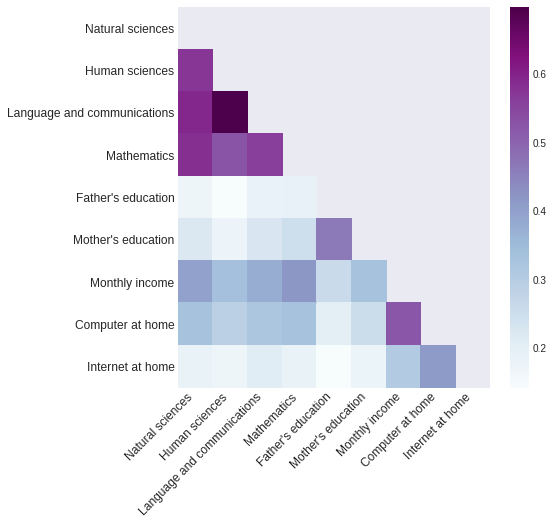

In [43]:
ax, fig = plt.subplots(figsize = (7, 7))

heatmap = sns.heatmap(social_corr, cmap = 'BuPu', mask = mask)

fig.set_yticklabels(heatmap.get_yticklabels(), fontsize = 12)
fig.set_xticklabels(heatmap.get_xticklabels(), rotation = 45, ha = "right", fontsize = 12)

plt.show()

By this last analysis, we conclude that the strongest correlation is between
the grades between the grades in *language and communication* and *human sciences*.
That is, generally those doing in one will also do good in the other. Among the grades,
the less correlated subjects are *mathematics* and human *sciences*. 

We observe that the level of education of the Mother is more strongly correlated
to the grades of the children than the father's education. There is also another
interesting strong correlation between the father's education and mother's education.
Maybe that means that people tend to group together with those which have similar
education than them. But that is out of our scope, but was interesting mentioning. 

Apart from the grades, the strongest correlation comes between the number of
*computer at home* and the grades. The number of computers at home is also
related to the *monthly income* of the family, which is also highly correlated
to the grades. That is also **probably** associated to those parents which can
give better education/pay better schools to their children. However, to confirm
that, we would need a missing information in the dataset related to the distribution
of people in the public and private schools.

# Predictive model

Choosing the features to be used and explaining them:
> The public high schools are under the governance of the state. Therefore, it is interesting
to keep the information about from which state the students are coming from (SG_UF_RESIDENCIA),

> The ae also seems relevant (NU_IDADE)

> The gender seems to not be significant by what we have checked so far, but we could include
that(TP_SEXO)

> Skin color (TP_COR_RACA)

> We are interested in those which, whether passing the exam, will be able to indeed enroll Uni.
Therefore we don't want those which are not able to do so. Let's then keep (TP_ST_CONCLUSAO) equal
to 1 or 2 (have already finished high school or were going to complete in that year).

> The kind of school they come from (TP_ESCOLA)

> IN_TREINEIRO tells us if the person is taking with the intention to enroll uni (0) or not (1)

> TP_DEPENDENCIA_ADM_ESC contains the information about the kind fo school.

> TP_PRESENCA_CN, TP_PRESENCA_CH, TP_PRESENCA_LC, TP_PRESENCA_MT if != 0 corresponds that
the student was present for the test.

> 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT' correspond to the grade of the student
in the big areas.

> The essay grade is in NU_NOTA_REDACAO

> Q001 Father's education level

> Q002 Mother's education level

> Q007 If has housekeeper at home

> Q024 Computer at home

> Q025 Internet access

> Q027 School that have taken the high school


[['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA',
'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q007', 'Q024', 'Q025', 'Q027']]


## Weights to be used in the app

https://acessograduacao.ufrj.br/processos/2019-1/2019-1-sisu-mec/termo-de-adesao-ufrj-sisu-mec-2019-1/2019_1-Termo_de_Adesao_SiSU.pdf

In [464]:
cols = ['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO',
        'TP_DEPENDENCIA_ADM_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
        'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007', 'Q024', 'Q025', 'Q027',
        'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

df2018 = pd.read_csv('DADOS/MICRODADOS_ENEM_2018.csv',
                     nrows = 100000, sep = ';', usecols = cols, encoding = 'ISO-8859-1')


df2018.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  TP_ST_CONCLUSAO  TP_ESCOLA  \
0               DF     44.00       M            1                2          2   
1               MA     23.00       F            3                1          1   
2               SP     23.00       F            1                1          1   
3               BA     26.00       F            3                1          1   
4               BA     20.00       M            0                2          2   

   IN_TREINEIRO  TP_DEPENDENCIA_ADM_ESC  TP_PRESENCA_CN  TP_PRESENCA_CH  ...  \
0             0                    2.00            0.00            0.00  ...   
1             0                     nan            1.00            1.00  ...   
2             0                     nan            0.00            0.00  ...   
3             0                     nan            0.00            0.00  ...   
4             0                    2.00            0.00            1.00  ...   

   NU_NOTA_REDACAO  Q001  Q002  Q003  Q004  Q006  Q007 Q024 Q025 Q027  
0              nan     A     A     A     A     A     A    A    A    A  
1           280.00     B     B     A     A     B     A    A    A    A  
2              nan     E     E     C     B     C     A    B    B    A  
3              nan     B     C     C     B     B     A    B    B    A  
4           360.00     C     E     A     D     B     A    B    B    A  

[5 rows x 26 columns]

### Handling those which are taking the test only for trainning

In [45]:
print(len(df2018[['IN_TREINEIRO']][df2018.IN_TREINEIRO == 0]))
print(len(df2018[['IN_TREINEIRO']][df2018.IN_TREINEIRO == 1]))

96738
3262


In [46]:
df2018 = df2018[df2018.IN_TREINEIRO == 0]

### Information about the school

The information about the school is within the columns *TP_ESCOLA* or *Q027*.
To what concerns the former, it has the following options: (1) didn't answer,
(2) public, (3) private and (4) studied abroad.

The latter has the following options: (A) **only** in public school, (B) part
of it in public school (and part on the private one) but **without** scholarship,
(C) the same as *(B)* but **WITH** scholarship, (D) **only** in private school **without**
scholarship, (E) **only** in private school **without** scholarship, (F) didn't go to school.

For *TP_DEPENDENCIA_ADM_ESC*  we have the following options: 1: Federal school,
2: State school, 3: City school, 4: Private school

Let's then analyse these columns.

In [47]:
dict_school = {1: "didn't answer", 2: 'public', 3: 'private', 4: 'abroad'}

for opt in dict_school:
    df = df2018[['TP_ESCOLA']][df2018.TP_ESCOLA == opt]
    print ("Number of people that chose: {} is {}".format(dict_school[opt], len(df) ))
print (' ')
print ("Number nan-values is: ", df2018[['TP_ESCOLA']].isna().sum())
print (' ')

dict_school2 = {'A':  'only in public school', 'B': 'part on the private school without scholarship', 
                'C' : 'part on the private school with scholarship', 'D' : 'only on the private school with scholarship',
                'E' :  'only private school without scholarship', 'F' : "didn't go to school"}

for opt in dict_school2:
    df = df2018[['Q027']][df2018.Q027 == opt]
    print ("Number of people that chose: {} is {}".format(dict_school2[opt], len(df)))
print (' ')
print ("Number nan-values is: ", df2018[['Q027']].isna().sum())
print (' ')
dict_school3 = {1: 'Federal school', 2: 'State school', 3: 'City school', 4: 'Private school'}


for opt in dict_school3:
    df = df2018[['TP_DEPENDENCIA_ADM_ESC']][df2018.TP_DEPENDENCIA_ADM_ESC == opt]
    print ("Number of people that chose: {} is {}".format(dict_school3[opt], len(df)))
print (' ')
print ("Number nan-values is: ", df2018[['TP_DEPENDENCIA_ADM_ESC']].isna().sum())
print (' ')

Number of people that chose: didn't answer is 77978
Number of people that chose: public is 16179
Number of people that chose: private is 225
Number of people that chose: abroad is 2356
 
Number nan-values is:  TP_ESCOLA    0
dtype: int64
 
Number of people that chose: only in public school is 80359
Number of people that chose: part on the private school without scholarship is 5793
Number of people that chose: part on the private school with scholarship is 2412
Number of people that chose: only on the private school with scholarship is 6203
Number of people that chose: only private school without scholarship is 1896
Number of people that chose: didn't go to school is 75
 
Number nan-values is:  Q027    0
dtype: int64
 
Number of people that chose: Federal school is 1197
Number of people that chose: State school is 16178
Number of people that chose: City school is 224
Number of people that chose: Private school is 2357
 
Number nan-values is:  TP_DEPENDENCIA_ADM_ESC    76782
dtype: int64

### School information handling

Since we want to keep the information about federal, state, city or private school,
we will drop the NA values and use only the information from those which filled it.
However, it might come to mind the question: *okay, but what if we throw an important
part of the data which should be considered into the model by just keeping the other columns*

Let's try to further investigate the columns above. We notice that in *TP_ESCOLA*
there are 77978 which  haven't answered. We have 76782 nan-values in *TP_DEPENDENCIA_ADM_ESC*.
Let's findout if they are the same people.

In [48]:
print(df2018.TP_DEPENDENCIA_ADM_ESC.isna().sum())
print(len(df2018.TP_ESCOLA == 1))
print(len(df2018[['TP_DEPENDENCIA_ADM_ESC', 'TP_ESCOLA']][(df2018.TP_DEPENDENCIA_ADM_ESC.isna()) & (df2018.TP_ESCOLA == 1)]))

df2018.TP_DEPENDENCIA_ADM_ESC.isna().sum()

76782
96738
76782


76782

Okay, so most of the people didn't reply from which school they come from.
All those which didn't reply the question concerning the administrative
questioin about their school also didn't respond to the former. Consequently,
we will drop those which didn't reply these questions and remove their columns.
Among the non-nan values in *TP_DEPENDENCIA_ADM_ESC*
we have 1197 + 16178 + 224 people in public schools and 2357 studying in
private ones. That is, those which studied in private school are approximately
10-15% of those studying in public school. 0.13392806409 

In the question 27, Q027, there are no-nan values. We observe that there are
80359 only in public school, 6203 + 1896 only in private school and 2412 + 5793
which was part on private school and part on public school. Which is reasonable
to include on the private school, since they took part of it on the private school
or took preparatory course. The group which has access to private school has
6203 + 1896 + 2412 + 5793 = 16304, which is roughly 20%. Therefore, without
too much worry (since we will also take more data) we will drop the nan-values.

In [49]:
df = df2018[~df2018.TP_DEPENDENCIA_ADM_ESC.isna()].copy().reset_index(drop = True)

df.tail()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  TP_ST_CONCLUSAO  \
19951               SP     17.00       F            3                2   
19952               MA     20.00       M            3                2   
19953               SP     17.00       F            3                2   
19954               MA     17.00       F            1                2   
19955               PB     17.00       M            3                2   

       TP_ESCOLA  IN_TREINEIRO  TP_DEPENDENCIA_ADM_ESC  TP_PRESENCA_CN  \
19951          2             0                    2.00            1.00   
19952          1             0                    1.00            0.00   
19953          4             0                    4.00            1.00   
19954          4             0                    4.00            1.00   
19955          2             0                    2.00            1.00   

       TP_PRESENCA_CH  ...  NU_NOTA_REDACAO  Q001  Q002  Q003  Q004  Q006  \
19951            1.00  ...           600.00     D     B     A     A     C   
19952            0.00  ...              nan     B     A     A     A     B   
19953            1.00  ...           540.00     E     E     C     D     I   
19954            1.00  ...           680.00     F     F     D     D     J   
19955            1.00  ...           560.00     E     E     D     A     B   

       Q007 Q024 Q025 Q027  
19951     A    A    A    A  
19952     A    A    A    A  
19953     A    C    B    D  
19954     A    C    B    D  
19955     A    B    B    A  

[5 rows x 26 columns]

In [50]:
## selecting those which have finished the high school or will finish during the application year

print (len(df))
print (len(df[(df.TP_ST_CONCLUSAO == 1) | (df.TP_ST_CONCLUSAO == 2)]))
df.TP_ST_CONCLUSAO.unique()


## Dropping few columns which won't be relevant
df.drop(columns = ['TP_ST_CONCLUSAO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027', 'TP_ESCOLA'], inplace = True)

19956
19956


In [51]:
## Removing those which missed the test
## For this part we will be base on Universidade Federal do Rio de Janeiro criteria:
## if the person scores zero (missed the test he/she won't be able to get into the University)
## Let's not take them into account them for our model

print (len(df))
print (len(df[df.TP_PRESENCA_LC != 0]))

df = df[df.TP_PRESENCA_LC != 0]
df = df[df.TP_PRESENCA_CN != 0]
df = df[df.TP_PRESENCA_CH != 0]
df = df[df.TP_PRESENCA_MT != 0]

19956
18018


In [52]:
df = df.drop(columns = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']).reset_index(drop = True)

df.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  \
0               CE     19.00       M            3      411.80      429.80   
1               CE     18.00       M            3      478.50      513.30   
2               PB     18.00       F            1      479.40      539.00   
3               PI     54.00       F            3      429.80      586.70   
4               SP     17.00       F            1      390.00      524.10   

   NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO Q001 Q002 Q003 Q004 Q006 Q007 Q024  \
0      445.20      459.00           340.00    D    D    C    B    C    A    A   
1      564.70      514.90           580.00    C    C    F    B    B    A    A   
2      553.80      517.30           620.00    H    E    F    B    B    A    A   
3      450.30      473.30           300.00    B    A    A    A    B    A    A   
4      492.50      462.00           500.00    D    E    C    B    C    A    B   

  Q025  
0    A  
1    A  
2    B  
3    A  
4    B

In [53]:
## Within the skin-color column, TP_COR_RACA, 0 corresponds to those which prefered
#to no declare its colors

print(len(df[['TP_COR_RACA']][df['TP_COR_RACA'] == 0]))

# which corresponds to

percent = 100*len(df[['TP_COR_RACA']][df['TP_COR_RACA'] == 0])/len(df)

print ("Percentage of people which didn't declare their skin-color: {}".format(round(percent, 2)))

# Since it is only two percent of the dataset, let's drop these columns out

df = df[df.TP_COR_RACA != 0]

301
Percentage of people which didn't declare their skin-color: 1.74


In [54]:
## Analyzing those which doesn't know their parents education

print((df.Q001 == 'H').sum())
print((df.Q002 == 'H').sum())

#Okay so due to the father's education would be rather complicated to simply drop the rows.
#Furthermore it is quite interesting and shocking (maybe expected I have to say) that there
#are three times more teenages/adults that doesn't have information about their father education,
#when compared to the mother's information.

df.head()

1634
550


SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  \
0               CE     19.00       M            3      411.80      429.80   
1               CE     18.00       M            3      478.50      513.30   
2               PB     18.00       F            1      479.40      539.00   
3               PI     54.00       F            3      429.80      586.70   
4               SP     17.00       F            1      390.00      524.10   

   NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO Q001 Q002 Q003 Q004 Q006 Q007 Q024  \
0      445.20      459.00           340.00    D    D    C    B    C    A    A   
1      564.70      514.90           580.00    C    C    F    B    B    A    A   
2      553.80      517.30           620.00    H    E    F    B    B    A    A   
3      450.30      473.30           300.00    B    A    A    A    B    A    A   
4      492.50      462.00           500.00    D    E    C    B    C    A    B   

  Q025  
0    A  
1    A  
2    B  
3    A  
4    B

## Next steps

Okay, so the data is basically ready for the model trainning. However, let's do some few
stuff more which will be useful for the webapp configuration and won't make a difference
for the trainning of the model. There are a couple of categorical variables that are represented
by numbers rather than what they really are. What we want is to replace them by their real meaning.
The latter is particularly useful for building the web application since they will enter as the
options for the user. Regarding the model, we should not worry about that, since we will one hot
encode those variables.

In [55]:
dict_skin_color = {1 : 'Branca',
                   2 : 'Preta',
                   3 : 'Parda',
                   4 : 'Amarela',
                   5 : 'Indígena'}

df.replace({'TP_COR_RACA': dict_skin_color}, inplace = True)

df.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  \
0               CE     19.00       M       Parda      411.80      429.80   
1               CE     18.00       M       Parda      478.50      513.30   
2               PB     18.00       F      Branca      479.40      539.00   
3               PI     54.00       F       Parda      429.80      586.70   
4               SP     17.00       F      Branca      390.00      524.10   

   NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO Q001 Q002 Q003 Q004 Q006 Q007 Q024  \
0      445.20      459.00           340.00    D    D    C    B    C    A    A   
1      564.70      514.90           580.00    C    C    F    B    B    A    A   
2      553.80      517.30           620.00    H    E    F    B    B    A    A   
3      450.30      473.30           300.00    B    A    A    A    B    A    A   
4      492.50      462.00           500.00    D    E    C    B    C    A    B   

  Q025  
0    A  
1    A  
2    B  
3    A  
4    B

In [56]:
dict_parents_education = {'A' : 'Nunca estudou',
                          'B' : 'Não completou a 4ª série/5º ano do Ensino Fundamental',
                          'C' : 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
                          'D' : 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
                          'E' : 'Completou o Ensino Médio, mas não completou a Faculdade',
                          'F' : 'Completou a Faculdade, mas não completou a Pós-graduação',
                          'G' : 'Completou a Pós-graduação',
                          'H' : 'Não sei'}


df.replace({'Q001': dict_parents_education, 'Q002': dict_parents_education}, inplace = True)
df.head(1)

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  \
0               CE     19.00       M       Parda      411.80      429.80   

   NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0      445.20      459.00           340.00   

                                                Q001  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...   

                                                Q002 Q003 Q004 Q006 Q007 Q024  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...    C    B    C    A    A   

  Q025  
0    A

In [57]:
dict_housekeeper = {'A' : 0, #'Não',
                    'B' : 1, #'Sim, um ou dois dias por semana',
                    'C' : 3, #'Sim, três ou quatro dias por semana',
                    'D' : 5 #'Sim, pelo menos cinco dias por semana'
                    }

df.replace({'Q007': dict_housekeeper}, inplace = True)
df.head(1)

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  \
0               CE     19.00       M       Parda      411.80      429.80   

   NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0      445.20      459.00           340.00   

                                                Q001  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...   

                                                Q002 Q003 Q004 Q006  Q007  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...    C    B    C     0   

  Q024 Q025  
0    A    A

In [58]:
dict_pc_athome = {'A' : 0, #'Não',
                  'B' : 1, #'Sim, um',
                  'C' : 2, #'Sim, dois',
                  'D' : 3, #'Sim, três',
                  'E' : 4 #'Sim, quatro ou mais'
                 }

df.replace({'Q024': dict_pc_athome}, inplace = True)
df.head(1)

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  \
0               CE     19.00       M       Parda      411.80      429.80   

   NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0      445.20      459.00           340.00   

                                                Q001  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...   

                                                Q002 Q003 Q004 Q006  Q007  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...    C    B    C     0   

   Q024 Q025  
0     0    A

In [59]:
dict_internet_athome = {'A' : 0, #'Não', 
                        'B' : 1 #'Sim'
                       }

df.replace({'Q025': dict_internet_athome}, inplace = True)
df.head(1)

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  \
0               CE     19.00       M       Parda      411.80      429.80   

   NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0      445.20      459.00           340.00   

                                                Q001  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...   

                                                Q002 Q003 Q004 Q006  Q007  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...    C    B    C     0   

   Q024  Q025  
0     0     0

In [60]:
## treating the salary column

dict_fam_money = {'A': 0, 'B': 954, 'C': 1431, 'D': 1908, 'E': 2385, 'F': 2862, 'G': 3816,
                  'H': 4770, 'I': 5724, 'J': 6678, 'K': 7632, 'L': 8586, 'M': 9540,
                  'N': 11448, 'O': 14310, 'P': 19080, 'Q': 20034}


df.replace({'Q006': dict_fam_money}, inplace = True)
df.head(1)

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  \
0               CE     19.00       M       Parda      411.80      429.80   

   NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0      445.20      459.00           340.00   

                                                Q001  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...   

                                                Q002 Q003 Q004  Q006  Q007  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...    C    B  1431     0   

   Q024  Q025  
0     0     0

In [61]:
## Verifying if we let nan-values pass

df.isna().sum()

SG_UF_RESIDENCIA    0
NU_IDADE            1
TP_SEXO             0
TP_COR_RACA         0
NU_NOTA_CN          4
NU_NOTA_CH          1
NU_NOTA_LC          1
NU_NOTA_MT          4
NU_NOTA_REDACAO     1
Q001                0
Q002                0
Q003                0
Q004                0
Q006                0
Q007                0
Q024                0
Q025                0
dtype: int64

In [62]:
df[df.NU_NOTA_MT.isna()]

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  \
1431                CE     18.00       F       Parda         nan      654.90   
4351                RJ     20.00       M       Parda         nan      573.20   
14751               CE     19.00       M       Parda         nan      540.10   
15553               CE     17.00       M       Parda         nan      566.60   

       NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
1431       616.10         nan           840.00   
4351       517.90         nan           540.00   
14751      382.00         nan           340.00   
15553      505.50         nan           360.00   

                                                    Q001  \
1431   Completou o Ensino Médio, mas não completou a ...   
4351   Completou a 4ª série/5º ano, mas não completou...   
14751                                            Não sei   
15553  Completou a 4ª série/5º ano, mas não completou...   

                                                    Q002 Q003 Q004  Q006  \
1431   Completou a 4ª série/5º ano, mas não completou...    D    F  3816   
4351   Completou a 8ª série/9º ano do Ensino Fundamen...    B    B  1431   
14751                          Completou a Pós-graduação    D    E  2385   
15553  Completou a 8ª série/9º ano do Ensino Fundamen...    A    B   954   

       Q007  Q024  Q025  
1431      0     1     1  
4351      0     1     1  
14751     5     3     1  
15553     0     0     0

In [63]:
## Strategy, regarding the grades we observe that the students were okay on some of the tests.
## Despite of being only four (we could drop them out), it might be okay to simply fill these
## nan-values with the respective means of each column.

columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

df[columns] = df[columns].fillna(df[columns].mean())

df[df.NU_IDADE.isna()]

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  \
3023               SP       nan       F      Branca      547.30      667.80   

      NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO                       Q001  \
3023      606.50      673.80           800.00  Completou a Pós-graduação   

         Q002 Q003 Q004  Q006  Q007  Q024  Q025  
3023  Não sei    E    D  6678     5     2     0

In [64]:
#print(len(df[df.Q001 == 'Completou a Pós-graduação']))
#print(len(df[(df.Q001 == 'Completou a Pós-graduação') &
#       (df.Q007 == 4)]))

#df_age_issue = df[(df.Q001 == 'Completou a Pós-graduação') &
#                  (df.Q007 == 4)]

#print(int(df_age_issue.NU_IDADE.mean()))

#df[['NU_IDADE']] = df.NU_IDADE.fillna(int(df_age_issue.NU_IDADE.mean()))

df = df.dropna()

In [65]:
df.head(1)

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  \
0               CE     19.00       M       Parda      411.80      429.80   

   NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0      445.20      459.00           340.00   

                                                Q001  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...   

                                                Q002 Q003 Q004  Q006  Q007  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...    C    B  1431     0   

   Q024  Q025  
0     0     0

In [66]:
X = df.drop(columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']).copy()
grades = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].copy()

X = X.drop(columns = 'SG_UF_RESIDENCIA')

X.head(2)

NU_IDADE TP_SEXO TP_COR_RACA  \
0     19.00       M       Parda   
1     18.00       M       Parda   

                                                Q001  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...   
1  Completou a 4ª série/5º ano, mas não completou...   

                                                Q002 Q003 Q004  Q006  Q007  \
0  Completou a 8ª série/9º ano do Ensino Fundamen...    C    B  1431     0   
1  Completou a 4ª série/5º ano, mas não completou...    F    B   954     0   

   Q024  Q025  
0     0     0  
1     0     0

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1, 2, 3, 4, 5, 6])],
                       remainder = 'passthrough')

X_ohe = ct.fit_transform(X)

X_ohe

<17011x40 sparse matrix of type '<class 'numpy.float64'>'
	with 158975 stored elements in Compressed Sparse Row format>

In [68]:
grades.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
0      411.80      429.80      445.20      459.00           340.00
1      478.50      513.30      564.70      514.90           580.00
2      479.40      539.00      553.80      517.30           620.00
3      429.80      586.70      450.30      473.30           300.00
4      390.00      524.10      492.50      462.00           500.00

To what concerns the scores got for the students, we are not interested
in the exact value. We are more interested in have an idea of their grades.
Therefore we are going to round these grades

In [69]:
grades = grades.applymap(lambda grade : 50*round(grade/50))

grades.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
0         400         450         450         450              350
1         500         500         550         500              600
2         500         550         550         500              600
3         450         600         450         450              300
4         400         500         500         450              500

In [70]:
from sklearn.model_selection import train_test_split

y_cn = grades[['NU_NOTA_CN']].values
y_ch = grades[['NU_NOTA_CH']].values
y_lc = grades[['NU_NOTA_LC']].values
y_mt = grades[['NU_NOTA_MT']].values
y_redacao = grades[['NU_NOTA_REDACAO']].values

from sklearn.ensemble import RandomForestRegressor

n_trees = 10

model_cn = RandomForestRegressor(n_estimators = n_trees, random_state = 0)
model_ch = RandomForestRegressor(n_estimators = n_trees, random_state = 0)
model_lc = RandomForestRegressor(n_estimators = n_trees, random_state = 0)
model_mt = RandomForestRegressor(n_estimators = n_trees, random_state = 0)
model_redacao = RandomForestRegressor(n_estimators = n_trees, random_state = 0)

ys = [y_cn, y_ch, y_lc, y_mt, y_redacao]
models = [model_cn, model_ch, model_lc, model_mt, model_redacao]

In [72]:
from sklearn.metrics import mean_squared_error


for i in range(len(ys)):
    y = ys[i]
    model = models[i]
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_ohe, y, test_size = 0.2, random_state = 0)
    
    model.fit(Xtrain, ytrain)
    
    ypred = model.predict(Xtest)
    
    rmse = np.sqrt(mean_squared_error(ypred, ytest))/np.std(ytest)
    
    print('RMSE compared to the std for 10 trees is: {}'.format(round(rmse, 2)))
    #print('RMSE in percentage with respect to the mean : {}'.format(round(rmse, 2)))

RMSE compared to the std for 10 trees is: 0.98
RMSE compared to the std for 10 trees is: 1.0
RMSE compared to the std for 10 trees is: 0.99
RMSE compared to the std for 10 trees is: 0.97
RMSE compared to the std for 10 trees is: 1.02


In [73]:
rmse_cn, rmse_ch, rmse_lc, rmse_mt, rmse_redacao = list(), list(), list(), list(), list()

rmse_all = [rmse_cn, rmse_ch, rmse_lc, rmse_mt, rmse_redacao]
vec_n_trees = []


def rmse_model(n_trees_model):
    model_cn = RandomForestRegressor(n_estimators = n_trees_model, random_state = 0)
    model_ch = RandomForestRegressor(n_estimators = n_trees_model, random_state = 0)
    model_lc = RandomForestRegressor(n_estimators = n_trees_model, random_state = 0)
    model_mt = RandomForestRegressor(n_estimators = n_trees_model, random_state = 0)
    model_redacao = RandomForestRegressor(n_estimators = n_trees_model, random_state = 0)

    ys = [y_cn, y_ch, y_lc, y_mt, y_redacao]
    models = [model_cn, model_ch, model_lc, model_mt, model_redacao]
    rmse_all = []
    
    for i in range(len(ys)):
        y = ys[i]
        model = models[i]
    
        Xtrain, Xtest, ytrain, ytest = train_test_split(X_ohe, y, test_size = 0.2, random_state = 0)
    
        model.fit(Xtrain, ytrain)
        
        ypred = model.predict(Xtest)
        
        rmse = np.sqrt(mean_squared_error(ypred, ytest))/np.std(ytest)
        
        print('RMSE compared to the std for {} trees is: {}'.format(n_trees_model, round(rmse, 2)))
        
        #score = score(ytest, ypred)

        #print ('For {} trees, the model scored {}'.format(n_trees_model, round(score, 4)))
        
        rmse_all.append(round(rmse, 2))
        
    return n_trees_model, rmse_all

In [ ]:
number_of_trees_vec = []

rmse_cn, rmse_ch, rmse_lc, rmse_mt, rmse_redacao = list(), list(), list(), list(), list()
rmse_all = [rmse_cn, rmse_ch, rmse_lc, rmse_mt, rmse_redacao]

for number_of_trees_model in range(10, 50, 10):
    number_of_trees, rmse = rmse_model(number_of_trees_model)
    number_of_trees_vec.append(number_of_trees_model)
    for i in range(len(rmse_all)):
        rmse_all[i].append(rmse[i])
    print (' ')

In [ ]:
#number_of_trees_vec
#rmse_all = [rmse_cn, rmse_ch, rmse_lc, rmse_mt, rmse_redacao]

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(number_of_trees_vec, rmse_cn, label = 'Natural sciences', color = 'red', marker = '+')
#ax.plot(number_of_trees_vec, np.mean(rmse_cn)*np.ones(len(rmse_cn)), color = 'red', alpha = 0.4)


ax.plot(number_of_trees_vec, rmse_ch, label = 'Human sciences', color = 'green', marker = '+')
#ax.plot(number_of_trees_vec, np.mean(rmse_ch)*np.ones(len(rmse_ch)), color = 'green', alpha = 0.4)

ax.plot(number_of_trees_vec, rmse_lc, label = 'Portugues and literature', color = 'blue', marker = '+')
#ax.plot(number_of_trees_vec, np.mean(rmse_lc)*np.ones(len(rmse_lc)), color = 'blue', alpha = 0.4)


ax.plot(number_of_trees_vec, rmse_mt, label = 'Mathematics', color = 'cyan', marker = '+')
#ax.plot(number_of_trees_vec, np.mean(rmse_mt)*np.ones(len(rmse_mt)), color = 'cyan', alpha = 0.4)


#ax.plot(number_of_trees_vec, rmse_redacao)

plt.legend()
plt.show()

In [ ]:
rmse_model(1000)

Interestingly, these features do not make a better prediction than simply make
the average of the grades. Therefore, let's include all the features.

# Predictive model part 2

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


pd.options.display.float_format = "{:,.2f}".format

df2018 = pd.read_csv('DADOS/MICRODADOS_ENEM_2018.csv',
                     nrows = 100000, sep = ';', encoding = 'ISO-8859-1')


df2018.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  \
0  180008202043    2018                  5300108                Brasília   
1  180007197856    2018                  2111102      São João dos Patos   
2  180008517434    2018                  3530607         Mogi das Cruzes   
3  180007661228    2018                  2916401              Itapetinga   
4  180008787987    2018                  2918100               Jeremoabo   

   CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  \
0                53               DF     44.00       M             1.00   
1                21               MA     23.00       F             0.00   
2                35               SP     23.00       F             0.00   
3                29               BA     26.00       F             0.00   
4                29               BA     20.00       M             0.00   

   TP_COR_RACA  ...  Q018  Q019 Q020  Q021 Q022  Q023  Q024  Q025  Q026  Q027  
0            1  ...     A     A    A     A    A     A     A     A     B     A  
1            3  ...     A     B    A     A    B     A     A     A     A     A  
2            1  ...     A     B    A     A    B     B     B     B     A     A  
3            3  ...     A     B    B     A    C     A     B     B     A     A  
4            0  ...     A     B    A     A    B     A     B     B     B     A  

[5 rows x 137 columns]

Let's drop the irrelevant columns. NU_INSCRIÇAO and NU_ANO are some of them.
Also 'CO_MUNICIPIO_RESIDENCIA' is equivalent to 'NO_MUNICIPIO_RESIDENCIA'
and 'CO_UF_RESIDENCIA' is equivalent to 'SG_UF_RESIDENCIA'.

In [284]:
cols = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'CO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO']

df2018 = df2018.drop(columns = cols)


#df2018.NO_MUNICIPIO_RESIDENCIA.unique().shape

df2018.head()

NO_MUNICIPIO_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  \
0                Brasília               DF     44.00       M             1.00   
1      São João dos Patos               MA     23.00       F             0.00   
2         Mogi das Cruzes               SP     23.00       F             0.00   
3              Itapetinga               BA     26.00       F             0.00   
4               Jeremoabo               BA     20.00       M             0.00   

   TP_COR_RACA  TP_NACIONALIDADE NO_MUNICIPIO_NASCIMENTO SG_UF_NASCIMENTO  \
0            1                 0                     NaN              NaN   
1            3                 1      São João dos Patos               MA   
2            1                 1                   Lages               SC   
3            3                 2                     NaN              NaN   
4            0                 1                 Aracaju               SE   

   TP_ST_CONCLUSAO  ...  Q018  Q019  Q020  Q021  Q022  Q023 Q024  Q025 Q026  \
0                2  ...     A     A     A     A     A     A    A     A    B   
1                1  ...     A     B     A     A     B     A    A     A    A   
2                1  ...     A     B     A     A     B     B    B     B    A   
3                1  ...     A     B     B     A     C     A    B     B    A   
4                2  ...     A     B     A     A     B     A    B     B    B   

   Q027  
0     A  
1     A  
2     A  
3     A  
4     A  

[5 rows x 131 columns]

For the model prediction, we are also not interested in information regarding the answers
given by the students at the answer card. Nor the test informations, like the test number and so on

In [286]:
cols = ['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'TX_GABARITO_CN',
        'TX_GABARITO_CH', 'TX_GABARITO_LC','TX_GABARITO_MT','TP_STATUS_REDACAO',
        'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 
        'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']

df2018 = df2018.drop(columns = cols)

In [288]:
print(len(df2018[['TP_PRESENCA_CN']][df2018.TP_PRESENCA_CN == 0]))
print(len(df2018[['TP_PRESENCA_CN']][df2018.TP_PRESENCA_CN == 1]))
print(len(df2018[['TP_PRESENCA_CN']][df2018.TP_PRESENCA_CN == 2]))

## Removing those which didn't show up for the test

df2018 = df2018[(df2018.TP_PRESENCA_CN == 1) & (df2018.TP_PRESENCA_CH == 1) & (df2018.TP_PRESENCA_LC == 1) & (df2018.TP_PRESENCA_MT == 1)]

print(len(df2018[['TP_PRESENCA_CN']][df2018.TP_PRESENCA_CN == 0]))
print(len(df2018[['TP_PRESENCA_CN']][df2018.TP_PRESENCA_CN == 1]))
print(len(df2018[['TP_PRESENCA_CN']][df2018.TP_PRESENCA_CN == 2]))

26932
73051
15
0
72936
0


In [289]:
cols = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
df2018 = df2018.drop(columns = cols)

In [290]:
print(df2018.iloc[:, : 60].isna().sum())
print(df2018.iloc[:, 60: 120].isna().sum())
print(df2018.iloc[:, 120: ].isna().sum())

NO_MUNICIPIO_RESIDENCIA            0
SG_UF_RESIDENCIA                   0
NU_IDADE                           1
TP_SEXO                            0
TP_ESTADO_CIVIL                 2562
TP_COR_RACA                        0
TP_NACIONALIDADE                   0
NO_MUNICIPIO_NASCIMENTO         2332
SG_UF_NASCIMENTO                2332
TP_ST_CONCLUSAO                    0
TP_ANO_CONCLUIU                    0
TP_ESCOLA                          0
TP_ENSINO                      18093
IN_TREINEIRO                       0
CO_ESCOLA                      55628
CO_MUNICIPIO_ESC               55628
NO_MUNICIPIO_ESC               55628
CO_UF_ESC                      55628
SG_UF_ESC                      55628
TP_DEPENDENCIA_ADM_ESC         55628
TP_LOCALIZACAO_ESC             55628
TP_SIT_FUNC_ESC                55628
IN_BAIXA_VISAO                     0
IN_CEGUEIRA                        0
IN_SURDEZ                          0
IN_DEFICIENCIA_AUDITIVA            0
IN_SURDO_CEGUEIRA                  0
I

Most people which are trying to go to Uni and are rather younger,
like 20-22, are most likely single. We assert that the people at this
age are probably trying to get into Uni and didn't have achieved
yet financial stability. However, people older than 30, let's say,
are most likely with a job, employed, etc... And might be married. Let's
check them out then

In [291]:
print(df2018.TP_ESTADO_CIVIL.isna().sum())
print(len(df2018[['TP_ESTADO_CIVIL', 'NU_IDADE']][(df2018.TP_ESTADO_CIVIL.isna()) & (df2018.NU_IDADE < 25)]))

2562
1068


In [292]:
# Okay so rougly 30% of the dataframe. Let's fill these (age<24) with single

cond = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.NU_IDADE < 25)

#df2018[['TP_ESTADO_CIVIL', 'NU_IDADE']][(df2018.TP_ESTADO_CIVIL.isna()) & (df2018.NU_IDADE < 24)]

df2018.loc[cond, ['TP_ESTADO_CIVIL', 'NU_IDADE']] = df2018.loc[cond, ['TP_ESTADO_CIVIL', 'NU_IDADE']].fillna(0)
len(df2018[['TP_ESTADO_CIVIL', 'NU_IDADE']][(df2018.TP_ESTADO_CIVIL.isna()) & (df2018.NU_IDADE < 25)])

0

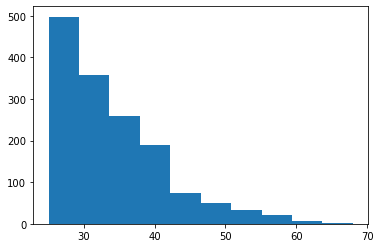

In [293]:
# Let's think about how to fill them up later

plt.hist(df2018.loc[(df2018.TP_ESTADO_CIVIL.isna()), 'NU_IDADE'])

plt.show()

In [294]:
#df2018[['NU_IDADE', 'NO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO']][cond]
#NO_MUNICIPIO_RESIDENCIA SG_UF_RESIDENCIA

df2018.loc[cond, ['NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO']].head()

NO_MUNICIPIO_RESIDENCIA SG_UF_RESIDENCIA NO_MUNICIPIO_NASCIMENTO  \
162                  Olinda               PE                  Recife   
332        Senhor do Bonfim               BA        Senhor do Bonfim   
380                  Macapá               AP                  Macapá   
541               Fortaleza               CE               Fortaleza   
618            Porto Alegre               RS            Porto Alegre   

    SG_UF_NASCIMENTO  
162               PE  
332               BA  
380               AP  
541               CE  
618               RS

In [295]:
df2018['SG_UF_NASCIMENTO'].fillna(df2018['SG_UF_RESIDENCIA'], inplace = True)
df2018['NO_MUNICIPIO_NASCIMENTO'].fillna(df2018['NO_MUNICIPIO_RESIDENCIA'], inplace = True)

df2018[['NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO']].head()

NO_MUNICIPIO_RESIDENCIA SG_UF_RESIDENCIA NO_MUNICIPIO_NASCIMENTO  \
1      São João dos Patos               MA      São João dos Patos   
5             João Pessoa               PB             João Pessoa   
7                Parnaíba               PI            Luís Correia   
8               Fortaleza               CE               Fortaleza   
9                  Cuiabá               MT               Barreiras   

  SG_UF_NASCIMENTO  
1               MA  
5               PB  
7               PI  
8               CE  
9               BA

In [296]:
df2018[['CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
        'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC']].head()

# For those which have replied, these information should coincide, for most people,
# to the ones that they live. Even more concerning schools. Most students most likely
# study therein their own cities. Therefore, let's drop these columns, since most people
# also din't want/know how to fill them up.

CO_ESCOLA  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  CO_UF_ESC SG_UF_ESC  \
1           nan               nan              NaN        nan       NaN   
5           nan               nan              NaN        nan       NaN   
7           nan               nan              NaN        nan       NaN   
8 23,077,140.00      2,304,400.00        Fortaleza      23.00        CE   
9           nan               nan              NaN        nan       NaN   

   TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  
1                     nan                 nan              nan  
5                     nan                 nan              nan  
7                     nan                 nan              nan  
8                    2.00                1.00             1.00  
9                     nan                 nan              nan

In [ ]:
df2018.drop(columns = ['CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
                       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
                       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC'], inplace = True)

print(df2018.iloc[:, : 60].isna().sum())
print(df2018.iloc[:, 60: 120].isna().sum())
print(df2018.iloc[:, 120: ].isna().sum())

In [298]:
df2018['NO_MUNICIPIO_NASCIMENTO'].isna().sum()

0

In [299]:
print(df2018.iloc[:, : 60].isna().sum())
print(df2018.iloc[:, 60: 120].isna().sum())
print(df2018.iloc[:, 120: ].isna().sum())

NO_MUNICIPIO_RESIDENCIA            0
SG_UF_RESIDENCIA                   0
NU_IDADE                           1
TP_SEXO                            0
TP_ESTADO_CIVIL                 1494
TP_COR_RACA                        0
TP_NACIONALIDADE                   0
NO_MUNICIPIO_NASCIMENTO            0
SG_UF_NASCIMENTO                   0
TP_ST_CONCLUSAO                    0
TP_ANO_CONCLUIU                    0
TP_ESCOLA                          0
TP_ENSINO                      18093
IN_TREINEIRO                       0
IN_BAIXA_VISAO                     0
IN_CEGUEIRA                        0
IN_SURDEZ                          0
IN_DEFICIENCIA_AUDITIVA            0
IN_SURDO_CEGUEIRA                  0
IN_DEFICIENCIA_FISICA              0
IN_DEFICIENCIA_MENTAL              0
IN_DEFICIT_ATENCAO                 0
IN_DISLEXIA                        0
IN_DISCALCULIA                     0
IN_AUTISMO                         0
IN_VISAO_MONOCULAR                 0
IN_OUTRA_DEF                       0
I

The column *TP_ENSINO* corresponds to the kind of school that
the student has came from, *i.e.*, regular schools (1), high school
done in a shorter time (2) and schools for adults (3). We can take a look
on their kind of school and their age to analyse its nan-values and fill
at least some of them with some guessing.

In [300]:
df2018[['NU_IDADE', 'TP_ENSINO']][df2018.TP_ENSINO.isna()]

NU_IDADE  TP_ENSINO
22        29.00        nan
27        19.00        nan
31        16.00        nan
59        16.00        nan
122       15.00        nan
...         ...        ...
99950     21.00        nan
99952     25.00        nan
99959     20.00        nan
99967     17.00        nan
99989     44.00        nan

[18093 rows x 2 columns]

Okay, there a bunch of people younger than 17-18 (which is
the age that most people are finishing their high schools), so for
these people we can fill up with regular school right away

In [301]:
print(df2018[['NU_IDADE', 'TP_ENSINO']][(df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE < 19)].head())

cond = (df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE < 21)

df2018.loc[cond] = df2018.loc[cond].fillna(1)

print(df2018[['NU_IDADE', 'TP_ENSINO']][(df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE < 19)].head())

     NU_IDADE  TP_ENSINO
31      16.00        nan
59      16.00        nan
122     15.00        nan
174     18.00        nan
230     18.00        nan
Empty DataFrame
Columns: [NU_IDADE, TP_ENSINO]
Index: []


To further investigate, we can analyse when the remaining ones
finished their high school. For example, if someone is like 30
years old and finished their high school in 2017, this person
most likely came from a special school for adults or took a special
school made in a shorten time.

In [302]:
cols = ['NU_IDADE', 'TP_ENSINO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU']
cond = (df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE > 29) & (df2018.TP_ANO_CONCLUIU > 10)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(1)
df2018.TP_ENSINO.value_counts(dropna = False)

1.00    61873
nan      6424
3.00     4355
2.00      284
Name: TP_ENSINO, dtype: int64

In [303]:
df2018[cols][(df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE > 29) & (df2018.TP_ANO_CONCLUIU > 10)]

Empty DataFrame
Columns: [NU_IDADE, TP_ENSINO, TP_ST_CONCLUSAO, TP_ANO_CONCLUIU]
Index: []

In [304]:
cond = (df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE > 30) & (df2018.TP_ANO_CONCLUIU < 4) & (0 < df2018.TP_ANO_CONCLUIU)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(2)

df2018.loc[(df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE < 25) & (df2018.TP_ANO_CONCLUIU > 4),cols]

df2018.TP_ENSINO.value_counts(dropna = False)

1.00    61873
nan      5922
3.00     4355
2.00      786
Name: TP_ENSINO, dtype: int64

In [305]:
cond = (df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE < 25) & (df2018.TP_ANO_CONCLUIU > 4)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(1)

In [306]:
cond = (df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE < 25) & (df2018.TP_ANO_CONCLUIU < 4)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(2)

df2018.TP_ENSINO.value_counts(dropna = False)

1.00    63027
3.00     4355
nan      3187
2.00     2367
Name: TP_ENSINO, dtype: int64

In [307]:
cond = (df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE > 25) & (df2018.TP_ANO_CONCLUIU < 5)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(2)

#df2018.loc[(df2018.TP_ENSINO.isna()), cols]

df2018.TP_ENSINO.value_counts(dropna = False)

1.00    63027
3.00     4355
2.00     3048
nan      2506
Name: TP_ENSINO, dtype: int64

In [308]:
cond = (df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE > 25) & (df2018.TP_ANO_CONCLUIU < 7)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(2)
df2018.TP_ENSINO.value_counts(dropna = False)

1.00    63027
3.00     4355
2.00     3162
nan      2392
Name: TP_ENSINO, dtype: int64

In [309]:
cond = (df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE > 40) & (df2018.TP_ANO_CONCLUIU != 12)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(3)
df2018.TP_ENSINO.value_counts(dropna = False)

1.00    63027
3.00     4399
2.00     3162
nan      2348
Name: TP_ENSINO, dtype: int64

In [310]:
cond = (df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE > 30) & (df2018.TP_ANO_CONCLUIU < 11)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(2)
df2018.TP_ENSINO.value_counts(dropna = False)

1.00    63027
3.00     4399
2.00     3268
nan      2242
Name: TP_ENSINO, dtype: int64

In [311]:
cond = (df2018.TP_ENSINO.isna()) & (df2018.TP_ANO_CONCLUIU == 4) & (df2018.NU_IDADE <= 21)
cond2 = (df2018.TP_ENSINO.isna()) & (df2018.TP_ANO_CONCLUIU == 4) & (df2018.NU_IDADE >= 21) & (df2018.NU_IDADE <= 24)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(1)
df2018.loc[cond2, cols] = df2018.loc[cond2, cols].fillna(2)

df2018.TP_ENSINO.value_counts(dropna = False)

1.00    63470
3.00     4399
2.00     3597
nan      1470
Name: TP_ENSINO, dtype: int64

In [312]:
for i in range(12):
    cond1 = (df2018.TP_ENSINO.isna()) & (df2018.TP_ANO_CONCLUIU == 1 + i) & (df2018.NU_IDADE <= 17 + i)
    cond2 = (df2018.TP_ENSINO.isna()) & (df2018.TP_ANO_CONCLUIU == 1 + i) & (df2018.NU_IDADE > 17 + i) & (df2018.NU_IDADE <= 21 + i)

    df2018.loc[cond1, cols] = df2018.loc[cond1, cols].fillna(1)
    df2018.loc[cond2, cols] = df2018.loc[cond2, cols].fillna(2)

print (df2018.TP_ENSINO.value_counts(dropna = False))

1.00    63511
2.00     4838
3.00     4399
nan       188
Name: TP_ENSINO, dtype: int64


### Creating a new label for TP_ENSINO == 0. It means that the person didn't answer

In [313]:
cond = (df2018.TP_ENSINO.isna()) & (df2018.TP_ANO_CONCLUIU == 0)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(0)
df2018.TP_ENSINO.value_counts(dropna = False)

1.00    63511
2.00     4838
3.00     4399
nan       143
0.00       45
Name: TP_ENSINO, dtype: int64

In [314]:
cond = (df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE == 25) & (df2018.TP_ANO_CONCLUIU == 1)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(2)

cond = (df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE == 25) & (df2018.TP_ANO_CONCLUIU == 2)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(2)

df2018.TP_ENSINO.value_counts(dropna = False)

1.00    63511
2.00     4900
3.00     4399
nan        81
0.00       45
Name: TP_ENSINO, dtype: int64

In [315]:
cond = (df2018.TP_ENSINO.isna()) & (df2018.NU_IDADE >= 29) & (df2018.TP_ANO_CONCLUIU >= 8)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(2)

df2018.TP_ENSINO.value_counts(dropna = False)

1.00    63511
2.00     4932
3.00     4399
nan        49
0.00       45
Name: TP_ENSINO, dtype: int64

In [316]:
cond = (df2018.TP_ENSINO.isna())

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(3)

df2018.TP_ENSINO.value_counts(dropna = False)

1.00    63511
2.00     4932
3.00     4448
0.00       45
Name: TP_ENSINO, dtype: int64

In [317]:
print(df2018.iloc[:, : 60].isna().sum())
print(df2018.iloc[:, 60: 120].isna().sum())
print(df2018.iloc[:, 120: ].isna().sum())

NO_MUNICIPIO_RESIDENCIA           0
SG_UF_RESIDENCIA                  0
NU_IDADE                          1
TP_SEXO                           0
TP_ESTADO_CIVIL                1494
TP_COR_RACA                       0
TP_NACIONALIDADE                  0
NO_MUNICIPIO_NASCIMENTO           0
SG_UF_NASCIMENTO                  0
TP_ST_CONCLUSAO                   0
TP_ANO_CONCLUIU                   0
TP_ESCOLA                         0
TP_ENSINO                         0
IN_TREINEIRO                      0
IN_BAIXA_VISAO                    0
IN_CEGUEIRA                       0
IN_SURDEZ                         0
IN_DEFICIENCIA_AUDITIVA           0
IN_SURDO_CEGUEIRA                 0
IN_DEFICIENCIA_FISICA             0
IN_DEFICIENCIA_MENTAL             0
IN_DEFICIT_ATENCAO                0
IN_DISLEXIA                       0
IN_DISCALCULIA                    0
IN_AUTISMO                        0
IN_VISAO_MONOCULAR                0
IN_OUTRA_DEF                      0
IN_GESTANTE                 

In [318]:
cond = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 1) & (df2018.NU_IDADE <= 35)
cols = ['TP_ESTADO_CIVIL', 'NU_IDADE', 'Q005']

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(0)

cond1 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 1) & (df2018.NU_IDADE <= 45)
cond2 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 1) & (df2018.NU_IDADE > 45)

df2018.loc[cond1, cols] = df2018.loc[cond1, cols].fillna(3)
df2018.loc[cond2, cols] = df2018.loc[cond2, cols].fillna(2)

In [319]:
cond = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 2) & (df2018.NU_IDADE >= 30)
cond2 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 2) & (df2018.NU_IDADE < 30) & (df2018.index%2 == 0)
cond3 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 2) & (df2018.NU_IDADE < 30) & (df2018.index%2 == 1)


df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(1)
df2018.loc[cond2, cols] = df2018.loc[cond2, cols].fillna(0)
df2018.loc[cond3, cols] = df2018.loc[cond3, cols].fillna(0)

In [320]:
cond = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 >= 4) & (df2018.NU_IDADE >= 30)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(1)

In [321]:
cond = (df2018.TP_ESTADO_CIVIL.isna())# & (df2018.Q005 >= 4) & (df2018.NU_IDADE >= 30)

df2018.loc[cond, cols]

TP_ESTADO_CIVIL  NU_IDADE  Q005
217                nan     25.00     4
350                nan     25.00     4
502                nan     28.00     6
589                nan     29.00     4
595                nan     34.00     3
...                ...       ...   ...
98148              nan     34.00     3
98627              nan     31.00     3
99339              nan     27.00     3
99360              nan     26.00     4
99789              nan     41.00     3

[674 rows x 3 columns]

In [322]:
cond = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.NU_IDADE >= 25) &  (df2018.NU_IDADE < 30) & (df2018.index%2 == 0)
cond1 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.NU_IDADE >= 25) &  (df2018.NU_IDADE < 30) & (df2018.index%2 == 1)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(0)
df2018.loc[cond1, cols] = df2018.loc[cond1, cols].fillna(1)

In [323]:
cond  = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 <= 5) & (df2018.NU_IDADE <= 25) & (df2018.index%3 == 0)
cond1 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 <= 5) & (df2018.NU_IDADE <= 25) & (df2018.index%3 == 1)
cond2 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 <= 5) & (df2018.NU_IDADE <= 25) & (df2018.index%3 == 2)


df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(1)
df2018.loc[cond1, cols] = df2018.loc[cond1, cols].fillna(0)
df2018.loc[cond2, cols] = df2018.loc[cond2, cols].fillna(0)

In [324]:
cond = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 > 5)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(0)

In [325]:
cond = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 5) & (df2018.index%3 == 0) & (df2018.NU_IDADE <= 30)
cond1 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 5) & (df2018.index%3 == 1) & (df2018.NU_IDADE <= 30)
cond2 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 5) & (df2018.index%3 == 2) & (df2018.NU_IDADE <= 30)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(0)
df2018.loc[cond1, cols] = df2018.loc[cond1, cols].fillna(0)
df2018.loc[cond2, cols] = df2018.loc[cond2, cols].fillna(1)

In [326]:
cond = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 4) & (df2018.index%3 == 0) & (df2018.NU_IDADE <= 30)
cond1 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 4) & (df2018.index%3 == 1) & (df2018.NU_IDADE <= 30)
cond2 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 4) & (df2018.index%3 == 2) & (df2018.NU_IDADE <= 30)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(0)
df2018.loc[cond1, cols] = df2018.loc[cond1, cols].fillna(0)
df2018.loc[cond2, cols] = df2018.loc[cond2, cols].fillna(1)

In [327]:
cond = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%3 == 0) & (df2018.NU_IDADE >= 30) & (df2018.NU_IDADE <= 40)
cond1 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%3 == 1) & (df2018.NU_IDADE >= 30) & (df2018.NU_IDADE <= 40)
cond2 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%3 == 2) & (df2018.NU_IDADE >= 30) & (df2018.NU_IDADE <= 40)

df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(0)
df2018.loc[cond1, cols] = df2018.loc[cond1, cols].fillna(1)
df2018.loc[cond2, cols] = df2018.loc[cond2, cols].fillna(1)

In [328]:
cond = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%5 == 0) & (df2018.NU_IDADE >= 30) & (df2018.NU_IDADE <= 40)
cond1 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%5 == 1) & (df2018.NU_IDADE >= 30) & (df2018.NU_IDADE <= 40)
cond2 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%5 == 2) & (df2018.NU_IDADE >= 30) & (df2018.NU_IDADE <= 40)
cond3 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%5 == 3) & (df2018.NU_IDADE >= 30) & (df2018.NU_IDADE <= 40)
cond4 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%5 == 4) & (df2018.NU_IDADE >= 30) & (df2018.NU_IDADE <= 40)


df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(3)
df2018.loc[cond1, cols] = df2018.loc[cond1, cols].fillna(2)
df2018.loc[cond2, cols] = df2018.loc[cond2, cols].fillna(0)
df2018.loc[cond3, cols] = df2018.loc[cond3, cols].fillna(1)
df2018.loc[cond4, cols] = df2018.loc[cond4, cols].fillna(1)


In [329]:
cond = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%5 == 0) & (df2018.NU_IDADE >40)
cond1 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%5 == 1) & (df2018.NU_IDADE >= 40)
cond2 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%5 == 2) & (df2018.NU_IDADE >= 40)
cond3 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%5 == 3) & (df2018.NU_IDADE >= 40)
cond4 = (df2018.TP_ESTADO_CIVIL.isna()) & (df2018.Q005 == 3) & (df2018.index%5 == 4) & (df2018.NU_IDADE >= 40)


df2018.loc[cond, cols] = df2018.loc[cond, cols].fillna(1)
df2018.loc[cond1, cols] = df2018.loc[cond1, cols].fillna(1)
df2018.loc[cond2, cols] = df2018.loc[cond2, cols].fillna(0)
df2018.loc[cond3, cols] = df2018.loc[cond3, cols].fillna(2)
df2018.loc[cond4, cols] = df2018.loc[cond4, cols].fillna(3)


In [330]:
df2018[df2018.NU_IDADE.isna()] = df2018[df2018.NU_IDADE.isna()].fillna(18)

In [331]:
X = df2018.drop(columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']).copy()
grades = df2018[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].copy()


X.head()

NO_MUNICIPIO_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  \
1      São João dos Patos               MA     23.00       F             0.00   
5             João Pessoa               PB     23.00       F             0.00   
7                Parnaíba               PI     39.00       M             1.00   
8               Fortaleza               CE     19.00       M             0.00   
9                  Cuiabá               MT     25.00       F             0.00   

   TP_COR_RACA  TP_NACIONALIDADE NO_MUNICIPIO_NASCIMENTO SG_UF_NASCIMENTO  \
1            3                 1      São João dos Patos               MA   
5            1                 1             João Pessoa               PB   
7            3                 1            Luís Correia               PI   
8            3                 1               Fortaleza               CE   
9            3                 1               Barreiras               BA   

   TP_ST_CONCLUSAO  ...  Q018  Q019  Q020  Q021  Q022  Q023  Q024  Q025  Q026  \
1                1  ...     A     B     A     A     B     A     A     A     A   
5                1  ...     A     B     A     A     B     A     B     B     A   
7                1  ...     A     C     B     A     B     A     B     B     A   
8                2  ...     A     B     B     A     B     A     A     A     B   
9                1  ...     A     B     A     A     B     A     A     A     A   

   Q027  
1     A  
5     A  
7     A  
8     A  
9     A  

[5 rows x 96 columns]

In [332]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

y_cn = grades[['NU_NOTA_CN']].values
y_ch = grades[['NU_NOTA_CH']].values
y_lc = grades[['NU_NOTA_LC']].values
y_mt = grades[['NU_NOTA_MT']].values
y_redacao = grades[['NU_NOTA_REDACAO']].values


ys = [y_cn, y_ch, y_lc, y_mt, y_redacao]

df2018

NO_MUNICIPIO_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  \
1          São João dos Patos               MA     23.00       F   
5                 João Pessoa               PB     23.00       F   
7                    Parnaíba               PI     39.00       M   
8                   Fortaleza               CE     19.00       M   
9                      Cuiabá               MT     25.00       F   
...                       ...              ...       ...     ...   
99994               São Paulo               SP     17.00       F   
99995             Sertãozinho               PB     24.00       F   
99996                Teresina               PI     19.00       M   
99997                São Luís               MA     17.00       F   
99999                   Patos               PB     17.00       M   

       TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE NO_MUNICIPIO_NASCIMENTO  \
1                 0.00            3                 1      São João dos Patos   
5                 0.00            1                 1             João Pessoa   
7                 1.00            3                 1            Luís Correia   
8                 0.00            3                 1               Fortaleza   
9                 0.00            3                 1               Barreiras   
...                ...          ...               ...                     ...   
99994             0.00            3                 1               São Paulo   
99995             0.00            3                 1               Esperança   
99996             0.00            3                 1                Teresina   
99997             0.00            1                 1                São Luís   
99999             0.00            3                 1                   Patos   

      SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  ...  Q018  Q019  Q020  Q021  Q022  \
1                   MA                1  ...     A     B     A     A     B   
5                   PB                1  ...     A     B     A     A     B   
7                   PI                1  ...     A     C     B     A     B   
8                   CE                2  ...     A     B     B     A     B   
9                   BA                1  ...     A     B     A     A     B   
...                ...              ...  ...   ...   ...   ...   ...   ...   
99994               SP                2  ...     B     B     B     A     D   
99995               PB                1  ...     A     B     A     A     C   
99996               PI                1  ...     A     B     A     A     D   
99997               MA                2  ...     B     E     B     B     D   
99999               PB                2  ...     A     C     B     A     B   

       Q023  Q024  Q025  Q026  Q027  
1         A     A     A     A     A  
5         A     B     B     A     A  
7         A     B     B     A     A  
8         A     A     A     B     A  
9         A     A     A     A     A  
...     ...   ...   ...   ...   ...  
99994     B     C     B     B     D  
99995     A     A     A     A     A  
99996     A     A     B     A     A  
99997     B     C     B     B     D  
99999     A     B     B     B     A  

[72936 rows x 101 columns]

In [333]:
from sklearn.preprocessing import LabelEncoder

X.loc[:, X.columns != 'NU_IDADE'] = X.loc[:, X.columns != 'NU_IDADE'].apply(LabelEncoder().fit_transform)
X.head()

NO_MUNICIPIO_RESIDENCIA  SG_UF_RESIDENCIA  NU_IDADE  TP_SEXO  \
1                     3634                 9     23.00        0   
5                     1947                14     23.00        0   
7                     2678                16     39.00        1   
8                     1324                 5     19.00        1   
9                     1078                12     25.00        0   

   TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  NO_MUNICIPIO_NASCIMENTO  \
1                0            3                 1                     3178   
5                0            1                 1                     1714   
7                1            3                 1                     1842   
8                0            3                 1                     1178   
9                0            3                 1                      334   

   SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  ...  Q018  Q019  Q020  Q021  Q022  Q023  \
1                 9                0  ...     0     1     0     0     1     0   
5                14                0  ...     0     1     0     0     1     0   
7                16                0  ...     0     2     1     0     1     0   
8                 5                1  ...     0     1     1     0     1     0   
9                 4                0  ...     0     1     0     0     1     0   

   Q024  Q025  Q026  Q027  
1     0     0     0     0  
5     1     1     0     0  
7     1     1     0     0  
8     0     0     1     0  
9     0     0     0     0  

[5 rows x 96 columns]

# LightGBM implementation


In [334]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

y_cn = grades[['NU_NOTA_CN']].values
y_ch = grades[['NU_NOTA_CH']].values
y_lc = grades[['NU_NOTA_LC']].values
y_mt = grades[['NU_NOTA_MT']].values
y_redacao = grades[['NU_NOTA_REDACAO']].values


ys = [y_cn, y_ch, y_lc, y_mt, y_redacao]
model_names = ['model_cn', 'model_ch', 'model_lc', 'model_mt', 'model_redacao']

In [141]:
## Okay, incredibly faster than XGBoost :') and so far not that bad, lets improve each of the respective models

## Start for natural science (y_cn)

y = y_cn.ravel()

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 1,
    'bagging_fraction': 1,
    'bagging_freq': 5,
    'verbose': 0
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    
gbm = lgb.train(params,
                lgb_train,
                num_boost_round = 20,
                valid_sets = lgb_eval,
                early_stopping_rounds = 10)
    
y_pred = gbm.predict(X_test, num_iteration = gbm.best_iteration)
    
rmse_std_comp = mean_squared_error(y_test, y_pred) ** 0.5/y_test.std()
    
print(' ')
print('RMSE compared to the std for the model is: {}'.format(round(rmse_std_comp, 2)))
print(' ')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 59.4122	valid_0's l2: 5356.78
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 58.8335	valid_0's l2: 5240.16
[3]	valid_0's l1: 58.2954	valid_0's l2: 5132.99
[4]	valid_0's l1: 57.7999	valid_0's l2: 5036.45
[5]	valid_0's l1: 57.3418	valid_0's l2: 4948.71
[6]	valid_0's l1: 56.9206	valid_0's l2: 4869.17
[7]	valid_0's l1: 56.5253	valid_0's l2: 4794.57
[8]	valid_0's l1: 56.1612	valid_0's l2: 4728.92
[9]	valid_0's l1: 55.8168	valid_0's l2: 4666.82
[10]	valid_0's l1: 55.4896	valid_0's l2: 4608.79
[11]	valid_0's l1: 55.1883	valid_0's l2: 4556.46
[12]	valid_0's l1: 54.9213	valid_0's l2: 4511.46
[13]	valid_0's l1: 54.6682	valid_0's l2: 4468.15
[14]	valid_0's l1: 54.4319	valid_0's l2: 4428.56
[15]	valid_0's l1: 54.1943	valid_0's l2: 4390.45
[16]	valid_0's l1: 53.9706	valid_0's l2: 4354.56

In [221]:
def rmse_std_comparison(Y, num_leaves, feature_fraction = 1, n_it = 1000, learning_rate = 0.05):
    y = Y.ravel()
    params = {
        'num_iterations': n_it,
        'early_stopping_rounds': round(n_it/10),
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': {'l2', 'l1'},
        'num_leaves': num_leaves,
        'learning_rate': learning_rate,
        'feature_fraction': feature_fraction,
        'bagging_fraction': 1,
        'bagging_freq': 0,
        'verbose': 0
    }
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    
    model = lgb.train(params, lgb_train, valid_sets = lgb_eval)
    
    y_pred = np.around(model.predict(X_test, num_iteration = model.best_iteration), 1)
    
    rmse_std_comp = round(mean_squared_error(y_test, y_pred) ** 0.5/y_test.std(), 2)
    
    print(' ')
    print('RMSE compared to the std for {} leaves is: {}'.format(num_leaves, rmse_std_comp))
    print(' ')
    
    return rmse_std_comp, num_leaves

In [222]:
y_cn_rmse = []
number_leaves = []

for n in np.arange(10, 120, 10):
    rmse, n_leaves = rmse_std_comparison(y_cn, n)[0], rmse_std_comparison(y_cn, n)[1]
    y_cn_rmse.append(rmse)
    number_leaves.append(n_leaves)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 59.7984	valid_0's l2: 5395.79
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 59.2951	valid_0's l2: 5291.37
[3]	valid_0's l1: 58.836	valid_0's l2: 5197.65
[4]	valid_0's l1: 58.4077	valid_0's l2: 5113.06
[5]	valid_0's l1: 58.009	valid_0's l2: 5035.05
[6]	valid_0's l1: 57.6411	valid_0's l2: 4965.7
[7]	valid_0's l1: 57.306	valid_0's l2: 4902.13
[8]	valid_0's l1: 56.9903	valid_0's l2: 4843.91
[9]	valid_0's l1: 56.6938	valid_0's l2: 4790.32
[10]	valid_0's l1: 56.4076	valid_0's l2: 4739.97
[11]	valid_0's l1: 56.1468	valid_0's l2: 4694.58
[12]	valid_0's l1: 55.8905	valid_0's l2: 4650.91
[13]	valid_0's l1: 55.6617	valid_0's l2: 4612.42
[14]	valid_0's l1: 55.4362	valid_0's l2: 4575.21
[15]	valid_0's l1: 55.2335	valid_0's l2: 4542.02
[16]	valid_0's l1: 55.053	valid_0's l2: 4512.2
[17]

[165]	valid_0's l1: 48.8037	valid_0's l2: 3595.59
[166]	valid_0's l1: 48.8036	valid_0's l2: 3594.82
[167]	valid_0's l1: 48.8024	valid_0's l2: 3594.76
[168]	valid_0's l1: 48.7951	valid_0's l2: 3593.64
[169]	valid_0's l1: 48.7904	valid_0's l2: 3592.83
[170]	valid_0's l1: 48.7833	valid_0's l2: 3591.72
[171]	valid_0's l1: 48.7807	valid_0's l2: 3591.2
[172]	valid_0's l1: 48.7778	valid_0's l2: 3590.62
[173]	valid_0's l1: 48.7646	valid_0's l2: 3588.89
[174]	valid_0's l1: 48.7511	valid_0's l2: 3587.09
[175]	valid_0's l1: 48.7461	valid_0's l2: 3586.38
[176]	valid_0's l1: 48.7425	valid_0's l2: 3585.73
[177]	valid_0's l1: 48.7376	valid_0's l2: 3584.82
[178]	valid_0's l1: 48.7309	valid_0's l2: 3583.95
[179]	valid_0's l1: 48.7238	valid_0's l2: 3583.04
[180]	valid_0's l1: 48.7218	valid_0's l2: 3582.47
[181]	valid_0's l1: 48.7096	valid_0's l2: 3580.6
[182]	valid_0's l1: 48.7053	valid_0's l2: 3580.2
[183]	valid_0's l1: 48.7012	valid_0's l2: 3579.58
[184]	valid_0's l1: 48.6906	valid_0's l2: 3577.99
[18

[330]	valid_0's l1: 48.0487	valid_0's l2: 3481.68
[331]	valid_0's l1: 48.048	valid_0's l2: 3481.56
[332]	valid_0's l1: 48.0457	valid_0's l2: 3481.41
[333]	valid_0's l1: 48.0379	valid_0's l2: 3480.37
[334]	valid_0's l1: 48.0376	valid_0's l2: 3480.13
[335]	valid_0's l1: 48.0299	valid_0's l2: 3479.27
[336]	valid_0's l1: 48.0293	valid_0's l2: 3479.15
[337]	valid_0's l1: 48.0261	valid_0's l2: 3478.67
[338]	valid_0's l1: 48.0214	valid_0's l2: 3478.11
[339]	valid_0's l1: 48.0204	valid_0's l2: 3477.89
[340]	valid_0's l1: 48.0178	valid_0's l2: 3477.68
[341]	valid_0's l1: 48.0178	valid_0's l2: 3477.64
[342]	valid_0's l1: 48.0131	valid_0's l2: 3477.2
[343]	valid_0's l1: 48.012	valid_0's l2: 3476.85
[344]	valid_0's l1: 48.007	valid_0's l2: 3476.11
[345]	valid_0's l1: 48.0026	valid_0's l2: 3475.66
[346]	valid_0's l1: 48.0019	valid_0's l2: 3475.57
[347]	valid_0's l1: 48.0021	valid_0's l2: 3475.41
[348]	valid_0's l1: 47.9948	valid_0's l2: 3474.64
[349]	valid_0's l1: 47.991	valid_0's l2: 3474.19
[350]

[496]	valid_0's l1: 47.659	valid_0's l2: 3427.31
[497]	valid_0's l1: 47.6531	valid_0's l2: 3426.58
[498]	valid_0's l1: 47.6539	valid_0's l2: 3426.67
[499]	valid_0's l1: 47.6493	valid_0's l2: 3426.18
[500]	valid_0's l1: 47.6498	valid_0's l2: 3426.14
[501]	valid_0's l1: 47.6456	valid_0's l2: 3425.49
[502]	valid_0's l1: 47.6463	valid_0's l2: 3425.41
[503]	valid_0's l1: 47.6426	valid_0's l2: 3425.02
[504]	valid_0's l1: 47.6424	valid_0's l2: 3424.95
[505]	valid_0's l1: 47.6394	valid_0's l2: 3424.45
[506]	valid_0's l1: 47.6331	valid_0's l2: 3423.76
[507]	valid_0's l1: 47.6338	valid_0's l2: 3423.61
[508]	valid_0's l1: 47.6345	valid_0's l2: 3423.68
[509]	valid_0's l1: 47.6344	valid_0's l2: 3423.56
[510]	valid_0's l1: 47.6335	valid_0's l2: 3423.56
[511]	valid_0's l1: 47.6313	valid_0's l2: 3423.34
[512]	valid_0's l1: 47.6313	valid_0's l2: 3423.24
[513]	valid_0's l1: 47.6301	valid_0's l2: 3422.97
[514]	valid_0's l1: 47.6231	valid_0's l2: 3422.11
[515]	valid_0's l1: 47.6201	valid_0's l2: 3421.81
[

[667]	valid_0's l1: 47.4268	valid_0's l2: 3396.31
[668]	valid_0's l1: 47.4255	valid_0's l2: 3396.18
[669]	valid_0's l1: 47.4251	valid_0's l2: 3396.13
[670]	valid_0's l1: 47.424	valid_0's l2: 3396.04
[671]	valid_0's l1: 47.4237	valid_0's l2: 3396.01
[672]	valid_0's l1: 47.4221	valid_0's l2: 3395.83
[673]	valid_0's l1: 47.4203	valid_0's l2: 3395.87
[674]	valid_0's l1: 47.4168	valid_0's l2: 3395.42
[675]	valid_0's l1: 47.4164	valid_0's l2: 3395.36
[676]	valid_0's l1: 47.4122	valid_0's l2: 3394.71
[677]	valid_0's l1: 47.4102	valid_0's l2: 3394.32
[678]	valid_0's l1: 47.4076	valid_0's l2: 3394.04
[679]	valid_0's l1: 47.4067	valid_0's l2: 3393.95
[680]	valid_0's l1: 47.4063	valid_0's l2: 3393.94
[681]	valid_0's l1: 47.4065	valid_0's l2: 3393.94
[682]	valid_0's l1: 47.4054	valid_0's l2: 3393.83
[683]	valid_0's l1: 47.4029	valid_0's l2: 3393.53
[684]	valid_0's l1: 47.4031	valid_0's l2: 3393.53
[685]	valid_0's l1: 47.4028	valid_0's l2: 3393.51
[686]	valid_0's l1: 47.4031	valid_0's l2: 3393.58
[

[846]	valid_0's l1: 47.2787	valid_0's l2: 3378.02
[847]	valid_0's l1: 47.2794	valid_0's l2: 3378.05
[848]	valid_0's l1: 47.2801	valid_0's l2: 3378.1
[849]	valid_0's l1: 47.2802	valid_0's l2: 3378.04
[850]	valid_0's l1: 47.2783	valid_0's l2: 3377.72
[851]	valid_0's l1: 47.2788	valid_0's l2: 3377.77
[852]	valid_0's l1: 47.2789	valid_0's l2: 3377.81
[853]	valid_0's l1: 47.2791	valid_0's l2: 3377.86
[854]	valid_0's l1: 47.2776	valid_0's l2: 3377.69
[855]	valid_0's l1: 47.2767	valid_0's l2: 3377.48
[856]	valid_0's l1: 47.2766	valid_0's l2: 3377.55
[857]	valid_0's l1: 47.2758	valid_0's l2: 3377.41
[858]	valid_0's l1: 47.2756	valid_0's l2: 3377.35
[859]	valid_0's l1: 47.2746	valid_0's l2: 3377.25
[860]	valid_0's l1: 47.2708	valid_0's l2: 3376.79
[861]	valid_0's l1: 47.2711	valid_0's l2: 3376.78
[862]	valid_0's l1: 47.2683	valid_0's l2: 3376.44
[863]	valid_0's l1: 47.2684	valid_0's l2: 3376.46
[864]	valid_0's l1: 47.2687	valid_0's l2: 3376.55
[865]	valid_0's l1: 47.269	valid_0's l2: 3376.51
[8

[5]	valid_0's l1: 58.3788	valid_0's l2: 5092.17
[6]	valid_0's l1: 58.0051	valid_0's l2: 5019.77
[7]	valid_0's l1: 57.6597	valid_0's l2: 4953.91
[8]	valid_0's l1: 57.3371	valid_0's l2: 4893.8
[9]	valid_0's l1: 57.0178	valid_0's l2: 4836.13
[10]	valid_0's l1: 56.7078	valid_0's l2: 4781.84
[11]	valid_0's l1: 56.4469	valid_0's l2: 4735.94
[12]	valid_0's l1: 56.1771	valid_0's l2: 4689.6
[13]	valid_0's l1: 55.928	valid_0's l2: 4647.77
[14]	valid_0's l1: 55.6972	valid_0's l2: 4608.69
[15]	valid_0's l1: 55.4955	valid_0's l2: 4575.03
[16]	valid_0's l1: 55.2957	valid_0's l2: 4541.66
[17]	valid_0's l1: 55.101	valid_0's l2: 4510.54
[18]	valid_0's l1: 54.9232	valid_0's l2: 4480.73
[19]	valid_0's l1: 54.7466	valid_0's l2: 4452.83
[20]	valid_0's l1: 54.583	valid_0's l2: 4426.67
[21]	valid_0's l1: 54.4372	valid_0's l2: 4403.65
[22]	valid_0's l1: 54.2795	valid_0's l2: 4379.31
[23]	valid_0's l1: 54.1449	valid_0's l2: 4358.33
[24]	valid_0's l1: 54.0098	valid_0's l2: 4337.95
[25]	valid_0's l1: 53.8666	val

[178]	valid_0's l1: 48.8813	valid_0's l2: 3602.13
[179]	valid_0's l1: 48.8681	valid_0's l2: 3600.32
[180]	valid_0's l1: 48.8601	valid_0's l2: 3598.91
[181]	valid_0's l1: 48.8546	valid_0's l2: 3598.29
[182]	valid_0's l1: 48.8398	valid_0's l2: 3596.35
[183]	valid_0's l1: 48.8306	valid_0's l2: 3595.34
[184]	valid_0's l1: 48.8262	valid_0's l2: 3594.6
[185]	valid_0's l1: 48.8183	valid_0's l2: 3593.3
[186]	valid_0's l1: 48.812	valid_0's l2: 3592.37
[187]	valid_0's l1: 48.8003	valid_0's l2: 3590.98
[188]	valid_0's l1: 48.7944	valid_0's l2: 3590.11
[189]	valid_0's l1: 48.7901	valid_0's l2: 3589
[190]	valid_0's l1: 48.7851	valid_0's l2: 3588.26
[191]	valid_0's l1: 48.7766	valid_0's l2: 3587.13
[192]	valid_0's l1: 48.7723	valid_0's l2: 3586.61
[193]	valid_0's l1: 48.7612	valid_0's l2: 3584.83
[194]	valid_0's l1: 48.7557	valid_0's l2: 3584.11
[195]	valid_0's l1: 48.7471	valid_0's l2: 3582.89
[196]	valid_0's l1: 48.733	valid_0's l2: 3580.98
[197]	valid_0's l1: 48.7286	valid_0's l2: 3580.31
[198]	v

[344]	valid_0's l1: 48.1316	valid_0's l2: 3494.65
[345]	valid_0's l1: 48.1321	valid_0's l2: 3494.72
[346]	valid_0's l1: 48.1317	valid_0's l2: 3494.56
[347]	valid_0's l1: 48.1278	valid_0's l2: 3494.32
[348]	valid_0's l1: 48.1267	valid_0's l2: 3494.03
[349]	valid_0's l1: 48.1224	valid_0's l2: 3493.52
[350]	valid_0's l1: 48.1188	valid_0's l2: 3492.93
[351]	valid_0's l1: 48.1143	valid_0's l2: 3492.35
[352]	valid_0's l1: 48.1105	valid_0's l2: 3491.88
[353]	valid_0's l1: 48.1099	valid_0's l2: 3491.75
[354]	valid_0's l1: 48.1072	valid_0's l2: 3491.36
[355]	valid_0's l1: 48.106	valid_0's l2: 3491.31
[356]	valid_0's l1: 48.105	valid_0's l2: 3491.1
[357]	valid_0's l1: 48.0978	valid_0's l2: 3490.23
[358]	valid_0's l1: 48.0952	valid_0's l2: 3489.79
[359]	valid_0's l1: 48.0945	valid_0's l2: 3489.57
[360]	valid_0's l1: 48.0933	valid_0's l2: 3489.48
[361]	valid_0's l1: 48.0932	valid_0's l2: 3489.49
[362]	valid_0's l1: 48.0893	valid_0's l2: 3489.12
[363]	valid_0's l1: 48.0872	valid_0's l2: 3489.03
[36

[514]	valid_0's l1: 47.7971	valid_0's l2: 3448.44
[515]	valid_0's l1: 47.7977	valid_0's l2: 3448.54
[516]	valid_0's l1: 47.7979	valid_0's l2: 3448.56
[517]	valid_0's l1: 47.7934	valid_0's l2: 3448
[518]	valid_0's l1: 47.793	valid_0's l2: 3447.89
[519]	valid_0's l1: 47.7932	valid_0's l2: 3447.87
[520]	valid_0's l1: 47.7925	valid_0's l2: 3447.73
[521]	valid_0's l1: 47.7881	valid_0's l2: 3447.2
[522]	valid_0's l1: 47.7871	valid_0's l2: 3447.07
[523]	valid_0's l1: 47.7879	valid_0's l2: 3447.18
[524]	valid_0's l1: 47.7825	valid_0's l2: 3446.51
[525]	valid_0's l1: 47.7803	valid_0's l2: 3446.15
[526]	valid_0's l1: 47.7792	valid_0's l2: 3446.02
[527]	valid_0's l1: 47.7732	valid_0's l2: 3445.26
[528]	valid_0's l1: 47.7723	valid_0's l2: 3445.05
[529]	valid_0's l1: 47.7718	valid_0's l2: 3445.09
[530]	valid_0's l1: 47.7743	valid_0's l2: 3445.25
[531]	valid_0's l1: 47.772	valid_0's l2: 3444.96
[532]	valid_0's l1: 47.7722	valid_0's l2: 3445
[533]	valid_0's l1: 47.769	valid_0's l2: 3444.58
[534]	vali

[689]	valid_0's l1: 47.581	valid_0's l2: 3420.28
[690]	valid_0's l1: 47.5808	valid_0's l2: 3420.16
[691]	valid_0's l1: 47.581	valid_0's l2: 3420.09
[692]	valid_0's l1: 47.5823	valid_0's l2: 3420.21
[693]	valid_0's l1: 47.5825	valid_0's l2: 3420.28
[694]	valid_0's l1: 47.5822	valid_0's l2: 3420.26
[695]	valid_0's l1: 47.5768	valid_0's l2: 3419.67
[696]	valid_0's l1: 47.577	valid_0's l2: 3419.68
[697]	valid_0's l1: 47.5736	valid_0's l2: 3419.31
[698]	valid_0's l1: 47.5721	valid_0's l2: 3419.15
[699]	valid_0's l1: 47.5672	valid_0's l2: 3418.53
[700]	valid_0's l1: 47.567	valid_0's l2: 3418.47
[701]	valid_0's l1: 47.5662	valid_0's l2: 3418.44
[702]	valid_0's l1: 47.5652	valid_0's l2: 3418.56
[703]	valid_0's l1: 47.5645	valid_0's l2: 3418.49
[704]	valid_0's l1: 47.5625	valid_0's l2: 3418.32
[705]	valid_0's l1: 47.5626	valid_0's l2: 3418.33
[706]	valid_0's l1: 47.5631	valid_0's l2: 3418.3
[707]	valid_0's l1: 47.562	valid_0's l2: 3418.23
[708]	valid_0's l1: 47.5621	valid_0's l2: 3418.27
[709]	

[854]	valid_0's l1: 47.4676	valid_0's l2: 3405.35
[855]	valid_0's l1: 47.4677	valid_0's l2: 3405.28
[856]	valid_0's l1: 47.4683	valid_0's l2: 3405.34
[857]	valid_0's l1: 47.4683	valid_0's l2: 3405.36
[858]	valid_0's l1: 47.4695	valid_0's l2: 3405.47
[859]	valid_0's l1: 47.4689	valid_0's l2: 3405.48
[860]	valid_0's l1: 47.4693	valid_0's l2: 3405.47
[861]	valid_0's l1: 47.4688	valid_0's l2: 3405.39
[862]	valid_0's l1: 47.4693	valid_0's l2: 3405.49
[863]	valid_0's l1: 47.4697	valid_0's l2: 3405.49
[864]	valid_0's l1: 47.47	valid_0's l2: 3405.54
[865]	valid_0's l1: 47.4697	valid_0's l2: 3405.52
[866]	valid_0's l1: 47.4685	valid_0's l2: 3405.42
[867]	valid_0's l1: 47.4665	valid_0's l2: 3405.2
[868]	valid_0's l1: 47.4669	valid_0's l2: 3405.22
[869]	valid_0's l1: 47.4665	valid_0's l2: 3405.19
[870]	valid_0's l1: 47.4609	valid_0's l2: 3404.59
[871]	valid_0's l1: 47.4615	valid_0's l2: 3404.59
[872]	valid_0's l1: 47.4582	valid_0's l2: 3404.23
[873]	valid_0's l1: 47.4595	valid_0's l2: 3404.26
[87

[13]	valid_0's l1: 55.4453	valid_0's l2: 4567.96
[14]	valid_0's l1: 55.2091	valid_0's l2: 4527.54
[15]	valid_0's l1: 54.9989	valid_0's l2: 4493.27
[16]	valid_0's l1: 54.7999	valid_0's l2: 4460.17
[17]	valid_0's l1: 54.6001	valid_0's l2: 4427.34
[18]	valid_0's l1: 54.4134	valid_0's l2: 4396.85
[19]	valid_0's l1: 54.2464	valid_0's l2: 4370.7
[20]	valid_0's l1: 54.0587	valid_0's l2: 4340.09
[21]	valid_0's l1: 53.9023	valid_0's l2: 4315.66
[22]	valid_0's l1: 53.7458	valid_0's l2: 4291.49
[23]	valid_0's l1: 53.5995	valid_0's l2: 4269.36
[24]	valid_0's l1: 53.4669	valid_0's l2: 4249.79
[25]	valid_0's l1: 53.3347	valid_0's l2: 4229.13
[26]	valid_0's l1: 53.2081	valid_0's l2: 4209.89
[27]	valid_0's l1: 53.0869	valid_0's l2: 4191.93
[28]	valid_0's l1: 52.9518	valid_0's l2: 4172.13
[29]	valid_0's l1: 52.8148	valid_0's l2: 4151.65
[30]	valid_0's l1: 52.6987	valid_0's l2: 4133.81
[31]	valid_0's l1: 52.5858	valid_0's l2: 4116.93
[32]	valid_0's l1: 52.4897	valid_0's l2: 4102.55
[33]	valid_0's l1: 52

[180]	valid_0's l1: 47.9405	valid_0's l2: 3460.17
[181]	valid_0's l1: 47.9356	valid_0's l2: 3459.47
[182]	valid_0's l1: 47.9337	valid_0's l2: 3459.02
[183]	valid_0's l1: 47.927	valid_0's l2: 3458.21
[184]	valid_0's l1: 47.9237	valid_0's l2: 3457.65
[185]	valid_0's l1: 47.9195	valid_0's l2: 3456.97
[186]	valid_0's l1: 47.9149	valid_0's l2: 3456.08
[187]	valid_0's l1: 47.9102	valid_0's l2: 3455.28
[188]	valid_0's l1: 47.9023	valid_0's l2: 3454.11
[189]	valid_0's l1: 47.9004	valid_0's l2: 3453.63
[190]	valid_0's l1: 47.8963	valid_0's l2: 3453.42
[191]	valid_0's l1: 47.8921	valid_0's l2: 3452.87
[192]	valid_0's l1: 47.8864	valid_0's l2: 3451.93
[193]	valid_0's l1: 47.8859	valid_0's l2: 3451.7
[194]	valid_0's l1: 47.8737	valid_0's l2: 3449.7
[195]	valid_0's l1: 47.8699	valid_0's l2: 3449.23
[196]	valid_0's l1: 47.8691	valid_0's l2: 3449.11
[197]	valid_0's l1: 47.8646	valid_0's l2: 3448.64
[198]	valid_0's l1: 47.8525	valid_0's l2: 3446.95
[199]	valid_0's l1: 47.8458	valid_0's l2: 3446.22
[20

[345]	valid_0's l1: 47.4849	valid_0's l2: 3394.29
[346]	valid_0's l1: 47.4836	valid_0's l2: 3394.11
[347]	valid_0's l1: 47.4854	valid_0's l2: 3394.34
[348]	valid_0's l1: 47.487	valid_0's l2: 3394.44
[349]	valid_0's l1: 47.4872	valid_0's l2: 3394.57
[350]	valid_0's l1: 47.4875	valid_0's l2: 3394.6
[351]	valid_0's l1: 47.4891	valid_0's l2: 3394.7
[352]	valid_0's l1: 47.485	valid_0's l2: 3394.26
[353]	valid_0's l1: 47.4779	valid_0's l2: 3393.5
[354]	valid_0's l1: 47.4782	valid_0's l2: 3393.39
[355]	valid_0's l1: 47.4771	valid_0's l2: 3393.3
[356]	valid_0's l1: 47.4771	valid_0's l2: 3393.33
[357]	valid_0's l1: 47.4767	valid_0's l2: 3393.33
[358]	valid_0's l1: 47.4786	valid_0's l2: 3393.64
[359]	valid_0's l1: 47.4738	valid_0's l2: 3392.93
[360]	valid_0's l1: 47.4734	valid_0's l2: 3392.86
[361]	valid_0's l1: 47.4736	valid_0's l2: 3392.78
[362]	valid_0's l1: 47.472	valid_0's l2: 3392.51
[363]	valid_0's l1: 47.4694	valid_0's l2: 3392.27
[364]	valid_0's l1: 47.4681	valid_0's l2: 3392.22
[365]	v

[510]	valid_0's l1: 47.2831	valid_0's l2: 3369.43
[511]	valid_0's l1: 47.2822	valid_0's l2: 3369.18
[512]	valid_0's l1: 47.281	valid_0's l2: 3369.03
[513]	valid_0's l1: 47.2812	valid_0's l2: 3368.91
[514]	valid_0's l1: 47.2818	valid_0's l2: 3368.92
[515]	valid_0's l1: 47.282	valid_0's l2: 3369.01
[516]	valid_0's l1: 47.2814	valid_0's l2: 3369.05
[517]	valid_0's l1: 47.2794	valid_0's l2: 3368.96
[518]	valid_0's l1: 47.2769	valid_0's l2: 3368.7
[519]	valid_0's l1: 47.2746	valid_0's l2: 3368.37
[520]	valid_0's l1: 47.2728	valid_0's l2: 3368.14
[521]	valid_0's l1: 47.2724	valid_0's l2: 3368.04
[522]	valid_0's l1: 47.2737	valid_0's l2: 3368.08
[523]	valid_0's l1: 47.2738	valid_0's l2: 3368.14
[524]	valid_0's l1: 47.27	valid_0's l2: 3367.82
[525]	valid_0's l1: 47.2728	valid_0's l2: 3368.11
[526]	valid_0's l1: 47.2678	valid_0's l2: 3367.7
[527]	valid_0's l1: 47.2631	valid_0's l2: 3367.21
[528]	valid_0's l1: 47.2634	valid_0's l2: 3367.26
[529]	valid_0's l1: 47.2616	valid_0's l2: 3367.19
[530]	

[676]	valid_0's l1: 47.1408	valid_0's l2: 3350.48
[677]	valid_0's l1: 47.1398	valid_0's l2: 3350.55
[678]	valid_0's l1: 47.1398	valid_0's l2: 3350.58
[679]	valid_0's l1: 47.138	valid_0's l2: 3350.62
[680]	valid_0's l1: 47.1356	valid_0's l2: 3350.33
[681]	valid_0's l1: 47.1354	valid_0's l2: 3350.48
[682]	valid_0's l1: 47.1364	valid_0's l2: 3350.5
[683]	valid_0's l1: 47.1364	valid_0's l2: 3350.56
[684]	valid_0's l1: 47.1347	valid_0's l2: 3350.35
[685]	valid_0's l1: 47.1372	valid_0's l2: 3350.58
[686]	valid_0's l1: 47.1332	valid_0's l2: 3350.11
[687]	valid_0's l1: 47.1303	valid_0's l2: 3349.85
[688]	valid_0's l1: 47.1322	valid_0's l2: 3349.88
[689]	valid_0's l1: 47.1319	valid_0's l2: 3349.83
[690]	valid_0's l1: 47.1291	valid_0's l2: 3349.42
[691]	valid_0's l1: 47.1282	valid_0's l2: 3349.35
[692]	valid_0's l1: 47.1281	valid_0's l2: 3349.34
[693]	valid_0's l1: 47.1275	valid_0's l2: 3349.37
[694]	valid_0's l1: 47.1243	valid_0's l2: 3349
[695]	valid_0's l1: 47.124	valid_0's l2: 3348.92
[696]	

[842]	valid_0's l1: 47.083	valid_0's l2: 3342.89
[843]	valid_0's l1: 47.0832	valid_0's l2: 3342.87
[844]	valid_0's l1: 47.0843	valid_0's l2: 3343.04
[845]	valid_0's l1: 47.0846	valid_0's l2: 3343.04
[846]	valid_0's l1: 47.0826	valid_0's l2: 3342.89
[847]	valid_0's l1: 47.0816	valid_0's l2: 3342.74
[848]	valid_0's l1: 47.0816	valid_0's l2: 3342.76
[849]	valid_0's l1: 47.0812	valid_0's l2: 3342.72
[850]	valid_0's l1: 47.0818	valid_0's l2: 3342.74
[851]	valid_0's l1: 47.0802	valid_0's l2: 3342.49
[852]	valid_0's l1: 47.0829	valid_0's l2: 3342.67
[853]	valid_0's l1: 47.0827	valid_0's l2: 3342.67
[854]	valid_0's l1: 47.0809	valid_0's l2: 3342.51
[855]	valid_0's l1: 47.0816	valid_0's l2: 3342.65
[856]	valid_0's l1: 47.0822	valid_0's l2: 3342.77
[857]	valid_0's l1: 47.0841	valid_0's l2: 3342.96
[858]	valid_0's l1: 47.0838	valid_0's l2: 3342.91
[859]	valid_0's l1: 47.0839	valid_0's l2: 3342.98
[860]	valid_0's l1: 47.0823	valid_0's l2: 3342.95
[861]	valid_0's l1: 47.0826	valid_0's l2: 3343.02
[

[1]	valid_0's l1: 59.808	valid_0's l2: 5440.78
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 59.2459	valid_0's l2: 5324.86
[3]	valid_0's l1: 58.733	valid_0's l2: 5220.81
[4]	valid_0's l1: 58.2646	valid_0's l2: 5127.55
[5]	valid_0's l1: 57.8207	valid_0's l2: 5041.11
[6]	valid_0's l1: 57.4128	valid_0's l2: 4962.66
[7]	valid_0's l1: 57.0432	valid_0's l2: 4891.91
[8]	valid_0's l1: 56.6894	valid_0's l2: 4825.72
[9]	valid_0's l1: 56.3715	valid_0's l2: 4766.32
[10]	valid_0's l1: 56.0768	valid_0's l2: 4711.61
[11]	valid_0's l1: 55.7919	valid_0's l2: 4660.11
[12]	valid_0's l1: 55.5424	valid_0's l2: 4615.15
[13]	valid_0's l1: 55.2869	valid_0's l2: 4569.33
[14]	valid_0's l1: 55.052	valid_0's l2: 4528.89
[15]	valid_0's l1: 54.8403	valid_0's l2: 4492.19
[16]	valid_0's l1: 54.6342	valid_0's l2: 4456.67
[17]	valid_0's l1: 54.4283	valid_0's l2: 4420.98
[18]	valid_0's l1: 54.243	valid_0's l2: 4390.2
[19]	valid_0's l1: 54.0734	valid_0's l2: 4362.38
[20]	valid_0's l1: 53

[172]	valid_0's l1: 47.9284	valid_0's l2: 3462.56
[173]	valid_0's l1: 47.9147	valid_0's l2: 3460.77
[174]	valid_0's l1: 47.9046	valid_0's l2: 3459.68
[175]	valid_0's l1: 47.9018	valid_0's l2: 3459.41
[176]	valid_0's l1: 47.8978	valid_0's l2: 3458.67
[177]	valid_0's l1: 47.8877	valid_0's l2: 3457.29
[178]	valid_0's l1: 47.8791	valid_0's l2: 3456.41
[179]	valid_0's l1: 47.8769	valid_0's l2: 3456.09
[180]	valid_0's l1: 47.8745	valid_0's l2: 3455.42
[181]	valid_0's l1: 47.8712	valid_0's l2: 3455.13
[182]	valid_0's l1: 47.8627	valid_0's l2: 3454.06
[183]	valid_0's l1: 47.849	valid_0's l2: 3452.33
[184]	valid_0's l1: 47.8412	valid_0's l2: 3451.28
[185]	valid_0's l1: 47.8333	valid_0's l2: 3450.24
[186]	valid_0's l1: 47.8271	valid_0's l2: 3449.34
[187]	valid_0's l1: 47.8195	valid_0's l2: 3448.32
[188]	valid_0's l1: 47.8068	valid_0's l2: 3446.59
[189]	valid_0's l1: 47.8016	valid_0's l2: 3445.87
[190]	valid_0's l1: 47.7943	valid_0's l2: 3445.2
[191]	valid_0's l1: 47.7924	valid_0's l2: 3444.83
[1

[337]	valid_0's l1: 47.4038	valid_0's l2: 3391.08
[338]	valid_0's l1: 47.4017	valid_0's l2: 3390.92
[339]	valid_0's l1: 47.3988	valid_0's l2: 3390.67
[340]	valid_0's l1: 47.3991	valid_0's l2: 3390.81
[341]	valid_0's l1: 47.3967	valid_0's l2: 3390.53
[342]	valid_0's l1: 47.3973	valid_0's l2: 3390.61
[343]	valid_0's l1: 47.3955	valid_0's l2: 3390.4
[344]	valid_0's l1: 47.3943	valid_0's l2: 3390.21
[345]	valid_0's l1: 47.39	valid_0's l2: 3389.69
[346]	valid_0's l1: 47.3859	valid_0's l2: 3389.25
[347]	valid_0's l1: 47.3833	valid_0's l2: 3388.87
[348]	valid_0's l1: 47.3782	valid_0's l2: 3388.48
[349]	valid_0's l1: 47.3729	valid_0's l2: 3387.83
[350]	valid_0's l1: 47.3736	valid_0's l2: 3387.85
[351]	valid_0's l1: 47.3731	valid_0's l2: 3387.84
[352]	valid_0's l1: 47.3735	valid_0's l2: 3387.9
[353]	valid_0's l1: 47.3742	valid_0's l2: 3387.92
[354]	valid_0's l1: 47.3737	valid_0's l2: 3388.06
[355]	valid_0's l1: 47.374	valid_0's l2: 3388.03
[356]	valid_0's l1: 47.3702	valid_0's l2: 3387.67
[357]

[506]	valid_0's l1: 47.1971	valid_0's l2: 3368.76
[507]	valid_0's l1: 47.1948	valid_0's l2: 3368.46
[508]	valid_0's l1: 47.1942	valid_0's l2: 3368.31
[509]	valid_0's l1: 47.1949	valid_0's l2: 3368.3
[510]	valid_0's l1: 47.1957	valid_0's l2: 3368.35
[511]	valid_0's l1: 47.196	valid_0's l2: 3368.45
[512]	valid_0's l1: 47.1968	valid_0's l2: 3368.6
[513]	valid_0's l1: 47.197	valid_0's l2: 3368.52
[514]	valid_0's l1: 47.1968	valid_0's l2: 3368.48
[515]	valid_0's l1: 47.1981	valid_0's l2: 3368.63
[516]	valid_0's l1: 47.1988	valid_0's l2: 3368.86
[517]	valid_0's l1: 47.1972	valid_0's l2: 3368.75
[518]	valid_0's l1: 47.1967	valid_0's l2: 3368.65
[519]	valid_0's l1: 47.1951	valid_0's l2: 3368.6
[520]	valid_0's l1: 47.1953	valid_0's l2: 3368.71
[521]	valid_0's l1: 47.1944	valid_0's l2: 3368.71
[522]	valid_0's l1: 47.1936	valid_0's l2: 3368.67
[523]	valid_0's l1: 47.1947	valid_0's l2: 3368.8
[524]	valid_0's l1: 47.1926	valid_0's l2: 3368.52
[525]	valid_0's l1: 47.1927	valid_0's l2: 3368.56
[526]	

[677]	valid_0's l1: 47.0782	valid_0's l2: 3357.02
[678]	valid_0's l1: 47.0759	valid_0's l2: 3356.7
[679]	valid_0's l1: 47.0756	valid_0's l2: 3356.65
[680]	valid_0's l1: 47.0747	valid_0's l2: 3356.44
[681]	valid_0's l1: 47.0749	valid_0's l2: 3356.43
[682]	valid_0's l1: 47.0757	valid_0's l2: 3356.42
[683]	valid_0's l1: 47.0774	valid_0's l2: 3356.53
[684]	valid_0's l1: 47.0773	valid_0's l2: 3356.41
[685]	valid_0's l1: 47.0751	valid_0's l2: 3356.24
[686]	valid_0's l1: 47.0749	valid_0's l2: 3356.29
[687]	valid_0's l1: 47.075	valid_0's l2: 3356.35
[688]	valid_0's l1: 47.0759	valid_0's l2: 3356.4
[689]	valid_0's l1: 47.0764	valid_0's l2: 3356.44
[690]	valid_0's l1: 47.076	valid_0's l2: 3356.43
[691]	valid_0's l1: 47.0765	valid_0's l2: 3356.55
[692]	valid_0's l1: 47.077	valid_0's l2: 3356.5
[693]	valid_0's l1: 47.0757	valid_0's l2: 3356.44
[694]	valid_0's l1: 47.0725	valid_0's l2: 3356.1
[695]	valid_0's l1: 47.0678	valid_0's l2: 3355.54
[696]	valid_0's l1: 47.0689	valid_0's l2: 3355.6
[697]	va

[845]	valid_0's l1: 47.0085	valid_0's l2: 3350.23
[846]	valid_0's l1: 47.0094	valid_0's l2: 3350.18
[847]	valid_0's l1: 47.0084	valid_0's l2: 3349.88
[848]	valid_0's l1: 47.0086	valid_0's l2: 3349.86
[849]	valid_0's l1: 47.0089	valid_0's l2: 3349.8
[850]	valid_0's l1: 47.0087	valid_0's l2: 3349.81
[851]	valid_0's l1: 47.0085	valid_0's l2: 3349.67
[852]	valid_0's l1: 47.009	valid_0's l2: 3349.74
[853]	valid_0's l1: 47.0068	valid_0's l2: 3349.39
[854]	valid_0's l1: 47.0075	valid_0's l2: 3349.57
[855]	valid_0's l1: 47.0077	valid_0's l2: 3349.61
[856]	valid_0's l1: 47.0069	valid_0's l2: 3349.41
[857]	valid_0's l1: 47.0065	valid_0's l2: 3349.27
[858]	valid_0's l1: 47.0079	valid_0's l2: 3349.44
[859]	valid_0's l1: 47.0109	valid_0's l2: 3349.63
[860]	valid_0's l1: 47.0101	valid_0's l2: 3349.64
[861]	valid_0's l1: 47.0105	valid_0's l2: 3349.69
[862]	valid_0's l1: 47.0101	valid_0's l2: 3349.61
[863]	valid_0's l1: 47.01	valid_0's l2: 3349.63
[864]	valid_0's l1: 47.0116	valid_0's l2: 3349.72
[865

[3]	valid_0's l1: 58.1087	valid_0's l2: 5051.46
[4]	valid_0's l1: 57.6136	valid_0's l2: 4955.14
[5]	valid_0's l1: 57.1581	valid_0's l2: 4867.1
[6]	valid_0's l1: 56.7464	valid_0's l2: 4788.49
[7]	valid_0's l1: 56.3591	valid_0's l2: 4715.66
[8]	valid_0's l1: 56.0048	valid_0's l2: 4650.39
[9]	valid_0's l1: 55.6694	valid_0's l2: 4588.93
[10]	valid_0's l1: 55.357	valid_0's l2: 4533.46
[11]	valid_0's l1: 55.0695	valid_0's l2: 4481.54
[12]	valid_0's l1: 54.7976	valid_0's l2: 4435.32
[13]	valid_0's l1: 54.5416	valid_0's l2: 4392.04
[14]	valid_0's l1: 54.2811	valid_0's l2: 4349.26
[15]	valid_0's l1: 54.0496	valid_0's l2: 4311.18
[16]	valid_0's l1: 53.8206	valid_0's l2: 4273.84
[17]	valid_0's l1: 53.6202	valid_0's l2: 4241.96
[18]	valid_0's l1: 53.4216	valid_0's l2: 4210.09
[19]	valid_0's l1: 53.2346	valid_0's l2: 4180.32
[20]	valid_0's l1: 53.0509	valid_0's l2: 4151.31
[21]	valid_0's l1: 52.8882	valid_0's l2: 4126.6
[22]	valid_0's l1: 52.7284	valid_0's l2: 4100.94
[23]	valid_0's l1: 52.5945	val

[170]	valid_0's l1: 47.3262	valid_0's l2: 3340.64
[171]	valid_0's l1: 47.3262	valid_0's l2: 3340.76
[172]	valid_0's l1: 47.322	valid_0's l2: 3340.24
[173]	valid_0's l1: 47.3157	valid_0's l2: 3339.11
[174]	valid_0's l1: 47.3044	valid_0's l2: 3337.68
[175]	valid_0's l1: 47.3007	valid_0's l2: 3337.22
[176]	valid_0's l1: 47.2834	valid_0's l2: 3334.92
[177]	valid_0's l1: 47.2781	valid_0's l2: 3334.27
[178]	valid_0's l1: 47.2775	valid_0's l2: 3334.28
[179]	valid_0's l1: 47.2713	valid_0's l2: 3333.85
[180]	valid_0's l1: 47.2666	valid_0's l2: 3333.26
[181]	valid_0's l1: 47.2636	valid_0's l2: 3332.96
[182]	valid_0's l1: 47.2614	valid_0's l2: 3332.91
[183]	valid_0's l1: 47.2567	valid_0's l2: 3332.51
[184]	valid_0's l1: 47.2545	valid_0's l2: 3332.21
[185]	valid_0's l1: 47.2376	valid_0's l2: 3329.99
[186]	valid_0's l1: 47.2338	valid_0's l2: 3329.37
[187]	valid_0's l1: 47.2319	valid_0's l2: 3329.2
[188]	valid_0's l1: 47.2283	valid_0's l2: 3328.73
[189]	valid_0's l1: 47.2256	valid_0's l2: 3328.35
[1

[335]	valid_0's l1: 46.8986	valid_0's l2: 3285.56
[336]	valid_0's l1: 46.8983	valid_0's l2: 3285.57
[337]	valid_0's l1: 46.8948	valid_0's l2: 3285.3
[338]	valid_0's l1: 46.8967	valid_0's l2: 3285.49
[339]	valid_0's l1: 46.898	valid_0's l2: 3285.47
[340]	valid_0's l1: 46.8973	valid_0's l2: 3285.36
[341]	valid_0's l1: 46.8962	valid_0's l2: 3285.28
[342]	valid_0's l1: 46.8951	valid_0's l2: 3285.16
[343]	valid_0's l1: 46.8882	valid_0's l2: 3284.28
[344]	valid_0's l1: 46.887	valid_0's l2: 3284.16
[345]	valid_0's l1: 46.8884	valid_0's l2: 3284.19
[346]	valid_0's l1: 46.8838	valid_0's l2: 3283.68
[347]	valid_0's l1: 46.8842	valid_0's l2: 3283.67
[348]	valid_0's l1: 46.8864	valid_0's l2: 3283.84
[349]	valid_0's l1: 46.8879	valid_0's l2: 3283.98
[350]	valid_0's l1: 46.8851	valid_0's l2: 3283.71
[351]	valid_0's l1: 46.8859	valid_0's l2: 3283.8
[352]	valid_0's l1: 46.8868	valid_0's l2: 3284
[353]	valid_0's l1: 46.8884	valid_0's l2: 3284.23
[354]	valid_0's l1: 46.8868	valid_0's l2: 3284.05
[355]	v

[505]	valid_0's l1: 46.7923	valid_0's l2: 3274.1
[506]	valid_0's l1: 46.7915	valid_0's l2: 3274.04
[507]	valid_0's l1: 46.793	valid_0's l2: 3274.09
[508]	valid_0's l1: 46.7938	valid_0's l2: 3274.2
[509]	valid_0's l1: 46.7916	valid_0's l2: 3273.96
[510]	valid_0's l1: 46.7886	valid_0's l2: 3273.71
[511]	valid_0's l1: 46.7903	valid_0's l2: 3273.61
[512]	valid_0's l1: 46.789	valid_0's l2: 3273.58
[513]	valid_0's l1: 46.7876	valid_0's l2: 3273.48
[514]	valid_0's l1: 46.7871	valid_0's l2: 3273.26
[515]	valid_0's l1: 46.7858	valid_0's l2: 3273.16
[516]	valid_0's l1: 46.782	valid_0's l2: 3272.78
[517]	valid_0's l1: 46.7794	valid_0's l2: 3272.37
[518]	valid_0's l1: 46.7822	valid_0's l2: 3272.64
[519]	valid_0's l1: 46.7831	valid_0's l2: 3272.83
[520]	valid_0's l1: 46.7829	valid_0's l2: 3272.74
[521]	valid_0's l1: 46.7815	valid_0's l2: 3272.64
[522]	valid_0's l1: 46.7825	valid_0's l2: 3272.66
[523]	valid_0's l1: 46.7848	valid_0's l2: 3272.77
[524]	valid_0's l1: 46.7854	valid_0's l2: 3272.88
[525]

[670]	valid_0's l1: 46.7506	valid_0's l2: 3270.92
[671]	valid_0's l1: 46.7509	valid_0's l2: 3271
[672]	valid_0's l1: 46.7511	valid_0's l2: 3270.84
[673]	valid_0's l1: 46.7517	valid_0's l2: 3270.91
[674]	valid_0's l1: 46.7518	valid_0's l2: 3270.91
[675]	valid_0's l1: 46.7517	valid_0's l2: 3270.95
[676]	valid_0's l1: 46.7531	valid_0's l2: 3271.08
[677]	valid_0's l1: 46.7526	valid_0's l2: 3270.91
[678]	valid_0's l1: 46.7526	valid_0's l2: 3270.85
[679]	valid_0's l1: 46.7517	valid_0's l2: 3270.85
[680]	valid_0's l1: 46.7528	valid_0's l2: 3270.95
[681]	valid_0's l1: 46.7532	valid_0's l2: 3270.82
[682]	valid_0's l1: 46.7494	valid_0's l2: 3270.23
[683]	valid_0's l1: 46.7477	valid_0's l2: 3270.11
[684]	valid_0's l1: 46.7482	valid_0's l2: 3270.07
[685]	valid_0's l1: 46.7486	valid_0's l2: 3270.1
[686]	valid_0's l1: 46.7472	valid_0's l2: 3269.91
[687]	valid_0's l1: 46.748	valid_0's l2: 3269.8
[688]	valid_0's l1: 46.7479	valid_0's l2: 3269.66
[689]	valid_0's l1: 46.7461	valid_0's l2: 3269.59
[690]	

[836]	valid_0's l1: 46.7473	valid_0's l2: 3270.32
[837]	valid_0's l1: 46.7477	valid_0's l2: 3270.48
[838]	valid_0's l1: 46.7467	valid_0's l2: 3270.35
[839]	valid_0's l1: 46.7474	valid_0's l2: 3270.43
[840]	valid_0's l1: 46.7478	valid_0's l2: 3270.78
[841]	valid_0's l1: 46.7453	valid_0's l2: 3270.59
[842]	valid_0's l1: 46.745	valid_0's l2: 3270.5
[843]	valid_0's l1: 46.7453	valid_0's l2: 3270.57
[844]	valid_0's l1: 46.7468	valid_0's l2: 3270.69
[845]	valid_0's l1: 46.7467	valid_0's l2: 3270.69
[846]	valid_0's l1: 46.7457	valid_0's l2: 3270.58
[847]	valid_0's l1: 46.7471	valid_0's l2: 3270.56
[848]	valid_0's l1: 46.7491	valid_0's l2: 3270.86
[849]	valid_0's l1: 46.7478	valid_0's l2: 3270.74
[850]	valid_0's l1: 46.7484	valid_0's l2: 3270.74
[851]	valid_0's l1: 46.7481	valid_0's l2: 3270.76
[852]	valid_0's l1: 46.7476	valid_0's l2: 3270.59
[853]	valid_0's l1: 46.7481	valid_0's l2: 3270.6
[854]	valid_0's l1: 46.7477	valid_0's l2: 3270.61
[855]	valid_0's l1: 46.7462	valid_0's l2: 3270.48
[85

[94]	valid_0's l1: 48.7612	valid_0's l2: 3586.35
[95]	valid_0's l1: 48.7446	valid_0's l2: 3584.33
[96]	valid_0's l1: 48.7282	valid_0's l2: 3582.71
[97]	valid_0's l1: 48.7003	valid_0's l2: 3578.86
[98]	valid_0's l1: 48.682	valid_0's l2: 3576.34
[99]	valid_0's l1: 48.6579	valid_0's l2: 3573.21
[100]	valid_0's l1: 48.6277	valid_0's l2: 3569.56
[101]	valid_0's l1: 48.6168	valid_0's l2: 3568
[102]	valid_0's l1: 48.5995	valid_0's l2: 3565.87
[103]	valid_0's l1: 48.5836	valid_0's l2: 3563.94
[104]	valid_0's l1: 48.5651	valid_0's l2: 3560.89
[105]	valid_0's l1: 48.555	valid_0's l2: 3559.7
[106]	valid_0's l1: 48.5352	valid_0's l2: 3557.34
[107]	valid_0's l1: 48.5118	valid_0's l2: 3554.1
[108]	valid_0's l1: 48.4799	valid_0's l2: 3549.86
[109]	valid_0's l1: 48.4712	valid_0's l2: 3547.96
[110]	valid_0's l1: 48.4601	valid_0's l2: 3546.38
[111]	valid_0's l1: 48.4412	valid_0's l2: 3543.95
[112]	valid_0's l1: 48.4178	valid_0's l2: 3540.59
[113]	valid_0's l1: 48.4008	valid_0's l2: 3538.37
[114]	valid_0

[260]	valid_0's l1: 47.5649	valid_0's l2: 3424.63
[261]	valid_0's l1: 47.5661	valid_0's l2: 3424.54
[262]	valid_0's l1: 47.5655	valid_0's l2: 3424.32
[263]	valid_0's l1: 47.5608	valid_0's l2: 3423.45
[264]	valid_0's l1: 47.5608	valid_0's l2: 3423.49
[265]	valid_0's l1: 47.5584	valid_0's l2: 3422.92
[266]	valid_0's l1: 47.5535	valid_0's l2: 3422.34
[267]	valid_0's l1: 47.5549	valid_0's l2: 3422.49
[268]	valid_0's l1: 47.5528	valid_0's l2: 3422.09
[269]	valid_0's l1: 47.5471	valid_0's l2: 3421.38
[270]	valid_0's l1: 47.5469	valid_0's l2: 3421.54
[271]	valid_0's l1: 47.5463	valid_0's l2: 3421.46
[272]	valid_0's l1: 47.5449	valid_0's l2: 3421.35
[273]	valid_0's l1: 47.5459	valid_0's l2: 3421.48
[274]	valid_0's l1: 47.5425	valid_0's l2: 3421.24
[275]	valid_0's l1: 47.5402	valid_0's l2: 3420.88
[276]	valid_0's l1: 47.5348	valid_0's l2: 3420.16
[277]	valid_0's l1: 47.5285	valid_0's l2: 3419.1
[278]	valid_0's l1: 47.5239	valid_0's l2: 3418.48
[279]	valid_0's l1: 47.5203	valid_0's l2: 3417.88
[

[425]	valid_0's l1: 47.3366	valid_0's l2: 3394.46
[426]	valid_0's l1: 47.338	valid_0's l2: 3394.6
[427]	valid_0's l1: 47.3356	valid_0's l2: 3394.29
[428]	valid_0's l1: 47.3303	valid_0's l2: 3393.57
[429]	valid_0's l1: 47.3338	valid_0's l2: 3393.81
[430]	valid_0's l1: 47.3302	valid_0's l2: 3393.38
[431]	valid_0's l1: 47.3303	valid_0's l2: 3393.6
[432]	valid_0's l1: 47.3281	valid_0's l2: 3393.5
[433]	valid_0's l1: 47.3259	valid_0's l2: 3393.44
[434]	valid_0's l1: 47.3262	valid_0's l2: 3393.49
[435]	valid_0's l1: 47.3266	valid_0's l2: 3393.47
[436]	valid_0's l1: 47.3271	valid_0's l2: 3393.49
[437]	valid_0's l1: 47.3256	valid_0's l2: 3393.35
[438]	valid_0's l1: 47.3254	valid_0's l2: 3392.99
[439]	valid_0's l1: 47.3218	valid_0's l2: 3392.57
[440]	valid_0's l1: 47.3152	valid_0's l2: 3391.58
[441]	valid_0's l1: 47.3162	valid_0's l2: 3391.65
[442]	valid_0's l1: 47.3193	valid_0's l2: 3391.79
[443]	valid_0's l1: 47.313	valid_0's l2: 3391.12
[444]	valid_0's l1: 47.3151	valid_0's l2: 3391.18
[445]

[594]	valid_0's l1: 47.2064	valid_0's l2: 3375.47
[595]	valid_0's l1: 47.2054	valid_0's l2: 3375.27
[596]	valid_0's l1: 47.2052	valid_0's l2: 3375.25
[597]	valid_0's l1: 47.2024	valid_0's l2: 3375
[598]	valid_0's l1: 47.203	valid_0's l2: 3375
[599]	valid_0's l1: 47.1997	valid_0's l2: 3374.54
[600]	valid_0's l1: 47.1988	valid_0's l2: 3374.4
[601]	valid_0's l1: 47.1976	valid_0's l2: 3374.21
[602]	valid_0's l1: 47.1987	valid_0's l2: 3374.4
[603]	valid_0's l1: 47.1983	valid_0's l2: 3374.39
[604]	valid_0's l1: 47.1969	valid_0's l2: 3374.42
[605]	valid_0's l1: 47.1978	valid_0's l2: 3374.58
[606]	valid_0's l1: 47.199	valid_0's l2: 3374.77
[607]	valid_0's l1: 47.2008	valid_0's l2: 3374.99
[608]	valid_0's l1: 47.202	valid_0's l2: 3375.1
[609]	valid_0's l1: 47.2008	valid_0's l2: 3374.99
[610]	valid_0's l1: 47.1988	valid_0's l2: 3374.64
[611]	valid_0's l1: 47.1977	valid_0's l2: 3374.61
[612]	valid_0's l1: 47.1995	valid_0's l2: 3374.72
[613]	valid_0's l1: 47.199	valid_0's l2: 3374.71
[614]	valid_0

[762]	valid_0's l1: 47.1434	valid_0's l2: 3369.13
[763]	valid_0's l1: 47.1428	valid_0's l2: 3369.09
[764]	valid_0's l1: 47.1432	valid_0's l2: 3369.11
[765]	valid_0's l1: 47.147	valid_0's l2: 3369.41
[766]	valid_0's l1: 47.1479	valid_0's l2: 3369.56
[767]	valid_0's l1: 47.1488	valid_0's l2: 3369.62
[768]	valid_0's l1: 47.1505	valid_0's l2: 3369.77
[769]	valid_0's l1: 47.1499	valid_0's l2: 3369.66
[770]	valid_0's l1: 47.1484	valid_0's l2: 3369.43
[771]	valid_0's l1: 47.148	valid_0's l2: 3369.43
[772]	valid_0's l1: 47.1483	valid_0's l2: 3369.42
[773]	valid_0's l1: 47.1454	valid_0's l2: 3369.06
[774]	valid_0's l1: 47.1444	valid_0's l2: 3369.05
[775]	valid_0's l1: 47.1434	valid_0's l2: 3368.99
[776]	valid_0's l1: 47.1418	valid_0's l2: 3368.81
[777]	valid_0's l1: 47.143	valid_0's l2: 3368.93
[778]	valid_0's l1: 47.1425	valid_0's l2: 3368.89
[779]	valid_0's l1: 47.1408	valid_0's l2: 3368.74
[780]	valid_0's l1: 47.1413	valid_0's l2: 3368.75
[781]	valid_0's l1: 47.1405	valid_0's l2: 3368.64
[78

[928]	valid_0's l1: 47.1204	valid_0's l2: 3367.14
[929]	valid_0's l1: 47.1209	valid_0's l2: 3367.44
[930]	valid_0's l1: 47.1207	valid_0's l2: 3367.5
[931]	valid_0's l1: 47.1221	valid_0's l2: 3367.67
[932]	valid_0's l1: 47.1223	valid_0's l2: 3367.69
[933]	valid_0's l1: 47.1238	valid_0's l2: 3367.79
[934]	valid_0's l1: 47.1244	valid_0's l2: 3367.83
[935]	valid_0's l1: 47.124	valid_0's l2: 3367.83
[936]	valid_0's l1: 47.124	valid_0's l2: 3367.89
[937]	valid_0's l1: 47.1241	valid_0's l2: 3367.9
[938]	valid_0's l1: 47.1262	valid_0's l2: 3367.98
[939]	valid_0's l1: 47.1251	valid_0's l2: 3367.92
[940]	valid_0's l1: 47.1271	valid_0's l2: 3368.04
[941]	valid_0's l1: 47.1254	valid_0's l2: 3368.04
[942]	valid_0's l1: 47.1243	valid_0's l2: 3367.82
[943]	valid_0's l1: 47.1226	valid_0's l2: 3367.65
[944]	valid_0's l1: 47.1235	valid_0's l2: 3367.73
[945]	valid_0's l1: 47.1237	valid_0's l2: 3367.89
[946]	valid_0's l1: 47.125	valid_0's l2: 3367.98
[947]	valid_0's l1: 47.1234	valid_0's l2: 3367.86
[948]

[116]	valid_0's l1: 47.3895	valid_0's l2: 3386.87
[117]	valid_0's l1: 47.3832	valid_0's l2: 3385.98
[118]	valid_0's l1: 47.3771	valid_0's l2: 3385.16
[119]	valid_0's l1: 47.3635	valid_0's l2: 3383.54
[120]	valid_0's l1: 47.3444	valid_0's l2: 3381.15
[121]	valid_0's l1: 47.328	valid_0's l2: 3379.08
[122]	valid_0's l1: 47.3093	valid_0's l2: 3376.77
[123]	valid_0's l1: 47.2933	valid_0's l2: 3374.71
[124]	valid_0's l1: 47.2823	valid_0's l2: 3373.14
[125]	valid_0's l1: 47.2768	valid_0's l2: 3372.4
[126]	valid_0's l1: 47.2694	valid_0's l2: 3371.53
[127]	valid_0's l1: 47.2445	valid_0's l2: 3368.71
[128]	valid_0's l1: 47.2379	valid_0's l2: 3367.58
[129]	valid_0's l1: 47.2253	valid_0's l2: 3366.03
[130]	valid_0's l1: 47.2134	valid_0's l2: 3364.55
[131]	valid_0's l1: 47.2036	valid_0's l2: 3363.05
[132]	valid_0's l1: 47.2004	valid_0's l2: 3362.6
[133]	valid_0's l1: 47.199	valid_0's l2: 3362.51
[134]	valid_0's l1: 47.1842	valid_0's l2: 3360.74
[135]	valid_0's l1: 47.1741	valid_0's l2: 3359.42
[136

[281]	valid_0's l1: 46.7186	valid_0's l2: 3297.05
[282]	valid_0's l1: 46.7175	valid_0's l2: 3296.95
[283]	valid_0's l1: 46.721	valid_0's l2: 3297.08
[284]	valid_0's l1: 46.7165	valid_0's l2: 3296.67
[285]	valid_0's l1: 46.7109	valid_0's l2: 3296.11
[286]	valid_0's l1: 46.711	valid_0's l2: 3296.19
[287]	valid_0's l1: 46.7086	valid_0's l2: 3296.01
[288]	valid_0's l1: 46.7039	valid_0's l2: 3295.39
[289]	valid_0's l1: 46.7027	valid_0's l2: 3295.15
[290]	valid_0's l1: 46.7055	valid_0's l2: 3295.27
[291]	valid_0's l1: 46.7041	valid_0's l2: 3295.17
[292]	valid_0's l1: 46.702	valid_0's l2: 3295.08
[293]	valid_0's l1: 46.6964	valid_0's l2: 3294.44
[294]	valid_0's l1: 46.6986	valid_0's l2: 3294.62
[295]	valid_0's l1: 46.6974	valid_0's l2: 3294.4
[296]	valid_0's l1: 46.696	valid_0's l2: 3294.32
[297]	valid_0's l1: 46.696	valid_0's l2: 3294.16
[298]	valid_0's l1: 46.6922	valid_0's l2: 3293.79
[299]	valid_0's l1: 46.693	valid_0's l2: 3293.68
[300]	valid_0's l1: 46.6932	valid_0's l2: 3293.49
[301]	v

[449]	valid_0's l1: 46.5588	valid_0's l2: 3276.67
[450]	valid_0's l1: 46.56	valid_0's l2: 3276.82
[451]	valid_0's l1: 46.5607	valid_0's l2: 3276.88
[452]	valid_0's l1: 46.5614	valid_0's l2: 3276.9
[453]	valid_0's l1: 46.5642	valid_0's l2: 3277.1
[454]	valid_0's l1: 46.5652	valid_0's l2: 3277.02
[455]	valid_0's l1: 46.5667	valid_0's l2: 3277.21
[456]	valid_0's l1: 46.5637	valid_0's l2: 3277.03
[457]	valid_0's l1: 46.5647	valid_0's l2: 3277.05
[458]	valid_0's l1: 46.566	valid_0's l2: 3277.17
[459]	valid_0's l1: 46.5649	valid_0's l2: 3276.86
[460]	valid_0's l1: 46.5643	valid_0's l2: 3276.93
[461]	valid_0's l1: 46.5653	valid_0's l2: 3276.96
[462]	valid_0's l1: 46.5677	valid_0's l2: 3277.01
[463]	valid_0's l1: 46.5649	valid_0's l2: 3276.64
[464]	valid_0's l1: 46.5635	valid_0's l2: 3276.57
[465]	valid_0's l1: 46.5639	valid_0's l2: 3276.62
[466]	valid_0's l1: 46.5617	valid_0's l2: 3276.46
[467]	valid_0's l1: 46.5611	valid_0's l2: 3276.12
[468]	valid_0's l1: 46.5599	valid_0's l2: 3276.1
[469]	

[614]	valid_0's l1: 46.5174	valid_0's l2: 3272.94
[615]	valid_0's l1: 46.5157	valid_0's l2: 3272.82
[616]	valid_0's l1: 46.5154	valid_0's l2: 3272.88
[617]	valid_0's l1: 46.5153	valid_0's l2: 3273.16
[618]	valid_0's l1: 46.5158	valid_0's l2: 3273.24
[619]	valid_0's l1: 46.5162	valid_0's l2: 3273.24
[620]	valid_0's l1: 46.5165	valid_0's l2: 3273.34
[621]	valid_0's l1: 46.5166	valid_0's l2: 3273.24
[622]	valid_0's l1: 46.5155	valid_0's l2: 3273.03
[623]	valid_0's l1: 46.5159	valid_0's l2: 3273.14
[624]	valid_0's l1: 46.5151	valid_0's l2: 3273.04
[625]	valid_0's l1: 46.5143	valid_0's l2: 3273.06
[626]	valid_0's l1: 46.5158	valid_0's l2: 3273.3
[627]	valid_0's l1: 46.514	valid_0's l2: 3273.21
[628]	valid_0's l1: 46.5128	valid_0's l2: 3273.16
[629]	valid_0's l1: 46.5135	valid_0's l2: 3273.34
[630]	valid_0's l1: 46.5141	valid_0's l2: 3273.38
[631]	valid_0's l1: 46.5138	valid_0's l2: 3273.35
[632]	valid_0's l1: 46.5134	valid_0's l2: 3273.24
[633]	valid_0's l1: 46.5136	valid_0's l2: 3273.33
[6

[3]	valid_0's l1: 58.4757	valid_0's l2: 5116.59
[4]	valid_0's l1: 57.9638	valid_0's l2: 5018.07
[5]	valid_0's l1: 57.4833	valid_0's l2: 4927.37
[6]	valid_0's l1: 57.0443	valid_0's l2: 4845.58
[7]	valid_0's l1: 56.6302	valid_0's l2: 4771.03
[8]	valid_0's l1: 56.2446	valid_0's l2: 4702.83
[9]	valid_0's l1: 55.8862	valid_0's l2: 4640.11
[10]	valid_0's l1: 55.5633	valid_0's l2: 4584.37
[11]	valid_0's l1: 55.2646	valid_0's l2: 4532.47
[12]	valid_0's l1: 54.9659	valid_0's l2: 4482.98
[13]	valid_0's l1: 54.6942	valid_0's l2: 4438.46
[14]	valid_0's l1: 54.447	valid_0's l2: 4397.33
[15]	valid_0's l1: 54.2147	valid_0's l2: 4358.97
[16]	valid_0's l1: 53.9941	valid_0's l2: 4324.44
[17]	valid_0's l1: 53.7877	valid_0's l2: 4291.21
[18]	valid_0's l1: 53.5898	valid_0's l2: 4259.85
[19]	valid_0's l1: 53.4174	valid_0's l2: 4231.78
[20]	valid_0's l1: 53.2463	valid_0's l2: 4204.39
[21]	valid_0's l1: 53.0809	valid_0's l2: 4179.36
[22]	valid_0's l1: 52.9094	valid_0's l2: 4153.07
[23]	valid_0's l1: 52.7757	v

[174]	valid_0's l1: 47.6509	valid_0's l2: 3430.36
[175]	valid_0's l1: 47.6491	valid_0's l2: 3429.91
[176]	valid_0's l1: 47.646	valid_0's l2: 3429.71
[177]	valid_0's l1: 47.6412	valid_0's l2: 3428.97
[178]	valid_0's l1: 47.6392	valid_0's l2: 3428.96
[179]	valid_0's l1: 47.6397	valid_0's l2: 3428.97
[180]	valid_0's l1: 47.6405	valid_0's l2: 3429.04
[181]	valid_0's l1: 47.6375	valid_0's l2: 3428.66
[182]	valid_0's l1: 47.6364	valid_0's l2: 3428.35
[183]	valid_0's l1: 47.6358	valid_0's l2: 3427.98
[184]	valid_0's l1: 47.6242	valid_0's l2: 3426.71
[185]	valid_0's l1: 47.6224	valid_0's l2: 3426.53
[186]	valid_0's l1: 47.6238	valid_0's l2: 3426.72
[187]	valid_0's l1: 47.6141	valid_0's l2: 3425.75
[188]	valid_0's l1: 47.6021	valid_0's l2: 3424.24
[189]	valid_0's l1: 47.6021	valid_0's l2: 3424.08
[190]	valid_0's l1: 47.6035	valid_0's l2: 3424.17
[191]	valid_0's l1: 47.6046	valid_0's l2: 3424.02
[192]	valid_0's l1: 47.6011	valid_0's l2: 3423.59
[193]	valid_0's l1: 47.5987	valid_0's l2: 3423.43
[

[347]	valid_0's l1: 47.3939	valid_0's l2: 3397.54
[348]	valid_0's l1: 47.3953	valid_0's l2: 3397.64
[349]	valid_0's l1: 47.3933	valid_0's l2: 3397.58
[350]	valid_0's l1: 47.3925	valid_0's l2: 3397.53
[351]	valid_0's l1: 47.3927	valid_0's l2: 3397.75
[352]	valid_0's l1: 47.3937	valid_0's l2: 3397.9
[353]	valid_0's l1: 47.3954	valid_0's l2: 3398.2
[354]	valid_0's l1: 47.3938	valid_0's l2: 3398.17
[355]	valid_0's l1: 47.3931	valid_0's l2: 3398.19
[356]	valid_0's l1: 47.3942	valid_0's l2: 3398.25
[357]	valid_0's l1: 47.3936	valid_0's l2: 3398.29
[358]	valid_0's l1: 47.3946	valid_0's l2: 3398.43
[359]	valid_0's l1: 47.3953	valid_0's l2: 3398.57
[360]	valid_0's l1: 47.3953	valid_0's l2: 3398.31
[361]	valid_0's l1: 47.3954	valid_0's l2: 3398.41
[362]	valid_0's l1: 47.3963	valid_0's l2: 3398.55
[363]	valid_0's l1: 47.3975	valid_0's l2: 3398.6
[364]	valid_0's l1: 47.3983	valid_0's l2: 3398.85
[365]	valid_0's l1: 47.3977	valid_0's l2: 3398.7
[366]	valid_0's l1: 47.3945	valid_0's l2: 3398.28
[367

[514]	valid_0's l1: 47.3215	valid_0's l2: 3392.84
[515]	valid_0's l1: 47.3228	valid_0's l2: 3393.04
[516]	valid_0's l1: 47.3221	valid_0's l2: 3392.91
[517]	valid_0's l1: 47.3228	valid_0's l2: 3393.03
[518]	valid_0's l1: 47.3226	valid_0's l2: 3393.11
[519]	valid_0's l1: 47.3225	valid_0's l2: 3393
[520]	valid_0's l1: 47.3229	valid_0's l2: 3393.08
[521]	valid_0's l1: 47.3233	valid_0's l2: 3393.12
[522]	valid_0's l1: 47.3262	valid_0's l2: 3393.63
[523]	valid_0's l1: 47.3235	valid_0's l2: 3393.37
[524]	valid_0's l1: 47.3261	valid_0's l2: 3393.59
[525]	valid_0's l1: 47.3276	valid_0's l2: 3393.77
[526]	valid_0's l1: 47.329	valid_0's l2: 3394.16
[527]	valid_0's l1: 47.3295	valid_0's l2: 3394.13
[528]	valid_0's l1: 47.3299	valid_0's l2: 3394.29
[529]	valid_0's l1: 47.3299	valid_0's l2: 3394.22
[530]	valid_0's l1: 47.3297	valid_0's l2: 3394.13
[531]	valid_0's l1: 47.3259	valid_0's l2: 3393.79
[532]	valid_0's l1: 47.3238	valid_0's l2: 3393.59
[533]	valid_0's l1: 47.3214	valid_0's l2: 3393.48
[534

[65]	valid_0's l1: 49.4435	valid_0's l2: 3654.7
[66]	valid_0's l1: 49.4058	valid_0's l2: 3649.63
[67]	valid_0's l1: 49.3456	valid_0's l2: 3640.5
[68]	valid_0's l1: 49.308	valid_0's l2: 3635.21
[69]	valid_0's l1: 49.278	valid_0's l2: 3631.27
[70]	valid_0's l1: 49.2129	valid_0's l2: 3622.58
[71]	valid_0's l1: 49.1515	valid_0's l2: 3613.78
[72]	valid_0's l1: 49.1264	valid_0's l2: 3610.72
[73]	valid_0's l1: 49.0941	valid_0's l2: 3606.27
[74]	valid_0's l1: 49.0356	valid_0's l2: 3597.58
[75]	valid_0's l1: 48.9924	valid_0's l2: 3591.61
[76]	valid_0's l1: 48.967	valid_0's l2: 3588.14
[77]	valid_0's l1: 48.9192	valid_0's l2: 3581.44
[78]	valid_0's l1: 48.8972	valid_0's l2: 3578.82
[79]	valid_0's l1: 48.8558	valid_0's l2: 3572.97
[80]	valid_0's l1: 48.8253	valid_0's l2: 3568.8
[81]	valid_0's l1: 48.8015	valid_0's l2: 3565.94
[82]	valid_0's l1: 48.7789	valid_0's l2: 3563.67
[83]	valid_0's l1: 48.7344	valid_0's l2: 3557.45
[84]	valid_0's l1: 48.7054	valid_0's l2: 3553.41
[85]	valid_0's l1: 48.6846

[240]	valid_0's l1: 47.4591	valid_0's l2: 3387.82
[241]	valid_0's l1: 47.4574	valid_0's l2: 3387.73
[242]	valid_0's l1: 47.4564	valid_0's l2: 3387.74
[243]	valid_0's l1: 47.4558	valid_0's l2: 3387.69
[244]	valid_0's l1: 47.4554	valid_0's l2: 3387.48
[245]	valid_0's l1: 47.4564	valid_0's l2: 3387.57
[246]	valid_0's l1: 47.4581	valid_0's l2: 3387.89
[247]	valid_0's l1: 47.4575	valid_0's l2: 3387.66
[248]	valid_0's l1: 47.4531	valid_0's l2: 3387.17
[249]	valid_0's l1: 47.4512	valid_0's l2: 3387.1
[250]	valid_0's l1: 47.4493	valid_0's l2: 3386.91
[251]	valid_0's l1: 47.4481	valid_0's l2: 3386.82
[252]	valid_0's l1: 47.4452	valid_0's l2: 3386.71
[253]	valid_0's l1: 47.4412	valid_0's l2: 3386.49
[254]	valid_0's l1: 47.4408	valid_0's l2: 3386.65
[255]	valid_0's l1: 47.4408	valid_0's l2: 3386.5
[256]	valid_0's l1: 47.4349	valid_0's l2: 3385.79
[257]	valid_0's l1: 47.4317	valid_0's l2: 3385.38
[258]	valid_0's l1: 47.4337	valid_0's l2: 3384.99
[259]	valid_0's l1: 47.4294	valid_0's l2: 3384.45
[2

[405]	valid_0's l1: 47.2828	valid_0's l2: 3365.69
[406]	valid_0's l1: 47.2801	valid_0's l2: 3365.47
[407]	valid_0's l1: 47.2801	valid_0's l2: 3365.68
[408]	valid_0's l1: 47.2793	valid_0's l2: 3365.5
[409]	valid_0's l1: 47.2797	valid_0's l2: 3365.43
[410]	valid_0's l1: 47.2786	valid_0's l2: 3365.32
[411]	valid_0's l1: 47.2798	valid_0's l2: 3365.43
[412]	valid_0's l1: 47.282	valid_0's l2: 3365.71
[413]	valid_0's l1: 47.2821	valid_0's l2: 3365.76
[414]	valid_0's l1: 47.2848	valid_0's l2: 3365.91
[415]	valid_0's l1: 47.2818	valid_0's l2: 3365.63
[416]	valid_0's l1: 47.2818	valid_0's l2: 3365.6
[417]	valid_0's l1: 47.2799	valid_0's l2: 3365.47
[418]	valid_0's l1: 47.2795	valid_0's l2: 3365.1
[419]	valid_0's l1: 47.2807	valid_0's l2: 3365.32
[420]	valid_0's l1: 47.2786	valid_0's l2: 3365.19
[421]	valid_0's l1: 47.2755	valid_0's l2: 3365.04
[422]	valid_0's l1: 47.276	valid_0's l2: 3365.14
[423]	valid_0's l1: 47.278	valid_0's l2: 3365.26
[424]	valid_0's l1: 47.2764	valid_0's l2: 3364.81
[425]	

[572]	valid_0's l1: 47.2267	valid_0's l2: 3360.59
[573]	valid_0's l1: 47.2288	valid_0's l2: 3360.92
[574]	valid_0's l1: 47.2298	valid_0's l2: 3361.03
[575]	valid_0's l1: 47.2312	valid_0's l2: 3361.33
[576]	valid_0's l1: 47.232	valid_0's l2: 3361.54
[577]	valid_0's l1: 47.2311	valid_0's l2: 3361.6
[578]	valid_0's l1: 47.2302	valid_0's l2: 3361.36
[579]	valid_0's l1: 47.2304	valid_0's l2: 3361.38
[580]	valid_0's l1: 47.2286	valid_0's l2: 3361.12
[581]	valid_0's l1: 47.2303	valid_0's l2: 3361.26
[582]	valid_0's l1: 47.2303	valid_0's l2: 3361.37
[583]	valid_0's l1: 47.2304	valid_0's l2: 3361.26
[584]	valid_0's l1: 47.2333	valid_0's l2: 3361.56
[585]	valid_0's l1: 47.2341	valid_0's l2: 3361.51
[586]	valid_0's l1: 47.2343	valid_0's l2: 3361.65
[587]	valid_0's l1: 47.2324	valid_0's l2: 3361.37
[588]	valid_0's l1: 47.2341	valid_0's l2: 3361.37
[589]	valid_0's l1: 47.2343	valid_0's l2: 3361.53
[590]	valid_0's l1: 47.235	valid_0's l2: 3361.51
[591]	valid_0's l1: 47.2335	valid_0's l2: 3361.27
[59

[70]	valid_0's l1: 48.9928	valid_0's l2: 3605.42
[71]	valid_0's l1: 48.9665	valid_0's l2: 3602.43
[72]	valid_0's l1: 48.9325	valid_0's l2: 3597.68
[73]	valid_0's l1: 48.9108	valid_0's l2: 3595.21
[74]	valid_0's l1: 48.888	valid_0's l2: 3592.44
[75]	valid_0's l1: 48.8307	valid_0's l2: 3584.77
[76]	valid_0's l1: 48.7917	valid_0's l2: 3578.89
[77]	valid_0's l1: 48.7679	valid_0's l2: 3575.35
[78]	valid_0's l1: 48.746	valid_0's l2: 3572.7
[79]	valid_0's l1: 48.698	valid_0's l2: 3566.34
[80]	valid_0's l1: 48.651	valid_0's l2: 3560.12
[81]	valid_0's l1: 48.6392	valid_0's l2: 3558.7
[82]	valid_0's l1: 48.62	valid_0's l2: 3556.06
[83]	valid_0's l1: 48.5861	valid_0's l2: 3551.04
[84]	valid_0's l1: 48.5647	valid_0's l2: 3548.22
[85]	valid_0's l1: 48.5483	valid_0's l2: 3546.12
[86]	valid_0's l1: 48.5302	valid_0's l2: 3543.86
[87]	valid_0's l1: 48.4998	valid_0's l2: 3539.69
[88]	valid_0's l1: 48.4863	valid_0's l2: 3538.15
[89]	valid_0's l1: 48.4713	valid_0's l2: 3536.23
[90]	valid_0's l1: 48.4554	v

[240]	valid_0's l1: 47.5151	valid_0's l2: 3413.28
[241]	valid_0's l1: 47.5119	valid_0's l2: 3412.96
[242]	valid_0's l1: 47.5092	valid_0's l2: 3412.62
[243]	valid_0's l1: 47.5085	valid_0's l2: 3412.26
[244]	valid_0's l1: 47.4985	valid_0's l2: 3411.05
[245]	valid_0's l1: 47.4997	valid_0's l2: 3410.84
[246]	valid_0's l1: 47.5017	valid_0's l2: 3410.88
[247]	valid_0's l1: 47.5016	valid_0's l2: 3411.01
[248]	valid_0's l1: 47.4978	valid_0's l2: 3410.68
[249]	valid_0's l1: 47.4987	valid_0's l2: 3410.76
[250]	valid_0's l1: 47.4974	valid_0's l2: 3410.67
[251]	valid_0's l1: 47.4981	valid_0's l2: 3410.64
[252]	valid_0's l1: 47.4897	valid_0's l2: 3409.79
[253]	valid_0's l1: 47.4824	valid_0's l2: 3408.81
[254]	valid_0's l1: 47.4809	valid_0's l2: 3408.56
[255]	valid_0's l1: 47.4758	valid_0's l2: 3408.13
[256]	valid_0's l1: 47.4768	valid_0's l2: 3408.36
[257]	valid_0's l1: 47.4785	valid_0's l2: 3408.68
[258]	valid_0's l1: 47.4777	valid_0's l2: 3408.94
[259]	valid_0's l1: 47.4764	valid_0's l2: 3408.78


[407]	valid_0's l1: 47.3895	valid_0's l2: 3399.87
[408]	valid_0's l1: 47.3895	valid_0's l2: 3399.82
[409]	valid_0's l1: 47.3866	valid_0's l2: 3399.27
[410]	valid_0's l1: 47.3897	valid_0's l2: 3399.39
[411]	valid_0's l1: 47.3889	valid_0's l2: 3399.35
[412]	valid_0's l1: 47.3876	valid_0's l2: 3399.18
[413]	valid_0's l1: 47.384	valid_0's l2: 3398.83
[414]	valid_0's l1: 47.3843	valid_0's l2: 3398.87
[415]	valid_0's l1: 47.3799	valid_0's l2: 3398.4
[416]	valid_0's l1: 47.378	valid_0's l2: 3397.98
[417]	valid_0's l1: 47.3788	valid_0's l2: 3398
[418]	valid_0's l1: 47.379	valid_0's l2: 3398
[419]	valid_0's l1: 47.3782	valid_0's l2: 3397.85
[420]	valid_0's l1: 47.3798	valid_0's l2: 3398.14
[421]	valid_0's l1: 47.3795	valid_0's l2: 3398.18
[422]	valid_0's l1: 47.3798	valid_0's l2: 3398.3
[423]	valid_0's l1: 47.3807	valid_0's l2: 3398.48
[424]	valid_0's l1: 47.3774	valid_0's l2: 3398.29
[425]	valid_0's l1: 47.3776	valid_0's l2: 3398.3
[426]	valid_0's l1: 47.3776	valid_0's l2: 3398.41
[427]	valid_

[577]	valid_0's l1: 47.3148	valid_0's l2: 3395.24
[578]	valid_0's l1: 47.3159	valid_0's l2: 3395.17
[579]	valid_0's l1: 47.3171	valid_0's l2: 3395.26
[580]	valid_0's l1: 47.3174	valid_0's l2: 3395.55
[581]	valid_0's l1: 47.3182	valid_0's l2: 3395.6
[582]	valid_0's l1: 47.3197	valid_0's l2: 3395.63
[583]	valid_0's l1: 47.3199	valid_0's l2: 3395.61
[584]	valid_0's l1: 47.3207	valid_0's l2: 3395.74
[585]	valid_0's l1: 47.3206	valid_0's l2: 3395.85
[586]	valid_0's l1: 47.3206	valid_0's l2: 3395.91
[587]	valid_0's l1: 47.3208	valid_0's l2: 3395.83
[588]	valid_0's l1: 47.3207	valid_0's l2: 3395.7
[589]	valid_0's l1: 47.32	valid_0's l2: 3395.53
[590]	valid_0's l1: 47.3195	valid_0's l2: 3395.52
[591]	valid_0's l1: 47.3201	valid_0's l2: 3395.57
[592]	valid_0's l1: 47.3208	valid_0's l2: 3395.94
[593]	valid_0's l1: 47.3212	valid_0's l2: 3395.96
[594]	valid_0's l1: 47.3229	valid_0's l2: 3396.27
[595]	valid_0's l1: 47.3206	valid_0's l2: 3396.02
[596]	valid_0's l1: 47.3221	valid_0's l2: 3396.24
[597

[127]	valid_0's l1: 47.633	valid_0's l2: 3436.15
[128]	valid_0's l1: 47.6178	valid_0's l2: 3434.27
[129]	valid_0's l1: 47.6178	valid_0's l2: 3434.21
[130]	valid_0's l1: 47.606	valid_0's l2: 3433.01
[131]	valid_0's l1: 47.5904	valid_0's l2: 3431.04
[132]	valid_0's l1: 47.5861	valid_0's l2: 3430.63
[133]	valid_0's l1: 47.5798	valid_0's l2: 3429.66
[134]	valid_0's l1: 47.5734	valid_0's l2: 3429.06
[135]	valid_0's l1: 47.573	valid_0's l2: 3429
[136]	valid_0's l1: 47.5727	valid_0's l2: 3428.54
[137]	valid_0's l1: 47.5628	valid_0's l2: 3427.33
[138]	valid_0's l1: 47.5602	valid_0's l2: 3427.18
[139]	valid_0's l1: 47.5433	valid_0's l2: 3424.97
[140]	valid_0's l1: 47.5411	valid_0's l2: 3424.85
[141]	valid_0's l1: 47.522	valid_0's l2: 3422.78
[142]	valid_0's l1: 47.5163	valid_0's l2: 3422.55
[143]	valid_0's l1: 47.512	valid_0's l2: 3422.36
[144]	valid_0's l1: 47.5083	valid_0's l2: 3421.92
[145]	valid_0's l1: 47.4937	valid_0's l2: 3420
[146]	valid_0's l1: 47.486	valid_0's l2: 3419.06
[147]	valid_

[294]	valid_0's l1: 47.0955	valid_0's l2: 3375.08
[295]	valid_0's l1: 47.0947	valid_0's l2: 3375.18
[296]	valid_0's l1: 47.0896	valid_0's l2: 3374.64
[297]	valid_0's l1: 47.0897	valid_0's l2: 3374.59
[298]	valid_0's l1: 47.087	valid_0's l2: 3374.38
[299]	valid_0's l1: 47.0832	valid_0's l2: 3374.09
[300]	valid_0's l1: 47.0838	valid_0's l2: 3374.12
[301]	valid_0's l1: 47.0841	valid_0's l2: 3374.23
[302]	valid_0's l1: 47.0809	valid_0's l2: 3373.88
[303]	valid_0's l1: 47.0793	valid_0's l2: 3373.76
[304]	valid_0's l1: 47.0802	valid_0's l2: 3373.98
[305]	valid_0's l1: 47.0786	valid_0's l2: 3373.84
[306]	valid_0's l1: 47.0763	valid_0's l2: 3373.42
[307]	valid_0's l1: 47.0753	valid_0's l2: 3373.37
[308]	valid_0's l1: 47.0723	valid_0's l2: 3372.93
[309]	valid_0's l1: 47.0721	valid_0's l2: 3372.92
[310]	valid_0's l1: 47.0693	valid_0's l2: 3372.52
[311]	valid_0's l1: 47.0649	valid_0's l2: 3371.99
[312]	valid_0's l1: 47.0598	valid_0's l2: 3371.25
[313]	valid_0's l1: 47.0593	valid_0's l2: 3371.4
[3

[462]	valid_0's l1: 46.9568	valid_0's l2: 3363.48
[463]	valid_0's l1: 46.953	valid_0's l2: 3363
[464]	valid_0's l1: 46.9549	valid_0's l2: 3363.26
[465]	valid_0's l1: 46.9567	valid_0's l2: 3363.39
[466]	valid_0's l1: 46.9567	valid_0's l2: 3363.34
[467]	valid_0's l1: 46.9581	valid_0's l2: 3363.41
[468]	valid_0's l1: 46.9573	valid_0's l2: 3363.4
[469]	valid_0's l1: 46.9562	valid_0's l2: 3363.23
[470]	valid_0's l1: 46.9562	valid_0's l2: 3363.19
[471]	valid_0's l1: 46.9507	valid_0's l2: 3362.81
[472]	valid_0's l1: 46.9515	valid_0's l2: 3362.89
[473]	valid_0's l1: 46.9492	valid_0's l2: 3362.74
[474]	valid_0's l1: 46.9476	valid_0's l2: 3362.45
[475]	valid_0's l1: 46.9502	valid_0's l2: 3362.65
[476]	valid_0's l1: 46.9517	valid_0's l2: 3362.87
[477]	valid_0's l1: 46.952	valid_0's l2: 3362.76
[478]	valid_0's l1: 46.9494	valid_0's l2: 3362.43
[479]	valid_0's l1: 46.9483	valid_0's l2: 3362.29
[480]	valid_0's l1: 46.9473	valid_0's l2: 3362.21
[481]	valid_0's l1: 46.9446	valid_0's l2: 3362.03
[482]	

[630]	valid_0's l1: 46.938	valid_0's l2: 3363.33
[631]	valid_0's l1: 46.9391	valid_0's l2: 3363.43
[632]	valid_0's l1: 46.9396	valid_0's l2: 3363.62
[633]	valid_0's l1: 46.94	valid_0's l2: 3363.71
[634]	valid_0's l1: 46.9382	valid_0's l2: 3363.63
Early stopping, best iteration is:
[534]	valid_0's l1: 46.9281	valid_0's l2: 3360.47
 
RMSE compared to the std for 60 leaves is: 0.78
 
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 59.9131	valid_0's l2: 5397.08
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 59.2861	valid_0's l2: 5268.67
[3]	valid_0's l1: 58.7009	valid_0's l2: 5151.2
[4]	valid_0's l1: 58.1657	valid_0's l2: 5046.55
[5]	valid_0's l1: 57.6685	valid_0's l2: 4950.48
[6]	valid_0's l1: 57.207	valid_0's l2: 4862.78
[7]	valid_0's l1: 56.7902	valid_0's l2: 4784.99
[8]	valid_0's l1: 56.3968	valid_0's l2: 4711.62
[9]	val

[156]	valid_0's l1: 47.8667	valid_0's l2: 3443.36
[157]	valid_0's l1: 47.8567	valid_0's l2: 3441.93
[158]	valid_0's l1: 47.8494	valid_0's l2: 3441.34
[159]	valid_0's l1: 47.8368	valid_0's l2: 3439.8
[160]	valid_0's l1: 47.8366	valid_0's l2: 3439.52
[161]	valid_0's l1: 47.8235	valid_0's l2: 3437.92
[162]	valid_0's l1: 47.8242	valid_0's l2: 3438.07
[163]	valid_0's l1: 47.822	valid_0's l2: 3437.45
[164]	valid_0's l1: 47.8146	valid_0's l2: 3436.85
[165]	valid_0's l1: 47.81	valid_0's l2: 3436.25
[166]	valid_0's l1: 47.8092	valid_0's l2: 3435.86
[167]	valid_0's l1: 47.8049	valid_0's l2: 3435.46
[168]	valid_0's l1: 47.8031	valid_0's l2: 3435.25
[169]	valid_0's l1: 47.798	valid_0's l2: 3434.54
[170]	valid_0's l1: 47.7923	valid_0's l2: 3433.73
[171]	valid_0's l1: 47.7872	valid_0's l2: 3433.48
[172]	valid_0's l1: 47.7851	valid_0's l2: 3432.98
[173]	valid_0's l1: 47.7852	valid_0's l2: 3432.79
[174]	valid_0's l1: 47.7855	valid_0's l2: 3432.69
[175]	valid_0's l1: 47.7741	valid_0's l2: 3431.31
[176]

[321]	valid_0's l1: 47.5692	valid_0's l2: 3408.62
[322]	valid_0's l1: 47.5685	valid_0's l2: 3408.69
[323]	valid_0's l1: 47.5679	valid_0's l2: 3408.69
[324]	valid_0's l1: 47.5684	valid_0's l2: 3408.77
[325]	valid_0's l1: 47.5636	valid_0's l2: 3408.27
[326]	valid_0's l1: 47.5628	valid_0's l2: 3408.37
[327]	valid_0's l1: 47.5638	valid_0's l2: 3408.47
[328]	valid_0's l1: 47.5659	valid_0's l2: 3408.69
[329]	valid_0's l1: 47.5686	valid_0's l2: 3408.87
[330]	valid_0's l1: 47.5652	valid_0's l2: 3408.35
[331]	valid_0's l1: 47.566	valid_0's l2: 3408.46
[332]	valid_0's l1: 47.5654	valid_0's l2: 3408.6
[333]	valid_0's l1: 47.5677	valid_0's l2: 3409.06
[334]	valid_0's l1: 47.5708	valid_0's l2: 3409.31
[335]	valid_0's l1: 47.5719	valid_0's l2: 3409.42
[336]	valid_0's l1: 47.5716	valid_0's l2: 3409.2
[337]	valid_0's l1: 47.5737	valid_0's l2: 3409.45
[338]	valid_0's l1: 47.5742	valid_0's l2: 3409.54
[339]	valid_0's l1: 47.5742	valid_0's l2: 3409.68
[340]	valid_0's l1: 47.5772	valid_0's l2: 3409.96
[34

[56]	valid_0's l1: 49.5678	valid_0's l2: 3692.08
[57]	valid_0's l1: 49.5089	valid_0's l2: 3684.36
[58]	valid_0's l1: 49.4599	valid_0's l2: 3677.29
[59]	valid_0's l1: 49.4242	valid_0's l2: 3673.12
[60]	valid_0's l1: 49.3851	valid_0's l2: 3667.87
[61]	valid_0's l1: 49.3134	valid_0's l2: 3658.4
[62]	valid_0's l1: 49.2489	valid_0's l2: 3648.6
[63]	valid_0's l1: 49.2052	valid_0's l2: 3643
[64]	valid_0's l1: 49.1419	valid_0's l2: 3633.34
[65]	valid_0's l1: 49.0835	valid_0's l2: 3625.09
[66]	valid_0's l1: 49.043	valid_0's l2: 3620
[67]	valid_0's l1: 48.9999	valid_0's l2: 3614.33
[68]	valid_0's l1: 48.933	valid_0's l2: 3604.87
[69]	valid_0's l1: 48.894	valid_0's l2: 3599.39
[70]	valid_0's l1: 48.8643	valid_0's l2: 3595.72
[71]	valid_0's l1: 48.8401	valid_0's l2: 3592.13
[72]	valid_0's l1: 48.788	valid_0's l2: 3584.97
[73]	valid_0's l1: 48.7281	valid_0's l2: 3576.84
[74]	valid_0's l1: 48.7041	valid_0's l2: 3573.52
[75]	valid_0's l1: 48.6548	valid_0's l2: 3567.03
[76]	valid_0's l1: 48.6324	valid

[223]	valid_0's l1: 47.4264	valid_0's l2: 3401.9
[224]	valid_0's l1: 47.4222	valid_0's l2: 3401.09
[225]	valid_0's l1: 47.4218	valid_0's l2: 3400.97
[226]	valid_0's l1: 47.4211	valid_0's l2: 3400.79
[227]	valid_0's l1: 47.421	valid_0's l2: 3400.52
[228]	valid_0's l1: 47.4202	valid_0's l2: 3400.32
[229]	valid_0's l1: 47.4179	valid_0's l2: 3400.02
[230]	valid_0's l1: 47.4164	valid_0's l2: 3400.06
[231]	valid_0's l1: 47.4167	valid_0's l2: 3399.8
[232]	valid_0's l1: 47.4166	valid_0's l2: 3399.74
[233]	valid_0's l1: 47.415	valid_0's l2: 3399.95
[234]	valid_0's l1: 47.4164	valid_0's l2: 3400.2
[235]	valid_0's l1: 47.4142	valid_0's l2: 3399.71
[236]	valid_0's l1: 47.4145	valid_0's l2: 3399.7
[237]	valid_0's l1: 47.4115	valid_0's l2: 3399.51
[238]	valid_0's l1: 47.4014	valid_0's l2: 3398.35
[239]	valid_0's l1: 47.4026	valid_0's l2: 3398.55
[240]	valid_0's l1: 47.4041	valid_0's l2: 3398.38
[241]	valid_0's l1: 47.4023	valid_0's l2: 3398.12
[242]	valid_0's l1: 47.4039	valid_0's l2: 3398.53
[243]	

[388]	valid_0's l1: 47.3458	valid_0's l2: 3390.68
[389]	valid_0's l1: 47.347	valid_0's l2: 3390.65
[390]	valid_0's l1: 47.3471	valid_0's l2: 3390.68
[391]	valid_0's l1: 47.3483	valid_0's l2: 3390.75
[392]	valid_0's l1: 47.3476	valid_0's l2: 3390.45
[393]	valid_0's l1: 47.3487	valid_0's l2: 3390.72
[394]	valid_0's l1: 47.3509	valid_0's l2: 3390.88
[395]	valid_0's l1: 47.3501	valid_0's l2: 3390.95
[396]	valid_0's l1: 47.3506	valid_0's l2: 3390.91
[397]	valid_0's l1: 47.3468	valid_0's l2: 3390.52
[398]	valid_0's l1: 47.3472	valid_0's l2: 3390.49
[399]	valid_0's l1: 47.3461	valid_0's l2: 3390.37
[400]	valid_0's l1: 47.3436	valid_0's l2: 3390.19
[401]	valid_0's l1: 47.3434	valid_0's l2: 3390.04
[402]	valid_0's l1: 47.3413	valid_0's l2: 3389.84
[403]	valid_0's l1: 47.3413	valid_0's l2: 3389.82
[404]	valid_0's l1: 47.3389	valid_0's l2: 3389.58
[405]	valid_0's l1: 47.3407	valid_0's l2: 3389.84
[406]	valid_0's l1: 47.3428	valid_0's l2: 3390.07
[407]	valid_0's l1: 47.337	valid_0's l2: 3389.36
[4

[8]	valid_0's l1: 56.2554	valid_0's l2: 4734.99
[9]	valid_0's l1: 55.8804	valid_0's l2: 4666.65
[10]	valid_0's l1: 55.5288	valid_0's l2: 4604.18
[11]	valid_0's l1: 55.2058	valid_0's l2: 4548.22
[12]	valid_0's l1: 54.8963	valid_0's l2: 4494.65
[13]	valid_0's l1: 54.6066	valid_0's l2: 4444.49
[14]	valid_0's l1: 54.3279	valid_0's l2: 4398.21
[15]	valid_0's l1: 54.0823	valid_0's l2: 4358.03
[16]	valid_0's l1: 53.8353	valid_0's l2: 4318.24
[17]	valid_0's l1: 53.6198	valid_0's l2: 4284.47
[18]	valid_0's l1: 53.4097	valid_0's l2: 4251.5
[19]	valid_0's l1: 53.2099	valid_0's l2: 4220.52
[20]	valid_0's l1: 53.0112	valid_0's l2: 4188.86
[21]	valid_0's l1: 52.82	valid_0's l2: 4159.17
[22]	valid_0's l1: 52.6363	valid_0's l2: 4131.75
[23]	valid_0's l1: 52.4712	valid_0's l2: 4107.7
[24]	valid_0's l1: 52.3009	valid_0's l2: 4083.07
[25]	valid_0's l1: 52.1442	valid_0's l2: 4060.02
[26]	valid_0's l1: 52.0014	valid_0's l2: 4039.66
[27]	valid_0's l1: 51.8687	valid_0's l2: 4021.07
[28]	valid_0's l1: 51.7319

[176]	valid_0's l1: 47.4739	valid_0's l2: 3429.17
[177]	valid_0's l1: 47.4721	valid_0's l2: 3428.77
[178]	valid_0's l1: 47.4672	valid_0's l2: 3428.14
[179]	valid_0's l1: 47.4584	valid_0's l2: 3427.13
[180]	valid_0's l1: 47.4534	valid_0's l2: 3426.39
[181]	valid_0's l1: 47.4499	valid_0's l2: 3425.68
[182]	valid_0's l1: 47.4425	valid_0's l2: 3424.74
[183]	valid_0's l1: 47.4391	valid_0's l2: 3424.53
[184]	valid_0's l1: 47.439	valid_0's l2: 3424.5
[185]	valid_0's l1: 47.4398	valid_0's l2: 3424.55
[186]	valid_0's l1: 47.4277	valid_0's l2: 3423.41
[187]	valid_0's l1: 47.4301	valid_0's l2: 3423.66
[188]	valid_0's l1: 47.433	valid_0's l2: 3423.87
[189]	valid_0's l1: 47.4329	valid_0's l2: 3423.89
[190]	valid_0's l1: 47.4258	valid_0's l2: 3423.05
[191]	valid_0's l1: 47.4218	valid_0's l2: 3422.64
[192]	valid_0's l1: 47.4251	valid_0's l2: 3422.73
[193]	valid_0's l1: 47.419	valid_0's l2: 3421.75
[194]	valid_0's l1: 47.4208	valid_0's l2: 3421.73
[195]	valid_0's l1: 47.4205	valid_0's l2: 3421.76
[196

[341]	valid_0's l1: 47.2483	valid_0's l2: 3399.56
[342]	valid_0's l1: 47.2487	valid_0's l2: 3399.36
[343]	valid_0's l1: 47.2512	valid_0's l2: 3399.67
[344]	valid_0's l1: 47.251	valid_0's l2: 3399.62
[345]	valid_0's l1: 47.2529	valid_0's l2: 3399.8
[346]	valid_0's l1: 47.2477	valid_0's l2: 3399.27
[347]	valid_0's l1: 47.2488	valid_0's l2: 3399.33
[348]	valid_0's l1: 47.2494	valid_0's l2: 3399.38
[349]	valid_0's l1: 47.2482	valid_0's l2: 3399.23
[350]	valid_0's l1: 47.2471	valid_0's l2: 3399.13
[351]	valid_0's l1: 47.246	valid_0's l2: 3398.51
[352]	valid_0's l1: 47.2475	valid_0's l2: 3398.71
[353]	valid_0's l1: 47.2457	valid_0's l2: 3398.67
[354]	valid_0's l1: 47.2425	valid_0's l2: 3398.3
[355]	valid_0's l1: 47.2427	valid_0's l2: 3398.58
[356]	valid_0's l1: 47.2445	valid_0's l2: 3398.71
[357]	valid_0's l1: 47.2422	valid_0's l2: 3398.36
[358]	valid_0's l1: 47.2374	valid_0's l2: 3397.96
[359]	valid_0's l1: 47.2324	valid_0's l2: 3397.39
[360]	valid_0's l1: 47.2304	valid_0's l2: 3397.17
[361

[509]	valid_0's l1: 47.1996	valid_0's l2: 3394.66
[510]	valid_0's l1: 47.1977	valid_0's l2: 3394.32
[511]	valid_0's l1: 47.1953	valid_0's l2: 3393.92
[512]	valid_0's l1: 47.1965	valid_0's l2: 3393.97
[513]	valid_0's l1: 47.1953	valid_0's l2: 3393.86
[514]	valid_0's l1: 47.1976	valid_0's l2: 3393.99
[515]	valid_0's l1: 47.1961	valid_0's l2: 3393.86
[516]	valid_0's l1: 47.1972	valid_0's l2: 3393.8
[517]	valid_0's l1: 47.2004	valid_0's l2: 3394.3
[518]	valid_0's l1: 47.2019	valid_0's l2: 3394.64
[519]	valid_0's l1: 47.2016	valid_0's l2: 3394.57
[520]	valid_0's l1: 47.2053	valid_0's l2: 3394.87
[521]	valid_0's l1: 47.2075	valid_0's l2: 3395.18
[522]	valid_0's l1: 47.2053	valid_0's l2: 3394.97
[523]	valid_0's l1: 47.2036	valid_0's l2: 3394.82
[524]	valid_0's l1: 47.2043	valid_0's l2: 3394.69
[525]	valid_0's l1: 47.2047	valid_0's l2: 3394.76
[526]	valid_0's l1: 47.2041	valid_0's l2: 3394.87
[527]	valid_0's l1: 47.2029	valid_0's l2: 3394.69
[528]	valid_0's l1: 47.2022	valid_0's l2: 3394.69
[5

[98]	valid_0's l1: 48.0497	valid_0's l2: 3472.22
[99]	valid_0's l1: 48.0378	valid_0's l2: 3471.01
[100]	valid_0's l1: 48.0234	valid_0's l2: 3469.02
[101]	valid_0's l1: 48.0091	valid_0's l2: 3467.36
[102]	valid_0's l1: 48.001	valid_0's l2: 3466.56
[103]	valid_0's l1: 47.985	valid_0's l2: 3464.77
[104]	valid_0's l1: 47.9771	valid_0's l2: 3464.12
[105]	valid_0's l1: 47.9699	valid_0's l2: 3463.08
[106]	valid_0's l1: 47.9483	valid_0's l2: 3460.66
[107]	valid_0's l1: 47.9365	valid_0's l2: 3458.98
[108]	valid_0's l1: 47.9149	valid_0's l2: 3456.45
[109]	valid_0's l1: 47.9035	valid_0's l2: 3455.13
[110]	valid_0's l1: 47.9012	valid_0's l2: 3454.89
[111]	valid_0's l1: 47.8865	valid_0's l2: 3452.95
[112]	valid_0's l1: 47.8807	valid_0's l2: 3452.27
[113]	valid_0's l1: 47.8717	valid_0's l2: 3451.02
[114]	valid_0's l1: 47.8512	valid_0's l2: 3448.61
[115]	valid_0's l1: 47.8442	valid_0's l2: 3448.04
[116]	valid_0's l1: 47.8338	valid_0's l2: 3446.75
[117]	valid_0's l1: 47.8167	valid_0's l2: 3444.63
[118

[267]	valid_0's l1: 47.2994	valid_0's l2: 3383.84
[268]	valid_0's l1: 47.2952	valid_0's l2: 3383.37
[269]	valid_0's l1: 47.295	valid_0's l2: 3383.4
[270]	valid_0's l1: 47.2908	valid_0's l2: 3382.86
[271]	valid_0's l1: 47.2917	valid_0's l2: 3383.02
[272]	valid_0's l1: 47.294	valid_0's l2: 3383.26
[273]	valid_0's l1: 47.2927	valid_0's l2: 3382.97
[274]	valid_0's l1: 47.2903	valid_0's l2: 3382.54
[275]	valid_0's l1: 47.2902	valid_0's l2: 3382.4
[276]	valid_0's l1: 47.2895	valid_0's l2: 3382.35
[277]	valid_0's l1: 47.2869	valid_0's l2: 3381.94
[278]	valid_0's l1: 47.2917	valid_0's l2: 3382.46
[279]	valid_0's l1: 47.2904	valid_0's l2: 3382.52
[280]	valid_0's l1: 47.2896	valid_0's l2: 3382.45
[281]	valid_0's l1: 47.2921	valid_0's l2: 3382.63
[282]	valid_0's l1: 47.2891	valid_0's l2: 3382.33
[283]	valid_0's l1: 47.2852	valid_0's l2: 3382.06
[284]	valid_0's l1: 47.282	valid_0's l2: 3381.71
[285]	valid_0's l1: 47.2819	valid_0's l2: 3381.56
[286]	valid_0's l1: 47.2841	valid_0's l2: 3381.57
[287]

[436]	valid_0's l1: 47.2161	valid_0's l2: 3379.32
[437]	valid_0's l1: 47.213	valid_0's l2: 3378.8
[438]	valid_0's l1: 47.2118	valid_0's l2: 3378.78
[439]	valid_0's l1: 47.2114	valid_0's l2: 3378.68
[440]	valid_0's l1: 47.2063	valid_0's l2: 3378.17
[441]	valid_0's l1: 47.206	valid_0's l2: 3378
[442]	valid_0's l1: 47.2038	valid_0's l2: 3377.8
[443]	valid_0's l1: 47.1998	valid_0's l2: 3377.33
[444]	valid_0's l1: 47.1987	valid_0's l2: 3377.22
[445]	valid_0's l1: 47.1993	valid_0's l2: 3377.23
[446]	valid_0's l1: 47.2004	valid_0's l2: 3377.43
[447]	valid_0's l1: 47.2013	valid_0's l2: 3377.83
[448]	valid_0's l1: 47.2014	valid_0's l2: 3377.85
[449]	valid_0's l1: 47.2043	valid_0's l2: 3378.21
[450]	valid_0's l1: 47.1995	valid_0's l2: 3377.64
[451]	valid_0's l1: 47.1989	valid_0's l2: 3377.39
[452]	valid_0's l1: 47.1999	valid_0's l2: 3377.52
[453]	valid_0's l1: 47.2017	valid_0's l2: 3377.72
[454]	valid_0's l1: 47.1983	valid_0's l2: 3377.48
[455]	valid_0's l1: 47.1965	valid_0's l2: 3377.3
[456]	va

[112]	valid_0's l1: 47.4641	valid_0's l2: 3384.3
[113]	valid_0's l1: 47.4491	valid_0's l2: 3382.63
[114]	valid_0's l1: 47.4456	valid_0's l2: 3382
[115]	valid_0's l1: 47.4308	valid_0's l2: 3380.17
[116]	valid_0's l1: 47.4238	valid_0's l2: 3378.91
[117]	valid_0's l1: 47.4214	valid_0's l2: 3378.88
[118]	valid_0's l1: 47.4064	valid_0's l2: 3377.18
[119]	valid_0's l1: 47.3843	valid_0's l2: 3374.21
[120]	valid_0's l1: 47.3832	valid_0's l2: 3373.79
[121]	valid_0's l1: 47.3712	valid_0's l2: 3372.26
[122]	valid_0's l1: 47.363	valid_0's l2: 3371.45
[123]	valid_0's l1: 47.3631	valid_0's l2: 3371.3
[124]	valid_0's l1: 47.3594	valid_0's l2: 3370.9
[125]	valid_0's l1: 47.3451	valid_0's l2: 3368.99
[126]	valid_0's l1: 47.341	valid_0's l2: 3368.02
[127]	valid_0's l1: 47.3386	valid_0's l2: 3367.53
[128]	valid_0's l1: 47.324	valid_0's l2: 3365.65
[129]	valid_0's l1: 47.3216	valid_0's l2: 3365.23
[130]	valid_0's l1: 47.3179	valid_0's l2: 3364.86
[131]	valid_0's l1: 47.3019	valid_0's l2: 3362.79
[132]	val

[280]	valid_0's l1: 46.8334	valid_0's l2: 3310.48
[281]	valid_0's l1: 46.8321	valid_0's l2: 3310.27
[282]	valid_0's l1: 46.8291	valid_0's l2: 3310.09
[283]	valid_0's l1: 46.8285	valid_0's l2: 3310.15
[284]	valid_0's l1: 46.8263	valid_0's l2: 3309.94
[285]	valid_0's l1: 46.8261	valid_0's l2: 3310
[286]	valid_0's l1: 46.8238	valid_0's l2: 3309.9
[287]	valid_0's l1: 46.822	valid_0's l2: 3309.82
[288]	valid_0's l1: 46.8209	valid_0's l2: 3309.83
[289]	valid_0's l1: 46.8201	valid_0's l2: 3309.81
[290]	valid_0's l1: 46.8184	valid_0's l2: 3309.43
[291]	valid_0's l1: 46.8145	valid_0's l2: 3308.95
[292]	valid_0's l1: 46.8144	valid_0's l2: 3308.79
[293]	valid_0's l1: 46.8122	valid_0's l2: 3308.47
[294]	valid_0's l1: 46.8138	valid_0's l2: 3308.69
[295]	valid_0's l1: 46.8143	valid_0's l2: 3308.8
[296]	valid_0's l1: 46.8174	valid_0's l2: 3308.93
[297]	valid_0's l1: 46.8159	valid_0's l2: 3308.97
[298]	valid_0's l1: 46.8151	valid_0's l2: 3308.58
[299]	valid_0's l1: 46.8143	valid_0's l2: 3308.34
[300]	

[446]	valid_0's l1: 46.7513	valid_0's l2: 3301.09
[447]	valid_0's l1: 46.7533	valid_0's l2: 3301.41
[448]	valid_0's l1: 46.747	valid_0's l2: 3300.92
[449]	valid_0's l1: 46.7455	valid_0's l2: 3300.77
[450]	valid_0's l1: 46.7467	valid_0's l2: 3300.95
[451]	valid_0's l1: 46.7483	valid_0's l2: 3301
[452]	valid_0's l1: 46.7508	valid_0's l2: 3301.38
[453]	valid_0's l1: 46.7523	valid_0's l2: 3301.88
[454]	valid_0's l1: 46.7566	valid_0's l2: 3302.32
[455]	valid_0's l1: 46.7584	valid_0's l2: 3302.76
[456]	valid_0's l1: 46.7604	valid_0's l2: 3302.99
[457]	valid_0's l1: 46.7598	valid_0's l2: 3303.01
[458]	valid_0's l1: 46.7628	valid_0's l2: 3303.44
[459]	valid_0's l1: 46.763	valid_0's l2: 3303.55
[460]	valid_0's l1: 46.7591	valid_0's l2: 3303.09
[461]	valid_0's l1: 46.7598	valid_0's l2: 3303.38
[462]	valid_0's l1: 46.7586	valid_0's l2: 3303.55
[463]	valid_0's l1: 46.7556	valid_0's l2: 3303.32
[464]	valid_0's l1: 46.755	valid_0's l2: 3303.21
[465]	valid_0's l1: 46.7544	valid_0's l2: 3303.32
[466]	

[69]	valid_0's l1: 49.1011	valid_0's l2: 3613.2
[70]	valid_0's l1: 49.0695	valid_0's l2: 3609.83
[71]	valid_0's l1: 49.0219	valid_0's l2: 3603.23
[72]	valid_0's l1: 48.9646	valid_0's l2: 3595.5
[73]	valid_0's l1: 48.944	valid_0's l2: 3592.67
[74]	valid_0's l1: 48.9186	valid_0's l2: 3589.01
[75]	valid_0's l1: 48.8859	valid_0's l2: 3585.46
[76]	valid_0's l1: 48.83	valid_0's l2: 3577.95
[77]	valid_0's l1: 48.8091	valid_0's l2: 3575.65
[78]	valid_0's l1: 48.7879	valid_0's l2: 3573.31
[79]	valid_0's l1: 48.751	valid_0's l2: 3568.33
[80]	valid_0's l1: 48.7116	valid_0's l2: 3563.59
[81]	valid_0's l1: 48.6752	valid_0's l2: 3558.84
[82]	valid_0's l1: 48.6545	valid_0's l2: 3556.07
[83]	valid_0's l1: 48.6434	valid_0's l2: 3554.92
[84]	valid_0's l1: 48.5947	valid_0's l2: 3548.61
[85]	valid_0's l1: 48.5807	valid_0's l2: 3547.05
[86]	valid_0's l1: 48.5643	valid_0's l2: 3544.66
[87]	valid_0's l1: 48.5558	valid_0's l2: 3543.79
[88]	valid_0's l1: 48.5074	valid_0's l2: 3537.52
[89]	valid_0's l1: 48.4954

[235]	valid_0's l1: 47.7773	valid_0's l2: 3443.46
[236]	valid_0's l1: 47.7704	valid_0's l2: 3442.78
[237]	valid_0's l1: 47.768	valid_0's l2: 3442.48
[238]	valid_0's l1: 47.7714	valid_0's l2: 3442.62
[239]	valid_0's l1: 47.7693	valid_0's l2: 3442.56
[240]	valid_0's l1: 47.7684	valid_0's l2: 3442.46
[241]	valid_0's l1: 47.7687	valid_0's l2: 3442.66
[242]	valid_0's l1: 47.7618	valid_0's l2: 3442.12
[243]	valid_0's l1: 47.7587	valid_0's l2: 3441.66
[244]	valid_0's l1: 47.7595	valid_0's l2: 3441.86
[245]	valid_0's l1: 47.758	valid_0's l2: 3441.79
[246]	valid_0's l1: 47.7569	valid_0's l2: 3441.44
[247]	valid_0's l1: 47.7575	valid_0's l2: 3441.48
[248]	valid_0's l1: 47.7563	valid_0's l2: 3441.47
[249]	valid_0's l1: 47.7572	valid_0's l2: 3441.53
[250]	valid_0's l1: 47.7603	valid_0's l2: 3441.74
[251]	valid_0's l1: 47.7525	valid_0's l2: 3440.99
[252]	valid_0's l1: 47.7489	valid_0's l2: 3440.69
[253]	valid_0's l1: 47.7461	valid_0's l2: 3440.66
[254]	valid_0's l1: 47.7419	valid_0's l2: 3440.03
[2

[403]	valid_0's l1: 47.6819	valid_0's l2: 3433.09
[404]	valid_0's l1: 47.6808	valid_0's l2: 3432.9
[405]	valid_0's l1: 47.6809	valid_0's l2: 3433.15
[406]	valid_0's l1: 47.6785	valid_0's l2: 3432.82
[407]	valid_0's l1: 47.6778	valid_0's l2: 3432.77
[408]	valid_0's l1: 47.6771	valid_0's l2: 3432.72
[409]	valid_0's l1: 47.6802	valid_0's l2: 3433.16
[410]	valid_0's l1: 47.6821	valid_0's l2: 3433.45
[411]	valid_0's l1: 47.681	valid_0's l2: 3433.18
[412]	valid_0's l1: 47.6805	valid_0's l2: 3432.87
[413]	valid_0's l1: 47.6785	valid_0's l2: 3432.98
[414]	valid_0's l1: 47.6749	valid_0's l2: 3432.58
[415]	valid_0's l1: 47.6772	valid_0's l2: 3432.81
[416]	valid_0's l1: 47.6787	valid_0's l2: 3433
[417]	valid_0's l1: 47.6769	valid_0's l2: 3432.8
[418]	valid_0's l1: 47.6775	valid_0's l2: 3432.71
[419]	valid_0's l1: 47.6776	valid_0's l2: 3432.63
[420]	valid_0's l1: 47.6764	valid_0's l2: 3432.7
[421]	valid_0's l1: 47.6752	valid_0's l2: 3432.58
[422]	valid_0's l1: 47.6752	valid_0's l2: 3432.55
[423]	v

[25]	valid_0's l1: 51.879	valid_0's l2: 4017.37
[26]	valid_0's l1: 51.7583	valid_0's l2: 3999.9
[27]	valid_0's l1: 51.6099	valid_0's l2: 3978.91
[28]	valid_0's l1: 51.4926	valid_0's l2: 3962.16
[29]	valid_0's l1: 51.3685	valid_0's l2: 3944.31
[30]	valid_0's l1: 51.2555	valid_0's l2: 3929.05
[31]	valid_0's l1: 51.1489	valid_0's l2: 3914
[32]	valid_0's l1: 51.0577	valid_0's l2: 3901.86
[33]	valid_0's l1: 50.9524	valid_0's l2: 3887.83
[34]	valid_0's l1: 50.8596	valid_0's l2: 3875.25
[35]	valid_0's l1: 50.7587	valid_0's l2: 3861.79
[36]	valid_0's l1: 50.6804	valid_0's l2: 3851.45
[37]	valid_0's l1: 50.5964	valid_0's l2: 3839.65
[38]	valid_0's l1: 50.5067	valid_0's l2: 3827.5
[39]	valid_0's l1: 50.4325	valid_0's l2: 3817.77
[40]	valid_0's l1: 50.3567	valid_0's l2: 3807.93
[41]	valid_0's l1: 50.2594	valid_0's l2: 3794.18
[42]	valid_0's l1: 50.1922	valid_0's l2: 3785.34
[43]	valid_0's l1: 50.1255	valid_0's l2: 3776.34
[44]	valid_0's l1: 50.0529	valid_0's l2: 3766.53
[45]	valid_0's l1: 49.9918

[194]	valid_0's l1: 47.2317	valid_0's l2: 3390.78
[195]	valid_0's l1: 47.2326	valid_0's l2: 3390.53
[196]	valid_0's l1: 47.226	valid_0's l2: 3389.45
[197]	valid_0's l1: 47.2268	valid_0's l2: 3389.73
[198]	valid_0's l1: 47.2267	valid_0's l2: 3389.64
[199]	valid_0's l1: 47.2291	valid_0's l2: 3390.03
[200]	valid_0's l1: 47.2285	valid_0's l2: 3389.86
[201]	valid_0's l1: 47.2264	valid_0's l2: 3389.55
[202]	valid_0's l1: 47.2233	valid_0's l2: 3389.21
[203]	valid_0's l1: 47.2195	valid_0's l2: 3389.07
[204]	valid_0's l1: 47.218	valid_0's l2: 3388.85
[205]	valid_0's l1: 47.2105	valid_0's l2: 3388.24
[206]	valid_0's l1: 47.2087	valid_0's l2: 3387.86
[207]	valid_0's l1: 47.2053	valid_0's l2: 3387.47
[208]	valid_0's l1: 47.2059	valid_0's l2: 3387.71
[209]	valid_0's l1: 47.2024	valid_0's l2: 3387.22
[210]	valid_0's l1: 47.2042	valid_0's l2: 3387.2
[211]	valid_0's l1: 47.2012	valid_0's l2: 3386.72
[212]	valid_0's l1: 47.1983	valid_0's l2: 3386.59
[213]	valid_0's l1: 47.1953	valid_0's l2: 3386.22
[21

[363]	valid_0's l1: 47.033	valid_0's l2: 3368.54
[364]	valid_0's l1: 47.0338	valid_0's l2: 3368.41
[365]	valid_0's l1: 47.0347	valid_0's l2: 3368.42
[366]	valid_0's l1: 47.0331	valid_0's l2: 3368.65
[367]	valid_0's l1: 47.0333	valid_0's l2: 3368.49
[368]	valid_0's l1: 47.0331	valid_0's l2: 3368.31
[369]	valid_0's l1: 47.0324	valid_0's l2: 3368.24
[370]	valid_0's l1: 47.0335	valid_0's l2: 3368.26
[371]	valid_0's l1: 47.0338	valid_0's l2: 3368.25
[372]	valid_0's l1: 47.034	valid_0's l2: 3368.44
[373]	valid_0's l1: 47.0366	valid_0's l2: 3368.93
[374]	valid_0's l1: 47.0377	valid_0's l2: 3368.86
[375]	valid_0's l1: 47.0352	valid_0's l2: 3368.42
[376]	valid_0's l1: 47.0384	valid_0's l2: 3368.62
[377]	valid_0's l1: 47.0341	valid_0's l2: 3368.21
[378]	valid_0's l1: 47.0314	valid_0's l2: 3368.16
[379]	valid_0's l1: 47.0352	valid_0's l2: 3368.36
[380]	valid_0's l1: 47.0356	valid_0's l2: 3368.45
[381]	valid_0's l1: 47.0322	valid_0's l2: 3368.13
[382]	valid_0's l1: 47.0331	valid_0's l2: 3368.38
[3

[532]	valid_0's l1: 47.0267	valid_0's l2: 3369.45
[533]	valid_0's l1: 47.0275	valid_0's l2: 3369.62
[534]	valid_0's l1: 47.0302	valid_0's l2: 3369.71
[535]	valid_0's l1: 47.0307	valid_0's l2: 3369.81
[536]	valid_0's l1: 47.0314	valid_0's l2: 3369.85
[537]	valid_0's l1: 47.0335	valid_0's l2: 3370.38
[538]	valid_0's l1: 47.0325	valid_0's l2: 3370.45
[539]	valid_0's l1: 47.0309	valid_0's l2: 3370.29
[540]	valid_0's l1: 47.0273	valid_0's l2: 3370.02
[541]	valid_0's l1: 47.0285	valid_0's l2: 3370.16
[542]	valid_0's l1: 47.0252	valid_0's l2: 3369.84
[543]	valid_0's l1: 47.0256	valid_0's l2: 3369.88
[544]	valid_0's l1: 47.0259	valid_0's l2: 3369.95
[545]	valid_0's l1: 47.0283	valid_0's l2: 3370.1
[546]	valid_0's l1: 47.0323	valid_0's l2: 3370.44
[547]	valid_0's l1: 47.0332	valid_0's l2: 3370.65
[548]	valid_0's l1: 47.0311	valid_0's l2: 3370.18
[549]	valid_0's l1: 47.0326	valid_0's l2: 3370.29
[550]	valid_0's l1: 47.0327	valid_0's l2: 3370.33
[551]	valid_0's l1: 47.0343	valid_0's l2: 3370.33
[

[139]	valid_0's l1: 47.9341	valid_0's l2: 3442.29
[140]	valid_0's l1: 47.9298	valid_0's l2: 3442
[141]	valid_0's l1: 47.9253	valid_0's l2: 3441.35
[142]	valid_0's l1: 47.9155	valid_0's l2: 3440.07
[143]	valid_0's l1: 47.9078	valid_0's l2: 3439.05
[144]	valid_0's l1: 47.9041	valid_0's l2: 3438.83
[145]	valid_0's l1: 47.9004	valid_0's l2: 3438.11
[146]	valid_0's l1: 47.8974	valid_0's l2: 3437.74
[147]	valid_0's l1: 47.894	valid_0's l2: 3437.18
[148]	valid_0's l1: 47.8916	valid_0's l2: 3436.74
[149]	valid_0's l1: 47.888	valid_0's l2: 3436.03
[150]	valid_0's l1: 47.8821	valid_0's l2: 3435.5
[151]	valid_0's l1: 47.878	valid_0's l2: 3434.98
[152]	valid_0's l1: 47.8755	valid_0's l2: 3434.93
[153]	valid_0's l1: 47.8687	valid_0's l2: 3434.05
[154]	valid_0's l1: 47.8709	valid_0's l2: 3434.36
[155]	valid_0's l1: 47.8717	valid_0's l2: 3434.43
[156]	valid_0's l1: 47.869	valid_0's l2: 3433.86
[157]	valid_0's l1: 47.863	valid_0's l2: 3432.96
[158]	valid_0's l1: 47.8537	valid_0's l2: 3432.47
[159]	val

[305]	valid_0's l1: 47.5984	valid_0's l2: 3400.94
[306]	valid_0's l1: 47.6001	valid_0's l2: 3401.07
[307]	valid_0's l1: 47.5983	valid_0's l2: 3400.95
[308]	valid_0's l1: 47.5998	valid_0's l2: 3401.09
[309]	valid_0's l1: 47.6038	valid_0's l2: 3401.57
[310]	valid_0's l1: 47.6008	valid_0's l2: 3401.16
[311]	valid_0's l1: 47.6011	valid_0's l2: 3401.14
[312]	valid_0's l1: 47.6001	valid_0's l2: 3400.91
[313]	valid_0's l1: 47.601	valid_0's l2: 3401.09
[314]	valid_0's l1: 47.6011	valid_0's l2: 3400.93
[315]	valid_0's l1: 47.6015	valid_0's l2: 3400.89
[316]	valid_0's l1: 47.5985	valid_0's l2: 3400.5
[317]	valid_0's l1: 47.5929	valid_0's l2: 3400.01
[318]	valid_0's l1: 47.5936	valid_0's l2: 3400.15
[319]	valid_0's l1: 47.5923	valid_0's l2: 3400.07
[320]	valid_0's l1: 47.5925	valid_0's l2: 3400.22
[321]	valid_0's l1: 47.5924	valid_0's l2: 3400.37
[322]	valid_0's l1: 47.5917	valid_0's l2: 3400.38
[323]	valid_0's l1: 47.59	valid_0's l2: 3400.33
[324]	valid_0's l1: 47.5885	valid_0's l2: 3399.83
[325

[4]	valid_0's l1: 57.6482	valid_0's l2: 4970.51
[5]	valid_0's l1: 57.1251	valid_0's l2: 4870.38
[6]	valid_0's l1: 56.6468	valid_0's l2: 4780.29
[7]	valid_0's l1: 56.1894	valid_0's l2: 4696.39
[8]	valid_0's l1: 55.766	valid_0's l2: 4620.33
[9]	valid_0's l1: 55.381	valid_0's l2: 4552.46
[10]	valid_0's l1: 55.0078	valid_0's l2: 4488.93
[11]	valid_0's l1: 54.6656	valid_0's l2: 4431.04
[12]	valid_0's l1: 54.3403	valid_0's l2: 4376.62
[13]	valid_0's l1: 54.0465	valid_0's l2: 4327.86
[14]	valid_0's l1: 53.7672	valid_0's l2: 4283.51
[15]	valid_0's l1: 53.5046	valid_0's l2: 4241.13
[16]	valid_0's l1: 53.2611	valid_0's l2: 4203.19
[17]	valid_0's l1: 53.0372	valid_0's l2: 4167.95
[18]	valid_0's l1: 52.8175	valid_0's l2: 4134.1
[19]	valid_0's l1: 52.6157	valid_0's l2: 4104.6
[20]	valid_0's l1: 52.4141	valid_0's l2: 4074.68
[21]	valid_0's l1: 52.2428	valid_0's l2: 4050.81
[22]	valid_0's l1: 52.0689	valid_0's l2: 4025.57
[23]	valid_0's l1: 51.8929	valid_0's l2: 4000.94
[24]	valid_0's l1: 51.7346	val

[171]	valid_0's l1: 47.1084	valid_0's l2: 3372.77
[172]	valid_0's l1: 47.1054	valid_0's l2: 3372.48
[173]	valid_0's l1: 47.1043	valid_0's l2: 3372.11
[174]	valid_0's l1: 47.1065	valid_0's l2: 3372.57
[175]	valid_0's l1: 47.1093	valid_0's l2: 3372.51
[176]	valid_0's l1: 47.0994	valid_0's l2: 3371.46
[177]	valid_0's l1: 47.0972	valid_0's l2: 3371.21
[178]	valid_0's l1: 47.0949	valid_0's l2: 3371.02
[179]	valid_0's l1: 47.0965	valid_0's l2: 3371.11
[180]	valid_0's l1: 47.098	valid_0's l2: 3370.78
[181]	valid_0's l1: 47.0975	valid_0's l2: 3370.53
[182]	valid_0's l1: 47.0954	valid_0's l2: 3370.3
[183]	valid_0's l1: 47.0879	valid_0's l2: 3369.42
[184]	valid_0's l1: 47.0863	valid_0's l2: 3369.5
[185]	valid_0's l1: 47.0848	valid_0's l2: 3368.98
[186]	valid_0's l1: 47.084	valid_0's l2: 3368.48
[187]	valid_0's l1: 47.0799	valid_0's l2: 3367.95
[188]	valid_0's l1: 47.0741	valid_0's l2: 3367.44
[189]	valid_0's l1: 47.0711	valid_0's l2: 3366.99
[190]	valid_0's l1: 47.0643	valid_0's l2: 3366.23
[191

[337]	valid_0's l1: 46.9534	valid_0's l2: 3352.02
[338]	valid_0's l1: 46.955	valid_0's l2: 3352.27
[339]	valid_0's l1: 46.9565	valid_0's l2: 3352.57
[340]	valid_0's l1: 46.9559	valid_0's l2: 3352.31
[341]	valid_0's l1: 46.9572	valid_0's l2: 3352.29
[342]	valid_0's l1: 46.9535	valid_0's l2: 3351.91
[343]	valid_0's l1: 46.9552	valid_0's l2: 3351.99
[344]	valid_0's l1: 46.9556	valid_0's l2: 3352.26
[345]	valid_0's l1: 46.9532	valid_0's l2: 3352.15
[346]	valid_0's l1: 46.9508	valid_0's l2: 3352.09
[347]	valid_0's l1: 46.9512	valid_0's l2: 3352.09
[348]	valid_0's l1: 46.9503	valid_0's l2: 3351.94
[349]	valid_0's l1: 46.9514	valid_0's l2: 3352.23
[350]	valid_0's l1: 46.9526	valid_0's l2: 3352.25
[351]	valid_0's l1: 46.9575	valid_0's l2: 3352.92
[352]	valid_0's l1: 46.9553	valid_0's l2: 3352.68
[353]	valid_0's l1: 46.957	valid_0's l2: 3353.02
[354]	valid_0's l1: 46.957	valid_0's l2: 3353.04
[355]	valid_0's l1: 46.9546	valid_0's l2: 3352.77
[356]	valid_0's l1: 46.9545	valid_0's l2: 3352.75
[35

[66]	valid_0's l1: 48.9552	valid_0's l2: 3619.31
[67]	valid_0's l1: 48.9089	valid_0's l2: 3611.73
[68]	valid_0's l1: 48.8806	valid_0's l2: 3608.69
[69]	valid_0's l1: 48.8524	valid_0's l2: 3605.12
[70]	valid_0's l1: 48.8319	valid_0's l2: 3602.99
[71]	valid_0's l1: 48.7923	valid_0's l2: 3596.81
[72]	valid_0's l1: 48.7397	valid_0's l2: 3589.32
[73]	valid_0's l1: 48.708	valid_0's l2: 3585.46
[74]	valid_0's l1: 48.6688	valid_0's l2: 3580.98
[75]	valid_0's l1: 48.6536	valid_0's l2: 3579.24
[76]	valid_0's l1: 48.6183	valid_0's l2: 3574.51
[77]	valid_0's l1: 48.5743	valid_0's l2: 3568.2
[78]	valid_0's l1: 48.554	valid_0's l2: 3565.63
[79]	valid_0's l1: 48.5297	valid_0's l2: 3562.71
[80]	valid_0's l1: 48.503	valid_0's l2: 3559.19
[81]	valid_0's l1: 48.4888	valid_0's l2: 3557.75
[82]	valid_0's l1: 48.4505	valid_0's l2: 3552.32
[83]	valid_0's l1: 48.4267	valid_0's l2: 3549.23
[84]	valid_0's l1: 48.4122	valid_0's l2: 3547.95
[85]	valid_0's l1: 48.3782	valid_0's l2: 3543.32
[86]	valid_0's l1: 48.36

[237]	valid_0's l1: 47.5941	valid_0's l2: 3441.14
[238]	valid_0's l1: 47.5961	valid_0's l2: 3441.3
[239]	valid_0's l1: 47.5989	valid_0's l2: 3441.47
[240]	valid_0's l1: 47.5989	valid_0's l2: 3441.68
[241]	valid_0's l1: 47.5997	valid_0's l2: 3441.76
[242]	valid_0's l1: 47.6025	valid_0's l2: 3442.14
[243]	valid_0's l1: 47.6022	valid_0's l2: 3441.9
[244]	valid_0's l1: 47.6016	valid_0's l2: 3441.86
[245]	valid_0's l1: 47.5954	valid_0's l2: 3441.08
[246]	valid_0's l1: 47.593	valid_0's l2: 3440.78
[247]	valid_0's l1: 47.5946	valid_0's l2: 3440.77
[248]	valid_0's l1: 47.5919	valid_0's l2: 3440.29
[249]	valid_0's l1: 47.5895	valid_0's l2: 3440.14
[250]	valid_0's l1: 47.5897	valid_0's l2: 3440.18
[251]	valid_0's l1: 47.5893	valid_0's l2: 3440.24
[252]	valid_0's l1: 47.5892	valid_0's l2: 3440.55
[253]	valid_0's l1: 47.587	valid_0's l2: 3440.45
[254]	valid_0's l1: 47.5866	valid_0's l2: 3440.75
[255]	valid_0's l1: 47.5845	valid_0's l2: 3440.64
[256]	valid_0's l1: 47.5849	valid_0's l2: 3440.59
[257

[404]	valid_0's l1: 47.5436	valid_0's l2: 3439.12
[405]	valid_0's l1: 47.5419	valid_0's l2: 3438.95
[406]	valid_0's l1: 47.541	valid_0's l2: 3438.96
[407]	valid_0's l1: 47.5391	valid_0's l2: 3438.65
[408]	valid_0's l1: 47.5394	valid_0's l2: 3438.62
[409]	valid_0's l1: 47.5386	valid_0's l2: 3438.51
[410]	valid_0's l1: 47.5397	valid_0's l2: 3438.61
[411]	valid_0's l1: 47.5383	valid_0's l2: 3438.61
[412]	valid_0's l1: 47.5383	valid_0's l2: 3438.74
[413]	valid_0's l1: 47.5347	valid_0's l2: 3438.48
[414]	valid_0's l1: 47.5334	valid_0's l2: 3438.14
[415]	valid_0's l1: 47.5319	valid_0's l2: 3438.1
[416]	valid_0's l1: 47.5304	valid_0's l2: 3438.31
[417]	valid_0's l1: 47.5314	valid_0's l2: 3438.38
[418]	valid_0's l1: 47.5346	valid_0's l2: 3438.45
[419]	valid_0's l1: 47.5306	valid_0's l2: 3438.02
[420]	valid_0's l1: 47.5304	valid_0's l2: 3437.97
[421]	valid_0's l1: 47.5306	valid_0's l2: 3438.15
[422]	valid_0's l1: 47.5294	valid_0's l2: 3437.99
[423]	valid_0's l1: 47.5287	valid_0's l2: 3437.84
[4

[121]	valid_0's l1: 47.6662	valid_0's l2: 3426.31
[122]	valid_0's l1: 47.659	valid_0's l2: 3425.23
[123]	valid_0's l1: 47.6611	valid_0's l2: 3425.5
[124]	valid_0's l1: 47.6582	valid_0's l2: 3425.41
[125]	valid_0's l1: 47.6511	valid_0's l2: 3424.59
[126]	valid_0's l1: 47.6362	valid_0's l2: 3422.98
[127]	valid_0's l1: 47.6319	valid_0's l2: 3422.26
[128]	valid_0's l1: 47.6207	valid_0's l2: 3420.73
[129]	valid_0's l1: 47.6162	valid_0's l2: 3420.29
[130]	valid_0's l1: 47.6103	valid_0's l2: 3419.87
[131]	valid_0's l1: 47.5956	valid_0's l2: 3417.78
[132]	valid_0's l1: 47.5851	valid_0's l2: 3416.72
[133]	valid_0's l1: 47.5801	valid_0's l2: 3415.81
[134]	valid_0's l1: 47.5785	valid_0's l2: 3415.82
[135]	valid_0's l1: 47.5726	valid_0's l2: 3414.61
[136]	valid_0's l1: 47.557	valid_0's l2: 3412.64
[137]	valid_0's l1: 47.5538	valid_0's l2: 3411.96
[138]	valid_0's l1: 47.5453	valid_0's l2: 3410.69
[139]	valid_0's l1: 47.5392	valid_0's l2: 3410.43
[140]	valid_0's l1: 47.5245	valid_0's l2: 3408.89
[14

[291]	valid_0's l1: 47.2081	valid_0's l2: 3375.86
[292]	valid_0's l1: 47.2058	valid_0's l2: 3375.65
[293]	valid_0's l1: 47.2076	valid_0's l2: 3375.86
[294]	valid_0's l1: 47.2068	valid_0's l2: 3375.74
[295]	valid_0's l1: 47.2076	valid_0's l2: 3375.58
[296]	valid_0's l1: 47.2094	valid_0's l2: 3375.73
[297]	valid_0's l1: 47.2104	valid_0's l2: 3375.83
[298]	valid_0's l1: 47.2122	valid_0's l2: 3376.14
[299]	valid_0's l1: 47.2111	valid_0's l2: 3376.14
[300]	valid_0's l1: 47.2083	valid_0's l2: 3376.13
[301]	valid_0's l1: 47.2096	valid_0's l2: 3375.98
[302]	valid_0's l1: 47.2112	valid_0's l2: 3376.19
[303]	valid_0's l1: 47.2138	valid_0's l2: 3376.45
[304]	valid_0's l1: 47.2141	valid_0's l2: 3376.48
[305]	valid_0's l1: 47.2155	valid_0's l2: 3376.57
[306]	valid_0's l1: 47.2158	valid_0's l2: 3376.73
[307]	valid_0's l1: 47.2144	valid_0's l2: 3376.35
[308]	valid_0's l1: 47.2122	valid_0's l2: 3375.92
[309]	valid_0's l1: 47.2134	valid_0's l2: 3375.79
[310]	valid_0's l1: 47.2131	valid_0's l2: 3375.94


In [223]:
y_ch_rmse = []
number_leaves = []
#ys = [y_cn, y_ch, y_lc, y_mt, y_redacao]

for n in np.arange(10, 120, 10):
    rmse, n_leaves = rmse_std_comparison(y_ch, n)[0], rmse_std_comparison(y_ch, n)[1]
    y_ch_rmse.append(rmse)
    number_leaves.append(n_leaves)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l1: 61.4907	valid_0's l2: 5659.75
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 61.0078	valid_0's l2: 5567.58
[3]	valid_0's l1: 60.576	valid_0's l2: 5486.3
[4]	valid_0's l1: 60.1403	valid_0's l2: 5406.19
[5]	valid_0's l1: 59.7654	valid_0's l2: 5338.24
[6]	valid_0's l1: 59.3834	valid_0's l2: 5270.17
[7]	valid_0's l1: 59.0444	valid_0's l2: 5210.87
[8]	valid_0's l1: 58.7033	valid_0's l2: 5152.04
[9]	valid_0's l1: 58.4102	valid_0's l2: 5102.06
[10]	valid_0's l1: 58.1084	valid_0's l2: 5051.6
[11]	valid_0's l1: 57.8351	valid_0's l2: 5007.47
[12]	valid_0's l1: 57.5772	valid_0's l2: 4965.43
[13]	valid_0's l1: 57.3473	valid_0's l2: 4927.83
[14]	valid_0's l1: 57.112	valid_0's l2: 4891.15
[15]	valid_0's l1: 56.8921	valid_0's

[168]	valid_0's l1: 49.6418	valid_0's l2: 3865.57
[169]	valid_0's l1: 49.6347	valid_0's l2: 3864.81
[170]	valid_0's l1: 49.6165	valid_0's l2: 3862.94
[171]	valid_0's l1: 49.61	valid_0's l2: 3861.89
[172]	valid_0's l1: 49.6032	valid_0's l2: 3860.76
[173]	valid_0's l1: 49.591	valid_0's l2: 3859.14
[174]	valid_0's l1: 49.5812	valid_0's l2: 3857.98
[175]	valid_0's l1: 49.5731	valid_0's l2: 3857.2
[176]	valid_0's l1: 49.5581	valid_0's l2: 3855.44
[177]	valid_0's l1: 49.5547	valid_0's l2: 3855.2
[178]	valid_0's l1: 49.5454	valid_0's l2: 3854.08
[179]	valid_0's l1: 49.5382	valid_0's l2: 3852.93
[180]	valid_0's l1: 49.5308	valid_0's l2: 3852.14
[181]	valid_0's l1: 49.5247	valid_0's l2: 3850.92
[182]	valid_0's l1: 49.5207	valid_0's l2: 3850.37
[183]	valid_0's l1: 49.5044	valid_0's l2: 3848.28
[184]	valid_0's l1: 49.4907	valid_0's l2: 3846.76
[185]	valid_0's l1: 49.4831	valid_0's l2: 3846
[186]	valid_0's l1: 49.4758	valid_0's l2: 3845.06
[187]	valid_0's l1: 49.4707	valid_0's l2: 3844.27
[188]	va

[346]	valid_0's l1: 48.7739	valid_0's l2: 3754.33
[347]	valid_0's l1: 48.7744	valid_0's l2: 3754.46
[348]	valid_0's l1: 48.7739	valid_0's l2: 3754.42
[349]	valid_0's l1: 48.7713	valid_0's l2: 3753.96
[350]	valid_0's l1: 48.7723	valid_0's l2: 3754.06
[351]	valid_0's l1: 48.7717	valid_0's l2: 3754.08
[352]	valid_0's l1: 48.7711	valid_0's l2: 3753.93
[353]	valid_0's l1: 48.7675	valid_0's l2: 3753.56
[354]	valid_0's l1: 48.7688	valid_0's l2: 3753.58
[355]	valid_0's l1: 48.7637	valid_0's l2: 3752.83
[356]	valid_0's l1: 48.7604	valid_0's l2: 3752.55
[357]	valid_0's l1: 48.7609	valid_0's l2: 3752.55
[358]	valid_0's l1: 48.7579	valid_0's l2: 3752
[359]	valid_0's l1: 48.756	valid_0's l2: 3751.86
[360]	valid_0's l1: 48.755	valid_0's l2: 3751.78
[361]	valid_0's l1: 48.7415	valid_0's l2: 3749.73
[362]	valid_0's l1: 48.7335	valid_0's l2: 3748.75
[363]	valid_0's l1: 48.7304	valid_0's l2: 3748.33
[364]	valid_0's l1: 48.7201	valid_0's l2: 3746.62
[365]	valid_0's l1: 48.7179	valid_0's l2: 3746.19
[366]

[515]	valid_0's l1: 48.4261	valid_0's l2: 3709.83
[516]	valid_0's l1: 48.425	valid_0's l2: 3709.98
[517]	valid_0's l1: 48.4226	valid_0's l2: 3709.63
[518]	valid_0's l1: 48.4224	valid_0's l2: 3709.54
[519]	valid_0's l1: 48.4221	valid_0's l2: 3709.58
[520]	valid_0's l1: 48.4218	valid_0's l2: 3709.48
[521]	valid_0's l1: 48.4209	valid_0's l2: 3709.42
[522]	valid_0's l1: 48.4168	valid_0's l2: 3708.88
[523]	valid_0's l1: 48.4073	valid_0's l2: 3707.86
[524]	valid_0's l1: 48.4021	valid_0's l2: 3707.16
[525]	valid_0's l1: 48.4014	valid_0's l2: 3707.04
[526]	valid_0's l1: 48.4005	valid_0's l2: 3707.06
[527]	valid_0's l1: 48.3988	valid_0's l2: 3706.92
[528]	valid_0's l1: 48.4002	valid_0's l2: 3707.09
[529]	valid_0's l1: 48.3986	valid_0's l2: 3706.84
[530]	valid_0's l1: 48.3987	valid_0's l2: 3706.86
[531]	valid_0's l1: 48.3976	valid_0's l2: 3706.72
[532]	valid_0's l1: 48.3977	valid_0's l2: 3706.73
[533]	valid_0's l1: 48.3959	valid_0's l2: 3706.6
[534]	valid_0's l1: 48.3956	valid_0's l2: 3706.54
[5

[702]	valid_0's l1: 48.171	valid_0's l2: 3678.95
[703]	valid_0's l1: 48.167	valid_0's l2: 3678.3
[704]	valid_0's l1: 48.1657	valid_0's l2: 3678.26
[705]	valid_0's l1: 48.1662	valid_0's l2: 3678.18
[706]	valid_0's l1: 48.159	valid_0's l2: 3677.25
[707]	valid_0's l1: 48.1595	valid_0's l2: 3677.33
[708]	valid_0's l1: 48.1592	valid_0's l2: 3677.3
[709]	valid_0's l1: 48.1588	valid_0's l2: 3677.45
[710]	valid_0's l1: 48.1559	valid_0's l2: 3677.15
[711]	valid_0's l1: 48.1558	valid_0's l2: 3677.18
[712]	valid_0's l1: 48.1559	valid_0's l2: 3677.25
[713]	valid_0's l1: 48.155	valid_0's l2: 3677.11
[714]	valid_0's l1: 48.1529	valid_0's l2: 3676.84
[715]	valid_0's l1: 48.151	valid_0's l2: 3676.6
[716]	valid_0's l1: 48.1484	valid_0's l2: 3676.32
[717]	valid_0's l1: 48.1476	valid_0's l2: 3676.24
[718]	valid_0's l1: 48.1465	valid_0's l2: 3676.07
[719]	valid_0's l1: 48.1462	valid_0's l2: 3675.98
[720]	valid_0's l1: 48.146	valid_0's l2: 3676.03
[721]	valid_0's l1: 48.144	valid_0's l2: 3675.83
[722]	vali

[881]	valid_0's l1: 48.041	valid_0's l2: 3664.48
[882]	valid_0's l1: 48.0408	valid_0's l2: 3664.46
[883]	valid_0's l1: 48.0404	valid_0's l2: 3664.48
[884]	valid_0's l1: 48.0405	valid_0's l2: 3664.21
[885]	valid_0's l1: 48.0411	valid_0's l2: 3664.36
[886]	valid_0's l1: 48.0404	valid_0's l2: 3664.3
[887]	valid_0's l1: 48.0392	valid_0's l2: 3664.12
[888]	valid_0's l1: 48.0398	valid_0's l2: 3664.35
[889]	valid_0's l1: 48.0395	valid_0's l2: 3664.25
[890]	valid_0's l1: 48.0392	valid_0's l2: 3664.25
[891]	valid_0's l1: 48.0391	valid_0's l2: 3664.35
[892]	valid_0's l1: 48.0367	valid_0's l2: 3663.99
[893]	valid_0's l1: 48.0363	valid_0's l2: 3663.92
[894]	valid_0's l1: 48.0365	valid_0's l2: 3663.96
[895]	valid_0's l1: 48.0362	valid_0's l2: 3664.03
[896]	valid_0's l1: 48.0373	valid_0's l2: 3664.14
[897]	valid_0's l1: 48.0374	valid_0's l2: 3664.15
[898]	valid_0's l1: 48.0358	valid_0's l2: 3663.92
[899]	valid_0's l1: 48.0302	valid_0's l2: 3663.24
[900]	valid_0's l1: 48.0298	valid_0's l2: 3663.1
[90

[51]	valid_0's l1: 53.19	valid_0's l2: 4465.04
[52]	valid_0's l1: 53.125	valid_0's l2: 4456.7
[53]	valid_0's l1: 53.0739	valid_0's l2: 4450.09
[54]	valid_0's l1: 53.024	valid_0's l2: 4443.68
[55]	valid_0's l1: 52.9576	valid_0's l2: 4436.71
[56]	valid_0's l1: 52.8712	valid_0's l2: 4423.93
[57]	valid_0's l1: 52.8172	valid_0's l2: 4417.08
[58]	valid_0's l1: 52.7797	valid_0's l2: 4413.52
[59]	valid_0's l1: 52.7346	valid_0's l2: 4407.41
[60]	valid_0's l1: 52.6855	valid_0's l2: 4401.01
[61]	valid_0's l1: 52.6413	valid_0's l2: 4395.67
[62]	valid_0's l1: 52.5889	valid_0's l2: 4388.34
[63]	valid_0's l1: 52.546	valid_0's l2: 4382.79
[64]	valid_0's l1: 52.4649	valid_0's l2: 4371.39
[65]	valid_0's l1: 52.4232	valid_0's l2: 4366.59
[66]	valid_0's l1: 52.3602	valid_0's l2: 4357
[67]	valid_0's l1: 52.3237	valid_0's l2: 4352.27
[68]	valid_0's l1: 52.2443	valid_0's l2: 4341.54
[69]	valid_0's l1: 52.2102	valid_0's l2: 4336.57
[70]	valid_0's l1: 52.1597	valid_0's l2: 4329.48
[71]	valid_0's l1: 52.1296	va

[224]	valid_0's l1: 49.4167	valid_0's l2: 3963.26
[225]	valid_0's l1: 49.4149	valid_0's l2: 3962.97
[226]	valid_0's l1: 49.4065	valid_0's l2: 3961.71
[227]	valid_0's l1: 49.4031	valid_0's l2: 3961.24
[228]	valid_0's l1: 49.3999	valid_0's l2: 3960.73
[229]	valid_0's l1: 49.3906	valid_0's l2: 3959.62
[230]	valid_0's l1: 49.3812	valid_0's l2: 3958.32
[231]	valid_0's l1: 49.3626	valid_0's l2: 3955.8
[232]	valid_0's l1: 49.3558	valid_0's l2: 3954.96
[233]	valid_0's l1: 49.3503	valid_0's l2: 3953.95
[234]	valid_0's l1: 49.3467	valid_0's l2: 3953.25
[235]	valid_0's l1: 49.3431	valid_0's l2: 3952.99
[236]	valid_0's l1: 49.3404	valid_0's l2: 3952.65
[237]	valid_0's l1: 49.3408	valid_0's l2: 3952.89
[238]	valid_0's l1: 49.3341	valid_0's l2: 3952.09
[239]	valid_0's l1: 49.3287	valid_0's l2: 3951.6
[240]	valid_0's l1: 49.3276	valid_0's l2: 3952.11
[241]	valid_0's l1: 49.3204	valid_0's l2: 3951.41
[242]	valid_0's l1: 49.3182	valid_0's l2: 3951.02
[243]	valid_0's l1: 49.3073	valid_0's l2: 3949.48
[2

[406]	valid_0's l1: 48.7018	valid_0's l2: 3870.52
[407]	valid_0's l1: 48.7022	valid_0's l2: 3870.59
[408]	valid_0's l1: 48.7027	valid_0's l2: 3870.39
[409]	valid_0's l1: 48.7023	valid_0's l2: 3870.32
[410]	valid_0's l1: 48.7016	valid_0's l2: 3870.15
[411]	valid_0's l1: 48.7016	valid_0's l2: 3870.08
[412]	valid_0's l1: 48.7021	valid_0's l2: 3870.06
[413]	valid_0's l1: 48.6996	valid_0's l2: 3869.88
[414]	valid_0's l1: 48.699	valid_0's l2: 3869.86
[415]	valid_0's l1: 48.6937	valid_0's l2: 3869.19
[416]	valid_0's l1: 48.694	valid_0's l2: 3869.16
[417]	valid_0's l1: 48.6927	valid_0's l2: 3869.11
[418]	valid_0's l1: 48.6916	valid_0's l2: 3868.89
[419]	valid_0's l1: 48.692	valid_0's l2: 3869.01
[420]	valid_0's l1: 48.6927	valid_0's l2: 3868.98
[421]	valid_0's l1: 48.693	valid_0's l2: 3869
[422]	valid_0's l1: 48.6917	valid_0's l2: 3868.95
[423]	valid_0's l1: 48.6912	valid_0's l2: 3868.78
[424]	valid_0's l1: 48.6923	valid_0's l2: 3868.91
[425]	valid_0's l1: 48.6904	valid_0's l2: 3868.56
[426]	v

[740]	valid_0's l1: 48.1977	valid_0's l2: 3811.33
[741]	valid_0's l1: 48.1964	valid_0's l2: 3811.17
[742]	valid_0's l1: 48.1957	valid_0's l2: 3811.05
[743]	valid_0's l1: 48.1948	valid_0's l2: 3811.07
[744]	valid_0's l1: 48.1949	valid_0's l2: 3811.07
[745]	valid_0's l1: 48.1946	valid_0's l2: 3811.05
[746]	valid_0's l1: 48.1937	valid_0's l2: 3810.94
[747]	valid_0's l1: 48.1937	valid_0's l2: 3810.96
[748]	valid_0's l1: 48.1946	valid_0's l2: 3811.05
[749]	valid_0's l1: 48.1945	valid_0's l2: 3811.03
[750]	valid_0's l1: 48.1947	valid_0's l2: 3811.12
[751]	valid_0's l1: 48.1922	valid_0's l2: 3810.95
[752]	valid_0's l1: 48.194	valid_0's l2: 3811.18
[753]	valid_0's l1: 48.1935	valid_0's l2: 3811.06
[754]	valid_0's l1: 48.193	valid_0's l2: 3811.04
[755]	valid_0's l1: 48.1883	valid_0's l2: 3810.37
[756]	valid_0's l1: 48.1874	valid_0's l2: 3810.27
[757]	valid_0's l1: 48.1867	valid_0's l2: 3810.23
[758]	valid_0's l1: 48.185	valid_0's l2: 3809.95
[759]	valid_0's l1: 48.1833	valid_0's l2: 3810.22
[76

[912]	valid_0's l1: 48.0988	valid_0's l2: 3800.95
[913]	valid_0's l1: 48.0969	valid_0's l2: 3800.79
[914]	valid_0's l1: 48.096	valid_0's l2: 3800.72
[915]	valid_0's l1: 48.0973	valid_0's l2: 3800.91
[916]	valid_0's l1: 48.098	valid_0's l2: 3800.79
[917]	valid_0's l1: 48.0974	valid_0's l2: 3800.8
[918]	valid_0's l1: 48.0977	valid_0's l2: 3800.76
[919]	valid_0's l1: 48.0974	valid_0's l2: 3800.71
[920]	valid_0's l1: 48.0977	valid_0's l2: 3800.78
[921]	valid_0's l1: 48.0984	valid_0's l2: 3800.99
[922]	valid_0's l1: 48.0985	valid_0's l2: 3801.03
[923]	valid_0's l1: 48.0993	valid_0's l2: 3801.14
[924]	valid_0's l1: 48.0996	valid_0's l2: 3801.21
[925]	valid_0's l1: 48.097	valid_0's l2: 3800.88
[926]	valid_0's l1: 48.0971	valid_0's l2: 3800.94
[927]	valid_0's l1: 48.0959	valid_0's l2: 3800.87
[928]	valid_0's l1: 48.0959	valid_0's l2: 3800.83
[929]	valid_0's l1: 48.0918	valid_0's l2: 3800.38
[930]	valid_0's l1: 48.0919	valid_0's l2: 3800.31
[931]	valid_0's l1: 48.0913	valid_0's l2: 3800.28
[932

[84]	valid_0's l1: 50.4509	valid_0's l2: 4094.7
[85]	valid_0's l1: 50.4153	valid_0's l2: 4090.43
[86]	valid_0's l1: 50.3626	valid_0's l2: 4083.66
[87]	valid_0's l1: 50.3052	valid_0's l2: 4075.54
[88]	valid_0's l1: 50.2806	valid_0's l2: 4072.52
[89]	valid_0's l1: 50.2488	valid_0's l2: 4067.72
[90]	valid_0's l1: 50.2208	valid_0's l2: 4063.93
[91]	valid_0's l1: 50.1958	valid_0's l2: 4061
[92]	valid_0's l1: 50.1776	valid_0's l2: 4059
[93]	valid_0's l1: 50.1503	valid_0's l2: 4056.14
[94]	valid_0's l1: 50.135	valid_0's l2: 4054.51
[95]	valid_0's l1: 50.1214	valid_0's l2: 4053.01
[96]	valid_0's l1: 50.0997	valid_0's l2: 4050.05
[97]	valid_0's l1: 50.0776	valid_0's l2: 4047.24
[98]	valid_0's l1: 50.0683	valid_0's l2: 4046.66
[99]	valid_0's l1: 50.0408	valid_0's l2: 4043.07
[100]	valid_0's l1: 50.0143	valid_0's l2: 4039.25
[101]	valid_0's l1: 49.9962	valid_0's l2: 4036.99
[102]	valid_0's l1: 49.9768	valid_0's l2: 4034.26
[103]	valid_0's l1: 49.9616	valid_0's l2: 4030.87
[104]	valid_0's l1: 49.9

[253]	valid_0's l1: 48.6059	valid_0's l2: 3848.47
[254]	valid_0's l1: 48.605	valid_0's l2: 3848.38
[255]	valid_0's l1: 48.6065	valid_0's l2: 3848.51
[256]	valid_0's l1: 48.6043	valid_0's l2: 3847.98
[257]	valid_0's l1: 48.5971	valid_0's l2: 3846.09
[258]	valid_0's l1: 48.5969	valid_0's l2: 3846.21
[259]	valid_0's l1: 48.5956	valid_0's l2: 3846.12
[260]	valid_0's l1: 48.5855	valid_0's l2: 3845.03
[261]	valid_0's l1: 48.5811	valid_0's l2: 3844.59
[262]	valid_0's l1: 48.5762	valid_0's l2: 3843.84
[263]	valid_0's l1: 48.5557	valid_0's l2: 3840.87
[264]	valid_0's l1: 48.5528	valid_0's l2: 3840.11
[265]	valid_0's l1: 48.5494	valid_0's l2: 3839.65
[266]	valid_0's l1: 48.551	valid_0's l2: 3839.8
[267]	valid_0's l1: 48.5522	valid_0's l2: 3840.09
[268]	valid_0's l1: 48.5507	valid_0's l2: 3840.02
[269]	valid_0's l1: 48.5517	valid_0's l2: 3840.06
[270]	valid_0's l1: 48.5506	valid_0's l2: 3840.05
[271]	valid_0's l1: 48.5452	valid_0's l2: 3839.21
[272]	valid_0's l1: 48.542	valid_0's l2: 3838.89
[273

[424]	valid_0's l1: 48.1625	valid_0's l2: 3793.99
[425]	valid_0's l1: 48.1629	valid_0's l2: 3794.03
[426]	valid_0's l1: 48.1598	valid_0's l2: 3793.63
[427]	valid_0's l1: 48.156	valid_0's l2: 3793.19
[428]	valid_0's l1: 48.1559	valid_0's l2: 3792.94
[429]	valid_0's l1: 48.1512	valid_0's l2: 3792.44
[430]	valid_0's l1: 48.138	valid_0's l2: 3790.64
[431]	valid_0's l1: 48.1365	valid_0's l2: 3790.27
[432]	valid_0's l1: 48.1322	valid_0's l2: 3789.84
[433]	valid_0's l1: 48.1327	valid_0's l2: 3790.03
[434]	valid_0's l1: 48.1297	valid_0's l2: 3790.05
[435]	valid_0's l1: 48.1285	valid_0's l2: 3790.01
[436]	valid_0's l1: 48.128	valid_0's l2: 3789.74
[437]	valid_0's l1: 48.124	valid_0's l2: 3789.13
[438]	valid_0's l1: 48.1213	valid_0's l2: 3788.72
[439]	valid_0's l1: 48.1204	valid_0's l2: 3788.64
[440]	valid_0's l1: 48.1213	valid_0's l2: 3788.82
[441]	valid_0's l1: 48.1188	valid_0's l2: 3788.77
[442]	valid_0's l1: 48.1173	valid_0's l2: 3788.51
[443]	valid_0's l1: 48.1182	valid_0's l2: 3788.68
[444

[599]	valid_0's l1: 47.943	valid_0's l2: 3765.3
[600]	valid_0's l1: 47.9447	valid_0's l2: 3765.5
[601]	valid_0's l1: 47.9442	valid_0's l2: 3765.33
[602]	valid_0's l1: 47.9438	valid_0's l2: 3765.24
[603]	valid_0's l1: 47.9408	valid_0's l2: 3764.62
[604]	valid_0's l1: 47.9412	valid_0's l2: 3764.74
[605]	valid_0's l1: 47.9404	valid_0's l2: 3764.52
[606]	valid_0's l1: 47.9379	valid_0's l2: 3764.22
[607]	valid_0's l1: 47.938	valid_0's l2: 3764.32
[608]	valid_0's l1: 47.9349	valid_0's l2: 3763.92
[609]	valid_0's l1: 47.9361	valid_0's l2: 3764.17
[610]	valid_0's l1: 47.934	valid_0's l2: 3763.87
[611]	valid_0's l1: 47.9334	valid_0's l2: 3764.02
[612]	valid_0's l1: 47.9322	valid_0's l2: 3763.95
[613]	valid_0's l1: 47.9311	valid_0's l2: 3763.84
[614]	valid_0's l1: 47.9311	valid_0's l2: 3764
[615]	valid_0's l1: 47.9294	valid_0's l2: 3763.85
[616]	valid_0's l1: 47.932	valid_0's l2: 3764.23
[617]	valid_0's l1: 47.9333	valid_0's l2: 3764.37
[618]	valid_0's l1: 47.9308	valid_0's l2: 3764.04
[619]	val

[774]	valid_0's l1: 47.7899	valid_0's l2: 3746.15
[775]	valid_0's l1: 47.7888	valid_0's l2: 3745.99
[776]	valid_0's l1: 47.7873	valid_0's l2: 3745.7
[777]	valid_0's l1: 47.7885	valid_0's l2: 3745.77
[778]	valid_0's l1: 47.7876	valid_0's l2: 3745.72
[779]	valid_0's l1: 47.7862	valid_0's l2: 3745.66
[780]	valid_0's l1: 47.7838	valid_0's l2: 3745.6
[781]	valid_0's l1: 47.7851	valid_0's l2: 3745.67
[782]	valid_0's l1: 47.7832	valid_0's l2: 3745.43
[783]	valid_0's l1: 47.7844	valid_0's l2: 3745.62
[784]	valid_0's l1: 47.7822	valid_0's l2: 3745.46
[785]	valid_0's l1: 47.7827	valid_0's l2: 3745.51
[786]	valid_0's l1: 47.7807	valid_0's l2: 3744.43
[787]	valid_0's l1: 47.7807	valid_0's l2: 3744.41
[788]	valid_0's l1: 47.7816	valid_0's l2: 3744.45
[789]	valid_0's l1: 47.7813	valid_0's l2: 3744.53
[790]	valid_0's l1: 47.7819	valid_0's l2: 3744.7
[791]	valid_0's l1: 47.7807	valid_0's l2: 3744.72
[792]	valid_0's l1: 47.7803	valid_0's l2: 3744.82
[793]	valid_0's l1: 47.7792	valid_0's l2: 3744.8
[794

[942]	valid_0's l1: 47.7349	valid_0's l2: 3739.99
[943]	valid_0's l1: 47.7335	valid_0's l2: 3739.97
[944]	valid_0's l1: 47.7317	valid_0's l2: 3739.79
[945]	valid_0's l1: 47.7311	valid_0's l2: 3739.8
[946]	valid_0's l1: 47.733	valid_0's l2: 3740.02
[947]	valid_0's l1: 47.7319	valid_0's l2: 3739.97
[948]	valid_0's l1: 47.7299	valid_0's l2: 3739.69
[949]	valid_0's l1: 47.7295	valid_0's l2: 3739.71
[950]	valid_0's l1: 47.7305	valid_0's l2: 3739.85
[951]	valid_0's l1: 47.7301	valid_0's l2: 3739.81
[952]	valid_0's l1: 47.7292	valid_0's l2: 3739.65
[953]	valid_0's l1: 47.7255	valid_0's l2: 3739.37
[954]	valid_0's l1: 47.7259	valid_0's l2: 3739.59
[955]	valid_0's l1: 47.7251	valid_0's l2: 3739.4
[956]	valid_0's l1: 47.7246	valid_0's l2: 3739.29
[957]	valid_0's l1: 47.7195	valid_0's l2: 3738.75
[958]	valid_0's l1: 47.7178	valid_0's l2: 3738.61
[959]	valid_0's l1: 47.7176	valid_0's l2: 3738.46
[960]	valid_0's l1: 47.7191	valid_0's l2: 3738.34
[961]	valid_0's l1: 47.7183	valid_0's l2: 3738.28
[96

[113]	valid_0's l1: 50.03	valid_0's l2: 4076.61
[114]	valid_0's l1: 50.0194	valid_0's l2: 4075.36
[115]	valid_0's l1: 50.0096	valid_0's l2: 4073.41
[116]	valid_0's l1: 49.9993	valid_0's l2: 4072.44
[117]	valid_0's l1: 49.9635	valid_0's l2: 4067.83
[118]	valid_0's l1: 49.9571	valid_0's l2: 4066.66
[119]	valid_0's l1: 49.9205	valid_0's l2: 4061.3
[120]	valid_0's l1: 49.914	valid_0's l2: 4060.93
[121]	valid_0's l1: 49.8787	valid_0's l2: 4056.52
[122]	valid_0's l1: 49.8691	valid_0's l2: 4055.3
[123]	valid_0's l1: 49.8537	valid_0's l2: 4053.55
[124]	valid_0's l1: 49.8461	valid_0's l2: 4052.47
[125]	valid_0's l1: 49.8185	valid_0's l2: 4048.35
[126]	valid_0's l1: 49.7866	valid_0's l2: 4044.59
[127]	valid_0's l1: 49.7645	valid_0's l2: 4041.63
[128]	valid_0's l1: 49.7558	valid_0's l2: 4040.73
[129]	valid_0's l1: 49.7496	valid_0's l2: 4039.79
[130]	valid_0's l1: 49.7413	valid_0's l2: 4039.15
[131]	valid_0's l1: 49.7288	valid_0's l2: 4037.74
[132]	valid_0's l1: 49.6995	valid_0's l2: 4034.1
[133]	

[278]	valid_0's l1: 48.8263	valid_0's l2: 3942.88
[279]	valid_0's l1: 48.8244	valid_0's l2: 3942.81
[280]	valid_0's l1: 48.8207	valid_0's l2: 3942.36
[281]	valid_0's l1: 48.8182	valid_0's l2: 3942.13
[282]	valid_0's l1: 48.8182	valid_0's l2: 3942.31
[283]	valid_0's l1: 48.8169	valid_0's l2: 3942.36
[284]	valid_0's l1: 48.814	valid_0's l2: 3941.88
[285]	valid_0's l1: 48.8102	valid_0's l2: 3941.42
[286]	valid_0's l1: 48.8057	valid_0's l2: 3940.86
[287]	valid_0's l1: 48.8012	valid_0's l2: 3940.32
[288]	valid_0's l1: 48.8025	valid_0's l2: 3940.64
[289]	valid_0's l1: 48.7996	valid_0's l2: 3940.46
[290]	valid_0's l1: 48.7959	valid_0's l2: 3940.19
[291]	valid_0's l1: 48.7949	valid_0's l2: 3940.25
[292]	valid_0's l1: 48.792	valid_0's l2: 3940.01
[293]	valid_0's l1: 48.7903	valid_0's l2: 3939.83
[294]	valid_0's l1: 48.7889	valid_0's l2: 3939.65
[295]	valid_0's l1: 48.7883	valid_0's l2: 3939.63
[296]	valid_0's l1: 48.785	valid_0's l2: 3939.24
[297]	valid_0's l1: 48.7839	valid_0's l2: 3939.05
[29

[446]	valid_0's l1: 48.5181	valid_0's l2: 3920.25
[447]	valid_0's l1: 48.5143	valid_0's l2: 3919.77
[448]	valid_0's l1: 48.5086	valid_0's l2: 3919.28
[449]	valid_0's l1: 48.5085	valid_0's l2: 3919.42
[450]	valid_0's l1: 48.5088	valid_0's l2: 3919.38
[451]	valid_0's l1: 48.5098	valid_0's l2: 3919.39
[452]	valid_0's l1: 48.5098	valid_0's l2: 3919.53
[453]	valid_0's l1: 48.5098	valid_0's l2: 3919.58
[454]	valid_0's l1: 48.5093	valid_0's l2: 3919.41
[455]	valid_0's l1: 48.507	valid_0's l2: 3919.2
[456]	valid_0's l1: 48.5062	valid_0's l2: 3918.9
[457]	valid_0's l1: 48.5065	valid_0's l2: 3918.88
[458]	valid_0's l1: 48.506	valid_0's l2: 3918.81
[459]	valid_0's l1: 48.5069	valid_0's l2: 3918.8
[460]	valid_0's l1: 48.5076	valid_0's l2: 3918.86
[461]	valid_0's l1: 48.5073	valid_0's l2: 3918.84
[462]	valid_0's l1: 48.4992	valid_0's l2: 3917.75
[463]	valid_0's l1: 48.4971	valid_0's l2: 3917.64
[464]	valid_0's l1: 48.496	valid_0's l2: 3917.58
[465]	valid_0's l1: 48.4962	valid_0's l2: 3917.74
[466]	

[623]	valid_0's l1: 48.3717	valid_0's l2: 3909.28
[624]	valid_0's l1: 48.3706	valid_0's l2: 3909.08
[625]	valid_0's l1: 48.3715	valid_0's l2: 3909.18
[626]	valid_0's l1: 48.3713	valid_0's l2: 3909.14
[627]	valid_0's l1: 48.3708	valid_0's l2: 3909.09
[628]	valid_0's l1: 48.371	valid_0's l2: 3909.05
[629]	valid_0's l1: 48.3705	valid_0's l2: 3908.99
[630]	valid_0's l1: 48.3705	valid_0's l2: 3908.86
[631]	valid_0's l1: 48.3708	valid_0's l2: 3908.91
[632]	valid_0's l1: 48.371	valid_0's l2: 3908.92
[633]	valid_0's l1: 48.3707	valid_0's l2: 3908.9
[634]	valid_0's l1: 48.3706	valid_0's l2: 3909.04
[635]	valid_0's l1: 48.3697	valid_0's l2: 3908.95
[636]	valid_0's l1: 48.3699	valid_0's l2: 3909.07
[637]	valid_0's l1: 48.3656	valid_0's l2: 3908.3
[638]	valid_0's l1: 48.3658	valid_0's l2: 3908.49
[639]	valid_0's l1: 48.3626	valid_0's l2: 3908.14
[640]	valid_0's l1: 48.3611	valid_0's l2: 3908.01
[641]	valid_0's l1: 48.3626	valid_0's l2: 3908.32
[642]	valid_0's l1: 48.3631	valid_0's l2: 3908.4
[643]

[793]	valid_0's l1: 48.2726	valid_0's l2: 3902.41
[794]	valid_0's l1: 48.2721	valid_0's l2: 3902.44
[795]	valid_0's l1: 48.2697	valid_0's l2: 3902.09
[796]	valid_0's l1: 48.2696	valid_0's l2: 3902.02
[797]	valid_0's l1: 48.2686	valid_0's l2: 3901.95
[798]	valid_0's l1: 48.2675	valid_0's l2: 3901.94
[799]	valid_0's l1: 48.2658	valid_0's l2: 3901.75
[800]	valid_0's l1: 48.2669	valid_0's l2: 3901.88
[801]	valid_0's l1: 48.2682	valid_0's l2: 3902.03
[802]	valid_0's l1: 48.2663	valid_0's l2: 3901.71
[803]	valid_0's l1: 48.266	valid_0's l2: 3901.68
[804]	valid_0's l1: 48.2667	valid_0's l2: 3901.53
[805]	valid_0's l1: 48.2663	valid_0's l2: 3901.5
[806]	valid_0's l1: 48.2664	valid_0's l2: 3901.57
[807]	valid_0's l1: 48.2659	valid_0's l2: 3901.47
[808]	valid_0's l1: 48.2666	valid_0's l2: 3901.37
[809]	valid_0's l1: 48.2673	valid_0's l2: 3901.33
[810]	valid_0's l1: 48.2559	valid_0's l2: 3899.91
[811]	valid_0's l1: 48.2584	valid_0's l2: 3900.34
[812]	valid_0's l1: 48.2587	valid_0's l2: 3900.27
[8

[971]	valid_0's l1: 48.2117	valid_0's l2: 3899.34
[972]	valid_0's l1: 48.2129	valid_0's l2: 3899.57
[973]	valid_0's l1: 48.2147	valid_0's l2: 3899.72
[974]	valid_0's l1: 48.2125	valid_0's l2: 3899.42
[975]	valid_0's l1: 48.2088	valid_0's l2: 3899
[976]	valid_0's l1: 48.2061	valid_0's l2: 3898.8
Early stopping, best iteration is:
[876]	valid_0's l1: 48.2246	valid_0's l2: 3897.68
 
RMSE compared to the std for 20 leaves is: 0.8
 
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 61.2738	valid_0's l2: 5769.18
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 60.6881	valid_0's l2: 5651.01
[3]	valid_0's l1: 60.1549	valid_0's l2: 5546.32
[4]	valid_0's l1: 59.6452	valid_0's l2: 5450.09
[5]	valid_0's l1: 59.1832	valid_0's l2: 5362.4
[6]	valid_0's l1: 58.7433	valid_0's l2: 5283.32
[7]	valid_0's l1: 58.341	valid_0's l2: 5211.73
[8]	val

[162]	valid_0's l1: 48.5822	valid_0's l2: 3762.14
[163]	valid_0's l1: 48.5763	valid_0's l2: 3761.3
[164]	valid_0's l1: 48.5706	valid_0's l2: 3760.11
[165]	valid_0's l1: 48.567	valid_0's l2: 3759.72
[166]	valid_0's l1: 48.5646	valid_0's l2: 3759.84
[167]	valid_0's l1: 48.562	valid_0's l2: 3759.62
[168]	valid_0's l1: 48.5479	valid_0's l2: 3757.95
[169]	valid_0's l1: 48.5439	valid_0's l2: 3757.62
[170]	valid_0's l1: 48.538	valid_0's l2: 3756.81
[171]	valid_0's l1: 48.5344	valid_0's l2: 3756.34
[172]	valid_0's l1: 48.5323	valid_0's l2: 3756.24
[173]	valid_0's l1: 48.5257	valid_0's l2: 3755.1
[174]	valid_0's l1: 48.5194	valid_0's l2: 3754.54
[175]	valid_0's l1: 48.5122	valid_0's l2: 3753.67
[176]	valid_0's l1: 48.5072	valid_0's l2: 3752.59
[177]	valid_0's l1: 48.5055	valid_0's l2: 3752.44
[178]	valid_0's l1: 48.5049	valid_0's l2: 3752.14
[179]	valid_0's l1: 48.5046	valid_0's l2: 3752.05
[180]	valid_0's l1: 48.4861	valid_0's l2: 3749.3
[181]	valid_0's l1: 48.4853	valid_0's l2: 3749.34
[182]	

[333]	valid_0's l1: 48.0237	valid_0's l2: 3687.48
[334]	valid_0's l1: 48.0225	valid_0's l2: 3687.49
[335]	valid_0's l1: 48.0222	valid_0's l2: 3687.42
[336]	valid_0's l1: 48.0229	valid_0's l2: 3687.64
[337]	valid_0's l1: 48.0241	valid_0's l2: 3688.08
[338]	valid_0's l1: 48.0176	valid_0's l2: 3687.38
[339]	valid_0's l1: 48.0156	valid_0's l2: 3687.25
[340]	valid_0's l1: 48.0125	valid_0's l2: 3686.74
[341]	valid_0's l1: 48.013	valid_0's l2: 3686.8
[342]	valid_0's l1: 48.0129	valid_0's l2: 3686.63
[343]	valid_0's l1: 48.0116	valid_0's l2: 3686.54
[344]	valid_0's l1: 48.0113	valid_0's l2: 3686.52
[345]	valid_0's l1: 48.0114	valid_0's l2: 3686.8
[346]	valid_0's l1: 48.0099	valid_0's l2: 3686.81
[347]	valid_0's l1: 48.0107	valid_0's l2: 3686.8
[348]	valid_0's l1: 48.0132	valid_0's l2: 3687.04
[349]	valid_0's l1: 48.0052	valid_0's l2: 3685.88
[350]	valid_0's l1: 48.005	valid_0's l2: 3685.94
[351]	valid_0's l1: 48.0031	valid_0's l2: 3685.82
[352]	valid_0's l1: 48.0003	valid_0's l2: 3685.73
[353]

[501]	valid_0's l1: 47.7839	valid_0's l2: 3662.83
[502]	valid_0's l1: 47.7767	valid_0's l2: 3661.71
[503]	valid_0's l1: 47.7746	valid_0's l2: 3661.36
[504]	valid_0's l1: 47.7743	valid_0's l2: 3661.34
[505]	valid_0's l1: 47.7723	valid_0's l2: 3661.26
[506]	valid_0's l1: 47.7719	valid_0's l2: 3661.3
[507]	valid_0's l1: 47.7714	valid_0's l2: 3661.34
[508]	valid_0's l1: 47.7683	valid_0's l2: 3661.07
[509]	valid_0's l1: 47.7672	valid_0's l2: 3661.08
[510]	valid_0's l1: 47.7669	valid_0's l2: 3661.19
[511]	valid_0's l1: 47.7657	valid_0's l2: 3660.99
[512]	valid_0's l1: 47.7648	valid_0's l2: 3660.85
[513]	valid_0's l1: 47.7629	valid_0's l2: 3660.52
[514]	valid_0's l1: 47.7628	valid_0's l2: 3660.46
[515]	valid_0's l1: 47.761	valid_0's l2: 3660.01
[516]	valid_0's l1: 47.7619	valid_0's l2: 3660.1
[517]	valid_0's l1: 47.7573	valid_0's l2: 3659.58
[518]	valid_0's l1: 47.758	valid_0's l2: 3659.74
[519]	valid_0's l1: 47.7575	valid_0's l2: 3659.85
[520]	valid_0's l1: 47.7549	valid_0's l2: 3659.74
[521

[677]	valid_0's l1: 47.652	valid_0's l2: 3653.57
[678]	valid_0's l1: 47.6533	valid_0's l2: 3653.71
[679]	valid_0's l1: 47.6521	valid_0's l2: 3653.63
[680]	valid_0's l1: 47.6508	valid_0's l2: 3653.54
[681]	valid_0's l1: 47.6511	valid_0's l2: 3653.52
[682]	valid_0's l1: 47.649	valid_0's l2: 3653.14
[683]	valid_0's l1: 47.6491	valid_0's l2: 3653.21
[684]	valid_0's l1: 47.6471	valid_0's l2: 3652.91
[685]	valid_0's l1: 47.6451	valid_0's l2: 3652.69
[686]	valid_0's l1: 47.645	valid_0's l2: 3652.91
[687]	valid_0's l1: 47.6443	valid_0's l2: 3652.92
[688]	valid_0's l1: 47.6442	valid_0's l2: 3653.01
[689]	valid_0's l1: 47.6437	valid_0's l2: 3652.93
[690]	valid_0's l1: 47.6433	valid_0's l2: 3652.75
[691]	valid_0's l1: 47.6427	valid_0's l2: 3652.85
[692]	valid_0's l1: 47.6415	valid_0's l2: 3652.91
[693]	valid_0's l1: 47.6416	valid_0's l2: 3653.11
[694]	valid_0's l1: 47.6401	valid_0's l2: 3653.04
[695]	valid_0's l1: 47.6376	valid_0's l2: 3652.71
[696]	valid_0's l1: 47.6367	valid_0's l2: 3652.78
[69

[846]	valid_0's l1: 47.5706	valid_0's l2: 3648.33
[847]	valid_0's l1: 47.5721	valid_0's l2: 3648.51
[848]	valid_0's l1: 47.5718	valid_0's l2: 3648.38
[849]	valid_0's l1: 47.572	valid_0's l2: 3648.48
[850]	valid_0's l1: 47.5723	valid_0's l2: 3648.62
[851]	valid_0's l1: 47.5734	valid_0's l2: 3648.79
[852]	valid_0's l1: 47.5743	valid_0's l2: 3648.85
[853]	valid_0's l1: 47.5722	valid_0's l2: 3648.72
[854]	valid_0's l1: 47.5708	valid_0's l2: 3648.62
[855]	valid_0's l1: 47.5705	valid_0's l2: 3648.86
[856]	valid_0's l1: 47.5693	valid_0's l2: 3648.86
[857]	valid_0's l1: 47.5713	valid_0's l2: 3649.48
[858]	valid_0's l1: 47.5719	valid_0's l2: 3649.38
[859]	valid_0's l1: 47.5734	valid_0's l2: 3649.62
[860]	valid_0's l1: 47.5741	valid_0's l2: 3649.8
[861]	valid_0's l1: 47.5736	valid_0's l2: 3650.2
[862]	valid_0's l1: 47.5736	valid_0's l2: 3650.41
[863]	valid_0's l1: 47.5748	valid_0's l2: 3650.57
[864]	valid_0's l1: 47.576	valid_0's l2: 3650.74
[865]	valid_0's l1: 47.5754	valid_0's l2: 3650.76
[866

[69]	valid_0's l1: 51.2091	valid_0's l2: 4126.32
[70]	valid_0's l1: 51.132	valid_0's l2: 4116.56
[71]	valid_0's l1: 51.1089	valid_0's l2: 4113.31
[72]	valid_0's l1: 51.044	valid_0's l2: 4104.59
[73]	valid_0's l1: 51.0225	valid_0's l2: 4101.58
[74]	valid_0's l1: 51.006	valid_0's l2: 4099.26
[75]	valid_0's l1: 50.9804	valid_0's l2: 4096.12
[76]	valid_0's l1: 50.9001	valid_0's l2: 4084.8
[77]	valid_0's l1: 50.8804	valid_0's l2: 4082.01
[78]	valid_0's l1: 50.8537	valid_0's l2: 4078.33
[79]	valid_0's l1: 50.7662	valid_0's l2: 4065.29
[80]	valid_0's l1: 50.7517	valid_0's l2: 4063.06
[81]	valid_0's l1: 50.7157	valid_0's l2: 4058.29
[82]	valid_0's l1: 50.6946	valid_0's l2: 4055.3
[83]	valid_0's l1: 50.6379	valid_0's l2: 4048.03
[84]	valid_0's l1: 50.6234	valid_0's l2: 4045.48
[85]	valid_0's l1: 50.5994	valid_0's l2: 4042.3
[86]	valid_0's l1: 50.5785	valid_0's l2: 4038.94
[87]	valid_0's l1: 50.5551	valid_0's l2: 4036.22
[88]	valid_0's l1: 50.5226	valid_0's l2: 4031.48
[89]	valid_0's l1: 50.4708

[243]	valid_0's l1: 48.9624	valid_0's l2: 3832.41
[244]	valid_0's l1: 48.9605	valid_0's l2: 3831.99
[245]	valid_0's l1: 48.9589	valid_0's l2: 3831.69
[246]	valid_0's l1: 48.959	valid_0's l2: 3831.51
[247]	valid_0's l1: 48.955	valid_0's l2: 3831.18
[248]	valid_0's l1: 48.9544	valid_0's l2: 3831.06
[249]	valid_0's l1: 48.9543	valid_0's l2: 3831.05
[250]	valid_0's l1: 48.9412	valid_0's l2: 3829.52
[251]	valid_0's l1: 48.9385	valid_0's l2: 3829.18
[252]	valid_0's l1: 48.9276	valid_0's l2: 3828.02
[253]	valid_0's l1: 48.9259	valid_0's l2: 3827.93
[254]	valid_0's l1: 48.9253	valid_0's l2: 3827.94
[255]	valid_0's l1: 48.9225	valid_0's l2: 3827.6
[256]	valid_0's l1: 48.9196	valid_0's l2: 3827.43
[257]	valid_0's l1: 48.9181	valid_0's l2: 3827.02
[258]	valid_0's l1: 48.912	valid_0's l2: 3826.56
[259]	valid_0's l1: 48.9129	valid_0's l2: 3826.57
[260]	valid_0's l1: 48.9111	valid_0's l2: 3826.42
[261]	valid_0's l1: 48.9112	valid_0's l2: 3826.53
[262]	valid_0's l1: 48.9146	valid_0's l2: 3826.88
[263

[417]	valid_0's l1: 48.6503	valid_0's l2: 3795.18
[418]	valid_0's l1: 48.6502	valid_0's l2: 3795.32
[419]	valid_0's l1: 48.649	valid_0's l2: 3795.16
[420]	valid_0's l1: 48.6447	valid_0's l2: 3795.03
[421]	valid_0's l1: 48.643	valid_0's l2: 3794.88
[422]	valid_0's l1: 48.6441	valid_0's l2: 3794.89
[423]	valid_0's l1: 48.6416	valid_0's l2: 3794.65
[424]	valid_0's l1: 48.6402	valid_0's l2: 3794.51
[425]	valid_0's l1: 48.6376	valid_0's l2: 3794.17
[426]	valid_0's l1: 48.6367	valid_0's l2: 3793.94
[427]	valid_0's l1: 48.6355	valid_0's l2: 3793.96
[428]	valid_0's l1: 48.6359	valid_0's l2: 3793.96
[429]	valid_0's l1: 48.6346	valid_0's l2: 3793.73
[430]	valid_0's l1: 48.6307	valid_0's l2: 3793.17
[431]	valid_0's l1: 48.628	valid_0's l2: 3792.94
[432]	valid_0's l1: 48.6256	valid_0's l2: 3792.85
[433]	valid_0's l1: 48.6259	valid_0's l2: 3792.72
[434]	valid_0's l1: 48.623	valid_0's l2: 3792.43
[435]	valid_0's l1: 48.6202	valid_0's l2: 3792.14
[436]	valid_0's l1: 48.6183	valid_0's l2: 3791.87
[437

[585]	valid_0's l1: 48.4815	valid_0's l2: 3776.59
[586]	valid_0's l1: 48.4822	valid_0's l2: 3776.79
[587]	valid_0's l1: 48.4821	valid_0's l2: 3776.82
[588]	valid_0's l1: 48.4821	valid_0's l2: 3776.72
[589]	valid_0's l1: 48.4816	valid_0's l2: 3776.66
[590]	valid_0's l1: 48.4841	valid_0's l2: 3777.09
[591]	valid_0's l1: 48.4813	valid_0's l2: 3777.08
[592]	valid_0's l1: 48.4781	valid_0's l2: 3776.91
[593]	valid_0's l1: 48.4781	valid_0's l2: 3776.94
[594]	valid_0's l1: 48.4791	valid_0's l2: 3777.01
[595]	valid_0's l1: 48.4688	valid_0's l2: 3775.99
[596]	valid_0's l1: 48.4652	valid_0's l2: 3775.74
[597]	valid_0's l1: 48.4658	valid_0's l2: 3775.86
[598]	valid_0's l1: 48.4675	valid_0's l2: 3775.98
[599]	valid_0's l1: 48.4673	valid_0's l2: 3775.95
[600]	valid_0's l1: 48.467	valid_0's l2: 3775.86
[601]	valid_0's l1: 48.4674	valid_0's l2: 3775.83
[602]	valid_0's l1: 48.4665	valid_0's l2: 3775.75
[603]	valid_0's l1: 48.4646	valid_0's l2: 3775.36
[604]	valid_0's l1: 48.4655	valid_0's l2: 3775.51
[

[757]	valid_0's l1: 48.3774	valid_0's l2: 3767.92
[758]	valid_0's l1: 48.3757	valid_0's l2: 3767.8
[759]	valid_0's l1: 48.3749	valid_0's l2: 3767.67
[760]	valid_0's l1: 48.3755	valid_0's l2: 3767.63
[761]	valid_0's l1: 48.3752	valid_0's l2: 3767.51
[762]	valid_0's l1: 48.3743	valid_0's l2: 3767.45
[763]	valid_0's l1: 48.3737	valid_0's l2: 3767.26
[764]	valid_0's l1: 48.3738	valid_0's l2: 3767.44
[765]	valid_0's l1: 48.3733	valid_0's l2: 3767.26
[766]	valid_0's l1: 48.372	valid_0's l2: 3767.11
[767]	valid_0's l1: 48.3723	valid_0's l2: 3766.92
[768]	valid_0's l1: 48.3711	valid_0's l2: 3766.81
[769]	valid_0's l1: 48.3709	valid_0's l2: 3766.82
[770]	valid_0's l1: 48.3745	valid_0's l2: 3767.18
[771]	valid_0's l1: 48.3725	valid_0's l2: 3766.97
[772]	valid_0's l1: 48.3723	valid_0's l2: 3766.92
[773]	valid_0's l1: 48.3718	valid_0's l2: 3766.84
[774]	valid_0's l1: 48.3756	valid_0's l2: 3767.42
[775]	valid_0's l1: 48.3746	valid_0's l2: 3767.31
[776]	valid_0's l1: 48.3723	valid_0's l2: 3766.98
[7

[922]	valid_0's l1: 48.3104	valid_0's l2: 3761.65
[923]	valid_0's l1: 48.3114	valid_0's l2: 3761.92
[924]	valid_0's l1: 48.3067	valid_0's l2: 3761.4
[925]	valid_0's l1: 48.3059	valid_0's l2: 3761.3
[926]	valid_0's l1: 48.3064	valid_0's l2: 3761.39
[927]	valid_0's l1: 48.3059	valid_0's l2: 3761.16
[928]	valid_0's l1: 48.3082	valid_0's l2: 3761.34
[929]	valid_0's l1: 48.3078	valid_0's l2: 3761.39
[930]	valid_0's l1: 48.3039	valid_0's l2: 3760.82
[931]	valid_0's l1: 48.3027	valid_0's l2: 3760.69
[932]	valid_0's l1: 48.3031	valid_0's l2: 3760.86
[933]	valid_0's l1: 48.3019	valid_0's l2: 3760.8
[934]	valid_0's l1: 48.3008	valid_0's l2: 3760.61
[935]	valid_0's l1: 48.3015	valid_0's l2: 3760.81
[936]	valid_0's l1: 48.3003	valid_0's l2: 3760.72
[937]	valid_0's l1: 48.3012	valid_0's l2: 3760.89
[938]	valid_0's l1: 48.3007	valid_0's l2: 3760.81
[939]	valid_0's l1: 48.3004	valid_0's l2: 3760.81
[940]	valid_0's l1: 48.3016	valid_0's l2: 3760.88
[941]	valid_0's l1: 48.2991	valid_0's l2: 3760.62
[94

[84]	valid_0's l1: 49.9351	valid_0's l2: 3967.15
[85]	valid_0's l1: 49.9159	valid_0's l2: 3964.77
[86]	valid_0's l1: 49.8904	valid_0's l2: 3961.59
[87]	valid_0's l1: 49.8671	valid_0's l2: 3959.46
[88]	valid_0's l1: 49.8573	valid_0's l2: 3958.09
[89]	valid_0's l1: 49.8398	valid_0's l2: 3955.55
[90]	valid_0's l1: 49.8248	valid_0's l2: 3953.8
[91]	valid_0's l1: 49.8077	valid_0's l2: 3952.35
[92]	valid_0's l1: 49.7932	valid_0's l2: 3950.96
[93]	valid_0's l1: 49.7815	valid_0's l2: 3949.57
[94]	valid_0's l1: 49.7667	valid_0's l2: 3947.54
[95]	valid_0's l1: 49.7537	valid_0's l2: 3946.09
[96]	valid_0's l1: 49.7014	valid_0's l2: 3939.06
[97]	valid_0's l1: 49.652	valid_0's l2: 3932.77
[98]	valid_0's l1: 49.6364	valid_0's l2: 3931.24
[99]	valid_0's l1: 49.6225	valid_0's l2: 3929.36
[100]	valid_0's l1: 49.6032	valid_0's l2: 3926.88
[101]	valid_0's l1: 49.595	valid_0's l2: 3926.12
[102]	valid_0's l1: 49.5898	valid_0's l2: 3925.5
[103]	valid_0's l1: 49.5207	valid_0's l2: 3916.75
[104]	valid_0's l1: 

[255]	valid_0's l1: 48.3875	valid_0's l2: 3774.09
[256]	valid_0's l1: 48.388	valid_0's l2: 3774.42
[257]	valid_0's l1: 48.3846	valid_0's l2: 3774.09
[258]	valid_0's l1: 48.3838	valid_0's l2: 3774.2
[259]	valid_0's l1: 48.3833	valid_0's l2: 3774.01
[260]	valid_0's l1: 48.3839	valid_0's l2: 3774.02
[261]	valid_0's l1: 48.3822	valid_0's l2: 3773.97
[262]	valid_0's l1: 48.3779	valid_0's l2: 3773.35
[263]	valid_0's l1: 48.3759	valid_0's l2: 3773.13
[264]	valid_0's l1: 48.3701	valid_0's l2: 3772.29
[265]	valid_0's l1: 48.3662	valid_0's l2: 3771.94
[266]	valid_0's l1: 48.3693	valid_0's l2: 3772.21
[267]	valid_0's l1: 48.3649	valid_0's l2: 3771.71
[268]	valid_0's l1: 48.3571	valid_0's l2: 3770.92
[269]	valid_0's l1: 48.3555	valid_0's l2: 3770.68
[270]	valid_0's l1: 48.3474	valid_0's l2: 3769.73
[271]	valid_0's l1: 48.3493	valid_0's l2: 3769.91
[272]	valid_0's l1: 48.3409	valid_0's l2: 3768.56
[273]	valid_0's l1: 48.3418	valid_0's l2: 3768.7
[274]	valid_0's l1: 48.3448	valid_0's l2: 3769.18
[27

[423]	valid_0's l1: 48.1246	valid_0's l2: 3746.88
[424]	valid_0's l1: 48.124	valid_0's l2: 3746.57
[425]	valid_0's l1: 48.1227	valid_0's l2: 3746.48
[426]	valid_0's l1: 48.1226	valid_0's l2: 3746.47
[427]	valid_0's l1: 48.1242	valid_0's l2: 3746.58
[428]	valid_0's l1: 48.1257	valid_0's l2: 3746.75
[429]	valid_0's l1: 48.1253	valid_0's l2: 3746.53
[430]	valid_0's l1: 48.127	valid_0's l2: 3746.65
[431]	valid_0's l1: 48.13	valid_0's l2: 3746.85
[432]	valid_0's l1: 48.1265	valid_0's l2: 3746.14
[433]	valid_0's l1: 48.1253	valid_0's l2: 3746.13
[434]	valid_0's l1: 48.1244	valid_0's l2: 3745.81
[435]	valid_0's l1: 48.1241	valid_0's l2: 3745.71
[436]	valid_0's l1: 48.1236	valid_0's l2: 3745.47
[437]	valid_0's l1: 48.1231	valid_0's l2: 3745.49
[438]	valid_0's l1: 48.1217	valid_0's l2: 3745.32
[439]	valid_0's l1: 48.121	valid_0's l2: 3745.31
[440]	valid_0's l1: 48.1169	valid_0's l2: 3744.97
[441]	valid_0's l1: 48.1199	valid_0's l2: 3745.32
[442]	valid_0's l1: 48.1193	valid_0's l2: 3745.25
[443]

[588]	valid_0's l1: 48.0567	valid_0's l2: 3740.58
[589]	valid_0's l1: 48.0561	valid_0's l2: 3740.63
[590]	valid_0's l1: 48.0563	valid_0's l2: 3740.48
[591]	valid_0's l1: 48.0548	valid_0's l2: 3740.25
[592]	valid_0's l1: 48.055	valid_0's l2: 3740.4
[593]	valid_0's l1: 48.0553	valid_0's l2: 3740.6
[594]	valid_0's l1: 48.0585	valid_0's l2: 3740.9
[595]	valid_0's l1: 48.059	valid_0's l2: 3740.85
[596]	valid_0's l1: 48.0583	valid_0's l2: 3740.75
[597]	valid_0's l1: 48.0576	valid_0's l2: 3740.67
[598]	valid_0's l1: 48.0519	valid_0's l2: 3739.92
[599]	valid_0's l1: 48.0516	valid_0's l2: 3739.92
[600]	valid_0's l1: 48.051	valid_0's l2: 3740
[601]	valid_0's l1: 48.0499	valid_0's l2: 3740.18
[602]	valid_0's l1: 48.0511	valid_0's l2: 3740.4
[603]	valid_0's l1: 48.0513	valid_0's l2: 3740.35
[604]	valid_0's l1: 48.0502	valid_0's l2: 3740.29
[605]	valid_0's l1: 48.0489	valid_0's l2: 3739.96
[606]	valid_0's l1: 48.0473	valid_0's l2: 3739.81
[607]	valid_0's l1: 48.0446	valid_0's l2: 3739.44
[608]	vali

[757]	valid_0's l1: 48.0228	valid_0's l2: 3738.86
[758]	valid_0's l1: 48.0246	valid_0's l2: 3739.2
[759]	valid_0's l1: 48.0236	valid_0's l2: 3739.11
[760]	valid_0's l1: 48.0231	valid_0's l2: 3738.89
[761]	valid_0's l1: 48.0232	valid_0's l2: 3738.93
[762]	valid_0's l1: 48.0254	valid_0's l2: 3739.15
[763]	valid_0's l1: 48.026	valid_0's l2: 3739.35
[764]	valid_0's l1: 48.0259	valid_0's l2: 3739.42
[765]	valid_0's l1: 48.0261	valid_0's l2: 3739.43
[766]	valid_0's l1: 48.0256	valid_0's l2: 3739.45
[767]	valid_0's l1: 48.0259	valid_0's l2: 3739.47
[768]	valid_0's l1: 48.0225	valid_0's l2: 3739.16
[769]	valid_0's l1: 48.0214	valid_0's l2: 3738.98
[770]	valid_0's l1: 48.0209	valid_0's l2: 3739.35
[771]	valid_0's l1: 48.0187	valid_0's l2: 3739.02
[772]	valid_0's l1: 48.0167	valid_0's l2: 3738.76
[773]	valid_0's l1: 48.0151	valid_0's l2: 3738.67
[774]	valid_0's l1: 48.0151	valid_0's l2: 3738.63
[775]	valid_0's l1: 48.0128	valid_0's l2: 3738.54
[776]	valid_0's l1: 48.0126	valid_0's l2: 3738.36
[7

 
RMSE compared to the std for 40 leaves is: 0.79
 
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l1: 61.474	valid_0's l2: 5783.8
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 60.868	valid_0's l2: 5663.64
[3]	valid_0's l1: 60.3092	valid_0's l2: 5554.43
[4]	valid_0's l1: 59.7881	valid_0's l2: 5455.29
[5]	valid_0's l1: 59.3077	valid_0's l2: 5366.7
[6]	valid_0's l1: 58.8588	valid_0's l2: 5284.22
[7]	valid_0's l1: 58.4253	valid_0's l2: 5206.29
[8]	valid_0's l1: 58.0286	valid_0's l2: 5137.73
[9]	valid_0's l1: 57.6572	valid_0's l2: 5074.02
[10]	valid_0's l1: 57.3125	valid_0's l2: 5016.5
[11]	valid_0's l1: 56.9817	valid_0's l2: 4961.95
[12]	valid_0's l1: 56.6715	valid_0's l2: 4912.11
[13]	valid_0's l1: 56.3736	valid_0's l2: 4864.89
[14]	valid_0's l1: 56.1127	valid_0

[167]	valid_0's l1: 48.5898	valid_0's l2: 3794.11
[168]	valid_0's l1: 48.572	valid_0's l2: 3792.15
[169]	valid_0's l1: 48.5686	valid_0's l2: 3791.88
[170]	valid_0's l1: 48.5472	valid_0's l2: 3789.57
[171]	valid_0's l1: 48.5476	valid_0's l2: 3789.44
[172]	valid_0's l1: 48.5445	valid_0's l2: 3788.87
[173]	valid_0's l1: 48.5408	valid_0's l2: 3788.53
[174]	valid_0's l1: 48.5375	valid_0's l2: 3788.04
[175]	valid_0's l1: 48.5207	valid_0's l2: 3785.58
[176]	valid_0's l1: 48.5184	valid_0's l2: 3785.34
[177]	valid_0's l1: 48.513	valid_0's l2: 3784.85
[178]	valid_0's l1: 48.5121	valid_0's l2: 3784.89
[179]	valid_0's l1: 48.509	valid_0's l2: 3784.54
[180]	valid_0's l1: 48.5061	valid_0's l2: 3784.02
[181]	valid_0's l1: 48.4998	valid_0's l2: 3782.99
[182]	valid_0's l1: 48.4986	valid_0's l2: 3782.53
[183]	valid_0's l1: 48.4887	valid_0's l2: 3781.22
[184]	valid_0's l1: 48.4859	valid_0's l2: 3780.76
[185]	valid_0's l1: 48.4843	valid_0's l2: 3780.62
[186]	valid_0's l1: 48.4807	valid_0's l2: 3779.91
[18

[338]	valid_0's l1: 48.1593	valid_0's l2: 3740.57
[339]	valid_0's l1: 48.159	valid_0's l2: 3740.24
[340]	valid_0's l1: 48.1579	valid_0's l2: 3740.35
[341]	valid_0's l1: 48.157	valid_0's l2: 3740.03
[342]	valid_0's l1: 48.156	valid_0's l2: 3739.9
[343]	valid_0's l1: 48.1581	valid_0's l2: 3739.91
[344]	valid_0's l1: 48.1541	valid_0's l2: 3739.47
[345]	valid_0's l1: 48.1484	valid_0's l2: 3738.83
[346]	valid_0's l1: 48.1487	valid_0's l2: 3738.79
[347]	valid_0's l1: 48.1505	valid_0's l2: 3738.96
[348]	valid_0's l1: 48.1492	valid_0's l2: 3738.7
[349]	valid_0's l1: 48.1436	valid_0's l2: 3737.93
[350]	valid_0's l1: 48.1358	valid_0's l2: 3736.81
[351]	valid_0's l1: 48.1345	valid_0's l2: 3736.69
[352]	valid_0's l1: 48.1325	valid_0's l2: 3736.39
[353]	valid_0's l1: 48.1326	valid_0's l2: 3736.58
[354]	valid_0's l1: 48.1347	valid_0's l2: 3736.68
[355]	valid_0's l1: 48.1312	valid_0's l2: 3736.3
[356]	valid_0's l1: 48.131	valid_0's l2: 3736.2
[357]	valid_0's l1: 48.1276	valid_0's l2: 3735.81
[358]	va

[505]	valid_0's l1: 48.0601	valid_0's l2: 3729.28
[506]	valid_0's l1: 48.0523	valid_0's l2: 3728.17
[507]	valid_0's l1: 48.0498	valid_0's l2: 3727.75
[508]	valid_0's l1: 48.0471	valid_0's l2: 3727.5
[509]	valid_0's l1: 48.0475	valid_0's l2: 3727.42
[510]	valid_0's l1: 48.0466	valid_0's l2: 3727.3
[511]	valid_0's l1: 48.0451	valid_0's l2: 3726.93
[512]	valid_0's l1: 48.0451	valid_0's l2: 3727.1
[513]	valid_0's l1: 48.0456	valid_0's l2: 3727.19
[514]	valid_0's l1: 48.0469	valid_0's l2: 3727.3
[515]	valid_0's l1: 48.0466	valid_0's l2: 3727.31
[516]	valid_0's l1: 48.0474	valid_0's l2: 3727.35
[517]	valid_0's l1: 48.0497	valid_0's l2: 3727.78
[518]	valid_0's l1: 48.0511	valid_0's l2: 3728.07
[519]	valid_0's l1: 48.051	valid_0's l2: 3728.02
[520]	valid_0's l1: 48.0514	valid_0's l2: 3728.07
[521]	valid_0's l1: 48.0499	valid_0's l2: 3727.68
[522]	valid_0's l1: 48.0495	valid_0's l2: 3727.68
[523]	valid_0's l1: 48.0504	valid_0's l2: 3727.96
[524]	valid_0's l1: 48.0519	valid_0's l2: 3728.21
[525]

[670]	valid_0's l1: 48.0108	valid_0's l2: 3725.81
[671]	valid_0's l1: 48.0115	valid_0's l2: 3726.08
[672]	valid_0's l1: 48.0122	valid_0's l2: 3725.92
[673]	valid_0's l1: 48.0121	valid_0's l2: 3725.86
[674]	valid_0's l1: 48.0113	valid_0's l2: 3725.69
[675]	valid_0's l1: 48.0113	valid_0's l2: 3725.67
[676]	valid_0's l1: 48.0129	valid_0's l2: 3725.88
[677]	valid_0's l1: 48.0112	valid_0's l2: 3725.67
[678]	valid_0's l1: 48.0147	valid_0's l2: 3725.89
[679]	valid_0's l1: 48.0153	valid_0's l2: 3725.99
[680]	valid_0's l1: 48.0163	valid_0's l2: 3725.98
[681]	valid_0's l1: 48.0186	valid_0's l2: 3726.19
[682]	valid_0's l1: 48.0191	valid_0's l2: 3726.19
[683]	valid_0's l1: 48.0194	valid_0's l2: 3726.33
[684]	valid_0's l1: 48.0195	valid_0's l2: 3726.4
[685]	valid_0's l1: 48.0208	valid_0's l2: 3726.9
[686]	valid_0's l1: 48.0201	valid_0's l2: 3726.78
[687]	valid_0's l1: 48.0202	valid_0's l2: 3726.82
[688]	valid_0's l1: 48.0182	valid_0's l2: 3726.46
[689]	valid_0's l1: 48.019	valid_0's l2: 3726.55
[69

[103]	valid_0's l1: 49.308	valid_0's l2: 3933.88
[104]	valid_0's l1: 49.2643	valid_0's l2: 3928
[105]	valid_0's l1: 49.2497	valid_0's l2: 3926.26
[106]	valid_0's l1: 49.2373	valid_0's l2: 3924.91
[107]	valid_0's l1: 49.2266	valid_0's l2: 3923.73
[108]	valid_0's l1: 49.2197	valid_0's l2: 3922.39
[109]	valid_0's l1: 49.2102	valid_0's l2: 3921
[110]	valid_0's l1: 49.2059	valid_0's l2: 3920.79
[111]	valid_0's l1: 49.1552	valid_0's l2: 3913.63
[112]	valid_0's l1: 49.1489	valid_0's l2: 3913.05
[113]	valid_0's l1: 49.1394	valid_0's l2: 3911.51
[114]	valid_0's l1: 49.1279	valid_0's l2: 3909.89
[115]	valid_0's l1: 49.1165	valid_0's l2: 3908.77
[116]	valid_0's l1: 49.0714	valid_0's l2: 3902.45
[117]	valid_0's l1: 49.0689	valid_0's l2: 3902.03
[118]	valid_0's l1: 49.0623	valid_0's l2: 3901.39
[119]	valid_0's l1: 49.0528	valid_0's l2: 3900.02
[120]	valid_0's l1: 49.049	valid_0's l2: 3900.25
[121]	valid_0's l1: 49.0408	valid_0's l2: 3899.53
[122]	valid_0's l1: 49.0245	valid_0's l2: 3897.44
[123]	va

[271]	valid_0's l1: 48.264	valid_0's l2: 3806.01
[272]	valid_0's l1: 48.2568	valid_0's l2: 3804.95
[273]	valid_0's l1: 48.2587	valid_0's l2: 3804.93
[274]	valid_0's l1: 48.2494	valid_0's l2: 3803.84
[275]	valid_0's l1: 48.2441	valid_0's l2: 3803.39
[276]	valid_0's l1: 48.2418	valid_0's l2: 3803.13
[277]	valid_0's l1: 48.2407	valid_0's l2: 3803.1
[278]	valid_0's l1: 48.2375	valid_0's l2: 3802.96
[279]	valid_0's l1: 48.2365	valid_0's l2: 3803.25
[280]	valid_0's l1: 48.2348	valid_0's l2: 3803.17
[281]	valid_0's l1: 48.2339	valid_0's l2: 3803.06
[282]	valid_0's l1: 48.2348	valid_0's l2: 3803.09
[283]	valid_0's l1: 48.2351	valid_0's l2: 3803.16
[284]	valid_0's l1: 48.2372	valid_0's l2: 3803.5
[285]	valid_0's l1: 48.2346	valid_0's l2: 3803.48
[286]	valid_0's l1: 48.2318	valid_0's l2: 3803.03
[287]	valid_0's l1: 48.2326	valid_0's l2: 3803.15
[288]	valid_0's l1: 48.235	valid_0's l2: 3804.22
[289]	valid_0's l1: 48.2297	valid_0's l2: 3803.56
[290]	valid_0's l1: 48.2285	valid_0's l2: 3803.52
[291

[443]	valid_0's l1: 48.0517	valid_0's l2: 3785.13
[444]	valid_0's l1: 48.0481	valid_0's l2: 3784.8
[445]	valid_0's l1: 48.0458	valid_0's l2: 3784.42
[446]	valid_0's l1: 48.0449	valid_0's l2: 3784.22
[447]	valid_0's l1: 48.0438	valid_0's l2: 3783.86
[448]	valid_0's l1: 48.0432	valid_0's l2: 3783.65
[449]	valid_0's l1: 48.0429	valid_0's l2: 3783.31
[450]	valid_0's l1: 48.043	valid_0's l2: 3783.48
[451]	valid_0's l1: 48.044	valid_0's l2: 3783.74
[452]	valid_0's l1: 48.0444	valid_0's l2: 3783.84
[453]	valid_0's l1: 48.0459	valid_0's l2: 3783.78
[454]	valid_0's l1: 48.0434	valid_0's l2: 3783.47
[455]	valid_0's l1: 48.0415	valid_0's l2: 3783.67
[456]	valid_0's l1: 48.0424	valid_0's l2: 3783.76
[457]	valid_0's l1: 48.0427	valid_0's l2: 3783.71
[458]	valid_0's l1: 48.0429	valid_0's l2: 3783.71
[459]	valid_0's l1: 48.0438	valid_0's l2: 3783.76
[460]	valid_0's l1: 48.0424	valid_0's l2: 3783.63
[461]	valid_0's l1: 48.0432	valid_0's l2: 3783.58
[462]	valid_0's l1: 48.041	valid_0's l2: 3783.12
[463

[614]	valid_0's l1: 47.9576	valid_0's l2: 3774.98
[615]	valid_0's l1: 47.9577	valid_0's l2: 3775.05
[616]	valid_0's l1: 47.9584	valid_0's l2: 3775.04
[617]	valid_0's l1: 47.959	valid_0's l2: 3775.1
[618]	valid_0's l1: 47.9589	valid_0's l2: 3775.13
[619]	valid_0's l1: 47.9589	valid_0's l2: 3774.98
[620]	valid_0's l1: 47.9586	valid_0's l2: 3774.98
[621]	valid_0's l1: 47.958	valid_0's l2: 3775.06
[622]	valid_0's l1: 47.9609	valid_0's l2: 3775.42
[623]	valid_0's l1: 47.9617	valid_0's l2: 3775.51
[624]	valid_0's l1: 47.9595	valid_0's l2: 3775.14
[625]	valid_0's l1: 47.9608	valid_0's l2: 3775.37
[626]	valid_0's l1: 47.9604	valid_0's l2: 3775.4
[627]	valid_0's l1: 47.9627	valid_0's l2: 3775.74
[628]	valid_0's l1: 47.9639	valid_0's l2: 3775.79
[629]	valid_0's l1: 47.9637	valid_0's l2: 3775.84
[630]	valid_0's l1: 47.956	valid_0's l2: 3774.7
[631]	valid_0's l1: 47.9593	valid_0's l2: 3774.98
[632]	valid_0's l1: 47.9594	valid_0's l2: 3775.01
[633]	valid_0's l1: 47.9599	valid_0's l2: 3774.91
[634]	

[782]	valid_0's l1: 47.8723	valid_0's l2: 3768.09
[783]	valid_0's l1: 47.8743	valid_0's l2: 3768.16
[784]	valid_0's l1: 47.8741	valid_0's l2: 3768.07
[785]	valid_0's l1: 47.8759	valid_0's l2: 3768.35
[786]	valid_0's l1: 47.8779	valid_0's l2: 3768.63
[787]	valid_0's l1: 47.8786	valid_0's l2: 3768.62
[788]	valid_0's l1: 47.8785	valid_0's l2: 3768.64
[789]	valid_0's l1: 47.8792	valid_0's l2: 3769.19
[790]	valid_0's l1: 47.8794	valid_0's l2: 3769.18
[791]	valid_0's l1: 47.8804	valid_0's l2: 3769.37
[792]	valid_0's l1: 47.8814	valid_0's l2: 3769.44
[793]	valid_0's l1: 47.8811	valid_0's l2: 3769.56
[794]	valid_0's l1: 47.8827	valid_0's l2: 3769.74
[795]	valid_0's l1: 47.883	valid_0's l2: 3769.59
[796]	valid_0's l1: 47.8843	valid_0's l2: 3769.85
[797]	valid_0's l1: 47.8823	valid_0's l2: 3769.72
[798]	valid_0's l1: 47.8842	valid_0's l2: 3770
[799]	valid_0's l1: 47.8821	valid_0's l2: 3769.85
[800]	valid_0's l1: 47.8849	valid_0's l2: 3770.26
[801]	valid_0's l1: 47.8863	valid_0's l2: 3770.3
[802]

[73]	valid_0's l1: 50.5036	valid_0's l2: 4089.74
[74]	valid_0's l1: 50.4011	valid_0's l2: 4075.53
[75]	valid_0's l1: 50.3824	valid_0's l2: 4073.34
[76]	valid_0's l1: 50.2893	valid_0's l2: 4060.89
[77]	valid_0's l1: 50.2569	valid_0's l2: 4056.81
[78]	valid_0's l1: 50.201	valid_0's l2: 4049
[79]	valid_0's l1: 50.1892	valid_0's l2: 4048.03
[80]	valid_0's l1: 50.1523	valid_0's l2: 4043.26
[81]	valid_0's l1: 50.1331	valid_0's l2: 4040.62
[82]	valid_0's l1: 50.1179	valid_0's l2: 4039.03
[83]	valid_0's l1: 50.0965	valid_0's l2: 4036.9
[84]	valid_0's l1: 50.0227	valid_0's l2: 4026.85
[85]	valid_0's l1: 50.0152	valid_0's l2: 4026.13
[86]	valid_0's l1: 49.9962	valid_0's l2: 4023.27
[87]	valid_0's l1: 49.9649	valid_0's l2: 4019.5
[88]	valid_0's l1: 49.9521	valid_0's l2: 4016.85
[89]	valid_0's l1: 49.8849	valid_0's l2: 4008.04
[90]	valid_0's l1: 49.8753	valid_0's l2: 4007.17
[91]	valid_0's l1: 49.8398	valid_0's l2: 4002.51
[92]	valid_0's l1: 49.8306	valid_0's l2: 4001.16
[93]	valid_0's l1: 49.8129

[242]	valid_0's l1: 48.7612	valid_0's l2: 3872.01
[243]	valid_0's l1: 48.7604	valid_0's l2: 3871.94
[244]	valid_0's l1: 48.7637	valid_0's l2: 3872.07
[245]	valid_0's l1: 48.7573	valid_0's l2: 3871.3
[246]	valid_0's l1: 48.7576	valid_0's l2: 3871.29
[247]	valid_0's l1: 48.7417	valid_0's l2: 3869.26
[248]	valid_0's l1: 48.7383	valid_0's l2: 3869.1
[249]	valid_0's l1: 48.7389	valid_0's l2: 3869.11
[250]	valid_0's l1: 48.7394	valid_0's l2: 3869.32
[251]	valid_0's l1: 48.7347	valid_0's l2: 3869.16
[252]	valid_0's l1: 48.7332	valid_0's l2: 3868.85
[253]	valid_0's l1: 48.7335	valid_0's l2: 3868.8
[254]	valid_0's l1: 48.7349	valid_0's l2: 3869.19
[255]	valid_0's l1: 48.7352	valid_0's l2: 3869.24
[256]	valid_0's l1: 48.7351	valid_0's l2: 3869.14
[257]	valid_0's l1: 48.7286	valid_0's l2: 3868.22
[258]	valid_0's l1: 48.727	valid_0's l2: 3868.17
[259]	valid_0's l1: 48.7248	valid_0's l2: 3867.79
[260]	valid_0's l1: 48.7134	valid_0's l2: 3866.29
[261]	valid_0's l1: 48.7098	valid_0's l2: 3865.64
[262

[413]	valid_0's l1: 48.4736	valid_0's l2: 3836.8
[414]	valid_0's l1: 48.474	valid_0's l2: 3836.82
[415]	valid_0's l1: 48.4728	valid_0's l2: 3836.23
[416]	valid_0's l1: 48.4724	valid_0's l2: 3836.18
[417]	valid_0's l1: 48.4709	valid_0's l2: 3836.11
[418]	valid_0's l1: 48.4716	valid_0's l2: 3836.24
[419]	valid_0's l1: 48.4746	valid_0's l2: 3836.45
[420]	valid_0's l1: 48.4768	valid_0's l2: 3836.62
[421]	valid_0's l1: 48.475	valid_0's l2: 3836.37
[422]	valid_0's l1: 48.4733	valid_0's l2: 3836.31
[423]	valid_0's l1: 48.4727	valid_0's l2: 3836.45
[424]	valid_0's l1: 48.4728	valid_0's l2: 3836.55
[425]	valid_0's l1: 48.4731	valid_0's l2: 3836.49
[426]	valid_0's l1: 48.4716	valid_0's l2: 3836.33
[427]	valid_0's l1: 48.4715	valid_0's l2: 3836.11
[428]	valid_0's l1: 48.4699	valid_0's l2: 3836.09
[429]	valid_0's l1: 48.4676	valid_0's l2: 3835.83
[430]	valid_0's l1: 48.4681	valid_0's l2: 3835.84
[431]	valid_0's l1: 48.4699	valid_0's l2: 3836.03
[432]	valid_0's l1: 48.4684	valid_0's l2: 3835.92
[43

[48]	valid_0's l1: 51.3316	valid_0's l2: 4163.06
[49]	valid_0's l1: 51.2851	valid_0's l2: 4157.04
[50]	valid_0's l1: 51.2361	valid_0's l2: 4150.24
[51]	valid_0's l1: 51.1406	valid_0's l2: 4138.87
[52]	valid_0's l1: 51.0879	valid_0's l2: 4131.84
[53]	valid_0's l1: 51.0479	valid_0's l2: 4126.87
[54]	valid_0's l1: 50.9516	valid_0's l2: 4115.33
[55]	valid_0's l1: 50.8994	valid_0's l2: 4108.28
[56]	valid_0's l1: 50.8394	valid_0's l2: 4100.84
[57]	valid_0's l1: 50.7536	valid_0's l2: 4089.99
[58]	valid_0's l1: 50.6597	valid_0's l2: 4076.8
[59]	valid_0's l1: 50.6069	valid_0's l2: 4068.94
[60]	valid_0's l1: 50.5653	valid_0's l2: 4063.59
[61]	valid_0's l1: 50.5256	valid_0's l2: 4058.18
[62]	valid_0's l1: 50.4754	valid_0's l2: 4051.56
[63]	valid_0's l1: 50.3993	valid_0's l2: 4041.07
[64]	valid_0's l1: 50.3631	valid_0's l2: 4036.78
[65]	valid_0's l1: 50.3385	valid_0's l2: 4033.93
[66]	valid_0's l1: 50.3084	valid_0's l2: 4030.42
[67]	valid_0's l1: 50.2607	valid_0's l2: 4024.43
[68]	valid_0's l1: 50

[224]	valid_0's l1: 48.4366	valid_0's l2: 3777.85
[225]	valid_0's l1: 48.423	valid_0's l2: 3776.39
[226]	valid_0's l1: 48.4246	valid_0's l2: 3776.74
[227]	valid_0's l1: 48.4249	valid_0's l2: 3776.67
[228]	valid_0's l1: 48.4233	valid_0's l2: 3776.5
[229]	valid_0's l1: 48.4208	valid_0's l2: 3776.17
[230]	valid_0's l1: 48.419	valid_0's l2: 3776.09
[231]	valid_0's l1: 48.4152	valid_0's l2: 3775.76
[232]	valid_0's l1: 48.4116	valid_0's l2: 3775.28
[233]	valid_0's l1: 48.4061	valid_0's l2: 3774.77
[234]	valid_0's l1: 48.405	valid_0's l2: 3774.81
[235]	valid_0's l1: 48.4037	valid_0's l2: 3774.33
[236]	valid_0's l1: 48.3944	valid_0's l2: 3773.02
[237]	valid_0's l1: 48.3924	valid_0's l2: 3772.88
[238]	valid_0's l1: 48.3831	valid_0's l2: 3771.69
[239]	valid_0's l1: 48.3818	valid_0's l2: 3771.59
[240]	valid_0's l1: 48.3776	valid_0's l2: 3771
[241]	valid_0's l1: 48.375	valid_0's l2: 3770.57
[242]	valid_0's l1: 48.3736	valid_0's l2: 3770.37
[243]	valid_0's l1: 48.3744	valid_0's l2: 3770.64
[244]	va

[395]	valid_0's l1: 48.1817	valid_0's l2: 3747.57
[396]	valid_0's l1: 48.1812	valid_0's l2: 3747.68
[397]	valid_0's l1: 48.1802	valid_0's l2: 3747.38
[398]	valid_0's l1: 48.1818	valid_0's l2: 3747.53
[399]	valid_0's l1: 48.1793	valid_0's l2: 3747.3
[400]	valid_0's l1: 48.1773	valid_0's l2: 3746.8
[401]	valid_0's l1: 48.1777	valid_0's l2: 3746.9
[402]	valid_0's l1: 48.1792	valid_0's l2: 3747.16
[403]	valid_0's l1: 48.1779	valid_0's l2: 3747.02
[404]	valid_0's l1: 48.1806	valid_0's l2: 3747.48
[405]	valid_0's l1: 48.1774	valid_0's l2: 3746.95
[406]	valid_0's l1: 48.1779	valid_0's l2: 3747.07
[407]	valid_0's l1: 48.1776	valid_0's l2: 3747.09
[408]	valid_0's l1: 48.1778	valid_0's l2: 3747.15
[409]	valid_0's l1: 48.1767	valid_0's l2: 3746.99
[410]	valid_0's l1: 48.178	valid_0's l2: 3747.18
[411]	valid_0's l1: 48.1794	valid_0's l2: 3747.37
[412]	valid_0's l1: 48.1764	valid_0's l2: 3747.14
[413]	valid_0's l1: 48.1769	valid_0's l2: 3747.24
[414]	valid_0's l1: 48.173	valid_0's l2: 3746.82
[415]

[20]	valid_0's l1: 54.3425	valid_0's l2: 4607.17
[21]	valid_0's l1: 54.1433	valid_0's l2: 4576.12
[22]	valid_0's l1: 53.9568	valid_0's l2: 4548.68
[23]	valid_0's l1: 53.7816	valid_0's l2: 4523.39
[24]	valid_0's l1: 53.6136	valid_0's l2: 4499.65
[25]	valid_0's l1: 53.4574	valid_0's l2: 4475.86
[26]	valid_0's l1: 53.314	valid_0's l2: 4456.31
[27]	valid_0's l1: 53.1839	valid_0's l2: 4438.46
[28]	valid_0's l1: 53.0426	valid_0's l2: 4418.79
[29]	valid_0's l1: 52.8832	valid_0's l2: 4396.32
[30]	valid_0's l1: 52.7577	valid_0's l2: 4378.48
[31]	valid_0's l1: 52.6588	valid_0's l2: 4364.83
[32]	valid_0's l1: 52.5335	valid_0's l2: 4346.29
[33]	valid_0's l1: 52.4251	valid_0's l2: 4332.17
[34]	valid_0's l1: 52.3053	valid_0's l2: 4314.91
[35]	valid_0's l1: 52.2057	valid_0's l2: 4301.35
[36]	valid_0's l1: 52.1168	valid_0's l2: 4288.44
[37]	valid_0's l1: 52.039	valid_0's l2: 4278.43
[38]	valid_0's l1: 51.9478	valid_0's l2: 4266.7
[39]	valid_0's l1: 51.8419	valid_0's l2: 4252.53
[40]	valid_0's l1: 51.7

[203]	valid_0's l1: 48.2558	valid_0's l2: 3778.65
[204]	valid_0's l1: 48.254	valid_0's l2: 3778.6
[205]	valid_0's l1: 48.2466	valid_0's l2: 3777.32
[206]	valid_0's l1: 48.2467	valid_0's l2: 3777.36
[207]	valid_0's l1: 48.2382	valid_0's l2: 3776.44
[208]	valid_0's l1: 48.2384	valid_0's l2: 3776.67
[209]	valid_0's l1: 48.2366	valid_0's l2: 3776.73
[210]	valid_0's l1: 48.2208	valid_0's l2: 3774.6
[211]	valid_0's l1: 48.2187	valid_0's l2: 3774.08
[212]	valid_0's l1: 48.2172	valid_0's l2: 3773.83
[213]	valid_0's l1: 48.217	valid_0's l2: 3773.94
[214]	valid_0's l1: 48.2164	valid_0's l2: 3773.66
[215]	valid_0's l1: 48.2168	valid_0's l2: 3773.73
[216]	valid_0's l1: 48.212	valid_0's l2: 3773.09
[217]	valid_0's l1: 48.2142	valid_0's l2: 3773.08
[218]	valid_0's l1: 48.2149	valid_0's l2: 3773.34
[219]	valid_0's l1: 48.211	valid_0's l2: 3773.12
[220]	valid_0's l1: 48.2114	valid_0's l2: 3772.99
[221]	valid_0's l1: 48.2097	valid_0's l2: 3773
[222]	valid_0's l1: 48.2078	valid_0's l2: 3772.85
[223]	val

[375]	valid_0's l1: 47.9537	valid_0's l2: 3745.36
[376]	valid_0's l1: 47.9549	valid_0's l2: 3745.65
[377]	valid_0's l1: 47.9558	valid_0's l2: 3745.88
[378]	valid_0's l1: 47.9536	valid_0's l2: 3745.65
[379]	valid_0's l1: 47.9529	valid_0's l2: 3745.77
[380]	valid_0's l1: 47.9525	valid_0's l2: 3745.79
[381]	valid_0's l1: 47.9514	valid_0's l2: 3745.76
[382]	valid_0's l1: 47.9498	valid_0's l2: 3745.54
[383]	valid_0's l1: 47.9476	valid_0's l2: 3745.65
[384]	valid_0's l1: 47.9413	valid_0's l2: 3744.8
[385]	valid_0's l1: 47.9387	valid_0's l2: 3744.5
[386]	valid_0's l1: 47.9398	valid_0's l2: 3744.7
[387]	valid_0's l1: 47.9394	valid_0's l2: 3744.51
[388]	valid_0's l1: 47.9351	valid_0's l2: 3744.3
[389]	valid_0's l1: 47.938	valid_0's l2: 3744.39
[390]	valid_0's l1: 47.94	valid_0's l2: 3744.59
[391]	valid_0's l1: 47.9359	valid_0's l2: 3744.75
[392]	valid_0's l1: 47.9306	valid_0's l2: 3744.06
[393]	valid_0's l1: 47.9296	valid_0's l2: 3743.81
[394]	valid_0's l1: 47.93	valid_0's l2: 3743.63
[395]	val

[546]	valid_0's l1: 47.8507	valid_0's l2: 3736.55
[547]	valid_0's l1: 47.8523	valid_0's l2: 3736.91
[548]	valid_0's l1: 47.8522	valid_0's l2: 3737.05
[549]	valid_0's l1: 47.8557	valid_0's l2: 3737.4
[550]	valid_0's l1: 47.8555	valid_0's l2: 3737.32
[551]	valid_0's l1: 47.8566	valid_0's l2: 3737.6
[552]	valid_0's l1: 47.8563	valid_0's l2: 3737.73
[553]	valid_0's l1: 47.8535	valid_0's l2: 3737.18
[554]	valid_0's l1: 47.8539	valid_0's l2: 3737.3
[555]	valid_0's l1: 47.8553	valid_0's l2: 3737.44
[556]	valid_0's l1: 47.8516	valid_0's l2: 3737.03
[557]	valid_0's l1: 47.8508	valid_0's l2: 3736.86
[558]	valid_0's l1: 47.8525	valid_0's l2: 3737.22
[559]	valid_0's l1: 47.8528	valid_0's l2: 3737.5
[560]	valid_0's l1: 47.854	valid_0's l2: 3737.68
[561]	valid_0's l1: 47.8498	valid_0's l2: 3737.16
[562]	valid_0's l1: 47.8492	valid_0's l2: 3737.68
[563]	valid_0's l1: 47.8519	valid_0's l2: 3738.08
[564]	valid_0's l1: 47.8511	valid_0's l2: 3738.09
[565]	valid_0's l1: 47.8491	valid_0's l2: 3738.09
[566]

[83]	valid_0's l1: 49.2621	valid_0's l2: 3857.38
[84]	valid_0's l1: 49.2362	valid_0's l2: 3854.87
[85]	valid_0's l1: 49.2241	valid_0's l2: 3853.45
[86]	valid_0's l1: 49.2016	valid_0's l2: 3850.67
[87]	valid_0's l1: 49.183	valid_0's l2: 3848.13
[88]	valid_0's l1: 49.167	valid_0's l2: 3846.3
[89]	valid_0's l1: 49.098	valid_0's l2: 3836.28
[90]	valid_0's l1: 49.0843	valid_0's l2: 3834.52
[91]	valid_0's l1: 49.0687	valid_0's l2: 3832.33
[92]	valid_0's l1: 49.0551	valid_0's l2: 3830.43
[93]	valid_0's l1: 49.032	valid_0's l2: 3827.86
[94]	valid_0's l1: 49.0195	valid_0's l2: 3827.29
[95]	valid_0's l1: 49.0117	valid_0's l2: 3826.6
[96]	valid_0's l1: 48.972	valid_0's l2: 3820.98
[97]	valid_0's l1: 48.9213	valid_0's l2: 3813.61
[98]	valid_0's l1: 48.9136	valid_0's l2: 3813.88
[99]	valid_0's l1: 48.906	valid_0's l2: 3813.06
[100]	valid_0's l1: 48.887	valid_0's l2: 3810.87
[101]	valid_0's l1: 48.8523	valid_0's l2: 3806.18
[102]	valid_0's l1: 48.8471	valid_0's l2: 3806.22
[103]	valid_0's l1: 48.838

[252]	valid_0's l1: 48.0367	valid_0's l2: 3701.22
[253]	valid_0's l1: 48.0366	valid_0's l2: 3701.29
[254]	valid_0's l1: 48.0354	valid_0's l2: 3701.27
[255]	valid_0's l1: 48.0322	valid_0's l2: 3700.88
[256]	valid_0's l1: 48.0293	valid_0's l2: 3700.16
[257]	valid_0's l1: 48.0229	valid_0's l2: 3699.54
[258]	valid_0's l1: 48.0199	valid_0's l2: 3699.4
[259]	valid_0's l1: 48.0202	valid_0's l2: 3699.25
[260]	valid_0's l1: 48.0208	valid_0's l2: 3699.31
[261]	valid_0's l1: 48.0188	valid_0's l2: 3698.89
[262]	valid_0's l1: 48.0208	valid_0's l2: 3699.35
[263]	valid_0's l1: 48.0193	valid_0's l2: 3699.58
[264]	valid_0's l1: 48.0131	valid_0's l2: 3698.66
[265]	valid_0's l1: 48.0124	valid_0's l2: 3698.56
[266]	valid_0's l1: 48.0124	valid_0's l2: 3698.6
[267]	valid_0's l1: 48.0124	valid_0's l2: 3698.46
[268]	valid_0's l1: 48.013	valid_0's l2: 3698.39
[269]	valid_0's l1: 48.0166	valid_0's l2: 3698.84
[270]	valid_0's l1: 48.0166	valid_0's l2: 3698.55
[271]	valid_0's l1: 48.0125	valid_0's l2: 3698.07
[27

[417]	valid_0's l1: 47.8681	valid_0's l2: 3687.48
[418]	valid_0's l1: 47.8654	valid_0's l2: 3687.11
[419]	valid_0's l1: 47.8646	valid_0's l2: 3687.21
[420]	valid_0's l1: 47.864	valid_0's l2: 3687.13
[421]	valid_0's l1: 47.8642	valid_0's l2: 3687.18
[422]	valid_0's l1: 47.8655	valid_0's l2: 3687.29
[423]	valid_0's l1: 47.8641	valid_0's l2: 3687.28
[424]	valid_0's l1: 47.8628	valid_0's l2: 3687.18
[425]	valid_0's l1: 47.8632	valid_0's l2: 3687.25
[426]	valid_0's l1: 47.8573	valid_0's l2: 3686.65
[427]	valid_0's l1: 47.8552	valid_0's l2: 3686.6
[428]	valid_0's l1: 47.8512	valid_0's l2: 3686.27
[429]	valid_0's l1: 47.8522	valid_0's l2: 3686.41
[430]	valid_0's l1: 47.8519	valid_0's l2: 3686.46
[431]	valid_0's l1: 47.8504	valid_0's l2: 3686.29
[432]	valid_0's l1: 47.8494	valid_0's l2: 3686.21
[433]	valid_0's l1: 47.8497	valid_0's l2: 3686.29
[434]	valid_0's l1: 47.8479	valid_0's l2: 3686.27
[435]	valid_0's l1: 47.8503	valid_0's l2: 3686.86
[436]	valid_0's l1: 47.8431	valid_0's l2: 3686.12
[4

[31]	valid_0's l1: 52.8761	valid_0's l2: 4337.75
[32]	valid_0's l1: 52.7706	valid_0's l2: 4323.84
[33]	valid_0's l1: 52.6644	valid_0's l2: 4309.92
[34]	valid_0's l1: 52.548	valid_0's l2: 4293.83
[35]	valid_0's l1: 52.4493	valid_0's l2: 4281.65
[36]	valid_0's l1: 52.3771	valid_0's l2: 4273.27
[37]	valid_0's l1: 52.2902	valid_0's l2: 4261.19
[38]	valid_0's l1: 52.1906	valid_0's l2: 4248.52
[39]	valid_0's l1: 52.1107	valid_0's l2: 4237.26
[40]	valid_0's l1: 52.0245	valid_0's l2: 4226.62
[41]	valid_0's l1: 51.9393	valid_0's l2: 4215.78
[42]	valid_0's l1: 51.8252	valid_0's l2: 4199.82
[43]	valid_0's l1: 51.697	valid_0's l2: 4182.07
[44]	valid_0's l1: 51.6442	valid_0's l2: 4176.12
[45]	valid_0's l1: 51.5652	valid_0's l2: 4167.08
[46]	valid_0's l1: 51.4834	valid_0's l2: 4156.54
[47]	valid_0's l1: 51.434	valid_0's l2: 4150.09
[48]	valid_0's l1: 51.3843	valid_0's l2: 4143.13
[49]	valid_0's l1: 51.3083	valid_0's l2: 4133.04
[50]	valid_0's l1: 51.2219	valid_0's l2: 4121.43
[51]	valid_0's l1: 51.1

[207]	valid_0's l1: 48.6383	valid_0's l2: 3813.81
[208]	valid_0's l1: 48.6393	valid_0's l2: 3814.77
[209]	valid_0's l1: 48.6365	valid_0's l2: 3814.76
[210]	valid_0's l1: 48.6347	valid_0's l2: 3814.64
[211]	valid_0's l1: 48.6385	valid_0's l2: 3814.97
[212]	valid_0's l1: 48.6261	valid_0's l2: 3813.94
[213]	valid_0's l1: 48.6209	valid_0's l2: 3813.35
[214]	valid_0's l1: 48.6192	valid_0's l2: 3813.21
[215]	valid_0's l1: 48.6149	valid_0's l2: 3812.48
[216]	valid_0's l1: 48.6147	valid_0's l2: 3812.5
[217]	valid_0's l1: 48.6111	valid_0's l2: 3812.36
[218]	valid_0's l1: 48.6082	valid_0's l2: 3812.31
[219]	valid_0's l1: 48.6069	valid_0's l2: 3812.21
[220]	valid_0's l1: 48.6061	valid_0's l2: 3812.11
[221]	valid_0's l1: 48.6048	valid_0's l2: 3812.12
[222]	valid_0's l1: 48.6034	valid_0's l2: 3812.69
[223]	valid_0's l1: 48.601	valid_0's l2: 3812.57
[224]	valid_0's l1: 48.6051	valid_0's l2: 3813.17
[225]	valid_0's l1: 48.6019	valid_0's l2: 3812.8
[226]	valid_0's l1: 48.5938	valid_0's l2: 3811.92
[22

[380]	valid_0's l1: 48.4544	valid_0's l2: 3806.58
[381]	valid_0's l1: 48.4572	valid_0's l2: 3806.73
[382]	valid_0's l1: 48.4558	valid_0's l2: 3806.59
[383]	valid_0's l1: 48.4572	valid_0's l2: 3806.89
[384]	valid_0's l1: 48.4575	valid_0's l2: 3806.94
[385]	valid_0's l1: 48.4612	valid_0's l2: 3807.49
[386]	valid_0's l1: 48.4635	valid_0's l2: 3808.1
[387]	valid_0's l1: 48.4603	valid_0's l2: 3807.63
[388]	valid_0's l1: 48.4589	valid_0's l2: 3807.47
[389]	valid_0's l1: 48.4578	valid_0's l2: 3807.41
[390]	valid_0's l1: 48.4582	valid_0's l2: 3807.36
[391]	valid_0's l1: 48.4582	valid_0's l2: 3807.41
[392]	valid_0's l1: 48.458	valid_0's l2: 3807.41
[393]	valid_0's l1: 48.4568	valid_0's l2: 3807.52
[394]	valid_0's l1: 48.4565	valid_0's l2: 3807.67
[395]	valid_0's l1: 48.4477	valid_0's l2: 3807.02
[396]	valid_0's l1: 48.4499	valid_0's l2: 3807.35
[397]	valid_0's l1: 48.4509	valid_0's l2: 3807.54
[398]	valid_0's l1: 48.4525	valid_0's l2: 3807.8
[399]	valid_0's l1: 48.455	valid_0's l2: 3807.93
[400

[108]	valid_0's l1: 48.6229	valid_0's l2: 3826.23
[109]	valid_0's l1: 48.6113	valid_0's l2: 3825.13
[110]	valid_0's l1: 48.6045	valid_0's l2: 3823.77
[111]	valid_0's l1: 48.5604	valid_0's l2: 3818.6
[112]	valid_0's l1: 48.55	valid_0's l2: 3817.46
[113]	valid_0's l1: 48.5511	valid_0's l2: 3817.89
[114]	valid_0's l1: 48.5145	valid_0's l2: 3813.32
[115]	valid_0's l1: 48.5098	valid_0's l2: 3813.34
[116]	valid_0's l1: 48.5093	valid_0's l2: 3813.45
[117]	valid_0's l1: 48.495	valid_0's l2: 3811.57
[118]	valid_0's l1: 48.4901	valid_0's l2: 3811.39
[119]	valid_0's l1: 48.4844	valid_0's l2: 3810.76
[120]	valid_0's l1: 48.4705	valid_0's l2: 3809.56
[121]	valid_0's l1: 48.4417	valid_0's l2: 3806.2
[122]	valid_0's l1: 48.4349	valid_0's l2: 3805.71
[123]	valid_0's l1: 48.4289	valid_0's l2: 3805.09
[124]	valid_0's l1: 48.4236	valid_0's l2: 3804.75
[125]	valid_0's l1: 48.4208	valid_0's l2: 3804.24
[126]	valid_0's l1: 48.3888	valid_0's l2: 3800.55
[127]	valid_0's l1: 48.3827	valid_0's l2: 3799.77
[128]

[279]	valid_0's l1: 47.8883	valid_0's l2: 3747.68
[280]	valid_0's l1: 47.8865	valid_0's l2: 3747.58
[281]	valid_0's l1: 47.8857	valid_0's l2: 3747.27
[282]	valid_0's l1: 47.8851	valid_0's l2: 3747.22
[283]	valid_0's l1: 47.8814	valid_0's l2: 3746.67
[284]	valid_0's l1: 47.882	valid_0's l2: 3746.57
[285]	valid_0's l1: 47.8862	valid_0's l2: 3747.04
[286]	valid_0's l1: 47.8854	valid_0's l2: 3746.92
[287]	valid_0's l1: 47.8854	valid_0's l2: 3746.67
[288]	valid_0's l1: 47.8904	valid_0's l2: 3747.4
[289]	valid_0's l1: 47.891	valid_0's l2: 3747.5
[290]	valid_0's l1: 47.8862	valid_0's l2: 3747
[291]	valid_0's l1: 47.8802	valid_0's l2: 3746.54
[292]	valid_0's l1: 47.8808	valid_0's l2: 3746.36
[293]	valid_0's l1: 47.8783	valid_0's l2: 3746.06
[294]	valid_0's l1: 47.8797	valid_0's l2: 3746.35
[295]	valid_0's l1: 47.8824	valid_0's l2: 3746.94
[296]	valid_0's l1: 47.8814	valid_0's l2: 3746.73
[297]	valid_0's l1: 47.879	valid_0's l2: 3746.45
[298]	valid_0's l1: 47.879	valid_0's l2: 3746.41
[299]	val

[450]	valid_0's l1: 47.7961	valid_0's l2: 3739.89
[451]	valid_0's l1: 47.7954	valid_0's l2: 3739.78
[452]	valid_0's l1: 47.7948	valid_0's l2: 3739.92
[453]	valid_0's l1: 47.7948	valid_0's l2: 3739.97
[454]	valid_0's l1: 47.7933	valid_0's l2: 3739.55
[455]	valid_0's l1: 47.7934	valid_0's l2: 3739.42
[456]	valid_0's l1: 47.7934	valid_0's l2: 3739.22
[457]	valid_0's l1: 47.7925	valid_0's l2: 3739.09
[458]	valid_0's l1: 47.7924	valid_0's l2: 3738.92
[459]	valid_0's l1: 47.7914	valid_0's l2: 3738.79
[460]	valid_0's l1: 47.7925	valid_0's l2: 3739
[461]	valid_0's l1: 47.7927	valid_0's l2: 3739.22
[462]	valid_0's l1: 47.7923	valid_0's l2: 3739.22
[463]	valid_0's l1: 47.7932	valid_0's l2: 3739.32
[464]	valid_0's l1: 47.7926	valid_0's l2: 3739.36
[465]	valid_0's l1: 47.7931	valid_0's l2: 3739.61
[466]	valid_0's l1: 47.7878	valid_0's l2: 3738.84
[467]	valid_0's l1: 47.7854	valid_0's l2: 3738.58
[468]	valid_0's l1: 47.7841	valid_0's l2: 3738.58
[469]	valid_0's l1: 47.7832	valid_0's l2: 3738.47
[47

[81]	valid_0's l1: 48.7384	valid_0's l2: 3834.7
[82]	valid_0's l1: 48.7066	valid_0's l2: 3830.46
[83]	valid_0's l1: 48.684	valid_0's l2: 3828.01
[84]	valid_0's l1: 48.6224	valid_0's l2: 3819.72
[85]	valid_0's l1: 48.5998	valid_0's l2: 3816.77
[86]	valid_0's l1: 48.5925	valid_0's l2: 3815.77
[87]	valid_0's l1: 48.5706	valid_0's l2: 3812.92
[88]	valid_0's l1: 48.5175	valid_0's l2: 3805.39
[89]	valid_0's l1: 48.5055	valid_0's l2: 3804.27
[90]	valid_0's l1: 48.5002	valid_0's l2: 3803.71
[91]	valid_0's l1: 48.4821	valid_0's l2: 3801.14
[92]	valid_0's l1: 48.4758	valid_0's l2: 3800.18
[93]	valid_0's l1: 48.4695	valid_0's l2: 3799.62
[94]	valid_0's l1: 48.4618	valid_0's l2: 3798.76
[95]	valid_0's l1: 48.4484	valid_0's l2: 3797.04
[96]	valid_0's l1: 48.4371	valid_0's l2: 3795.98
[97]	valid_0's l1: 48.4239	valid_0's l2: 3794.74
[98]	valid_0's l1: 48.4057	valid_0's l2: 3792.76
[99]	valid_0's l1: 48.3918	valid_0's l2: 3791.79
[100]	valid_0's l1: 48.3449	valid_0's l2: 3785.54
[101]	valid_0's l1: 4

[253]	valid_0's l1: 47.657	valid_0's l2: 3712.6
[254]	valid_0's l1: 47.6551	valid_0's l2: 3713.11
[255]	valid_0's l1: 47.6551	valid_0's l2: 3713.09
[256]	valid_0's l1: 47.6509	valid_0's l2: 3712.54
[257]	valid_0's l1: 47.6528	valid_0's l2: 3713.02
[258]	valid_0's l1: 47.6519	valid_0's l2: 3712.92
[259]	valid_0's l1: 47.6494	valid_0's l2: 3712.97
[260]	valid_0's l1: 47.654	valid_0's l2: 3713.65
[261]	valid_0's l1: 47.6524	valid_0's l2: 3713.65
[262]	valid_0's l1: 47.6525	valid_0's l2: 3713.99
[263]	valid_0's l1: 47.6549	valid_0's l2: 3714.42
[264]	valid_0's l1: 47.6473	valid_0's l2: 3713.65
[265]	valid_0's l1: 47.6488	valid_0's l2: 3714.14
[266]	valid_0's l1: 47.6494	valid_0's l2: 3714.23
[267]	valid_0's l1: 47.6493	valid_0's l2: 3714.29
[268]	valid_0's l1: 47.65	valid_0's l2: 3714.93
[269]	valid_0's l1: 47.6499	valid_0's l2: 3714.7
[270]	valid_0's l1: 47.6487	valid_0's l2: 3714.54
[271]	valid_0's l1: 47.6517	valid_0's l2: 3715.02
[272]	valid_0's l1: 47.645	valid_0's l2: 3714.31
[273]	v

[427]	valid_0's l1: 47.5407	valid_0's l2: 3708.51
[428]	valid_0's l1: 47.5427	valid_0's l2: 3708.75
[429]	valid_0's l1: 47.5426	valid_0's l2: 3708.64
[430]	valid_0's l1: 47.5387	valid_0's l2: 3708.22
[431]	valid_0's l1: 47.5376	valid_0's l2: 3708.22
[432]	valid_0's l1: 47.5379	valid_0's l2: 3708.12
[433]	valid_0's l1: 47.5378	valid_0's l2: 3707.82
[434]	valid_0's l1: 47.5392	valid_0's l2: 3708.05
[435]	valid_0's l1: 47.5421	valid_0's l2: 3708.19
[436]	valid_0's l1: 47.541	valid_0's l2: 3708.19
[437]	valid_0's l1: 47.5396	valid_0's l2: 3707.98
[438]	valid_0's l1: 47.5404	valid_0's l2: 3708.02
[439]	valid_0's l1: 47.5422	valid_0's l2: 3708.18
[440]	valid_0's l1: 47.5438	valid_0's l2: 3708.41
[441]	valid_0's l1: 47.5394	valid_0's l2: 3707.72
[442]	valid_0's l1: 47.5398	valid_0's l2: 3707.84
[443]	valid_0's l1: 47.5393	valid_0's l2: 3707.54
[444]	valid_0's l1: 47.5382	valid_0's l2: 3707.41
[445]	valid_0's l1: 47.5384	valid_0's l2: 3707.37
[446]	valid_0's l1: 47.5402	valid_0's l2: 3707.67
[

[89]	valid_0's l1: 48.8639	valid_0's l2: 3826.28
[90]	valid_0's l1: 48.8466	valid_0's l2: 3823.98
[91]	valid_0's l1: 48.8385	valid_0's l2: 3823.39
[92]	valid_0's l1: 48.8309	valid_0's l2: 3821.96
[93]	valid_0's l1: 48.8164	valid_0's l2: 3819.68
[94]	valid_0's l1: 48.7823	valid_0's l2: 3815.03
[95]	valid_0's l1: 48.7678	valid_0's l2: 3813.29
[96]	valid_0's l1: 48.7604	valid_0's l2: 3812.19
[97]	valid_0's l1: 48.7486	valid_0's l2: 3810.96
[98]	valid_0's l1: 48.7387	valid_0's l2: 3809.81
[99]	valid_0's l1: 48.7289	valid_0's l2: 3809.01
[100]	valid_0's l1: 48.7253	valid_0's l2: 3808.57
[101]	valid_0's l1: 48.7118	valid_0's l2: 3806.79
[102]	valid_0's l1: 48.7022	valid_0's l2: 3805.51
[103]	valid_0's l1: 48.6892	valid_0's l2: 3803.2
[104]	valid_0's l1: 48.6876	valid_0's l2: 3802.75
[105]	valid_0's l1: 48.6471	valid_0's l2: 3797.59
[106]	valid_0's l1: 48.6411	valid_0's l2: 3797.01
[107]	valid_0's l1: 48.6343	valid_0's l2: 3796.25
[108]	valid_0's l1: 48.6289	valid_0's l2: 3795.74
[109]	valid_

[265]	valid_0's l1: 47.9607	valid_0's l2: 3714.35
[266]	valid_0's l1: 47.9642	valid_0's l2: 3714.85
[267]	valid_0's l1: 47.9652	valid_0's l2: 3715.14
[268]	valid_0's l1: 47.9654	valid_0's l2: 3715.34
[269]	valid_0's l1: 47.9665	valid_0's l2: 3715.69
[270]	valid_0's l1: 47.9655	valid_0's l2: 3715.64
[271]	valid_0's l1: 47.9637	valid_0's l2: 3715.67
[272]	valid_0's l1: 47.9582	valid_0's l2: 3715.18
[273]	valid_0's l1: 47.9537	valid_0's l2: 3714.68
[274]	valid_0's l1: 47.9476	valid_0's l2: 3713.44
[275]	valid_0's l1: 47.9444	valid_0's l2: 3713.29
[276]	valid_0's l1: 47.9469	valid_0's l2: 3713.59
[277]	valid_0's l1: 47.9432	valid_0's l2: 3713.38
[278]	valid_0's l1: 47.9438	valid_0's l2: 3713.43
[279]	valid_0's l1: 47.9465	valid_0's l2: 3713.67
[280]	valid_0's l1: 47.9434	valid_0's l2: 3713.38
[281]	valid_0's l1: 47.942	valid_0's l2: 3713.39
[282]	valid_0's l1: 47.9425	valid_0's l2: 3713.75
[283]	valid_0's l1: 47.9419	valid_0's l2: 3713.89
[284]	valid_0's l1: 47.9384	valid_0's l2: 3713.52
[

[434]	valid_0's l1: 47.8981	valid_0's l2: 3712.35
[435]	valid_0's l1: 47.9011	valid_0's l2: 3712.64
[436]	valid_0's l1: 47.8999	valid_0's l2: 3712.32
[437]	valid_0's l1: 47.9024	valid_0's l2: 3712.78
[438]	valid_0's l1: 47.9025	valid_0's l2: 3712.78
[439]	valid_0's l1: 47.9015	valid_0's l2: 3712.67
[440]	valid_0's l1: 47.9041	valid_0's l2: 3713.12
[441]	valid_0's l1: 47.9038	valid_0's l2: 3712.98
[442]	valid_0's l1: 47.907	valid_0's l2: 3713.48
[443]	valid_0's l1: 47.905	valid_0's l2: 3713.4
[444]	valid_0's l1: 47.9031	valid_0's l2: 3713.05
[445]	valid_0's l1: 47.9052	valid_0's l2: 3713.44
[446]	valid_0's l1: 47.9125	valid_0's l2: 3714.15
[447]	valid_0's l1: 47.9139	valid_0's l2: 3714.16
[448]	valid_0's l1: 47.9143	valid_0's l2: 3714.06
[449]	valid_0's l1: 47.9156	valid_0's l2: 3714.38
[450]	valid_0's l1: 47.9162	valid_0's l2: 3714.15
[451]	valid_0's l1: 47.9164	valid_0's l2: 3714.15
[452]	valid_0's l1: 47.9156	valid_0's l2: 3714.1
[453]	valid_0's l1: 47.9163	valid_0's l2: 3714.27
[454

[114]	valid_0's l1: 48.7887	valid_0's l2: 3838.13
[115]	valid_0's l1: 48.7798	valid_0's l2: 3836.92
[116]	valid_0's l1: 48.7798	valid_0's l2: 3836.77
[117]	valid_0's l1: 48.7729	valid_0's l2: 3836.64
[118]	valid_0's l1: 48.7647	valid_0's l2: 3835.77
[119]	valid_0's l1: 48.7166	valid_0's l2: 3829.8
[120]	valid_0's l1: 48.708	valid_0's l2: 3828.66
[121]	valid_0's l1: 48.7067	valid_0's l2: 3828.51
[122]	valid_0's l1: 48.709	valid_0's l2: 3828.7
[123]	valid_0's l1: 48.7043	valid_0's l2: 3827.92
[124]	valid_0's l1: 48.667	valid_0's l2: 3823.28
[125]	valid_0's l1: 48.6616	valid_0's l2: 3822.62
[126]	valid_0's l1: 48.6212	valid_0's l2: 3816.98
[127]	valid_0's l1: 48.6116	valid_0's l2: 3815.4
[128]	valid_0's l1: 48.6091	valid_0's l2: 3815.15
[129]	valid_0's l1: 48.6015	valid_0's l2: 3814.24
[130]	valid_0's l1: 48.5729	valid_0's l2: 3810.37
[131]	valid_0's l1: 48.5672	valid_0's l2: 3809.62
[132]	valid_0's l1: 48.5585	valid_0's l2: 3808.54
[133]	valid_0's l1: 48.5463	valid_0's l2: 3807.11
[134]	

[288]	valid_0's l1: 48.0274	valid_0's l2: 3745.49
[289]	valid_0's l1: 48.0254	valid_0's l2: 3745.08
[290]	valid_0's l1: 48.0259	valid_0's l2: 3745.17
[291]	valid_0's l1: 48.0273	valid_0's l2: 3745.18
[292]	valid_0's l1: 48.0272	valid_0's l2: 3744.97
[293]	valid_0's l1: 48.0242	valid_0's l2: 3744.66
[294]	valid_0's l1: 48.0214	valid_0's l2: 3744.23
[295]	valid_0's l1: 48.0228	valid_0's l2: 3744.16
[296]	valid_0's l1: 48.0241	valid_0's l2: 3744.17
[297]	valid_0's l1: 48.0239	valid_0's l2: 3744.19
[298]	valid_0's l1: 48.0237	valid_0's l2: 3744.07
[299]	valid_0's l1: 48.0259	valid_0's l2: 3744.23
[300]	valid_0's l1: 48.0271	valid_0's l2: 3744.45
[301]	valid_0's l1: 48.0262	valid_0's l2: 3744.32
[302]	valid_0's l1: 48.0253	valid_0's l2: 3744.25
[303]	valid_0's l1: 48.0279	valid_0's l2: 3744.58
[304]	valid_0's l1: 48.0151	valid_0's l2: 3743.11
[305]	valid_0's l1: 48.0143	valid_0's l2: 3742.76
[306]	valid_0's l1: 48.0128	valid_0's l2: 3742.69
[307]	valid_0's l1: 48.017	valid_0's l2: 3743.34
[

[461]	valid_0's l1: 47.8995	valid_0's l2: 3734.31
[462]	valid_0's l1: 47.8955	valid_0's l2: 3733.78
[463]	valid_0's l1: 47.8918	valid_0's l2: 3733.35
[464]	valid_0's l1: 47.8895	valid_0's l2: 3733.12
[465]	valid_0's l1: 47.8887	valid_0's l2: 3733.06
[466]	valid_0's l1: 47.8859	valid_0's l2: 3733.05
[467]	valid_0's l1: 47.8855	valid_0's l2: 3733.36
[468]	valid_0's l1: 47.8892	valid_0's l2: 3733.87
[469]	valid_0's l1: 47.8885	valid_0's l2: 3734.04
[470]	valid_0's l1: 47.8894	valid_0's l2: 3734.19
[471]	valid_0's l1: 47.8908	valid_0's l2: 3734.66
[472]	valid_0's l1: 47.8937	valid_0's l2: 3735.54
[473]	valid_0's l1: 47.8919	valid_0's l2: 3735.65
[474]	valid_0's l1: 47.8924	valid_0's l2: 3735.86
[475]	valid_0's l1: 47.8927	valid_0's l2: 3736.28
[476]	valid_0's l1: 47.8898	valid_0's l2: 3735.96
[477]	valid_0's l1: 47.8904	valid_0's l2: 3736.14
[478]	valid_0's l1: 47.893	valid_0's l2: 3736.4
[479]	valid_0's l1: 47.8901	valid_0's l2: 3736.22
[480]	valid_0's l1: 47.8915	valid_0's l2: 3736.32
[4

[112]	valid_0's l1: 48.5911	valid_0's l2: 3776.02
[113]	valid_0's l1: 48.5926	valid_0's l2: 3776.01
[114]	valid_0's l1: 48.5906	valid_0's l2: 3775.73
[115]	valid_0's l1: 48.5807	valid_0's l2: 3774.03
[116]	valid_0's l1: 48.5516	valid_0's l2: 3770.32
[117]	valid_0's l1: 48.5529	valid_0's l2: 3770.54
[118]	valid_0's l1: 48.5495	valid_0's l2: 3770.6
[119]	valid_0's l1: 48.5254	valid_0's l2: 3767.51
[120]	valid_0's l1: 48.5178	valid_0's l2: 3766.56
[121]	valid_0's l1: 48.5177	valid_0's l2: 3766.57
[122]	valid_0's l1: 48.5117	valid_0's l2: 3765.93
[123]	valid_0's l1: 48.5052	valid_0's l2: 3765.8
[124]	valid_0's l1: 48.5008	valid_0's l2: 3765.15
[125]	valid_0's l1: 48.4912	valid_0's l2: 3764.07
[126]	valid_0's l1: 48.4636	valid_0's l2: 3760.38
[127]	valid_0's l1: 48.4637	valid_0's l2: 3760.31
[128]	valid_0's l1: 48.4593	valid_0's l2: 3759.9
[129]	valid_0's l1: 48.4354	valid_0's l2: 3757.13
[130]	valid_0's l1: 48.4339	valid_0's l2: 3757.16
[131]	valid_0's l1: 48.4242	valid_0's l2: 3756.14
[13

[282]	valid_0's l1: 47.976	valid_0's l2: 3704.07
[283]	valid_0's l1: 47.9688	valid_0's l2: 3703.45
[284]	valid_0's l1: 47.9683	valid_0's l2: 3703.18
[285]	valid_0's l1: 47.97	valid_0's l2: 3703.46
[286]	valid_0's l1: 47.9733	valid_0's l2: 3704.07
[287]	valid_0's l1: 47.9731	valid_0's l2: 3703.86
[288]	valid_0's l1: 47.9726	valid_0's l2: 3704.01
[289]	valid_0's l1: 47.9745	valid_0's l2: 3704.35
[290]	valid_0's l1: 47.9718	valid_0's l2: 3704.1
[291]	valid_0's l1: 47.9705	valid_0's l2: 3703.86
[292]	valid_0's l1: 47.968	valid_0's l2: 3703.66
[293]	valid_0's l1: 47.9668	valid_0's l2: 3703.41
[294]	valid_0's l1: 47.9657	valid_0's l2: 3702.81
[295]	valid_0's l1: 47.9632	valid_0's l2: 3702.71
[296]	valid_0's l1: 47.9629	valid_0's l2: 3702.68
[297]	valid_0's l1: 47.9654	valid_0's l2: 3703.05
[298]	valid_0's l1: 47.966	valid_0's l2: 3703.12
[299]	valid_0's l1: 47.9641	valid_0's l2: 3703
[300]	valid_0's l1: 47.9619	valid_0's l2: 3702.78
[301]	valid_0's l1: 47.9631	valid_0's l2: 3703.04
[302]	val

 
RMSE compared to the std for 100 leaves is: 0.79
 
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 61.4192	valid_0's l2: 5774.27
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 60.7312	valid_0's l2: 5643.99
[3]	valid_0's l1: 60.0935	valid_0's l2: 5523.83
[4]	valid_0's l1: 59.4985	valid_0's l2: 5414.4
[5]	valid_0's l1: 58.9478	valid_0's l2: 5316.55
[6]	valid_0's l1: 58.4325	valid_0's l2: 5226.19
[7]	valid_0's l1: 57.9572	valid_0's l2: 5144.96
[8]	valid_0's l1: 57.5208	valid_0's l2: 5071.78
[9]	valid_0's l1: 57.1111	valid_0's l2: 5004.7
[10]	valid_0's l1: 56.7277	valid_0's l2: 4942.46
[11]	valid_0's l1: 56.3734	valid_0's l2: 4885.73
[12]	valid_0's l1: 56.0286	valid_0's l2: 4832.6
[13]	valid_0's l1: 55.7147	valid_0's l2: 4784.52
[14]	valid_0's l1: 55.422	valid_0's l2: 4739.95
[15]	valid_0's l1: 55.1434	valid_0's l2: 4697.1

[172]	valid_0's l1: 48.3256	valid_0's l2: 3772.91
[173]	valid_0's l1: 48.3144	valid_0's l2: 3771.53
[174]	valid_0's l1: 48.3173	valid_0's l2: 3772.05
[175]	valid_0's l1: 48.3116	valid_0's l2: 3771.62
[176]	valid_0's l1: 48.3034	valid_0's l2: 3770.47
[177]	valid_0's l1: 48.3076	valid_0's l2: 3771.12
[178]	valid_0's l1: 48.3079	valid_0's l2: 3771.31
[179]	valid_0's l1: 48.3034	valid_0's l2: 3770.63
[180]	valid_0's l1: 48.3049	valid_0's l2: 3770.39
[181]	valid_0's l1: 48.3047	valid_0's l2: 3770.22
[182]	valid_0's l1: 48.3062	valid_0's l2: 3770.6
[183]	valid_0's l1: 48.3023	valid_0's l2: 3770.29
[184]	valid_0's l1: 48.3061	valid_0's l2: 3770.46
[185]	valid_0's l1: 48.3072	valid_0's l2: 3770.7
[186]	valid_0's l1: 48.3054	valid_0's l2: 3770.5
[187]	valid_0's l1: 48.3047	valid_0's l2: 3770.8
[188]	valid_0's l1: 48.3058	valid_0's l2: 3771.41
[189]	valid_0's l1: 48.2897	valid_0's l2: 3769.68
[190]	valid_0's l1: 48.2919	valid_0's l2: 3770.07
[191]	valid_0's l1: 48.2897	valid_0's l2: 3769.74
[192

[343]	valid_0's l1: 48.0691	valid_0's l2: 3746.26
[344]	valid_0's l1: 48.0689	valid_0's l2: 3746.22
[345]	valid_0's l1: 48.0737	valid_0's l2: 3746.66
[346]	valid_0's l1: 48.0752	valid_0's l2: 3746.77
[347]	valid_0's l1: 48.0742	valid_0's l2: 3746.76
[348]	valid_0's l1: 48.0725	valid_0's l2: 3746.76
[349]	valid_0's l1: 48.0732	valid_0's l2: 3746.78
[350]	valid_0's l1: 48.0731	valid_0's l2: 3747.07
[351]	valid_0's l1: 48.0716	valid_0's l2: 3746.86
[352]	valid_0's l1: 48.0694	valid_0's l2: 3746.64
[353]	valid_0's l1: 48.068	valid_0's l2: 3746.76
[354]	valid_0's l1: 48.0692	valid_0's l2: 3747
[355]	valid_0's l1: 48.0709	valid_0's l2: 3747.46
[356]	valid_0's l1: 48.07	valid_0's l2: 3747.51
[357]	valid_0's l1: 48.0744	valid_0's l2: 3747.97
[358]	valid_0's l1: 48.0694	valid_0's l2: 3747.28
[359]	valid_0's l1: 48.0702	valid_0's l2: 3747.5
[360]	valid_0's l1: 48.0689	valid_0's l2: 3747.55
[361]	valid_0's l1: 48.0703	valid_0's l2: 3747.42
[362]	valid_0's l1: 48.0728	valid_0's l2: 3747.49
[363]	v

[94]	valid_0's l1: 48.7335	valid_0's l2: 3861.86
[95]	valid_0's l1: 48.7187	valid_0's l2: 3859.76
[96]	valid_0's l1: 48.7177	valid_0's l2: 3860.09
[97]	valid_0's l1: 48.7142	valid_0's l2: 3859.66
[98]	valid_0's l1: 48.7065	valid_0's l2: 3858.96
[99]	valid_0's l1: 48.694	valid_0's l2: 3857.13
[100]	valid_0's l1: 48.6891	valid_0's l2: 3855.78
[101]	valid_0's l1: 48.6862	valid_0's l2: 3855.8
[102]	valid_0's l1: 48.6387	valid_0's l2: 3849.63
[103]	valid_0's l1: 48.6307	valid_0's l2: 3848.75
[104]	valid_0's l1: 48.5847	valid_0's l2: 3843.25
[105]	valid_0's l1: 48.578	valid_0's l2: 3841.37
[106]	valid_0's l1: 48.5709	valid_0's l2: 3840.76
[107]	valid_0's l1: 48.5326	valid_0's l2: 3835.37
[108]	valid_0's l1: 48.5311	valid_0's l2: 3835.42
[109]	valid_0's l1: 48.523	valid_0's l2: 3834.68
[110]	valid_0's l1: 48.5117	valid_0's l2: 3832.88
[111]	valid_0's l1: 48.5052	valid_0's l2: 3832.16
[112]	valid_0's l1: 48.4691	valid_0's l2: 3827.48
[113]	valid_0's l1: 48.4611	valid_0's l2: 3826.24
[114]	vali

[266]	valid_0's l1: 47.9032	valid_0's l2: 3762.46
[267]	valid_0's l1: 47.9009	valid_0's l2: 3762.3
[268]	valid_0's l1: 47.9	valid_0's l2: 3762.38
[269]	valid_0's l1: 47.9028	valid_0's l2: 3762.38
[270]	valid_0's l1: 47.8985	valid_0's l2: 3761.92
[271]	valid_0's l1: 47.8976	valid_0's l2: 3761.68
[272]	valid_0's l1: 47.8969	valid_0's l2: 3761.59
[273]	valid_0's l1: 47.8948	valid_0's l2: 3761.26
[274]	valid_0's l1: 47.8925	valid_0's l2: 3760.54
[275]	valid_0's l1: 47.8902	valid_0's l2: 3760.35
[276]	valid_0's l1: 47.888	valid_0's l2: 3760.17
[277]	valid_0's l1: 47.8862	valid_0's l2: 3759.61
[278]	valid_0's l1: 47.8791	valid_0's l2: 3758.46
[279]	valid_0's l1: 47.8787	valid_0's l2: 3758.44
[280]	valid_0's l1: 47.88	valid_0's l2: 3758.45
[281]	valid_0's l1: 47.8767	valid_0's l2: 3758.38
[282]	valid_0's l1: 47.8781	valid_0's l2: 3758.5
[283]	valid_0's l1: 47.8759	valid_0's l2: 3758.39
[284]	valid_0's l1: 47.8737	valid_0's l2: 3758.34
[285]	valid_0's l1: 47.8726	valid_0's l2: 3758.36
[286]	va

[442]	valid_0's l1: 47.7369	valid_0's l2: 3751.95
[443]	valid_0's l1: 47.7353	valid_0's l2: 3752.09
[444]	valid_0's l1: 47.7348	valid_0's l2: 3751.9
[445]	valid_0's l1: 47.7326	valid_0's l2: 3751.73
[446]	valid_0's l1: 47.7305	valid_0's l2: 3751.26
[447]	valid_0's l1: 47.7294	valid_0's l2: 3751.28
[448]	valid_0's l1: 47.7273	valid_0's l2: 3751.09
[449]	valid_0's l1: 47.7269	valid_0's l2: 3751.05
[450]	valid_0's l1: 47.7269	valid_0's l2: 3750.96
[451]	valid_0's l1: 47.7253	valid_0's l2: 3750.91
[452]	valid_0's l1: 47.7206	valid_0's l2: 3750.4
[453]	valid_0's l1: 47.7188	valid_0's l2: 3750.29
[454]	valid_0's l1: 47.7162	valid_0's l2: 3750.12
[455]	valid_0's l1: 47.7167	valid_0's l2: 3749.83
[456]	valid_0's l1: 47.7111	valid_0's l2: 3749.47
[457]	valid_0's l1: 47.712	valid_0's l2: 3749.56
[458]	valid_0's l1: 47.7109	valid_0's l2: 3749.47
[459]	valid_0's l1: 47.7079	valid_0's l2: 3749.02
[460]	valid_0's l1: 47.7091	valid_0's l2: 3749.12
[461]	valid_0's l1: 47.709	valid_0's l2: 3749.55
[462

[7]	valid_0's l1: 58.1736	valid_0's l2: 5129.46
[8]	valid_0's l1: 57.7416	valid_0's l2: 5054.74
[9]	valid_0's l1: 57.3199	valid_0's l2: 4984.41
[10]	valid_0's l1: 56.9408	valid_0's l2: 4920.87
[11]	valid_0's l1: 56.581	valid_0's l2: 4862.7
[12]	valid_0's l1: 56.2405	valid_0's l2: 4809.62
[13]	valid_0's l1: 55.9166	valid_0's l2: 4759.71
[14]	valid_0's l1: 55.6113	valid_0's l2: 4712.37
[15]	valid_0's l1: 55.3261	valid_0's l2: 4668.65
[16]	valid_0's l1: 55.0785	valid_0's l2: 4631.1
[17]	valid_0's l1: 54.8337	valid_0's l2: 4596.28
[18]	valid_0's l1: 54.6151	valid_0's l2: 4564.55
[19]	valid_0's l1: 54.3813	valid_0's l2: 4529.42
[20]	valid_0's l1: 54.186	valid_0's l2: 4501.5
[21]	valid_0's l1: 53.9799	valid_0's l2: 4471.51
[22]	valid_0's l1: 53.7826	valid_0's l2: 4442.51
[23]	valid_0's l1: 53.6029	valid_0's l2: 4417.46
[24]	valid_0's l1: 53.4327	valid_0's l2: 4394.15
[25]	valid_0's l1: 53.285	valid_0's l2: 4373.1
[26]	valid_0's l1: 53.1423	valid_0's l2: 4352.92
[27]	valid_0's l1: 52.9933	val

[183]	valid_0's l1: 48.4387	valid_0's l2: 3762.19
[184]	valid_0's l1: 48.4392	valid_0's l2: 3762.5
[185]	valid_0's l1: 48.4411	valid_0's l2: 3762.66
[186]	valid_0's l1: 48.4349	valid_0's l2: 3762.56
[187]	valid_0's l1: 48.4365	valid_0's l2: 3763.33
[188]	valid_0's l1: 48.4353	valid_0's l2: 3763.2
[189]	valid_0's l1: 48.4374	valid_0's l2: 3762.99
[190]	valid_0's l1: 48.4367	valid_0's l2: 3763.11
[191]	valid_0's l1: 48.4338	valid_0's l2: 3762.89
[192]	valid_0's l1: 48.4337	valid_0's l2: 3762.49
[193]	valid_0's l1: 48.4239	valid_0's l2: 3761.6
[194]	valid_0's l1: 48.4222	valid_0's l2: 3761.38
[195]	valid_0's l1: 48.4231	valid_0's l2: 3761.61
[196]	valid_0's l1: 48.4147	valid_0's l2: 3760.92
[197]	valid_0's l1: 48.4106	valid_0's l2: 3760.34
[198]	valid_0's l1: 48.4121	valid_0's l2: 3760.63
[199]	valid_0's l1: 48.4093	valid_0's l2: 3760.44
[200]	valid_0's l1: 48.4061	valid_0's l2: 3760.34
[201]	valid_0's l1: 48.4009	valid_0's l2: 3760.13
[202]	valid_0's l1: 48.3998	valid_0's l2: 3759.82
[20

[358]	valid_0's l1: 48.3366	valid_0's l2: 3759.39
[359]	valid_0's l1: 48.3383	valid_0's l2: 3759.51
[360]	valid_0's l1: 48.3426	valid_0's l2: 3759.81
[361]	valid_0's l1: 48.3458	valid_0's l2: 3760.19
[362]	valid_0's l1: 48.3467	valid_0's l2: 3760.36
[363]	valid_0's l1: 48.3444	valid_0's l2: 3759.82
[364]	valid_0's l1: 48.3408	valid_0's l2: 3759.71
[365]	valid_0's l1: 48.3423	valid_0's l2: 3760.24
[366]	valid_0's l1: 48.3427	valid_0's l2: 3760.61
[367]	valid_0's l1: 48.3462	valid_0's l2: 3760.93
[368]	valid_0's l1: 48.3411	valid_0's l2: 3760.15
[369]	valid_0's l1: 48.3405	valid_0's l2: 3760.13
[370]	valid_0's l1: 48.34	valid_0's l2: 3760.14
[371]	valid_0's l1: 48.3396	valid_0's l2: 3760.16
[372]	valid_0's l1: 48.3382	valid_0's l2: 3760.06
[373]	valid_0's l1: 48.3373	valid_0's l2: 3760.11
[374]	valid_0's l1: 48.3335	valid_0's l2: 3759.81
[375]	valid_0's l1: 48.3346	valid_0's l2: 3760.23
[376]	valid_0's l1: 48.3341	valid_0's l2: 3760.42
[377]	valid_0's l1: 48.3366	valid_0's l2: 3760.63
[3

In [224]:
y_lc_rmse = []
number_leaves = []
#ys = [y_cn, y_ch, y_lc, y_mt, y_redacao]

for n in np.arange(10, 120, 10):
    rmse, n_leaves = rmse_std_comparison(y_lc, n)[0], rmse_std_comparison(y_lc, n)[1]
    y_lc_rmse.append(rmse)
    number_leaves.append(n_leaves)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l1: 56.9836	valid_0's l2: 4962.01
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 56.4017	valid_0's l2: 4862.11
[3]	valid_0's l1: 55.8428	valid_0's l2: 4767.73
[4]	valid_0's l1: 55.352	valid_0's l2: 4686.24
[5]	valid_0's l1: 54.8917	valid_0's l2: 4611.31
[6]	valid_0's l1: 54.4737	valid_0's l2: 4544.82
[7]	valid_0's l1: 54.0842	valid_0's l2: 4482.11
[8]	valid_0's l1: 53.6981	valid_0's l2: 4423.12
[9]	valid_0's l1: 53.3235	valid_0's l2: 4365.51
[10]	valid_0's l1: 53.0238	valid_0's l2: 4316.77
[11]	valid_0's l1: 52.7368	valid_0's l2: 4273.14
[12]	valid_0's l1: 52.4582	valid_0's l2: 4229.42
[13]	valid_0's l1: 52.1548	valid_0's l2: 4184.88
[14]	valid_0's l1: 51.8972	valid_0's l2: 4146.26
[15]	valid_0's l1: 51.6333	valid_

[167]	valid_0's l1: 43.3313	valid_0's l2: 3002.71
[168]	valid_0's l1: 43.3267	valid_0's l2: 3002.05
[169]	valid_0's l1: 43.3165	valid_0's l2: 3000.75
[170]	valid_0's l1: 43.3087	valid_0's l2: 2999.6
[171]	valid_0's l1: 43.2976	valid_0's l2: 2998.29
[172]	valid_0's l1: 43.2905	valid_0's l2: 2997.38
[173]	valid_0's l1: 43.2591	valid_0's l2: 2993.33
[174]	valid_0's l1: 43.2479	valid_0's l2: 2991.83
[175]	valid_0's l1: 43.2433	valid_0's l2: 2991.17
[176]	valid_0's l1: 43.2295	valid_0's l2: 2989.45
[177]	valid_0's l1: 43.2249	valid_0's l2: 2988.81
[178]	valid_0's l1: 43.2197	valid_0's l2: 2988.31
[179]	valid_0's l1: 43.2121	valid_0's l2: 2987.47
[180]	valid_0's l1: 43.1962	valid_0's l2: 2985.34
[181]	valid_0's l1: 43.1945	valid_0's l2: 2985.11
[182]	valid_0's l1: 43.1813	valid_0's l2: 2983.59
[183]	valid_0's l1: 43.1761	valid_0's l2: 2982.81
[184]	valid_0's l1: 43.169	valid_0's l2: 2981.88
[185]	valid_0's l1: 43.1636	valid_0's l2: 2981.26
[186]	valid_0's l1: 43.1597	valid_0's l2: 2980.83
[1

[338]	valid_0's l1: 42.1725	valid_0's l2: 2863.88
[339]	valid_0's l1: 42.1606	valid_0's l2: 2862.64
[340]	valid_0's l1: 42.1515	valid_0's l2: 2861.53
[341]	valid_0's l1: 42.1425	valid_0's l2: 2860.56
[342]	valid_0's l1: 42.139	valid_0's l2: 2860.28
[343]	valid_0's l1: 42.1389	valid_0's l2: 2860.32
[344]	valid_0's l1: 42.1376	valid_0's l2: 2860.26
[345]	valid_0's l1: 42.1356	valid_0's l2: 2860.07
[346]	valid_0's l1: 42.1351	valid_0's l2: 2860.21
[347]	valid_0's l1: 42.1305	valid_0's l2: 2859.79
[348]	valid_0's l1: 42.1298	valid_0's l2: 2859.76
[349]	valid_0's l1: 42.1296	valid_0's l2: 2859.91
[350]	valid_0's l1: 42.1266	valid_0's l2: 2859.62
[351]	valid_0's l1: 42.1259	valid_0's l2: 2859.47
[352]	valid_0's l1: 42.1172	valid_0's l2: 2858.57
[353]	valid_0's l1: 42.1069	valid_0's l2: 2857.06
[354]	valid_0's l1: 42.093	valid_0's l2: 2855.43
[355]	valid_0's l1: 42.0887	valid_0's l2: 2854.82
[356]	valid_0's l1: 42.0883	valid_0's l2: 2854.79
[357]	valid_0's l1: 42.0857	valid_0's l2: 2854.48
[3

[511]	valid_0's l1: 41.66	valid_0's l2: 2806.29
[512]	valid_0's l1: 41.6491	valid_0's l2: 2804.97
[513]	valid_0's l1: 41.6478	valid_0's l2: 2804.81
[514]	valid_0's l1: 41.6461	valid_0's l2: 2804.61
[515]	valid_0's l1: 41.6453	valid_0's l2: 2804.48
[516]	valid_0's l1: 41.6438	valid_0's l2: 2804.4
[517]	valid_0's l1: 41.6406	valid_0's l2: 2803.96
[518]	valid_0's l1: 41.6345	valid_0's l2: 2803.38
[519]	valid_0's l1: 41.6322	valid_0's l2: 2803.26
[520]	valid_0's l1: 41.6314	valid_0's l2: 2803.12
[521]	valid_0's l1: 41.6285	valid_0's l2: 2802.66
[522]	valid_0's l1: 41.6258	valid_0's l2: 2802.47
[523]	valid_0's l1: 41.6268	valid_0's l2: 2802.51
[524]	valid_0's l1: 41.6269	valid_0's l2: 2802.63
[525]	valid_0's l1: 41.6262	valid_0's l2: 2802.67
[526]	valid_0's l1: 41.6256	valid_0's l2: 2802.64
[527]	valid_0's l1: 41.6252	valid_0's l2: 2802.57
[528]	valid_0's l1: 41.6238	valid_0's l2: 2802.4
[529]	valid_0's l1: 41.6229	valid_0's l2: 2802.29
[530]	valid_0's l1: 41.6196	valid_0's l2: 2801.88
[531

[689]	valid_0's l1: 41.415	valid_0's l2: 2777.47
[690]	valid_0's l1: 41.4146	valid_0's l2: 2777.43
[691]	valid_0's l1: 41.4158	valid_0's l2: 2777.44
[692]	valid_0's l1: 41.4155	valid_0's l2: 2777.45
[693]	valid_0's l1: 41.4153	valid_0's l2: 2777.62
[694]	valid_0's l1: 41.4143	valid_0's l2: 2777.55
[695]	valid_0's l1: 41.4132	valid_0's l2: 2777.46
[696]	valid_0's l1: 41.413	valid_0's l2: 2777.47
[697]	valid_0's l1: 41.4117	valid_0's l2: 2777.37
[698]	valid_0's l1: 41.4118	valid_0's l2: 2777.44
[699]	valid_0's l1: 41.4107	valid_0's l2: 2777.34
[700]	valid_0's l1: 41.4098	valid_0's l2: 2777.26
[701]	valid_0's l1: 41.4113	valid_0's l2: 2777.36
[702]	valid_0's l1: 41.4094	valid_0's l2: 2777.21
[703]	valid_0's l1: 41.401	valid_0's l2: 2776.17
[704]	valid_0's l1: 41.4004	valid_0's l2: 2776.17
[705]	valid_0's l1: 41.4012	valid_0's l2: 2776.08
[706]	valid_0's l1: 41.4005	valid_0's l2: 2776
[707]	valid_0's l1: 41.3971	valid_0's l2: 2775.5
[708]	valid_0's l1: 41.3962	valid_0's l2: 2775.32
[709]	v

[870]	valid_0's l1: 41.1922	valid_0's l2: 2752.7
[871]	valid_0's l1: 41.1908	valid_0's l2: 2752.5
[872]	valid_0's l1: 41.1892	valid_0's l2: 2752.37
[873]	valid_0's l1: 41.1886	valid_0's l2: 2752.24
[874]	valid_0's l1: 41.1872	valid_0's l2: 2752.1
[875]	valid_0's l1: 41.1873	valid_0's l2: 2752.09
[876]	valid_0's l1: 41.1866	valid_0's l2: 2752.03
[877]	valid_0's l1: 41.1856	valid_0's l2: 2752.02
[878]	valid_0's l1: 41.1825	valid_0's l2: 2751.77
[879]	valid_0's l1: 41.1816	valid_0's l2: 2751.71
[880]	valid_0's l1: 41.1813	valid_0's l2: 2751.72
[881]	valid_0's l1: 41.1811	valid_0's l2: 2751.68
[882]	valid_0's l1: 41.1804	valid_0's l2: 2751.65
[883]	valid_0's l1: 41.1796	valid_0's l2: 2751.59
[884]	valid_0's l1: 41.1795	valid_0's l2: 2751.55
[885]	valid_0's l1: 41.1796	valid_0's l2: 2751.59
[886]	valid_0's l1: 41.1807	valid_0's l2: 2751.76
[887]	valid_0's l1: 41.1803	valid_0's l2: 2751.7
[888]	valid_0's l1: 41.1799	valid_0's l2: 2751.68
[889]	valid_0's l1: 41.18	valid_0's l2: 2751.73
[890]	

[49]	valid_0's l1: 46.5297	valid_0's l2: 3439.04
[50]	valid_0's l1: 46.4801	valid_0's l2: 3432.23
[51]	valid_0's l1: 46.4284	valid_0's l2: 3426.02
[52]	valid_0's l1: 46.3733	valid_0's l2: 3418.98
[53]	valid_0's l1: 46.3078	valid_0's l2: 3410.67
[54]	valid_0's l1: 46.1987	valid_0's l2: 3396.26
[55]	valid_0's l1: 46.1492	valid_0's l2: 3389.9
[56]	valid_0's l1: 46.0464	valid_0's l2: 3376.94
[57]	valid_0's l1: 45.9923	valid_0's l2: 3369.33
[58]	valid_0's l1: 45.9453	valid_0's l2: 3363.65
[59]	valid_0's l1: 45.8898	valid_0's l2: 3356.73
[60]	valid_0's l1: 45.7885	valid_0's l2: 3343.54
[61]	valid_0's l1: 45.7263	valid_0's l2: 3335.56
[62]	valid_0's l1: 45.655	valid_0's l2: 3326.1
[63]	valid_0's l1: 45.618	valid_0's l2: 3321.54
[64]	valid_0's l1: 45.5836	valid_0's l2: 3317.39
[65]	valid_0's l1: 45.4972	valid_0's l2: 3306.37
[66]	valid_0's l1: 45.4646	valid_0's l2: 3301.2
[67]	valid_0's l1: 45.4268	valid_0's l2: 3295.09
[68]	valid_0's l1: 45.3939	valid_0's l2: 3290.97
[69]	valid_0's l1: 45.361

[220]	valid_0's l1: 42.7182	valid_0's l2: 2927.02
[221]	valid_0's l1: 42.7103	valid_0's l2: 2926.09
[222]	valid_0's l1: 42.7059	valid_0's l2: 2925.75
[223]	valid_0's l1: 42.6997	valid_0's l2: 2925.08
[224]	valid_0's l1: 42.6969	valid_0's l2: 2924.63
[225]	valid_0's l1: 42.6763	valid_0's l2: 2922.07
[226]	valid_0's l1: 42.6625	valid_0's l2: 2920.39
[227]	valid_0's l1: 42.657	valid_0's l2: 2919.82
[228]	valid_0's l1: 42.6462	valid_0's l2: 2918.54
[229]	valid_0's l1: 42.6278	valid_0's l2: 2916.28
[230]	valid_0's l1: 42.6247	valid_0's l2: 2915.95
[231]	valid_0's l1: 42.6183	valid_0's l2: 2915.32
[232]	valid_0's l1: 42.6158	valid_0's l2: 2914.72
[233]	valid_0's l1: 42.6065	valid_0's l2: 2913.61
[234]	valid_0's l1: 42.6045	valid_0's l2: 2913.38
[235]	valid_0's l1: 42.5952	valid_0's l2: 2912.24
[236]	valid_0's l1: 42.5803	valid_0's l2: 2910.2
[237]	valid_0's l1: 42.5679	valid_0's l2: 2908.52
[238]	valid_0's l1: 42.5605	valid_0's l2: 2907.62
[239]	valid_0's l1: 42.5458	valid_0's l2: 2905.88
[2

[385]	valid_0's l1: 41.8191	valid_0's l2: 2820.23
[386]	valid_0's l1: 41.8157	valid_0's l2: 2819.7
[387]	valid_0's l1: 41.8146	valid_0's l2: 2819.69
[388]	valid_0's l1: 41.8142	valid_0's l2: 2819.68
[389]	valid_0's l1: 41.811	valid_0's l2: 2819.38
[390]	valid_0's l1: 41.8068	valid_0's l2: 2818.97
[391]	valid_0's l1: 41.8061	valid_0's l2: 2818.93
[392]	valid_0's l1: 41.8034	valid_0's l2: 2818.66
[393]	valid_0's l1: 41.8014	valid_0's l2: 2818.53
[394]	valid_0's l1: 41.7896	valid_0's l2: 2817.01
[395]	valid_0's l1: 41.7855	valid_0's l2: 2816.59
[396]	valid_0's l1: 41.785	valid_0's l2: 2816.5
[397]	valid_0's l1: 41.7836	valid_0's l2: 2816.39
[398]	valid_0's l1: 41.7819	valid_0's l2: 2816.16
[399]	valid_0's l1: 41.7765	valid_0's l2: 2815.5
[400]	valid_0's l1: 41.7758	valid_0's l2: 2815.32
[401]	valid_0's l1: 41.7733	valid_0's l2: 2814.92
[402]	valid_0's l1: 41.7697	valid_0's l2: 2814.47
[403]	valid_0's l1: 41.7687	valid_0's l2: 2814.38
[404]	valid_0's l1: 41.7689	valid_0's l2: 2814.47
[405]

[571]	valid_0's l1: 41.421	valid_0's l2: 2773.05
[572]	valid_0's l1: 41.4208	valid_0's l2: 2773.04
[573]	valid_0's l1: 41.421	valid_0's l2: 2773.09
[574]	valid_0's l1: 41.422	valid_0's l2: 2773.17
[575]	valid_0's l1: 41.4175	valid_0's l2: 2772.65
[576]	valid_0's l1: 41.4166	valid_0's l2: 2772.59
[577]	valid_0's l1: 41.4174	valid_0's l2: 2772.7
[578]	valid_0's l1: 41.416	valid_0's l2: 2772.65
[579]	valid_0's l1: 41.4124	valid_0's l2: 2772.27
[580]	valid_0's l1: 41.4084	valid_0's l2: 2771.8
[581]	valid_0's l1: 41.4077	valid_0's l2: 2771.72
[582]	valid_0's l1: 41.4062	valid_0's l2: 2771.51
[583]	valid_0's l1: 41.4051	valid_0's l2: 2771.4
[584]	valid_0's l1: 41.4064	valid_0's l2: 2771.46
[585]	valid_0's l1: 41.4055	valid_0's l2: 2771.36
[586]	valid_0's l1: 41.4048	valid_0's l2: 2771.3
[587]	valid_0's l1: 41.4044	valid_0's l2: 2771.26
[588]	valid_0's l1: 41.4055	valid_0's l2: 2771.33
[589]	valid_0's l1: 41.3972	valid_0's l2: 2770.3
[590]	valid_0's l1: 41.3951	valid_0's l2: 2769.92
[591]	val

[746]	valid_0's l1: 41.2494	valid_0's l2: 2753.65
[747]	valid_0's l1: 41.2496	valid_0's l2: 2753.68
[748]	valid_0's l1: 41.2505	valid_0's l2: 2753.77
[749]	valid_0's l1: 41.2519	valid_0's l2: 2753.85
[750]	valid_0's l1: 41.252	valid_0's l2: 2753.89
[751]	valid_0's l1: 41.2522	valid_0's l2: 2753.9
[752]	valid_0's l1: 41.2522	valid_0's l2: 2753.95
[753]	valid_0's l1: 41.2508	valid_0's l2: 2753.83
[754]	valid_0's l1: 41.2505	valid_0's l2: 2753.84
[755]	valid_0's l1: 41.2499	valid_0's l2: 2753.76
[756]	valid_0's l1: 41.2505	valid_0's l2: 2753.81
[757]	valid_0's l1: 41.2507	valid_0's l2: 2753.81
[758]	valid_0's l1: 41.2511	valid_0's l2: 2753.78
[759]	valid_0's l1: 41.2513	valid_0's l2: 2753.58
[760]	valid_0's l1: 41.2506	valid_0's l2: 2753.53
[761]	valid_0's l1: 41.2496	valid_0's l2: 2753.39
[762]	valid_0's l1: 41.2498	valid_0's l2: 2753.42
[763]	valid_0's l1: 41.2468	valid_0's l2: 2753.1
[764]	valid_0's l1: 41.2437	valid_0's l2: 2752.81
[765]	valid_0's l1: 41.2435	valid_0's l2: 2752.78
[76

[925]	valid_0's l1: 41.1131	valid_0's l2: 2738.51
[926]	valid_0's l1: 41.1128	valid_0's l2: 2738.45
[927]	valid_0's l1: 41.1129	valid_0's l2: 2738.44
[928]	valid_0's l1: 41.1076	valid_0's l2: 2737.79
[929]	valid_0's l1: 41.1077	valid_0's l2: 2737.86
[930]	valid_0's l1: 41.1074	valid_0's l2: 2737.8
[931]	valid_0's l1: 41.1075	valid_0's l2: 2737.81
[932]	valid_0's l1: 41.107	valid_0's l2: 2737.83
[933]	valid_0's l1: 41.1077	valid_0's l2: 2737.88
[934]	valid_0's l1: 41.1069	valid_0's l2: 2737.8
[935]	valid_0's l1: 41.1073	valid_0's l2: 2737.84
[936]	valid_0's l1: 41.1078	valid_0's l2: 2737.93
[937]	valid_0's l1: 41.1074	valid_0's l2: 2737.93
[938]	valid_0's l1: 41.1067	valid_0's l2: 2737.81
[939]	valid_0's l1: 41.1061	valid_0's l2: 2737.73
[940]	valid_0's l1: 41.1056	valid_0's l2: 2737.74
[941]	valid_0's l1: 41.1068	valid_0's l2: 2737.86
[942]	valid_0's l1: 41.1071	valid_0's l2: 2737.85
[943]	valid_0's l1: 41.1074	valid_0's l2: 2737.87
[944]	valid_0's l1: 41.1065	valid_0's l2: 2737.81
[94

[89]	valid_0's l1: 43.6893	valid_0's l2: 3037.06
[90]	valid_0's l1: 43.6677	valid_0's l2: 3034.44
[91]	valid_0's l1: 43.6092	valid_0's l2: 3026.95
[92]	valid_0's l1: 43.594	valid_0's l2: 3025.06
[93]	valid_0's l1: 43.5697	valid_0's l2: 3022.09
[94]	valid_0's l1: 43.549	valid_0's l2: 3019.32
[95]	valid_0's l1: 43.5374	valid_0's l2: 3017.54
[96]	valid_0's l1: 43.5117	valid_0's l2: 3014.2
[97]	valid_0's l1: 43.4927	valid_0's l2: 3011.74
[98]	valid_0's l1: 43.4809	valid_0's l2: 3010.25
[99]	valid_0's l1: 43.4268	valid_0's l2: 3003.07
[100]	valid_0's l1: 43.4113	valid_0's l2: 3001.31
[101]	valid_0's l1: 43.3719	valid_0's l2: 2996.31
[102]	valid_0's l1: 43.353	valid_0's l2: 2993.89
[103]	valid_0's l1: 43.3423	valid_0's l2: 2992.62
[104]	valid_0's l1: 43.3328	valid_0's l2: 2991.08
[105]	valid_0's l1: 43.2827	valid_0's l2: 2984.69
[106]	valid_0's l1: 43.2747	valid_0's l2: 2983.55
[107]	valid_0's l1: 43.2581	valid_0's l2: 2981.25
[108]	valid_0's l1: 43.2454	valid_0's l2: 2979.54
[109]	valid_0's

[269]	valid_0's l1: 41.7612	valid_0's l2: 2793.07
[270]	valid_0's l1: 41.7503	valid_0's l2: 2791.72
[271]	valid_0's l1: 41.7453	valid_0's l2: 2791.23
[272]	valid_0's l1: 41.7386	valid_0's l2: 2790.48
[273]	valid_0's l1: 41.7391	valid_0's l2: 2790.45
[274]	valid_0's l1: 41.7334	valid_0's l2: 2789.69
[275]	valid_0's l1: 41.7323	valid_0's l2: 2789.64
[276]	valid_0's l1: 41.7293	valid_0's l2: 2789.27
[277]	valid_0's l1: 41.7277	valid_0's l2: 2789.01
[278]	valid_0's l1: 41.7265	valid_0's l2: 2788.82
[279]	valid_0's l1: 41.7226	valid_0's l2: 2788.32
[280]	valid_0's l1: 41.7226	valid_0's l2: 2788.38
[281]	valid_0's l1: 41.7202	valid_0's l2: 2788.08
[282]	valid_0's l1: 41.719	valid_0's l2: 2787.97
[283]	valid_0's l1: 41.7192	valid_0's l2: 2788.11
[284]	valid_0's l1: 41.7165	valid_0's l2: 2787.92
[285]	valid_0's l1: 41.7141	valid_0's l2: 2787.84
[286]	valid_0's l1: 41.7143	valid_0's l2: 2787.81
[287]	valid_0's l1: 41.7134	valid_0's l2: 2787.6
[288]	valid_0's l1: 41.7124	valid_0's l2: 2787.45
[2

[450]	valid_0's l1: 41.3631	valid_0's l2: 2745.42
[451]	valid_0's l1: 41.359	valid_0's l2: 2744.89
[452]	valid_0's l1: 41.3538	valid_0's l2: 2744.29
[453]	valid_0's l1: 41.3494	valid_0's l2: 2743.8
[454]	valid_0's l1: 41.3473	valid_0's l2: 2743.49
[455]	valid_0's l1: 41.3484	valid_0's l2: 2743.72
[456]	valid_0's l1: 41.3392	valid_0's l2: 2742.56
[457]	valid_0's l1: 41.3395	valid_0's l2: 2742.67
[458]	valid_0's l1: 41.3375	valid_0's l2: 2742.34
[459]	valid_0's l1: 41.3389	valid_0's l2: 2742.42
[460]	valid_0's l1: 41.3398	valid_0's l2: 2742.33
[461]	valid_0's l1: 41.3415	valid_0's l2: 2742.5
[462]	valid_0's l1: 41.3418	valid_0's l2: 2742.54
[463]	valid_0's l1: 41.3411	valid_0's l2: 2742.33
[464]	valid_0's l1: 41.343	valid_0's l2: 2742.51
[465]	valid_0's l1: 41.3412	valid_0's l2: 2742.19
[466]	valid_0's l1: 41.3322	valid_0's l2: 2741.09
[467]	valid_0's l1: 41.3246	valid_0's l2: 2740.31
[468]	valid_0's l1: 41.3248	valid_0's l2: 2740.3
[469]	valid_0's l1: 41.3238	valid_0's l2: 2740.15
[470]

[641]	valid_0's l1: 41.1283	valid_0's l2: 2715.58
[642]	valid_0's l1: 41.128	valid_0's l2: 2715.58
[643]	valid_0's l1: 41.1284	valid_0's l2: 2715.58
[644]	valid_0's l1: 41.1286	valid_0's l2: 2715.65
[645]	valid_0's l1: 41.1289	valid_0's l2: 2715.68
[646]	valid_0's l1: 41.1281	valid_0's l2: 2715.67
[647]	valid_0's l1: 41.1199	valid_0's l2: 2714.64
[648]	valid_0's l1: 41.1218	valid_0's l2: 2714.77
[649]	valid_0's l1: 41.1201	valid_0's l2: 2714.57
[650]	valid_0's l1: 41.1202	valid_0's l2: 2714.62
[651]	valid_0's l1: 41.1204	valid_0's l2: 2714.72
[652]	valid_0's l1: 41.1131	valid_0's l2: 2713.7
[653]	valid_0's l1: 41.1126	valid_0's l2: 2713.65
[654]	valid_0's l1: 41.113	valid_0's l2: 2713.68
[655]	valid_0's l1: 41.1117	valid_0's l2: 2713.49
[656]	valid_0's l1: 41.1111	valid_0's l2: 2713.53
[657]	valid_0's l1: 41.1094	valid_0's l2: 2713.55
[658]	valid_0's l1: 41.1102	valid_0's l2: 2713.66
[659]	valid_0's l1: 41.1115	valid_0's l2: 2713.67
[660]	valid_0's l1: 41.1116	valid_0's l2: 2713.65
[66

[817]	valid_0's l1: 40.9984	valid_0's l2: 2699.92
[818]	valid_0's l1: 40.9966	valid_0's l2: 2699.74
[819]	valid_0's l1: 40.9959	valid_0's l2: 2699.7
[820]	valid_0's l1: 40.9957	valid_0's l2: 2699.69
[821]	valid_0's l1: 40.9965	valid_0's l2: 2699.7
[822]	valid_0's l1: 40.9954	valid_0's l2: 2699.59
[823]	valid_0's l1: 40.9951	valid_0's l2: 2699.56
[824]	valid_0's l1: 40.9925	valid_0's l2: 2699.36
[825]	valid_0's l1: 40.9951	valid_0's l2: 2699.58
[826]	valid_0's l1: 40.9956	valid_0's l2: 2699.63
[827]	valid_0's l1: 40.9945	valid_0's l2: 2699.57
[828]	valid_0's l1: 40.9939	valid_0's l2: 2699.48
[829]	valid_0's l1: 40.9929	valid_0's l2: 2699.35
[830]	valid_0's l1: 40.9935	valid_0's l2: 2699.39
[831]	valid_0's l1: 40.9926	valid_0's l2: 2699.31
[832]	valid_0's l1: 40.9936	valid_0's l2: 2699.35
[833]	valid_0's l1: 40.993	valid_0's l2: 2699.36
[834]	valid_0's l1: 40.994	valid_0's l2: 2699.46
[835]	valid_0's l1: 40.9902	valid_0's l2: 2698.97
[836]	valid_0's l1: 40.9913	valid_0's l2: 2699.06
[837

[994]	valid_0's l1: 40.9455	valid_0's l2: 2693.16
[995]	valid_0's l1: 40.945	valid_0's l2: 2693.1
[996]	valid_0's l1: 40.9461	valid_0's l2: 2693.27
[997]	valid_0's l1: 40.946	valid_0's l2: 2693.05
[998]	valid_0's l1: 40.9466	valid_0's l2: 2693.05
[999]	valid_0's l1: 40.9478	valid_0's l2: 2693.18
[1000]	valid_0's l1: 40.9478	valid_0's l2: 2693.22
Did not meet early stopping. Best iteration is:
[981]	valid_0's l1: 40.9427	valid_0's l2: 2693.28
 
RMSE compared to the std for 20 leaves is: 0.73
 
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 56.2857	valid_0's l2: 4835.47
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 55.6231	valid_0's l2: 4721.94
[3]	valid_0's l1: 54.9977	valid_0's l2: 4617.81
[4]	valid_0's l1: 54.4195	valid_0's l2: 4525.03
[5]	valid_0's l1: 53.8856	valid_0's l2: 4440.23
[6]	valid_0's l1: 53.3525	valid_0's

[166]	valid_0's l1: 42.3227	valid_0's l2: 2887.22
[167]	valid_0's l1: 42.315	valid_0's l2: 2886.47
[168]	valid_0's l1: 42.3073	valid_0's l2: 2885.5
[169]	valid_0's l1: 42.3019	valid_0's l2: 2884.8
[170]	valid_0's l1: 42.2977	valid_0's l2: 2884.33
[171]	valid_0's l1: 42.2732	valid_0's l2: 2880.98
[172]	valid_0's l1: 42.271	valid_0's l2: 2880.54
[173]	valid_0's l1: 42.2662	valid_0's l2: 2879.97
[174]	valid_0's l1: 42.2528	valid_0's l2: 2878.28
[175]	valid_0's l1: 42.2351	valid_0's l2: 2876.11
[176]	valid_0's l1: 42.2284	valid_0's l2: 2875.25
[177]	valid_0's l1: 42.2166	valid_0's l2: 2873.6
[178]	valid_0's l1: 42.206	valid_0's l2: 2872.56
[179]	valid_0's l1: 42.2015	valid_0's l2: 2871.91
[180]	valid_0's l1: 42.2004	valid_0's l2: 2871.55
[181]	valid_0's l1: 42.1993	valid_0's l2: 2871.44
[182]	valid_0's l1: 42.1921	valid_0's l2: 2870.59
[183]	valid_0's l1: 42.1845	valid_0's l2: 2869.83
[184]	valid_0's l1: 42.1815	valid_0's l2: 2869.43
[185]	valid_0's l1: 42.1761	valid_0's l2: 2868.92
[186]	

[344]	valid_0's l1: 41.5446	valid_0's l2: 2789.97
[345]	valid_0's l1: 41.5435	valid_0's l2: 2789.88
[346]	valid_0's l1: 41.5424	valid_0's l2: 2789.9
[347]	valid_0's l1: 41.5407	valid_0's l2: 2789.69
[348]	valid_0's l1: 41.5403	valid_0's l2: 2789.68
[349]	valid_0's l1: 41.5392	valid_0's l2: 2789.51
[350]	valid_0's l1: 41.5359	valid_0's l2: 2789.22
[351]	valid_0's l1: 41.5354	valid_0's l2: 2789.21
[352]	valid_0's l1: 41.535	valid_0's l2: 2789.19
[353]	valid_0's l1: 41.5367	valid_0's l2: 2789.28
[354]	valid_0's l1: 41.535	valid_0's l2: 2789.02
[355]	valid_0's l1: 41.5354	valid_0's l2: 2789.11
[356]	valid_0's l1: 41.5338	valid_0's l2: 2788.8
[357]	valid_0's l1: 41.53	valid_0's l2: 2788.23
[358]	valid_0's l1: 41.5284	valid_0's l2: 2788.1
[359]	valid_0's l1: 41.5288	valid_0's l2: 2788.15
[360]	valid_0's l1: 41.5272	valid_0's l2: 2787.93
[361]	valid_0's l1: 41.525	valid_0's l2: 2787.73
[362]	valid_0's l1: 41.5141	valid_0's l2: 2786.19
[363]	valid_0's l1: 41.5135	valid_0's l2: 2786.08
[364]	va

[535]	valid_0's l1: 41.2958	valid_0's l2: 2760.77
[536]	valid_0's l1: 41.2956	valid_0's l2: 2760.92
[537]	valid_0's l1: 41.2909	valid_0's l2: 2760.4
[538]	valid_0's l1: 41.281	valid_0's l2: 2759.09
[539]	valid_0's l1: 41.2737	valid_0's l2: 2758.21
[540]	valid_0's l1: 41.2735	valid_0's l2: 2758.12
[541]	valid_0's l1: 41.2744	valid_0's l2: 2758.2
[542]	valid_0's l1: 41.2736	valid_0's l2: 2758.16
[543]	valid_0's l1: 41.2732	valid_0's l2: 2758.06
[544]	valid_0's l1: 41.2738	valid_0's l2: 2758.03
[545]	valid_0's l1: 41.2703	valid_0's l2: 2757.67
[546]	valid_0's l1: 41.2705	valid_0's l2: 2757.62
[547]	valid_0's l1: 41.2707	valid_0's l2: 2757.64
[548]	valid_0's l1: 41.2711	valid_0's l2: 2757.6
[549]	valid_0's l1: 41.268	valid_0's l2: 2757.14
[550]	valid_0's l1: 41.2673	valid_0's l2: 2757
[551]	valid_0's l1: 41.2625	valid_0's l2: 2756.33
[552]	valid_0's l1: 41.2638	valid_0's l2: 2756.37
[553]	valid_0's l1: 41.2595	valid_0's l2: 2755.8
[554]	valid_0's l1: 41.2587	valid_0's l2: 2755.76
[555]	val

[728]	valid_0's l1: 41.1466	valid_0's l2: 2743.74
[729]	valid_0's l1: 41.147	valid_0's l2: 2743.79
[730]	valid_0's l1: 41.1447	valid_0's l2: 2743.53
[731]	valid_0's l1: 41.141	valid_0's l2: 2743.17
[732]	valid_0's l1: 41.1397	valid_0's l2: 2743.04
[733]	valid_0's l1: 41.1339	valid_0's l2: 2742.47
[734]	valid_0's l1: 41.1328	valid_0's l2: 2742.29
[735]	valid_0's l1: 41.1303	valid_0's l2: 2741.97
[736]	valid_0's l1: 41.1293	valid_0's l2: 2741.78
[737]	valid_0's l1: 41.1267	valid_0's l2: 2741.56
[738]	valid_0's l1: 41.1261	valid_0's l2: 2741.51
[739]	valid_0's l1: 41.1256	valid_0's l2: 2741.43
[740]	valid_0's l1: 41.1245	valid_0's l2: 2741.28
[741]	valid_0's l1: 41.1254	valid_0's l2: 2741.41
[742]	valid_0's l1: 41.1262	valid_0's l2: 2741.51
[743]	valid_0's l1: 41.1252	valid_0's l2: 2741.38
[744]	valid_0's l1: 41.126	valid_0's l2: 2741.37
[745]	valid_0's l1: 41.1255	valid_0's l2: 2741.3
[746]	valid_0's l1: 41.1249	valid_0's l2: 2741.31
[747]	valid_0's l1: 41.1264	valid_0's l2: 2741.45
[748

[919]	valid_0's l1: 41.0492	valid_0's l2: 2732.52
[920]	valid_0's l1: 41.0488	valid_0's l2: 2732.61
[921]	valid_0's l1: 41.0485	valid_0's l2: 2732.41
[922]	valid_0's l1: 41.0501	valid_0's l2: 2732.52
[923]	valid_0's l1: 41.0491	valid_0's l2: 2732.45
[924]	valid_0's l1: 41.0497	valid_0's l2: 2732.35
[925]	valid_0's l1: 41.0483	valid_0's l2: 2732.25
[926]	valid_0's l1: 41.0499	valid_0's l2: 2732.3
[927]	valid_0's l1: 41.0516	valid_0's l2: 2732.39
[928]	valid_0's l1: 41.0514	valid_0's l2: 2732.35
[929]	valid_0's l1: 41.0507	valid_0's l2: 2732.31
[930]	valid_0's l1: 41.0515	valid_0's l2: 2732.45
[931]	valid_0's l1: 41.0487	valid_0's l2: 2732.17
[932]	valid_0's l1: 41.0481	valid_0's l2: 2731.9
[933]	valid_0's l1: 41.0478	valid_0's l2: 2731.85
[934]	valid_0's l1: 41.0479	valid_0's l2: 2731.82
[935]	valid_0's l1: 41.0487	valid_0's l2: 2731.98
[936]	valid_0's l1: 41.0488	valid_0's l2: 2731.98
[937]	valid_0's l1: 41.0487	valid_0's l2: 2731.93
[938]	valid_0's l1: 41.0516	valid_0's l2: 2732.12
[9

[92]	valid_0's l1: 42.4609	valid_0's l2: 2898.22
[93]	valid_0's l1: 42.4397	valid_0's l2: 2895.36
[94]	valid_0's l1: 42.417	valid_0's l2: 2892.64
[95]	valid_0's l1: 42.3722	valid_0's l2: 2887.06
[96]	valid_0's l1: 42.3483	valid_0's l2: 2884.13
[97]	valid_0's l1: 42.337	valid_0's l2: 2882.81
[98]	valid_0's l1: 42.3264	valid_0's l2: 2881.34
[99]	valid_0's l1: 42.2912	valid_0's l2: 2877.16
[100]	valid_0's l1: 42.2813	valid_0's l2: 2875.89
[101]	valid_0's l1: 42.2305	valid_0's l2: 2869.6
[102]	valid_0's l1: 42.2149	valid_0's l2: 2867.75
[103]	valid_0's l1: 42.1943	valid_0's l2: 2865
[104]	valid_0's l1: 42.1841	valid_0's l2: 2863.49
[105]	valid_0's l1: 42.155	valid_0's l2: 2859.88
[106]	valid_0's l1: 42.1432	valid_0's l2: 2858.6
[107]	valid_0's l1: 42.129	valid_0's l2: 2856.59
[108]	valid_0's l1: 42.115	valid_0's l2: 2854.96
[109]	valid_0's l1: 42.0793	valid_0's l2: 2850.4
[110]	valid_0's l1: 42.069	valid_0's l2: 2849.15
[111]	valid_0's l1: 42.0549	valid_0's l2: 2847.44
[112]	valid_0's l1: 

[262]	valid_0's l1: 40.8345	valid_0's l2: 2703.91
[263]	valid_0's l1: 40.828	valid_0's l2: 2703.12
[264]	valid_0's l1: 40.826	valid_0's l2: 2703.02
[265]	valid_0's l1: 40.8244	valid_0's l2: 2703.02
[266]	valid_0's l1: 40.8246	valid_0's l2: 2703.1
[267]	valid_0's l1: 40.8155	valid_0's l2: 2702.17
[268]	valid_0's l1: 40.815	valid_0's l2: 2702.13
[269]	valid_0's l1: 40.8132	valid_0's l2: 2701.92
[270]	valid_0's l1: 40.8106	valid_0's l2: 2701.71
[271]	valid_0's l1: 40.8108	valid_0's l2: 2701.91
[272]	valid_0's l1: 40.8106	valid_0's l2: 2702.12
[273]	valid_0's l1: 40.8098	valid_0's l2: 2701.98
[274]	valid_0's l1: 40.8061	valid_0's l2: 2701.78
[275]	valid_0's l1: 40.8045	valid_0's l2: 2701.61
[276]	valid_0's l1: 40.7923	valid_0's l2: 2700.15
[277]	valid_0's l1: 40.7897	valid_0's l2: 2699.91
[278]	valid_0's l1: 40.7921	valid_0's l2: 2700.04
[279]	valid_0's l1: 40.7875	valid_0's l2: 2699.42
[280]	valid_0's l1: 40.783	valid_0's l2: 2698.81
[281]	valid_0's l1: 40.7828	valid_0's l2: 2698.71
[282]

[431]	valid_0's l1: 40.5632	valid_0's l2: 2676.32
[432]	valid_0's l1: 40.562	valid_0's l2: 2676.3
[433]	valid_0's l1: 40.5615	valid_0's l2: 2676.27
[434]	valid_0's l1: 40.5597	valid_0's l2: 2676.13
[435]	valid_0's l1: 40.5593	valid_0's l2: 2676.09
[436]	valid_0's l1: 40.5573	valid_0's l2: 2675.89
[437]	valid_0's l1: 40.5585	valid_0's l2: 2675.94
[438]	valid_0's l1: 40.5552	valid_0's l2: 2675.7
[439]	valid_0's l1: 40.5556	valid_0's l2: 2675.72
[440]	valid_0's l1: 40.5558	valid_0's l2: 2675.72
[441]	valid_0's l1: 40.557	valid_0's l2: 2676.01
[442]	valid_0's l1: 40.5571	valid_0's l2: 2675.88
[443]	valid_0's l1: 40.5555	valid_0's l2: 2675.64
[444]	valid_0's l1: 40.5563	valid_0's l2: 2675.64
[445]	valid_0's l1: 40.5562	valid_0's l2: 2675.66
[446]	valid_0's l1: 40.5571	valid_0's l2: 2675.72
[447]	valid_0's l1: 40.5562	valid_0's l2: 2675.63
[448]	valid_0's l1: 40.5555	valid_0's l2: 2675.49
[449]	valid_0's l1: 40.5544	valid_0's l2: 2675.52
[450]	valid_0's l1: 40.5564	valid_0's l2: 2675.76
[451

[620]	valid_0's l1: 40.4521	valid_0's l2: 2664.86
[621]	valid_0's l1: 40.4506	valid_0's l2: 2664.78
[622]	valid_0's l1: 40.4503	valid_0's l2: 2664.82
[623]	valid_0's l1: 40.4497	valid_0's l2: 2664.69
[624]	valid_0's l1: 40.4499	valid_0's l2: 2664.67
[625]	valid_0's l1: 40.45	valid_0's l2: 2664.72
[626]	valid_0's l1: 40.4482	valid_0's l2: 2664.49
[627]	valid_0's l1: 40.4479	valid_0's l2: 2664.41
[628]	valid_0's l1: 40.4491	valid_0's l2: 2664.48
[629]	valid_0's l1: 40.4487	valid_0's l2: 2664.41
[630]	valid_0's l1: 40.4494	valid_0's l2: 2664.42
[631]	valid_0's l1: 40.4485	valid_0's l2: 2664.38
[632]	valid_0's l1: 40.4495	valid_0's l2: 2664.4
[633]	valid_0's l1: 40.4505	valid_0's l2: 2664.48
[634]	valid_0's l1: 40.4502	valid_0's l2: 2664.41
[635]	valid_0's l1: 40.4504	valid_0's l2: 2664.39
[636]	valid_0's l1: 40.4458	valid_0's l2: 2663.95
[637]	valid_0's l1: 40.4444	valid_0's l2: 2663.83
[638]	valid_0's l1: 40.4425	valid_0's l2: 2663.74
[639]	valid_0's l1: 40.4415	valid_0's l2: 2663.82
[64

[802]	valid_0's l1: 40.3842	valid_0's l2: 2658.97
[803]	valid_0's l1: 40.3835	valid_0's l2: 2658.75
[804]	valid_0's l1: 40.3859	valid_0's l2: 2658.89
[805]	valid_0's l1: 40.3869	valid_0's l2: 2658.94
[806]	valid_0's l1: 40.3879	valid_0's l2: 2658.87
[807]	valid_0's l1: 40.3885	valid_0's l2: 2658.81
[808]	valid_0's l1: 40.388	valid_0's l2: 2658.74
[809]	valid_0's l1: 40.3873	valid_0's l2: 2658.72
[810]	valid_0's l1: 40.3877	valid_0's l2: 2658.78
[811]	valid_0's l1: 40.3887	valid_0's l2: 2658.89
[812]	valid_0's l1: 40.3884	valid_0's l2: 2658.91
[813]	valid_0's l1: 40.3859	valid_0's l2: 2658.66
[814]	valid_0's l1: 40.3841	valid_0's l2: 2658.49
[815]	valid_0's l1: 40.3838	valid_0's l2: 2658.55
[816]	valid_0's l1: 40.3844	valid_0's l2: 2658.6
[817]	valid_0's l1: 40.3814	valid_0's l2: 2658.22
[818]	valid_0's l1: 40.3802	valid_0's l2: 2658.16
[819]	valid_0's l1: 40.3801	valid_0's l2: 2658.1
[820]	valid_0's l1: 40.3766	valid_0's l2: 2657.8
[821]	valid_0's l1: 40.3774	valid_0's l2: 2657.81
[822

[976]	valid_0's l1: 40.3415	valid_0's l2: 2655.46
[977]	valid_0's l1: 40.3418	valid_0's l2: 2655.69
[978]	valid_0's l1: 40.3412	valid_0's l2: 2655.63
[979]	valid_0's l1: 40.3413	valid_0's l2: 2655.72
[980]	valid_0's l1: 40.3411	valid_0's l2: 2655.74
[981]	valid_0's l1: 40.3401	valid_0's l2: 2655.49
[982]	valid_0's l1: 40.3402	valid_0's l2: 2655.61
[983]	valid_0's l1: 40.3404	valid_0's l2: 2655.75
[984]	valid_0's l1: 40.3401	valid_0's l2: 2655.85
[985]	valid_0's l1: 40.34	valid_0's l2: 2655.84
[986]	valid_0's l1: 40.3412	valid_0's l2: 2655.85
[987]	valid_0's l1: 40.3421	valid_0's l2: 2655.94
[988]	valid_0's l1: 40.3422	valid_0's l2: 2655.89
[989]	valid_0's l1: 40.3413	valid_0's l2: 2655.84
[990]	valid_0's l1: 40.341	valid_0's l2: 2655.76
[991]	valid_0's l1: 40.3412	valid_0's l2: 2655.84
[992]	valid_0's l1: 40.3412	valid_0's l2: 2655.87
[993]	valid_0's l1: 40.3401	valid_0's l2: 2655.82
[994]	valid_0's l1: 40.3405	valid_0's l2: 2655.8
[995]	valid_0's l1: 40.3404	valid_0's l2: 2655.83
[996

[144]	valid_0's l1: 41.287	valid_0's l2: 2744.57
[145]	valid_0's l1: 41.2815	valid_0's l2: 2743.91
[146]	valid_0's l1: 41.2695	valid_0's l2: 2742.5
[147]	valid_0's l1: 41.265	valid_0's l2: 2741.86
[148]	valid_0's l1: 41.2567	valid_0's l2: 2740.88
[149]	valid_0's l1: 41.2493	valid_0's l2: 2740.15
[150]	valid_0's l1: 41.2461	valid_0's l2: 2739.89
[151]	valid_0's l1: 41.2393	valid_0's l2: 2739.16
[152]	valid_0's l1: 41.2306	valid_0's l2: 2738.13
[153]	valid_0's l1: 41.2231	valid_0's l2: 2737.5
[154]	valid_0's l1: 41.1901	valid_0's l2: 2733.67
[155]	valid_0's l1: 41.1807	valid_0's l2: 2732.42
[156]	valid_0's l1: 41.1724	valid_0's l2: 2731.72
[157]	valid_0's l1: 41.1676	valid_0's l2: 2731.09
[158]	valid_0's l1: 41.1648	valid_0's l2: 2730.47
[159]	valid_0's l1: 41.1559	valid_0's l2: 2729.49
[160]	valid_0's l1: 41.15	valid_0's l2: 2728.72
[161]	valid_0's l1: 41.1434	valid_0's l2: 2728.19
[162]	valid_0's l1: 41.127	valid_0's l2: 2725.88
[163]	valid_0's l1: 41.1088	valid_0's l2: 2723.57
[164]	v

[330]	valid_0's l1: 40.5647	valid_0's l2: 2663.2
[331]	valid_0's l1: 40.561	valid_0's l2: 2662.77
[332]	valid_0's l1: 40.5546	valid_0's l2: 2662.03
[333]	valid_0's l1: 40.5558	valid_0's l2: 2662.09
[334]	valid_0's l1: 40.5545	valid_0's l2: 2661.92
[335]	valid_0's l1: 40.5535	valid_0's l2: 2661.85
[336]	valid_0's l1: 40.553	valid_0's l2: 2661.91
[337]	valid_0's l1: 40.5519	valid_0's l2: 2661.8
[338]	valid_0's l1: 40.551	valid_0's l2: 2661.61
[339]	valid_0's l1: 40.5511	valid_0's l2: 2661.83
[340]	valid_0's l1: 40.5403	valid_0's l2: 2660.62
[341]	valid_0's l1: 40.5398	valid_0's l2: 2660.48
[342]	valid_0's l1: 40.5351	valid_0's l2: 2659.98
[343]	valid_0's l1: 40.5301	valid_0's l2: 2659.35
[344]	valid_0's l1: 40.5308	valid_0's l2: 2659.42
[345]	valid_0's l1: 40.5303	valid_0's l2: 2659.19
[346]	valid_0's l1: 40.5312	valid_0's l2: 2659.3
[347]	valid_0's l1: 40.5318	valid_0's l2: 2659.27
[348]	valid_0's l1: 40.5287	valid_0's l2: 2658.77
[349]	valid_0's l1: 40.527	valid_0's l2: 2658.59
[350]	v

[514]	valid_0's l1: 40.3693	valid_0's l2: 2639.87
[515]	valid_0's l1: 40.3685	valid_0's l2: 2639.86
[516]	valid_0's l1: 40.3687	valid_0's l2: 2639.78
[517]	valid_0's l1: 40.3669	valid_0's l2: 2639.71
[518]	valid_0's l1: 40.3664	valid_0's l2: 2639.68
[519]	valid_0's l1: 40.3668	valid_0's l2: 2639.72
[520]	valid_0's l1: 40.3655	valid_0's l2: 2639.55
[521]	valid_0's l1: 40.3663	valid_0's l2: 2639.6
[522]	valid_0's l1: 40.3657	valid_0's l2: 2639.5
[523]	valid_0's l1: 40.3648	valid_0's l2: 2639.26
[524]	valid_0's l1: 40.3645	valid_0's l2: 2639.12
[525]	valid_0's l1: 40.3626	valid_0's l2: 2638.81
[526]	valid_0's l1: 40.3602	valid_0's l2: 2638.52
[527]	valid_0's l1: 40.3603	valid_0's l2: 2638.56
[528]	valid_0's l1: 40.3507	valid_0's l2: 2637.46
[529]	valid_0's l1: 40.3516	valid_0's l2: 2637.48
[530]	valid_0's l1: 40.3511	valid_0's l2: 2637.58
[531]	valid_0's l1: 40.3499	valid_0's l2: 2637.4
[532]	valid_0's l1: 40.3488	valid_0's l2: 2637.43
[533]	valid_0's l1: 40.3481	valid_0's l2: 2637.34
[53

[684]	valid_0's l1: 40.3443	valid_0's l2: 2636.87
[685]	valid_0's l1: 40.344	valid_0's l2: 2636.87
[686]	valid_0's l1: 40.343	valid_0's l2: 2636.77
[687]	valid_0's l1: 40.3428	valid_0's l2: 2636.84
[688]	valid_0's l1: 40.3429	valid_0's l2: 2636.92
[689]	valid_0's l1: 40.3447	valid_0's l2: 2637.23
[690]	valid_0's l1: 40.3435	valid_0's l2: 2637.11
[691]	valid_0's l1: 40.3449	valid_0's l2: 2637.22
[692]	valid_0's l1: 40.3458	valid_0's l2: 2637.23
[693]	valid_0's l1: 40.3466	valid_0's l2: 2637.26
Early stopping, best iteration is:
[593]	valid_0's l1: 40.3359	valid_0's l2: 2635.25
 
RMSE compared to the std for 30 leaves is: 0.73
 
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l1: 56.2806	valid_0's l2: 4858.09
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 55.544	v

[164]	valid_0's l1: 41.4726	valid_0's l2: 2769.84
[165]	valid_0's l1: 41.4658	valid_0's l2: 2769.05
[166]	valid_0's l1: 41.4611	valid_0's l2: 2768.77
[167]	valid_0's l1: 41.4587	valid_0's l2: 2768.56
[168]	valid_0's l1: 41.452	valid_0's l2: 2767.82
[169]	valid_0's l1: 41.4472	valid_0's l2: 2767.16
[170]	valid_0's l1: 41.4446	valid_0's l2: 2766.78
[171]	valid_0's l1: 41.4404	valid_0's l2: 2766.25
[172]	valid_0's l1: 41.4344	valid_0's l2: 2765.39
[173]	valid_0's l1: 41.4011	valid_0's l2: 2761.59
[174]	valid_0's l1: 41.4025	valid_0's l2: 2761.62
[175]	valid_0's l1: 41.4029	valid_0's l2: 2761.6
[176]	valid_0's l1: 41.3969	valid_0's l2: 2760.8
[177]	valid_0's l1: 41.3967	valid_0's l2: 2760.84
[178]	valid_0's l1: 41.3717	valid_0's l2: 2757.74
[179]	valid_0's l1: 41.3693	valid_0's l2: 2757.6
[180]	valid_0's l1: 41.3696	valid_0's l2: 2757.74
[181]	valid_0's l1: 41.3403	valid_0's l2: 2754.28
[182]	valid_0's l1: 41.3388	valid_0's l2: 2754.12
[183]	valid_0's l1: 41.3379	valid_0's l2: 2753.91
[184

[341]	valid_0's l1: 40.9829	valid_0's l2: 2710.54
[342]	valid_0's l1: 40.9827	valid_0's l2: 2710.47
[343]	valid_0's l1: 40.9778	valid_0's l2: 2710.02
[344]	valid_0's l1: 40.9775	valid_0's l2: 2710.05
[345]	valid_0's l1: 40.966	valid_0's l2: 2708.56
[346]	valid_0's l1: 40.9657	valid_0's l2: 2708.51
[347]	valid_0's l1: 40.9646	valid_0's l2: 2708.51
[348]	valid_0's l1: 40.965	valid_0's l2: 2708.5
[349]	valid_0's l1: 40.9645	valid_0's l2: 2708.33
[350]	valid_0's l1: 40.9619	valid_0's l2: 2708.53
[351]	valid_0's l1: 40.9468	valid_0's l2: 2706.54
[352]	valid_0's l1: 40.9473	valid_0's l2: 2706.58
[353]	valid_0's l1: 40.9489	valid_0's l2: 2706.5
[354]	valid_0's l1: 40.9466	valid_0's l2: 2705.97
[355]	valid_0's l1: 40.9471	valid_0's l2: 2705.93
[356]	valid_0's l1: 40.9469	valid_0's l2: 2705.83
[357]	valid_0's l1: 40.9472	valid_0's l2: 2705.92
[358]	valid_0's l1: 40.9477	valid_0's l2: 2705.98
[359]	valid_0's l1: 40.9466	valid_0's l2: 2706.05
[360]	valid_0's l1: 40.9488	valid_0's l2: 2706.33
[361

[514]	valid_0's l1: 40.874	valid_0's l2: 2696.03
[515]	valid_0's l1: 40.871	valid_0's l2: 2695.63
[516]	valid_0's l1: 40.8706	valid_0's l2: 2695.68
[517]	valid_0's l1: 40.8702	valid_0's l2: 2695.72
[518]	valid_0's l1: 40.8668	valid_0's l2: 2695.24
[519]	valid_0's l1: 40.8665	valid_0's l2: 2695.17
[520]	valid_0's l1: 40.8609	valid_0's l2: 2694.57
[521]	valid_0's l1: 40.8615	valid_0's l2: 2694.6
[522]	valid_0's l1: 40.8619	valid_0's l2: 2694.73
[523]	valid_0's l1: 40.8623	valid_0's l2: 2694.67
[524]	valid_0's l1: 40.8616	valid_0's l2: 2694.66
[525]	valid_0's l1: 40.8623	valid_0's l2: 2694.57
[526]	valid_0's l1: 40.8613	valid_0's l2: 2694.45
[527]	valid_0's l1: 40.8621	valid_0's l2: 2694.52
[528]	valid_0's l1: 40.8606	valid_0's l2: 2694.49
[529]	valid_0's l1: 40.8611	valid_0's l2: 2694.44
[530]	valid_0's l1: 40.8601	valid_0's l2: 2694.32
[531]	valid_0's l1: 40.857	valid_0's l2: 2693.84
[532]	valid_0's l1: 40.8561	valid_0's l2: 2693.73
[533]	valid_0's l1: 40.8569	valid_0's l2: 2693.79
[534

[688]	valid_0's l1: 40.857	valid_0's l2: 2692.68
[689]	valid_0's l1: 40.8574	valid_0's l2: 2692.65
[690]	valid_0's l1: 40.8575	valid_0's l2: 2692.67
[691]	valid_0's l1: 40.8575	valid_0's l2: 2692.68
[692]	valid_0's l1: 40.8562	valid_0's l2: 2692.53
[693]	valid_0's l1: 40.855	valid_0's l2: 2692.57
[694]	valid_0's l1: 40.8555	valid_0's l2: 2692.72
[695]	valid_0's l1: 40.8568	valid_0's l2: 2692.78
Early stopping, best iteration is:
[595]	valid_0's l1: 40.835	valid_0's l2: 2691.53
 
RMSE compared to the std for 40 leaves is: 0.73
 
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l1: 56.8179	valid_0's l2: 4950.75
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 56.0868	valid_0's l2: 4825.02
[3]	valid_0's l1: 55.3768	valid_0's l2: 4703.88
[4]	valid_0's l1: 54.7313	valid

[158]	valid_0's l1: 42.1657	valid_0's l2: 2875.8
[159]	valid_0's l1: 42.1633	valid_0's l2: 2875.55
[160]	valid_0's l1: 42.1569	valid_0's l2: 2874.91
[161]	valid_0's l1: 42.1511	valid_0's l2: 2873.91
[162]	valid_0's l1: 42.133	valid_0's l2: 2871.86
[163]	valid_0's l1: 42.1314	valid_0's l2: 2871.56
[164]	valid_0's l1: 42.121	valid_0's l2: 2870.39
[165]	valid_0's l1: 42.1115	valid_0's l2: 2869.41
[166]	valid_0's l1: 42.0982	valid_0's l2: 2867.66
[167]	valid_0's l1: 42.0903	valid_0's l2: 2866.63
[168]	valid_0's l1: 42.0737	valid_0's l2: 2864.67
[169]	valid_0's l1: 42.0702	valid_0's l2: 2864.2
[170]	valid_0's l1: 42.0683	valid_0's l2: 2863.85
[171]	valid_0's l1: 42.0639	valid_0's l2: 2863.38
[172]	valid_0's l1: 42.0605	valid_0's l2: 2863
[173]	valid_0's l1: 42.0486	valid_0's l2: 2861.72
[174]	valid_0's l1: 42.0398	valid_0's l2: 2860.5
[175]	valid_0's l1: 42.0351	valid_0's l2: 2859.9
[176]	valid_0's l1: 42.0313	valid_0's l2: 2859.36
[177]	valid_0's l1: 42.0307	valid_0's l2: 2859.37
[178]	val

[326]	valid_0's l1: 41.5862	valid_0's l2: 2809.96
[327]	valid_0's l1: 41.5823	valid_0's l2: 2809.8
[328]	valid_0's l1: 41.5819	valid_0's l2: 2809.76
[329]	valid_0's l1: 41.5811	valid_0's l2: 2809.5
[330]	valid_0's l1: 41.5811	valid_0's l2: 2809.49
[331]	valid_0's l1: 41.5815	valid_0's l2: 2809.49
[332]	valid_0's l1: 41.582	valid_0's l2: 2809.61
[333]	valid_0's l1: 41.5815	valid_0's l2: 2809.52
[334]	valid_0's l1: 41.5787	valid_0's l2: 2809.06
[335]	valid_0's l1: 41.5776	valid_0's l2: 2809.08
[336]	valid_0's l1: 41.5761	valid_0's l2: 2809.02
[337]	valid_0's l1: 41.5752	valid_0's l2: 2808.86
[338]	valid_0's l1: 41.5759	valid_0's l2: 2808.98
[339]	valid_0's l1: 41.5755	valid_0's l2: 2808.88
[340]	valid_0's l1: 41.5741	valid_0's l2: 2808.77
[341]	valid_0's l1: 41.5736	valid_0's l2: 2808.65
[342]	valid_0's l1: 41.5703	valid_0's l2: 2808.4
[343]	valid_0's l1: 41.5711	valid_0's l2: 2808.6
[344]	valid_0's l1: 41.5697	valid_0's l2: 2808.36
[345]	valid_0's l1: 41.5675	valid_0's l2: 2808.17
[346]

[507]	valid_0's l1: 41.444	valid_0's l2: 2793.89
[508]	valid_0's l1: 41.4432	valid_0's l2: 2793.8
[509]	valid_0's l1: 41.4439	valid_0's l2: 2793.78
[510]	valid_0's l1: 41.4446	valid_0's l2: 2793.7
[511]	valid_0's l1: 41.4421	valid_0's l2: 2793.45
[512]	valid_0's l1: 41.4421	valid_0's l2: 2793.45
[513]	valid_0's l1: 41.4411	valid_0's l2: 2793.21
[514]	valid_0's l1: 41.4409	valid_0's l2: 2793.1
[515]	valid_0's l1: 41.4407	valid_0's l2: 2792.97
[516]	valid_0's l1: 41.4418	valid_0's l2: 2793.12
[517]	valid_0's l1: 41.4412	valid_0's l2: 2793.05
[518]	valid_0's l1: 41.4399	valid_0's l2: 2793.09
[519]	valid_0's l1: 41.4406	valid_0's l2: 2793.23
[520]	valid_0's l1: 41.4407	valid_0's l2: 2793.26
[521]	valid_0's l1: 41.4385	valid_0's l2: 2793.11
[522]	valid_0's l1: 41.4366	valid_0's l2: 2793.02
[523]	valid_0's l1: 41.4356	valid_0's l2: 2792.84
[524]	valid_0's l1: 41.4366	valid_0's l2: 2793.03
[525]	valid_0's l1: 41.4375	valid_0's l2: 2793.07
[526]	valid_0's l1: 41.4352	valid_0's l2: 2792.9
[527]

[674]	valid_0's l1: 41.4024	valid_0's l2: 2789.68
[675]	valid_0's l1: 41.4019	valid_0's l2: 2789.68
[676]	valid_0's l1: 41.4	valid_0's l2: 2789.55
[677]	valid_0's l1: 41.3987	valid_0's l2: 2789.41
[678]	valid_0's l1: 41.398	valid_0's l2: 2789.4
[679]	valid_0's l1: 41.3983	valid_0's l2: 2789.41
[680]	valid_0's l1: 41.3991	valid_0's l2: 2789.53
[681]	valid_0's l1: 41.399	valid_0's l2: 2789.62
[682]	valid_0's l1: 41.3993	valid_0's l2: 2789.57
[683]	valid_0's l1: 41.4004	valid_0's l2: 2789.67
[684]	valid_0's l1: 41.3998	valid_0's l2: 2789.69
[685]	valid_0's l1: 41.3989	valid_0's l2: 2789.73
[686]	valid_0's l1: 41.4005	valid_0's l2: 2789.81
[687]	valid_0's l1: 41.4014	valid_0's l2: 2789.93
[688]	valid_0's l1: 41.4012	valid_0's l2: 2789.89
[689]	valid_0's l1: 41.4017	valid_0's l2: 2790.01
[690]	valid_0's l1: 41.4015	valid_0's l2: 2790.02
[691]	valid_0's l1: 41.4045	valid_0's l2: 2790.38
[692]	valid_0's l1: 41.405	valid_0's l2: 2790.34
[693]	valid_0's l1: 41.4043	valid_0's l2: 2790.26
[694]	v

[26]	valid_0's l1: 46.702	valid_0's l2: 3433.09
[27]	valid_0's l1: 46.5607	valid_0's l2: 3414.72
[28]	valid_0's l1: 46.4169	valid_0's l2: 3397.43
[29]	valid_0's l1: 46.2883	valid_0's l2: 3381.64
[30]	valid_0's l1: 46.1462	valid_0's l2: 3363.38
[31]	valid_0's l1: 45.9699	valid_0's l2: 3340.52
[32]	valid_0's l1: 45.8436	valid_0's l2: 3325.58
[33]	valid_0's l1: 45.7399	valid_0's l2: 3311.87
[34]	valid_0's l1: 45.6019	valid_0's l2: 3293.77
[35]	valid_0's l1: 45.5112	valid_0's l2: 3282.83
[36]	valid_0's l1: 45.3841	valid_0's l2: 3266.62
[37]	valid_0's l1: 45.2851	valid_0's l2: 3254.04
[38]	valid_0's l1: 45.1554	valid_0's l2: 3237.86
[39]	valid_0's l1: 45.0159	valid_0's l2: 3219.59
[40]	valid_0's l1: 44.887	valid_0's l2: 3203.71
[41]	valid_0's l1: 44.8005	valid_0's l2: 3193.47
[42]	valid_0's l1: 44.7154	valid_0's l2: 3183.01
[43]	valid_0's l1: 44.6189	valid_0's l2: 3170.38
[44]	valid_0's l1: 44.5349	valid_0's l2: 3160.07
[45]	valid_0's l1: 44.4671	valid_0's l2: 3150.42
[46]	valid_0's l1: 44.

[210]	valid_0's l1: 40.9625	valid_0's l2: 2709.19
[211]	valid_0's l1: 40.96	valid_0's l2: 2709.02
[212]	valid_0's l1: 40.9631	valid_0's l2: 2709.37
[213]	valid_0's l1: 40.9642	valid_0's l2: 2709.38
[214]	valid_0's l1: 40.9663	valid_0's l2: 2709.69
[215]	valid_0's l1: 40.9619	valid_0's l2: 2709.35
[216]	valid_0's l1: 40.9585	valid_0's l2: 2709.06
[217]	valid_0's l1: 40.9588	valid_0's l2: 2708.92
[218]	valid_0's l1: 40.9557	valid_0's l2: 2708.69
[219]	valid_0's l1: 40.9584	valid_0's l2: 2708.79
[220]	valid_0's l1: 40.9592	valid_0's l2: 2708.58
[221]	valid_0's l1: 40.9554	valid_0's l2: 2708.17
[222]	valid_0's l1: 40.9443	valid_0's l2: 2707.09
[223]	valid_0's l1: 40.9424	valid_0's l2: 2707.06
[224]	valid_0's l1: 40.9425	valid_0's l2: 2707.2
[225]	valid_0's l1: 40.9409	valid_0's l2: 2707.17
[226]	valid_0's l1: 40.9391	valid_0's l2: 2707
[227]	valid_0's l1: 40.9398	valid_0's l2: 2707.09
[228]	valid_0's l1: 40.9389	valid_0's l2: 2707.07
[229]	valid_0's l1: 40.9369	valid_0's l2: 2706.83
[230]	

[376]	valid_0's l1: 40.7457	valid_0's l2: 2687.98
[377]	valid_0's l1: 40.7426	valid_0's l2: 2687.74
[378]	valid_0's l1: 40.7416	valid_0's l2: 2687.49
[379]	valid_0's l1: 40.7405	valid_0's l2: 2687.35
[380]	valid_0's l1: 40.7359	valid_0's l2: 2687.05
[381]	valid_0's l1: 40.7359	valid_0's l2: 2687.09
[382]	valid_0's l1: 40.7293	valid_0's l2: 2686.48
[383]	valid_0's l1: 40.7284	valid_0's l2: 2686.32
[384]	valid_0's l1: 40.7312	valid_0's l2: 2686.65
[385]	valid_0's l1: 40.7324	valid_0's l2: 2686.73
[386]	valid_0's l1: 40.7319	valid_0's l2: 2686.61
[387]	valid_0's l1: 40.7306	valid_0's l2: 2686.47
[388]	valid_0's l1: 40.7315	valid_0's l2: 2686.45
[389]	valid_0's l1: 40.7323	valid_0's l2: 2686.64
[390]	valid_0's l1: 40.7326	valid_0's l2: 2686.69
[391]	valid_0's l1: 40.7341	valid_0's l2: 2686.8
[392]	valid_0's l1: 40.7341	valid_0's l2: 2686.86
[393]	valid_0's l1: 40.735	valid_0's l2: 2686.85
[394]	valid_0's l1: 40.7366	valid_0's l2: 2686.92
[395]	valid_0's l1: 40.7374	valid_0's l2: 2687.21
[3

[547]	valid_0's l1: 40.6945	valid_0's l2: 2681
[548]	valid_0's l1: 40.6956	valid_0's l2: 2681.26
[549]	valid_0's l1: 40.6966	valid_0's l2: 2681.32
[550]	valid_0's l1: 40.6971	valid_0's l2: 2681.3
[551]	valid_0's l1: 40.6967	valid_0's l2: 2681.17
[552]	valid_0's l1: 40.6965	valid_0's l2: 2681.26
[553]	valid_0's l1: 40.6973	valid_0's l2: 2681.22
[554]	valid_0's l1: 40.6973	valid_0's l2: 2681.26
[555]	valid_0's l1: 40.6977	valid_0's l2: 2681.27
[556]	valid_0's l1: 40.6961	valid_0's l2: 2681.01
[557]	valid_0's l1: 40.6973	valid_0's l2: 2681.03
[558]	valid_0's l1: 40.6954	valid_0's l2: 2680.96
[559]	valid_0's l1: 40.6965	valid_0's l2: 2680.74
[560]	valid_0's l1: 40.6966	valid_0's l2: 2680.92
[561]	valid_0's l1: 40.6951	valid_0's l2: 2680.75
[562]	valid_0's l1: 40.6955	valid_0's l2: 2680.81
[563]	valid_0's l1: 40.6969	valid_0's l2: 2680.9
[564]	valid_0's l1: 40.6953	valid_0's l2: 2680.72
[565]	valid_0's l1: 40.6979	valid_0's l2: 2681.05
[566]	valid_0's l1: 40.6971	valid_0's l2: 2680.89
[567]

[727]	valid_0's l1: 40.6587	valid_0's l2: 2675.3
[728]	valid_0's l1: 40.6598	valid_0's l2: 2675.45
[729]	valid_0's l1: 40.6602	valid_0's l2: 2675.57
[730]	valid_0's l1: 40.6586	valid_0's l2: 2675.52
[731]	valid_0's l1: 40.6582	valid_0's l2: 2675.53
[732]	valid_0's l1: 40.6581	valid_0's l2: 2675.56
[733]	valid_0's l1: 40.6592	valid_0's l2: 2675.52
[734]	valid_0's l1: 40.6596	valid_0's l2: 2675.67
[735]	valid_0's l1: 40.66	valid_0's l2: 2675.63
[736]	valid_0's l1: 40.6609	valid_0's l2: 2675.69
[737]	valid_0's l1: 40.6637	valid_0's l2: 2675.86
[738]	valid_0's l1: 40.6638	valid_0's l2: 2675.92
[739]	valid_0's l1: 40.6603	valid_0's l2: 2675.48
[740]	valid_0's l1: 40.6579	valid_0's l2: 2675.23
[741]	valid_0's l1: 40.6602	valid_0's l2: 2675.51
[742]	valid_0's l1: 40.6599	valid_0's l2: 2675.48
[743]	valid_0's l1: 40.659	valid_0's l2: 2675.42
[744]	valid_0's l1: 40.6562	valid_0's l2: 2675.23
[745]	valid_0's l1: 40.6546	valid_0's l2: 2675.02
[746]	valid_0's l1: 40.6557	valid_0's l2: 2675.02
[747

[83]	valid_0's l1: 42.7436	valid_0's l2: 2949.97
[84]	valid_0's l1: 42.7246	valid_0's l2: 2947.6
[85]	valid_0's l1: 42.7097	valid_0's l2: 2945.65
[86]	valid_0's l1: 42.6849	valid_0's l2: 2942.7
[87]	valid_0's l1: 42.6671	valid_0's l2: 2940.91
[88]	valid_0's l1: 42.6427	valid_0's l2: 2937.55
[89]	valid_0's l1: 42.6234	valid_0's l2: 2935.35
[90]	valid_0's l1: 42.6117	valid_0's l2: 2933.94
[91]	valid_0's l1: 42.5937	valid_0's l2: 2931.77
[92]	valid_0's l1: 42.5317	valid_0's l2: 2923.42
[93]	valid_0's l1: 42.5096	valid_0's l2: 2920.61
[94]	valid_0's l1: 42.5005	valid_0's l2: 2919.33
[95]	valid_0's l1: 42.4816	valid_0's l2: 2916.99
[96]	valid_0's l1: 42.4474	valid_0's l2: 2912.04
[97]	valid_0's l1: 42.4318	valid_0's l2: 2909.99
[98]	valid_0's l1: 42.4073	valid_0's l2: 2907.41
[99]	valid_0's l1: 42.3926	valid_0's l2: 2905.73
[100]	valid_0's l1: 42.3574	valid_0's l2: 2901.2
[101]	valid_0's l1: 42.3138	valid_0's l2: 2895.9
[102]	valid_0's l1: 42.3077	valid_0's l2: 2894.95
[103]	valid_0's l1: 4

[264]	valid_0's l1: 41.3972	valid_0's l2: 2778.12
[265]	valid_0's l1: 41.3976	valid_0's l2: 2778.23
[266]	valid_0's l1: 41.3967	valid_0's l2: 2778.21
[267]	valid_0's l1: 41.3974	valid_0's l2: 2778.4
[268]	valid_0's l1: 41.3966	valid_0's l2: 2778.41
[269]	valid_0's l1: 41.397	valid_0's l2: 2778.54
[270]	valid_0's l1: 41.3946	valid_0's l2: 2778.32
[271]	valid_0's l1: 41.3942	valid_0's l2: 2778.09
[272]	valid_0's l1: 41.3936	valid_0's l2: 2778.06
[273]	valid_0's l1: 41.3931	valid_0's l2: 2777.93
[274]	valid_0's l1: 41.3917	valid_0's l2: 2777.99
[275]	valid_0's l1: 41.3901	valid_0's l2: 2777.96
[276]	valid_0's l1: 41.3836	valid_0's l2: 2777.18
[277]	valid_0's l1: 41.3831	valid_0's l2: 2777.01
[278]	valid_0's l1: 41.3792	valid_0's l2: 2776.53
[279]	valid_0's l1: 41.3797	valid_0's l2: 2776.5
[280]	valid_0's l1: 41.3774	valid_0's l2: 2776.23
[281]	valid_0's l1: 41.376	valid_0's l2: 2775.92
[282]	valid_0's l1: 41.3734	valid_0's l2: 2775.29
[283]	valid_0's l1: 41.3756	valid_0's l2: 2775.42
[284

[438]	valid_0's l1: 41.2688	valid_0's l2: 2761.81
[439]	valid_0's l1: 41.2668	valid_0's l2: 2761.59
[440]	valid_0's l1: 41.2673	valid_0's l2: 2761.59
[441]	valid_0's l1: 41.2691	valid_0's l2: 2761.77
[442]	valid_0's l1: 41.27	valid_0's l2: 2762.03
[443]	valid_0's l1: 41.2696	valid_0's l2: 2762.1
[444]	valid_0's l1: 41.2658	valid_0's l2: 2761.64
[445]	valid_0's l1: 41.2671	valid_0's l2: 2761.78
[446]	valid_0's l1: 41.2682	valid_0's l2: 2761.83
[447]	valid_0's l1: 41.268	valid_0's l2: 2761.86
[448]	valid_0's l1: 41.2649	valid_0's l2: 2761.46
[449]	valid_0's l1: 41.2667	valid_0's l2: 2761.64
[450]	valid_0's l1: 41.265	valid_0's l2: 2761.61
[451]	valid_0's l1: 41.2647	valid_0's l2: 2761.61
[452]	valid_0's l1: 41.2658	valid_0's l2: 2761.79
[453]	valid_0's l1: 41.2647	valid_0's l2: 2761.63
[454]	valid_0's l1: 41.2633	valid_0's l2: 2761.44
[455]	valid_0's l1: 41.2649	valid_0's l2: 2761.52
[456]	valid_0's l1: 41.2658	valid_0's l2: 2761.63
[457]	valid_0's l1: 41.265	valid_0's l2: 2761.45
[458]	

[45]	valid_0's l1: 44.5666	valid_0's l2: 3192.27
[46]	valid_0's l1: 44.4799	valid_0's l2: 3180.76
[47]	valid_0's l1: 44.4037	valid_0's l2: 3171.72
[48]	valid_0's l1: 44.3386	valid_0's l2: 3164.17
[49]	valid_0's l1: 44.245	valid_0's l2: 3152.06
[50]	valid_0's l1: 44.1731	valid_0's l2: 3143.87
[51]	valid_0's l1: 44.1178	valid_0's l2: 3137.88
[52]	valid_0's l1: 44.0762	valid_0's l2: 3132.51
[53]	valid_0's l1: 44.0098	valid_0's l2: 3123.14
[54]	valid_0's l1: 43.9612	valid_0's l2: 3117.78
[55]	valid_0's l1: 43.9252	valid_0's l2: 3112.82
[56]	valid_0's l1: 43.8043	valid_0's l2: 3095.76
[57]	valid_0's l1: 43.7673	valid_0's l2: 3090.08
[58]	valid_0's l1: 43.7154	valid_0's l2: 3083.54
[59]	valid_0's l1: 43.609	valid_0's l2: 3068.34
[60]	valid_0's l1: 43.5705	valid_0's l2: 3063.28
[61]	valid_0's l1: 43.5364	valid_0's l2: 3059
[62]	valid_0's l1: 43.4877	valid_0's l2: 3052.18
[63]	valid_0's l1: 43.4443	valid_0's l2: 3046.38
[64]	valid_0's l1: 43.344	valid_0's l2: 3033.07
[65]	valid_0's l1: 43.3129

[223]	valid_0's l1: 41.3858	valid_0's l2: 2779.81
[224]	valid_0's l1: 41.386	valid_0's l2: 2779.85
[225]	valid_0's l1: 41.3811	valid_0's l2: 2779.24
[226]	valid_0's l1: 41.3826	valid_0's l2: 2779.44
[227]	valid_0's l1: 41.3785	valid_0's l2: 2779.02
[228]	valid_0's l1: 41.3651	valid_0's l2: 2777.41
[229]	valid_0's l1: 41.3617	valid_0's l2: 2777.17
[230]	valid_0's l1: 41.3611	valid_0's l2: 2777.11
[231]	valid_0's l1: 41.3519	valid_0's l2: 2775.98
[232]	valid_0's l1: 41.35	valid_0's l2: 2775.84
[233]	valid_0's l1: 41.351	valid_0's l2: 2775.76
[234]	valid_0's l1: 41.3504	valid_0's l2: 2775.66
[235]	valid_0's l1: 41.3488	valid_0's l2: 2775.52
[236]	valid_0's l1: 41.3467	valid_0's l2: 2775.38
[237]	valid_0's l1: 41.348	valid_0's l2: 2775.49
[238]	valid_0's l1: 41.3436	valid_0's l2: 2775.22
[239]	valid_0's l1: 41.3427	valid_0's l2: 2775.13
[240]	valid_0's l1: 41.344	valid_0's l2: 2775.22
[241]	valid_0's l1: 41.345	valid_0's l2: 2775.07
[242]	valid_0's l1: 41.345	valid_0's l2: 2774.86
[243]	va

[396]	valid_0's l1: 41.2151	valid_0's l2: 2760.72
[397]	valid_0's l1: 41.2155	valid_0's l2: 2760.59
[398]	valid_0's l1: 41.2173	valid_0's l2: 2760.78
[399]	valid_0's l1: 41.2175	valid_0's l2: 2760.76
[400]	valid_0's l1: 41.2152	valid_0's l2: 2760.7
[401]	valid_0's l1: 41.2141	valid_0's l2: 2760.54
[402]	valid_0's l1: 41.2149	valid_0's l2: 2760.64
[403]	valid_0's l1: 41.2166	valid_0's l2: 2761.1
[404]	valid_0's l1: 41.2168	valid_0's l2: 2761.21
[405]	valid_0's l1: 41.2169	valid_0's l2: 2761.26
[406]	valid_0's l1: 41.2195	valid_0's l2: 2761.35
[407]	valid_0's l1: 41.2186	valid_0's l2: 2761.04
[408]	valid_0's l1: 41.2189	valid_0's l2: 2761.03
[409]	valid_0's l1: 41.2163	valid_0's l2: 2760.69
[410]	valid_0's l1: 41.219	valid_0's l2: 2760.99
[411]	valid_0's l1: 41.2138	valid_0's l2: 2760.69
[412]	valid_0's l1: 41.2111	valid_0's l2: 2760.4
[413]	valid_0's l1: 41.2109	valid_0's l2: 2760.43
[414]	valid_0's l1: 41.2099	valid_0's l2: 2760.57
[415]	valid_0's l1: 41.2074	valid_0's l2: 2760.45
[416

[7]	valid_0's l1: 52.4435	valid_0's l2: 4251.05
[8]	valid_0's l1: 51.9352	valid_0's l2: 4173.31
[9]	valid_0's l1: 51.4537	valid_0's l2: 4100.64
[10]	valid_0's l1: 50.9759	valid_0's l2: 4031.39
[11]	valid_0's l1: 50.5572	valid_0's l2: 3970.35
[12]	valid_0's l1: 50.1775	valid_0's l2: 3916.56
[13]	valid_0's l1: 49.799	valid_0's l2: 3863.7
[14]	valid_0's l1: 49.4648	valid_0's l2: 3817.29
[15]	valid_0's l1: 49.1292	valid_0's l2: 3772
[16]	valid_0's l1: 48.8446	valid_0's l2: 3733.29
[17]	valid_0's l1: 48.5685	valid_0's l2: 3695.99
[18]	valid_0's l1: 48.307	valid_0's l2: 3661.06
[19]	valid_0's l1: 48.0376	valid_0's l2: 3624.23
[20]	valid_0's l1: 47.7988	valid_0's l2: 3592.69
[21]	valid_0's l1: 47.5858	valid_0's l2: 3565.15
[22]	valid_0's l1: 47.3766	valid_0's l2: 3538.14
[23]	valid_0's l1: 47.1728	valid_0's l2: 3510.49
[24]	valid_0's l1: 46.9948	valid_0's l2: 3486.41
[25]	valid_0's l1: 46.8323	valid_0's l2: 3466.18
[26]	valid_0's l1: 46.6732	valid_0's l2: 3446.46
[27]	valid_0's l1: 46.5294	va

[186]	valid_0's l1: 41.2422	valid_0's l2: 2755.25
[187]	valid_0's l1: 41.2341	valid_0's l2: 2754.47
[188]	valid_0's l1: 41.2283	valid_0's l2: 2753.91
[189]	valid_0's l1: 41.2289	valid_0's l2: 2753.86
[190]	valid_0's l1: 41.2278	valid_0's l2: 2753.91
[191]	valid_0's l1: 41.2271	valid_0's l2: 2754.11
[192]	valid_0's l1: 41.2252	valid_0's l2: 2753.7
[193]	valid_0's l1: 41.226	valid_0's l2: 2753.79
[194]	valid_0's l1: 41.2211	valid_0's l2: 2753.38
[195]	valid_0's l1: 41.2195	valid_0's l2: 2753.21
[196]	valid_0's l1: 41.2193	valid_0's l2: 2753.24
[197]	valid_0's l1: 41.2122	valid_0's l2: 2752.32
[198]	valid_0's l1: 41.2083	valid_0's l2: 2752.15
[199]	valid_0's l1: 41.2065	valid_0's l2: 2751.8
[200]	valid_0's l1: 41.205	valid_0's l2: 2751.67
[201]	valid_0's l1: 41.2024	valid_0's l2: 2751.58
[202]	valid_0's l1: 41.1982	valid_0's l2: 2751.13
[203]	valid_0's l1: 41.1968	valid_0's l2: 2750.9
[204]	valid_0's l1: 41.1942	valid_0's l2: 2750.84
[205]	valid_0's l1: 41.1939	valid_0's l2: 2750.74
[206]

[364]	valid_0's l1: 40.8992	valid_0's l2: 2716.26
[365]	valid_0's l1: 40.8987	valid_0's l2: 2716.24
[366]	valid_0's l1: 40.8985	valid_0's l2: 2716.32
[367]	valid_0's l1: 40.8985	valid_0's l2: 2716.36
[368]	valid_0's l1: 40.8988	valid_0's l2: 2716.41
[369]	valid_0's l1: 40.8969	valid_0's l2: 2716.22
[370]	valid_0's l1: 40.898	valid_0's l2: 2716.24
[371]	valid_0's l1: 40.8967	valid_0's l2: 2715.77
[372]	valid_0's l1: 40.8944	valid_0's l2: 2715.57
[373]	valid_0's l1: 40.8966	valid_0's l2: 2715.91
[374]	valid_0's l1: 40.8937	valid_0's l2: 2715.74
[375]	valid_0's l1: 40.8923	valid_0's l2: 2715.56
[376]	valid_0's l1: 40.8936	valid_0's l2: 2715.67
[377]	valid_0's l1: 40.8948	valid_0's l2: 2715.78
[378]	valid_0's l1: 40.8948	valid_0's l2: 2715.76
[379]	valid_0's l1: 40.8957	valid_0's l2: 2715.91
[380]	valid_0's l1: 40.8958	valid_0's l2: 2715.81
[381]	valid_0's l1: 40.8971	valid_0's l2: 2716.13
[382]	valid_0's l1: 40.8975	valid_0's l2: 2716.26
[383]	valid_0's l1: 40.8976	valid_0's l2: 2716.36
[

[540]	valid_0's l1: 40.8465	valid_0's l2: 2712.2
[541]	valid_0's l1: 40.8433	valid_0's l2: 2711.93
[542]	valid_0's l1: 40.8361	valid_0's l2: 2711.03
[543]	valid_0's l1: 40.8365	valid_0's l2: 2711.12
[544]	valid_0's l1: 40.8356	valid_0's l2: 2711.11
[545]	valid_0's l1: 40.8368	valid_0's l2: 2711.22
[546]	valid_0's l1: 40.8363	valid_0's l2: 2711.06
[547]	valid_0's l1: 40.8341	valid_0's l2: 2710.59
[548]	valid_0's l1: 40.8337	valid_0's l2: 2710.43
[549]	valid_0's l1: 40.8346	valid_0's l2: 2710.51
[550]	valid_0's l1: 40.8355	valid_0's l2: 2710.75
[551]	valid_0's l1: 40.8341	valid_0's l2: 2710.66
[552]	valid_0's l1: 40.8332	valid_0's l2: 2710.46
[553]	valid_0's l1: 40.8312	valid_0's l2: 2710.2
[554]	valid_0's l1: 40.8302	valid_0's l2: 2710.23
[555]	valid_0's l1: 40.8303	valid_0's l2: 2710.29
[556]	valid_0's l1: 40.8293	valid_0's l2: 2710.3
[557]	valid_0's l1: 40.8292	valid_0's l2: 2710.43
[558]	valid_0's l1: 40.8281	valid_0's l2: 2710.37
[559]	valid_0's l1: 40.8273	valid_0's l2: 2710.34
[56

[26]	valid_0's l1: 46.0701	valid_0's l2: 3387.46
[27]	valid_0's l1: 45.9217	valid_0's l2: 3370.07
[28]	valid_0's l1: 45.7615	valid_0's l2: 3349.85
[29]	valid_0's l1: 45.6331	valid_0's l2: 3333.44
[30]	valid_0's l1: 45.4859	valid_0's l2: 3315.13
[31]	valid_0's l1: 45.3566	valid_0's l2: 3300.26
[32]	valid_0's l1: 45.2195	valid_0's l2: 3283.05
[33]	valid_0's l1: 45.0757	valid_0's l2: 3264.31
[34]	valid_0's l1: 44.9688	valid_0's l2: 3252.06
[35]	valid_0's l1: 44.8523	valid_0's l2: 3238.54
[36]	valid_0's l1: 44.744	valid_0's l2: 3226.26
[37]	valid_0's l1: 44.6279	valid_0's l2: 3211.41
[38]	valid_0's l1: 44.5408	valid_0's l2: 3198.43
[39]	valid_0's l1: 44.4302	valid_0's l2: 3185.03
[40]	valid_0's l1: 44.3385	valid_0's l2: 3173.64
[41]	valid_0's l1: 44.2504	valid_0's l2: 3161.49
[42]	valid_0's l1: 44.1669	valid_0's l2: 3151.06
[43]	valid_0's l1: 44.0583	valid_0's l2: 3137.79
[44]	valid_0's l1: 43.982	valid_0's l2: 3127.7
[45]	valid_0's l1: 43.9064	valid_0's l2: 3118.68
[46]	valid_0's l1: 43.7

[193]	valid_0's l1: 40.706	valid_0's l2: 2699.08
[194]	valid_0's l1: 40.7051	valid_0's l2: 2698.81
[195]	valid_0's l1: 40.7047	valid_0's l2: 2698.45
[196]	valid_0's l1: 40.6969	valid_0's l2: 2697.48
[197]	valid_0's l1: 40.6965	valid_0's l2: 2697.53
[198]	valid_0's l1: 40.693	valid_0's l2: 2697.53
[199]	valid_0's l1: 40.6912	valid_0's l2: 2697.25
[200]	valid_0's l1: 40.6904	valid_0's l2: 2697.04
[201]	valid_0's l1: 40.691	valid_0's l2: 2697.06
[202]	valid_0's l1: 40.678	valid_0's l2: 2695.41
[203]	valid_0's l1: 40.6824	valid_0's l2: 2695.88
[204]	valid_0's l1: 40.6824	valid_0's l2: 2695.85
[205]	valid_0's l1: 40.6829	valid_0's l2: 2695.81
[206]	valid_0's l1: 40.6832	valid_0's l2: 2695.69
[207]	valid_0's l1: 40.6828	valid_0's l2: 2695.44
[208]	valid_0's l1: 40.6829	valid_0's l2: 2695.51
[209]	valid_0's l1: 40.6859	valid_0's l2: 2695.39
[210]	valid_0's l1: 40.6864	valid_0's l2: 2695.29
[211]	valid_0's l1: 40.6785	valid_0's l2: 2694.45
[212]	valid_0's l1: 40.6724	valid_0's l2: 2693.91
[213

[358]	valid_0's l1: 40.5393	valid_0's l2: 2676.45
[359]	valid_0's l1: 40.5404	valid_0's l2: 2676.58
[360]	valid_0's l1: 40.5427	valid_0's l2: 2676.64
[361]	valid_0's l1: 40.5441	valid_0's l2: 2676.71
[362]	valid_0's l1: 40.5457	valid_0's l2: 2676.99
[363]	valid_0's l1: 40.5413	valid_0's l2: 2676.71
[364]	valid_0's l1: 40.5409	valid_0's l2: 2676.55
[365]	valid_0's l1: 40.5367	valid_0's l2: 2676.19
[366]	valid_0's l1: 40.5367	valid_0's l2: 2676.31
[367]	valid_0's l1: 40.5354	valid_0's l2: 2676.29
[368]	valid_0's l1: 40.5352	valid_0's l2: 2676.2
[369]	valid_0's l1: 40.5322	valid_0's l2: 2675.91
[370]	valid_0's l1: 40.5343	valid_0's l2: 2675.9
[371]	valid_0's l1: 40.531	valid_0's l2: 2675.58
[372]	valid_0's l1: 40.53	valid_0's l2: 2675.45
[373]	valid_0's l1: 40.5316	valid_0's l2: 2675.52
[374]	valid_0's l1: 40.5336	valid_0's l2: 2675.65
[375]	valid_0's l1: 40.5324	valid_0's l2: 2675.68
[376]	valid_0's l1: 40.5342	valid_0's l2: 2676
[377]	valid_0's l1: 40.5332	valid_0's l2: 2676.02
[378]	va

[531]	valid_0's l1: 40.5057	valid_0's l2: 2670.94
[532]	valid_0's l1: 40.506	valid_0's l2: 2670.97
[533]	valid_0's l1: 40.507	valid_0's l2: 2670.95
[534]	valid_0's l1: 40.5071	valid_0's l2: 2671.03
[535]	valid_0's l1: 40.5064	valid_0's l2: 2670.57
[536]	valid_0's l1: 40.5073	valid_0's l2: 2670.77
[537]	valid_0's l1: 40.5083	valid_0's l2: 2670.76
[538]	valid_0's l1: 40.5093	valid_0's l2: 2670.81
[539]	valid_0's l1: 40.511	valid_0's l2: 2670.99
[540]	valid_0's l1: 40.51	valid_0's l2: 2670.83
[541]	valid_0's l1: 40.5112	valid_0's l2: 2671.07
[542]	valid_0's l1: 40.5111	valid_0's l2: 2671.05
[543]	valid_0's l1: 40.5117	valid_0's l2: 2671.21
[544]	valid_0's l1: 40.5111	valid_0's l2: 2671.13
[545]	valid_0's l1: 40.5118	valid_0's l2: 2671.23
[546]	valid_0's l1: 40.513	valid_0's l2: 2671.38
[547]	valid_0's l1: 40.5137	valid_0's l2: 2671.42
[548]	valid_0's l1: 40.5131	valid_0's l2: 2671.26
[549]	valid_0's l1: 40.5132	valid_0's l2: 2671.38
[550]	valid_0's l1: 40.5137	valid_0's l2: 2671.5
[551]	v

[147]	valid_0's l1: 40.9109	valid_0's l2: 2712.47
[148]	valid_0's l1: 40.9079	valid_0's l2: 2712
[149]	valid_0's l1: 40.9051	valid_0's l2: 2711.85
[150]	valid_0's l1: 40.8875	valid_0's l2: 2709.71
[151]	valid_0's l1: 40.8807	valid_0's l2: 2709.2
[152]	valid_0's l1: 40.8755	valid_0's l2: 2708.73
[153]	valid_0's l1: 40.8714	valid_0's l2: 2708.28
[154]	valid_0's l1: 40.8702	valid_0's l2: 2707.96
[155]	valid_0's l1: 40.872	valid_0's l2: 2708.02
[156]	valid_0's l1: 40.871	valid_0's l2: 2707.9
[157]	valid_0's l1: 40.87	valid_0's l2: 2707.75
[158]	valid_0's l1: 40.8652	valid_0's l2: 2707.05
[159]	valid_0's l1: 40.8543	valid_0's l2: 2705.78
[160]	valid_0's l1: 40.8391	valid_0's l2: 2703.73
[161]	valid_0's l1: 40.8203	valid_0's l2: 2701.65
[162]	valid_0's l1: 40.8182	valid_0's l2: 2701.31
[163]	valid_0's l1: 40.8163	valid_0's l2: 2701.12
[164]	valid_0's l1: 40.81	valid_0's l2: 2700.43
[165]	valid_0's l1: 40.8088	valid_0's l2: 2700.23
[166]	valid_0's l1: 40.8067	valid_0's l2: 2700.14
[167]	valid

[320]	valid_0's l1: 40.4738	valid_0's l2: 2660.43
[321]	valid_0's l1: 40.4739	valid_0's l2: 2660.51
[322]	valid_0's l1: 40.4748	valid_0's l2: 2660.75
[323]	valid_0's l1: 40.4764	valid_0's l2: 2660.84
[324]	valid_0's l1: 40.4731	valid_0's l2: 2660.46
[325]	valid_0's l1: 40.4735	valid_0's l2: 2660.47
[326]	valid_0's l1: 40.4753	valid_0's l2: 2660.61
[327]	valid_0's l1: 40.4729	valid_0's l2: 2660.22
[328]	valid_0's l1: 40.4724	valid_0's l2: 2660.06
[329]	valid_0's l1: 40.4714	valid_0's l2: 2659.99
[330]	valid_0's l1: 40.4701	valid_0's l2: 2659.89
[331]	valid_0's l1: 40.4689	valid_0's l2: 2659.83
[332]	valid_0's l1: 40.4679	valid_0's l2: 2659.73
[333]	valid_0's l1: 40.4675	valid_0's l2: 2659.55
[334]	valid_0's l1: 40.47	valid_0's l2: 2659.78
[335]	valid_0's l1: 40.4671	valid_0's l2: 2659.42
[336]	valid_0's l1: 40.4701	valid_0's l2: 2659.7
[337]	valid_0's l1: 40.4688	valid_0's l2: 2659.64
[338]	valid_0's l1: 40.4718	valid_0's l2: 2659.83
[339]	valid_0's l1: 40.4715	valid_0's l2: 2659.81
[34

[12]	valid_0's l1: 50.4904	valid_0's l2: 3885.13
[13]	valid_0's l1: 50.1286	valid_0's l2: 3835.06
[14]	valid_0's l1: 49.7787	valid_0's l2: 3787.21
[15]	valid_0's l1: 49.4431	valid_0's l2: 3743.2
[16]	valid_0's l1: 49.119	valid_0's l2: 3700.18
[17]	valid_0's l1: 48.8351	valid_0's l2: 3663.02
[18]	valid_0's l1: 48.5886	valid_0's l2: 3630.54
[19]	valid_0's l1: 48.3286	valid_0's l2: 3596.52
[20]	valid_0's l1: 48.0922	valid_0's l2: 3566.89
[21]	valid_0's l1: 47.8614	valid_0's l2: 3538.49
[22]	valid_0's l1: 47.6576	valid_0's l2: 3512.96
[23]	valid_0's l1: 47.4744	valid_0's l2: 3489.14
[24]	valid_0's l1: 47.2481	valid_0's l2: 3461.29
[25]	valid_0's l1: 47.0817	valid_0's l2: 3441.48
[26]	valid_0's l1: 46.9068	valid_0's l2: 3420.63
[27]	valid_0's l1: 46.7605	valid_0's l2: 3403.27
[28]	valid_0's l1: 46.5984	valid_0's l2: 3383.56
[29]	valid_0's l1: 46.4594	valid_0's l2: 3367.56
[30]	valid_0's l1: 46.3257	valid_0's l2: 3351.36
[31]	valid_0's l1: 46.1869	valid_0's l2: 3335.44
[32]	valid_0's l1: 46.

[181]	valid_0's l1: 41.8558	valid_0's l2: 2824.74
[182]	valid_0's l1: 41.8309	valid_0's l2: 2821.55
[183]	valid_0's l1: 41.8284	valid_0's l2: 2821.04
[184]	valid_0's l1: 41.8231	valid_0's l2: 2820.43
[185]	valid_0's l1: 41.8242	valid_0's l2: 2820.72
[186]	valid_0's l1: 41.8185	valid_0's l2: 2820.07
[187]	valid_0's l1: 41.8144	valid_0's l2: 2819.57
[188]	valid_0's l1: 41.8115	valid_0's l2: 2819.3
[189]	valid_0's l1: 41.8109	valid_0's l2: 2819.18
[190]	valid_0's l1: 41.8071	valid_0's l2: 2818.75
[191]	valid_0's l1: 41.8029	valid_0's l2: 2818.3
[192]	valid_0's l1: 41.7981	valid_0's l2: 2818.3
[193]	valid_0's l1: 41.799	valid_0's l2: 2818.23
[194]	valid_0's l1: 41.7971	valid_0's l2: 2818.2
[195]	valid_0's l1: 41.7942	valid_0's l2: 2818.07
[196]	valid_0's l1: 41.7916	valid_0's l2: 2817.8
[197]	valid_0's l1: 41.7824	valid_0's l2: 2816.86
[198]	valid_0's l1: 41.7826	valid_0's l2: 2816.72
[199]	valid_0's l1: 41.7801	valid_0's l2: 2816.17
[200]	valid_0's l1: 41.7752	valid_0's l2: 2815.81
[201]	

[346]	valid_0's l1: 41.6119	valid_0's l2: 2796.44
[347]	valid_0's l1: 41.6108	valid_0's l2: 2796.31
[348]	valid_0's l1: 41.5956	valid_0's l2: 2794.81
[349]	valid_0's l1: 41.5958	valid_0's l2: 2794.71
[350]	valid_0's l1: 41.599	valid_0's l2: 2794.96
[351]	valid_0's l1: 41.6002	valid_0's l2: 2794.94
[352]	valid_0's l1: 41.6025	valid_0's l2: 2795.06
[353]	valid_0's l1: 41.6006	valid_0's l2: 2794.95
[354]	valid_0's l1: 41.6027	valid_0's l2: 2795.14
[355]	valid_0's l1: 41.6042	valid_0's l2: 2795.27
[356]	valid_0's l1: 41.6018	valid_0's l2: 2795.18
[357]	valid_0's l1: 41.6014	valid_0's l2: 2795.18
[358]	valid_0's l1: 41.6009	valid_0's l2: 2795.34
[359]	valid_0's l1: 41.6032	valid_0's l2: 2795.55
[360]	valid_0's l1: 41.6035	valid_0's l2: 2795.55
[361]	valid_0's l1: 41.603	valid_0's l2: 2795.46
[362]	valid_0's l1: 41.5996	valid_0's l2: 2794.81
[363]	valid_0's l1: 41.6036	valid_0's l2: 2795.22
[364]	valid_0's l1: 41.6028	valid_0's l2: 2795.36
[365]	valid_0's l1: 41.6044	valid_0's l2: 2795.52
[3

[516]	valid_0's l1: 41.5798	valid_0's l2: 2794.01
[517]	valid_0's l1: 41.5822	valid_0's l2: 2794.31
[518]	valid_0's l1: 41.585	valid_0's l2: 2794.58
[519]	valid_0's l1: 41.5853	valid_0's l2: 2794.54
[520]	valid_0's l1: 41.5861	valid_0's l2: 2794.77
[521]	valid_0's l1: 41.5891	valid_0's l2: 2795.05
[522]	valid_0's l1: 41.5885	valid_0's l2: 2794.97
[523]	valid_0's l1: 41.5829	valid_0's l2: 2794.26
[524]	valid_0's l1: 41.5841	valid_0's l2: 2794.32
[525]	valid_0's l1: 41.5869	valid_0's l2: 2794.68
[526]	valid_0's l1: 41.5877	valid_0's l2: 2794.82
[527]	valid_0's l1: 41.5872	valid_0's l2: 2794.79
[528]	valid_0's l1: 41.5893	valid_0's l2: 2794.93
[529]	valid_0's l1: 41.5888	valid_0's l2: 2794.91
[530]	valid_0's l1: 41.5871	valid_0's l2: 2794.77
[531]	valid_0's l1: 41.5892	valid_0's l2: 2795.06
[532]	valid_0's l1: 41.59	valid_0's l2: 2795.35
[533]	valid_0's l1: 41.589	valid_0's l2: 2795.24
[534]	valid_0's l1: 41.5899	valid_0's l2: 2795.32
[535]	valid_0's l1: 41.5895	valid_0's l2: 2795.31
[536

[139]	valid_0's l1: 41.2065	valid_0's l2: 2720.38
[140]	valid_0's l1: 41.1998	valid_0's l2: 2719.6
[141]	valid_0's l1: 41.1981	valid_0's l2: 2719.61
[142]	valid_0's l1: 41.1786	valid_0's l2: 2717.01
[143]	valid_0's l1: 41.1697	valid_0's l2: 2715.81
[144]	valid_0's l1: 41.146	valid_0's l2: 2712.85
[145]	valid_0's l1: 41.142	valid_0's l2: 2712.5
[146]	valid_0's l1: 41.1375	valid_0's l2: 2711.97
[147]	valid_0's l1: 41.1302	valid_0's l2: 2710.92
[148]	valid_0's l1: 41.1245	valid_0's l2: 2710.37
[149]	valid_0's l1: 41.1106	valid_0's l2: 2708.79
[150]	valid_0's l1: 41.108	valid_0's l2: 2708.34
[151]	valid_0's l1: 41.1027	valid_0's l2: 2707.78
[152]	valid_0's l1: 41.0971	valid_0's l2: 2707.13
[153]	valid_0's l1: 41.0936	valid_0's l2: 2706.52
[154]	valid_0's l1: 41.0951	valid_0's l2: 2706.59
[155]	valid_0's l1: 41.0866	valid_0's l2: 2705.52
[156]	valid_0's l1: 41.0829	valid_0's l2: 2704.99
[157]	valid_0's l1: 41.082	valid_0's l2: 2704.76
[158]	valid_0's l1: 41.0609	valid_0's l2: 2701.42
[159]	

[307]	valid_0's l1: 40.7716	valid_0's l2: 2668.15
[308]	valid_0's l1: 40.7735	valid_0's l2: 2668.29
[309]	valid_0's l1: 40.7711	valid_0's l2: 2668.19
[310]	valid_0's l1: 40.7747	valid_0's l2: 2668.55
[311]	valid_0's l1: 40.7735	valid_0's l2: 2668.56
[312]	valid_0's l1: 40.7713	valid_0's l2: 2668.46
[313]	valid_0's l1: 40.769	valid_0's l2: 2668.45
[314]	valid_0's l1: 40.7697	valid_0's l2: 2668.72
[315]	valid_0's l1: 40.7642	valid_0's l2: 2668.16
[316]	valid_0's l1: 40.7617	valid_0's l2: 2668.05
[317]	valid_0's l1: 40.7621	valid_0's l2: 2667.79
[318]	valid_0's l1: 40.7625	valid_0's l2: 2667.92
[319]	valid_0's l1: 40.763	valid_0's l2: 2667.85
[320]	valid_0's l1: 40.7646	valid_0's l2: 2667.96
[321]	valid_0's l1: 40.7664	valid_0's l2: 2668.24
[322]	valid_0's l1: 40.7652	valid_0's l2: 2668.18
[323]	valid_0's l1: 40.7636	valid_0's l2: 2668.06
[324]	valid_0's l1: 40.7631	valid_0's l2: 2668.07
[325]	valid_0's l1: 40.7615	valid_0's l2: 2668.17
[326]	valid_0's l1: 40.7604	valid_0's l2: 2668.06
[3

[483]	valid_0's l1: 40.7371	valid_0's l2: 2666.76
[484]	valid_0's l1: 40.7377	valid_0's l2: 2666.85
[485]	valid_0's l1: 40.7389	valid_0's l2: 2666.92
[486]	valid_0's l1: 40.7384	valid_0's l2: 2666.86
[487]	valid_0's l1: 40.739	valid_0's l2: 2666.89
[488]	valid_0's l1: 40.7408	valid_0's l2: 2667.15
[489]	valid_0's l1: 40.7405	valid_0's l2: 2666.93
[490]	valid_0's l1: 40.7409	valid_0's l2: 2667.12
[491]	valid_0's l1: 40.7406	valid_0's l2: 2667.14
[492]	valid_0's l1: 40.739	valid_0's l2: 2667.05
[493]	valid_0's l1: 40.7413	valid_0's l2: 2667.46
[494]	valid_0's l1: 40.7396	valid_0's l2: 2667.47
[495]	valid_0's l1: 40.742	valid_0's l2: 2667.88
[496]	valid_0's l1: 40.7417	valid_0's l2: 2668.02
[497]	valid_0's l1: 40.7401	valid_0's l2: 2668.02
[498]	valid_0's l1: 40.7379	valid_0's l2: 2667.91
[499]	valid_0's l1: 40.7352	valid_0's l2: 2667.99
[500]	valid_0's l1: 40.738	valid_0's l2: 2668.38
[501]	valid_0's l1: 40.737	valid_0's l2: 2668.43
[502]	valid_0's l1: 40.7342	valid_0's l2: 2668.18
[503]

[120]	valid_0's l1: 41.0022	valid_0's l2: 2712.02
[121]	valid_0's l1: 40.999	valid_0's l2: 2711.67
[122]	valid_0's l1: 40.9982	valid_0's l2: 2711.73
[123]	valid_0's l1: 40.9891	valid_0's l2: 2710.98
[124]	valid_0's l1: 40.9765	valid_0's l2: 2709.63
[125]	valid_0's l1: 40.9724	valid_0's l2: 2709.22
[126]	valid_0's l1: 40.9693	valid_0's l2: 2708.71
[127]	valid_0's l1: 40.95	valid_0's l2: 2706.96
[128]	valid_0's l1: 40.9478	valid_0's l2: 2706.61
[129]	valid_0's l1: 40.9427	valid_0's l2: 2705.94
[130]	valid_0's l1: 40.9399	valid_0's l2: 2705.59
[131]	valid_0's l1: 40.9406	valid_0's l2: 2705.65
[132]	valid_0's l1: 40.9362	valid_0's l2: 2704.96
[133]	valid_0's l1: 40.9031	valid_0's l2: 2701.07
[134]	valid_0's l1: 40.8846	valid_0's l2: 2698.72
[135]	valid_0's l1: 40.88	valid_0's l2: 2698.44
[136]	valid_0's l1: 40.8754	valid_0's l2: 2698.07
[137]	valid_0's l1: 40.8745	valid_0's l2: 2698.14
[138]	valid_0's l1: 40.8734	valid_0's l2: 2697.86
[139]	valid_0's l1: 40.8708	valid_0's l2: 2697.69
[140]

[289]	valid_0's l1: 40.5324	valid_0's l2: 2665.54
[290]	valid_0's l1: 40.5285	valid_0's l2: 2664.92
[291]	valid_0's l1: 40.5294	valid_0's l2: 2664.87
[292]	valid_0's l1: 40.5274	valid_0's l2: 2664.98
[293]	valid_0's l1: 40.5275	valid_0's l2: 2664.89
[294]	valid_0's l1: 40.5288	valid_0's l2: 2664.85
[295]	valid_0's l1: 40.529	valid_0's l2: 2664.66
[296]	valid_0's l1: 40.5307	valid_0's l2: 2664.8
[297]	valid_0's l1: 40.5305	valid_0's l2: 2664.75
[298]	valid_0's l1: 40.5283	valid_0's l2: 2664.56
[299]	valid_0's l1: 40.5303	valid_0's l2: 2664.7
[300]	valid_0's l1: 40.5321	valid_0's l2: 2665.02
[301]	valid_0's l1: 40.5297	valid_0's l2: 2665
[302]	valid_0's l1: 40.5321	valid_0's l2: 2665.23
[303]	valid_0's l1: 40.5335	valid_0's l2: 2665.13
[304]	valid_0's l1: 40.5312	valid_0's l2: 2665.17
[305]	valid_0's l1: 40.5316	valid_0's l2: 2665.02
[306]	valid_0's l1: 40.5301	valid_0's l2: 2664.95
[307]	valid_0's l1: 40.5276	valid_0's l2: 2664.82
[308]	valid_0's l1: 40.5236	valid_0's l2: 2664.52
[309]	

[4]	valid_0's l1: 53.5681	valid_0's l2: 4382.25
[5]	valid_0's l1: 52.9066	valid_0's l2: 4277.02
[6]	valid_0's l1: 52.2793	valid_0's l2: 4177.9
[7]	valid_0's l1: 51.6866	valid_0's l2: 4088.56
[8]	valid_0's l1: 51.1419	valid_0's l2: 4007.31
[9]	valid_0's l1: 50.6353	valid_0's l2: 3933.28
[10]	valid_0's l1: 50.1711	valid_0's l2: 3867.26
[11]	valid_0's l1: 49.7312	valid_0's l2: 3805.18
[12]	valid_0's l1: 49.3077	valid_0's l2: 3746.43
[13]	valid_0's l1: 48.9394	valid_0's l2: 3696.79
[14]	valid_0's l1: 48.5784	valid_0's l2: 3647.69
[15]	valid_0's l1: 48.2412	valid_0's l2: 3602.65
[16]	valid_0's l1: 47.9387	valid_0's l2: 3563.49
[17]	valid_0's l1: 47.653	valid_0's l2: 3526.82
[18]	valid_0's l1: 47.4048	valid_0's l2: 3495.75
[19]	valid_0's l1: 47.1383	valid_0's l2: 3461.69
[20]	valid_0's l1: 46.8835	valid_0's l2: 3428.54
[21]	valid_0's l1: 46.6575	valid_0's l2: 3400.69
[22]	valid_0's l1: 46.4537	valid_0's l2: 3375.2
[23]	valid_0's l1: 46.2625	valid_0's l2: 3352.12
[24]	valid_0's l1: 46.0588	va

[173]	valid_0's l1: 40.735	valid_0's l2: 2678.12
[174]	valid_0's l1: 40.7353	valid_0's l2: 2678.18
[175]	valid_0's l1: 40.7353	valid_0's l2: 2678.12
[176]	valid_0's l1: 40.7343	valid_0's l2: 2678.06
[177]	valid_0's l1: 40.7334	valid_0's l2: 2677.7
[178]	valid_0's l1: 40.7324	valid_0's l2: 2677.39
[179]	valid_0's l1: 40.7194	valid_0's l2: 2675.8
[180]	valid_0's l1: 40.7202	valid_0's l2: 2675.84
[181]	valid_0's l1: 40.7179	valid_0's l2: 2675.72
[182]	valid_0's l1: 40.7055	valid_0's l2: 2674.11
[183]	valid_0's l1: 40.7025	valid_0's l2: 2673.64
[184]	valid_0's l1: 40.7002	valid_0's l2: 2673.52
[185]	valid_0's l1: 40.6998	valid_0's l2: 2673.65
[186]	valid_0's l1: 40.6968	valid_0's l2: 2673.47
[187]	valid_0's l1: 40.6952	valid_0's l2: 2673.29
[188]	valid_0's l1: 40.6917	valid_0's l2: 2672.98
[189]	valid_0's l1: 40.6921	valid_0's l2: 2672.96
[190]	valid_0's l1: 40.69	valid_0's l2: 2672.78
[191]	valid_0's l1: 40.6878	valid_0's l2: 2672.29
[192]	valid_0's l1: 40.6863	valid_0's l2: 2672.43
[193]

[338]	valid_0's l1: 40.5378	valid_0's l2: 2654.33
[339]	valid_0's l1: 40.5365	valid_0's l2: 2654.13
[340]	valid_0's l1: 40.5378	valid_0's l2: 2654.4
[341]	valid_0's l1: 40.5378	valid_0's l2: 2654.42
[342]	valid_0's l1: 40.539	valid_0's l2: 2654.21
[343]	valid_0's l1: 40.5402	valid_0's l2: 2654.19
[344]	valid_0's l1: 40.5408	valid_0's l2: 2654.23
[345]	valid_0's l1: 40.5387	valid_0's l2: 2653.89
[346]	valid_0's l1: 40.5407	valid_0's l2: 2654.08
[347]	valid_0's l1: 40.5453	valid_0's l2: 2654.38
[348]	valid_0's l1: 40.548	valid_0's l2: 2654.69
[349]	valid_0's l1: 40.5481	valid_0's l2: 2654.69
[350]	valid_0's l1: 40.5478	valid_0's l2: 2654.74
[351]	valid_0's l1: 40.5487	valid_0's l2: 2655.01
[352]	valid_0's l1: 40.5492	valid_0's l2: 2655
[353]	valid_0's l1: 40.5487	valid_0's l2: 2654.9
[354]	valid_0's l1: 40.5516	valid_0's l2: 2655.16
[355]	valid_0's l1: 40.5511	valid_0's l2: 2655.32
[356]	valid_0's l1: 40.552	valid_0's l2: 2655.42
[357]	valid_0's l1: 40.5492	valid_0's l2: 2655.03
[358]	va

[115]	valid_0's l1: 41.7264	valid_0's l2: 2812.91
[116]	valid_0's l1: 41.7055	valid_0's l2: 2810.55
[117]	valid_0's l1: 41.6999	valid_0's l2: 2810.1
[118]	valid_0's l1: 41.6938	valid_0's l2: 2809.28
[119]	valid_0's l1: 41.6917	valid_0's l2: 2808.88
[120]	valid_0's l1: 41.6862	valid_0's l2: 2807.81
[121]	valid_0's l1: 41.6793	valid_0's l2: 2806.88
[122]	valid_0's l1: 41.6733	valid_0's l2: 2806.43
[123]	valid_0's l1: 41.671	valid_0's l2: 2806.31
[124]	valid_0's l1: 41.6695	valid_0's l2: 2806.32
[125]	valid_0's l1: 41.6446	valid_0's l2: 2803.83
[126]	valid_0's l1: 41.6386	valid_0's l2: 2803.02
[127]	valid_0's l1: 41.6107	valid_0's l2: 2799.99
[128]	valid_0's l1: 41.5991	valid_0's l2: 2798.48
[129]	valid_0's l1: 41.5941	valid_0's l2: 2798.12
[130]	valid_0's l1: 41.5872	valid_0's l2: 2797.41
[131]	valid_0's l1: 41.5867	valid_0's l2: 2797.24
[132]	valid_0's l1: 41.5829	valid_0's l2: 2796.77
[133]	valid_0's l1: 41.5641	valid_0's l2: 2794.93
[134]	valid_0's l1: 41.5419	valid_0's l2: 2792.43
[1

[281]	valid_0's l1: 41.239	valid_0's l2: 2753.67
[282]	valid_0's l1: 41.236	valid_0's l2: 2753.59
[283]	valid_0's l1: 41.236	valid_0's l2: 2753.64
[284]	valid_0's l1: 41.2351	valid_0's l2: 2753.69
[285]	valid_0's l1: 41.2367	valid_0's l2: 2753.87
[286]	valid_0's l1: 41.2408	valid_0's l2: 2754.24
[287]	valid_0's l1: 41.2373	valid_0's l2: 2753.91
[288]	valid_0's l1: 41.24	valid_0's l2: 2754.25
[289]	valid_0's l1: 41.2388	valid_0's l2: 2754.44
[290]	valid_0's l1: 41.238	valid_0's l2: 2754.33
[291]	valid_0's l1: 41.2393	valid_0's l2: 2754.7
[292]	valid_0's l1: 41.2389	valid_0's l2: 2754.65
[293]	valid_0's l1: 41.2366	valid_0's l2: 2754.56
[294]	valid_0's l1: 41.2321	valid_0's l2: 2754.28
[295]	valid_0's l1: 41.2319	valid_0's l2: 2754.26
[296]	valid_0's l1: 41.228	valid_0's l2: 2754
[297]	valid_0's l1: 41.2288	valid_0's l2: 2754.06
[298]	valid_0's l1: 41.2276	valid_0's l2: 2753.81
[299]	valid_0's l1: 41.2304	valid_0's l2: 2754.3
[300]	valid_0's l1: 41.235	valid_0's l2: 2754.88
[301]	valid_0

[25]	valid_0's l1: 46.0445	valid_0's l2: 3417.23
[26]	valid_0's l1: 45.8992	valid_0's l2: 3399.17
[27]	valid_0's l1: 45.7065	valid_0's l2: 3374.73
[28]	valid_0's l1: 45.5675	valid_0's l2: 3357.17
[29]	valid_0's l1: 45.441	valid_0's l2: 3342.1
[30]	valid_0's l1: 45.2983	valid_0's l2: 3325.06
[31]	valid_0's l1: 45.1819	valid_0's l2: 3310.57
[32]	valid_0's l1: 45.0749	valid_0's l2: 3297.4
[33]	valid_0's l1: 44.9667	valid_0's l2: 3283.18
[34]	valid_0's l1: 44.8638	valid_0's l2: 3270.9
[35]	valid_0's l1: 44.7605	valid_0's l2: 3258.32
[36]	valid_0's l1: 44.6521	valid_0's l2: 3245.13
[37]	valid_0's l1: 44.5177	valid_0's l2: 3225.83
[38]	valid_0's l1: 44.4104	valid_0's l2: 3211.91
[39]	valid_0's l1: 44.3341	valid_0's l2: 3202.26
[40]	valid_0's l1: 44.2352	valid_0's l2: 3189.94
[41]	valid_0's l1: 44.1495	valid_0's l2: 3178.89
[42]	valid_0's l1: 44.0595	valid_0's l2: 3166.84
[43]	valid_0's l1: 43.99	valid_0's l2: 3157.08
[44]	valid_0's l1: 43.8972	valid_0's l2: 3143.63
[45]	valid_0's l1: 43.8308

[193]	valid_0's l1: 41.1645	valid_0's l2: 2762.98
[194]	valid_0's l1: 41.1642	valid_0's l2: 2763.02
[195]	valid_0's l1: 41.1668	valid_0's l2: 2763.22
[196]	valid_0's l1: 41.1682	valid_0's l2: 2763.2
[197]	valid_0's l1: 41.1684	valid_0's l2: 2763.44
[198]	valid_0's l1: 41.172	valid_0's l2: 2763.62
[199]	valid_0's l1: 41.1469	valid_0's l2: 2760.61
[200]	valid_0's l1: 41.144	valid_0's l2: 2760.2
[201]	valid_0's l1: 41.1395	valid_0's l2: 2759.41
[202]	valid_0's l1: 41.1403	valid_0's l2: 2759.33
[203]	valid_0's l1: 41.1384	valid_0's l2: 2759.23
[204]	valid_0's l1: 41.1278	valid_0's l2: 2758.18
[205]	valid_0's l1: 41.1259	valid_0's l2: 2757.91
[206]	valid_0's l1: 41.1289	valid_0's l2: 2758.18
[207]	valid_0's l1: 41.1208	valid_0's l2: 2757.21
[208]	valid_0's l1: 41.1155	valid_0's l2: 2756.67
[209]	valid_0's l1: 41.1102	valid_0's l2: 2755.71
[210]	valid_0's l1: 41.112	valid_0's l2: 2756
[211]	valid_0's l1: 41.1121	valid_0's l2: 2755.91
[212]	valid_0's l1: 41.1137	valid_0's l2: 2756.18
[213]	va

[359]	valid_0's l1: 41.0506	valid_0's l2: 2748.94
[360]	valid_0's l1: 41.0484	valid_0's l2: 2748.73
[361]	valid_0's l1: 41.0494	valid_0's l2: 2748.58
[362]	valid_0's l1: 41.0476	valid_0's l2: 2748.24
[363]	valid_0's l1: 41.0447	valid_0's l2: 2748.11
[364]	valid_0's l1: 41.0473	valid_0's l2: 2748.19
[365]	valid_0's l1: 41.0469	valid_0's l2: 2748.24
[366]	valid_0's l1: 41.0491	valid_0's l2: 2748.63
[367]	valid_0's l1: 41.0473	valid_0's l2: 2748.74
[368]	valid_0's l1: 41.0497	valid_0's l2: 2749.23
[369]	valid_0's l1: 41.0474	valid_0's l2: 2749.09
[370]	valid_0's l1: 41.0452	valid_0's l2: 2748.83
[371]	valid_0's l1: 41.0434	valid_0's l2: 2748.4
Early stopping, best iteration is:
[271]	valid_0's l1: 41.0358	valid_0's l2: 2746.07
 
RMSE compared to the std for 100 leaves is: 0.74
 
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 56.5416	valid_0's l2: 4952.73


[148]	valid_0's l1: 40.8363	valid_0's l2: 2735.7
[149]	valid_0's l1: 40.8367	valid_0's l2: 2735.72
[150]	valid_0's l1: 40.8145	valid_0's l2: 2732.27
[151]	valid_0's l1: 40.8097	valid_0's l2: 2731.88
[152]	valid_0's l1: 40.799	valid_0's l2: 2730.96
[153]	valid_0's l1: 40.7953	valid_0's l2: 2730.89
[154]	valid_0's l1: 40.7987	valid_0's l2: 2730.97
[155]	valid_0's l1: 40.8024	valid_0's l2: 2731.4
[156]	valid_0's l1: 40.7953	valid_0's l2: 2730.89
[157]	valid_0's l1: 40.7843	valid_0's l2: 2729.25
[158]	valid_0's l1: 40.7794	valid_0's l2: 2728.78
[159]	valid_0's l1: 40.7836	valid_0's l2: 2729.3
[160]	valid_0's l1: 40.7849	valid_0's l2: 2729.57
[161]	valid_0's l1: 40.7841	valid_0's l2: 2729.32
[162]	valid_0's l1: 40.7802	valid_0's l2: 2729.1
[163]	valid_0's l1: 40.7735	valid_0's l2: 2728.61
[164]	valid_0's l1: 40.7742	valid_0's l2: 2728.38
[165]	valid_0's l1: 40.7764	valid_0's l2: 2728.56
[166]	valid_0's l1: 40.7766	valid_0's l2: 2728.67
[167]	valid_0's l1: 40.779	valid_0's l2: 2728.78
[168]	

[318]	valid_0's l1: 40.5914	valid_0's l2: 2702.68
[319]	valid_0's l1: 40.5908	valid_0's l2: 2702.43
[320]	valid_0's l1: 40.5913	valid_0's l2: 2702.44
[321]	valid_0's l1: 40.5913	valid_0's l2: 2702.52
[322]	valid_0's l1: 40.5908	valid_0's l2: 2702.5
[323]	valid_0's l1: 40.5879	valid_0's l2: 2702.23
[324]	valid_0's l1: 40.5875	valid_0's l2: 2702.02
[325]	valid_0's l1: 40.5888	valid_0's l2: 2702.06
[326]	valid_0's l1: 40.5908	valid_0's l2: 2702.22
[327]	valid_0's l1: 40.592	valid_0's l2: 2702.23
[328]	valid_0's l1: 40.5933	valid_0's l2: 2702.36
[329]	valid_0's l1: 40.5913	valid_0's l2: 2702.16
[330]	valid_0's l1: 40.5905	valid_0's l2: 2702.03
[331]	valid_0's l1: 40.5899	valid_0's l2: 2702.05
[332]	valid_0's l1: 40.5926	valid_0's l2: 2702.52
[333]	valid_0's l1: 40.5893	valid_0's l2: 2702.05
[334]	valid_0's l1: 40.5899	valid_0's l2: 2702.24
[335]	valid_0's l1: 40.5915	valid_0's l2: 2702.55
[336]	valid_0's l1: 40.5937	valid_0's l2: 2703.06
[337]	valid_0's l1: 40.593	valid_0's l2: 2703.06
[33

[492]	valid_0's l1: 40.582	valid_0's l2: 2701.5
[493]	valid_0's l1: 40.585	valid_0's l2: 2702.06
[494]	valid_0's l1: 40.5857	valid_0's l2: 2702.07
[495]	valid_0's l1: 40.5886	valid_0's l2: 2702.25
[496]	valid_0's l1: 40.5897	valid_0's l2: 2702.35
[497]	valid_0's l1: 40.5912	valid_0's l2: 2702.87
[498]	valid_0's l1: 40.5914	valid_0's l2: 2702.98
[499]	valid_0's l1: 40.5912	valid_0's l2: 2702.94
[500]	valid_0's l1: 40.5912	valid_0's l2: 2702.8
[501]	valid_0's l1: 40.5913	valid_0's l2: 2702.86
[502]	valid_0's l1: 40.5914	valid_0's l2: 2702.94
[503]	valid_0's l1: 40.5926	valid_0's l2: 2703.11
[504]	valid_0's l1: 40.593	valid_0's l2: 2703.08
[505]	valid_0's l1: 40.5928	valid_0's l2: 2703.09
[506]	valid_0's l1: 40.5951	valid_0's l2: 2703.43
[507]	valid_0's l1: 40.595	valid_0's l2: 2703.35
[508]	valid_0's l1: 40.5936	valid_0's l2: 2703.36
[509]	valid_0's l1: 40.5963	valid_0's l2: 2703.65
[510]	valid_0's l1: 40.5934	valid_0's l2: 2703.32
[511]	valid_0's l1: 40.5918	valid_0's l2: 2703.2
[512]	v

[129]	valid_0's l1: 40.9772	valid_0's l2: 2768.01
[130]	valid_0's l1: 40.9777	valid_0's l2: 2767.9
[131]	valid_0's l1: 40.9726	valid_0's l2: 2767.5
[132]	valid_0's l1: 40.9659	valid_0's l2: 2766.77
[133]	valid_0's l1: 40.9581	valid_0's l2: 2765.57
[134]	valid_0's l1: 40.9491	valid_0's l2: 2764.37
[135]	valid_0's l1: 40.9459	valid_0's l2: 2763.93
[136]	valid_0's l1: 40.9342	valid_0's l2: 2762.07
[137]	valid_0's l1: 40.9277	valid_0's l2: 2761.49
[138]	valid_0's l1: 40.9205	valid_0's l2: 2761.01
[139]	valid_0's l1: 40.9208	valid_0's l2: 2760.96
[140]	valid_0's l1: 40.9094	valid_0's l2: 2759.62
[141]	valid_0's l1: 40.905	valid_0's l2: 2758.81
[142]	valid_0's l1: 40.9026	valid_0's l2: 2758.54
[143]	valid_0's l1: 40.8991	valid_0's l2: 2758.06
[144]	valid_0's l1: 40.8839	valid_0's l2: 2755.66
[145]	valid_0's l1: 40.8781	valid_0's l2: 2755.06
[146]	valid_0's l1: 40.872	valid_0's l2: 2754.67
[147]	valid_0's l1: 40.8728	valid_0's l2: 2754.83
[148]	valid_0's l1: 40.8711	valid_0's l2: 2754.27
[149

[301]	valid_0's l1: 40.6108	valid_0's l2: 2720.92
[302]	valid_0's l1: 40.6109	valid_0's l2: 2720.9
[303]	valid_0's l1: 40.6097	valid_0's l2: 2720.67
[304]	valid_0's l1: 40.6097	valid_0's l2: 2720.73
[305]	valid_0's l1: 40.6109	valid_0's l2: 2720.7
[306]	valid_0's l1: 40.6112	valid_0's l2: 2720.63
[307]	valid_0's l1: 40.609	valid_0's l2: 2720.49
[308]	valid_0's l1: 40.6108	valid_0's l2: 2720.77
[309]	valid_0's l1: 40.6132	valid_0's l2: 2720.91
[310]	valid_0's l1: 40.6113	valid_0's l2: 2720.45
[311]	valid_0's l1: 40.6144	valid_0's l2: 2720.74
[312]	valid_0's l1: 40.6164	valid_0's l2: 2721.07
[313]	valid_0's l1: 40.6162	valid_0's l2: 2720.87
[314]	valid_0's l1: 40.6145	valid_0's l2: 2720.69
[315]	valid_0's l1: 40.6118	valid_0's l2: 2720.31
[316]	valid_0's l1: 40.6118	valid_0's l2: 2720.37
[317]	valid_0's l1: 40.6127	valid_0's l2: 2720.5
[318]	valid_0's l1: 40.6075	valid_0's l2: 2719.93
[319]	valid_0's l1: 40.6082	valid_0's l2: 2719.96
[320]	valid_0's l1: 40.6091	valid_0's l2: 2720.08
[321

In [225]:
y_mt_rmse = []
number_leaves = []
#ys = [y_cn, y_ch, y_lc, y_mt, y_redacao]

for n in np.arange(10, 120, 10):
    rmse, n_leaves = rmse_std_comparison(y_mt, n)[0], rmse_std_comparison(y_mt, n)[1]
    y_mt_rmse.append(rmse)
    number_leaves.append(n_leaves)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l1: 83.0094	valid_0's l2: 10328.3
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 82.2732	valid_0's l2: 10126
[3]	valid_0's l1: 81.588	valid_0's l2: 9941.2
[4]	valid_0's l1: 80.9646	valid_0's l2: 9773.72
[5]	valid_0's l1: 80.3861	valid_0's l2: 9618.18
[6]	valid_0's l1: 79.8477	valid_0's l2: 9475.2
[7]	valid_0's l1: 79.3375	valid_0's l2: 9343.2
[8]	valid_0's l1: 78.8582	valid_0's l2: 9221.54
[9]	valid_0's l1: 78.3936	valid_0's l2: 9102.69
[10]	valid_0's l1: 77.944	valid_0's l2: 8990.56
[11]	valid_0's l1: 77.536	valid_0's l2: 8892.07
[12]	valid_0's l1: 77.1281	valid_0's l2: 8792.36
[13]	valid_0's l1: 76.7253	valid_0's l2: 8696.2
[14]	valid_0's l1: 76.3448	valid_0's l2: 8605.61
[15]	valid_0's l1: 76	valid_0's l2: 8524.

[181]	valid_0's l1: 64.9105	valid_0's l2: 6406.22
[182]	valid_0's l1: 64.8856	valid_0's l2: 6401.91
[183]	valid_0's l1: 64.8756	valid_0's l2: 6399.88
[184]	valid_0's l1: 64.8685	valid_0's l2: 6398.47
[185]	valid_0's l1: 64.8609	valid_0's l2: 6396.66
[186]	valid_0's l1: 64.8505	valid_0's l2: 6394.9
[187]	valid_0's l1: 64.8369	valid_0's l2: 6392.42
[188]	valid_0's l1: 64.8303	valid_0's l2: 6391.18
[189]	valid_0's l1: 64.816	valid_0's l2: 6388.49
[190]	valid_0's l1: 64.8067	valid_0's l2: 6386.81
[191]	valid_0's l1: 64.7947	valid_0's l2: 6385.13
[192]	valid_0's l1: 64.7717	valid_0's l2: 6381.33
[193]	valid_0's l1: 64.7669	valid_0's l2: 6380.3
[194]	valid_0's l1: 64.7546	valid_0's l2: 6378.09
[195]	valid_0's l1: 64.7505	valid_0's l2: 6376.98
[196]	valid_0's l1: 64.7466	valid_0's l2: 6375.79
[197]	valid_0's l1: 64.7262	valid_0's l2: 6371.92
[198]	valid_0's l1: 64.7172	valid_0's l2: 6370.43
[199]	valid_0's l1: 64.6985	valid_0's l2: 6367.01
[200]	valid_0's l1: 64.6838	valid_0's l2: 6364.47
[20

[354]	valid_0's l1: 63.8983	valid_0's l2: 6216.78
[355]	valid_0's l1: 63.8988	valid_0's l2: 6217.01
[356]	valid_0's l1: 63.8956	valid_0's l2: 6216.49
[357]	valid_0's l1: 63.886	valid_0's l2: 6214.95
[358]	valid_0's l1: 63.885	valid_0's l2: 6214.87
[359]	valid_0's l1: 63.884	valid_0's l2: 6214.65
[360]	valid_0's l1: 63.8742	valid_0's l2: 6212.92
[361]	valid_0's l1: 63.8725	valid_0's l2: 6212.71
[362]	valid_0's l1: 63.872	valid_0's l2: 6212.27
[363]	valid_0's l1: 63.8733	valid_0's l2: 6212.21
[364]	valid_0's l1: 63.8713	valid_0's l2: 6211.84
[365]	valid_0's l1: 63.867	valid_0's l2: 6211.11
[366]	valid_0's l1: 63.8656	valid_0's l2: 6210.92
[367]	valid_0's l1: 63.8642	valid_0's l2: 6210.61
[368]	valid_0's l1: 63.8629	valid_0's l2: 6209.98
[369]	valid_0's l1: 63.859	valid_0's l2: 6209.76
[370]	valid_0's l1: 63.8572	valid_0's l2: 6209.71
[371]	valid_0's l1: 63.8559	valid_0's l2: 6209.63
[372]	valid_0's l1: 63.8501	valid_0's l2: 6208.75
[373]	valid_0's l1: 63.8422	valid_0's l2: 6207.71
[374]	

[526]	valid_0's l1: 63.509	valid_0's l2: 6149.07
[527]	valid_0's l1: 63.5102	valid_0's l2: 6149.2
[528]	valid_0's l1: 63.5092	valid_0's l2: 6149.07
[529]	valid_0's l1: 63.5114	valid_0's l2: 6149.03
[530]	valid_0's l1: 63.5103	valid_0's l2: 6148.47
[531]	valid_0's l1: 63.5042	valid_0's l2: 6147.68
[532]	valid_0's l1: 63.505	valid_0's l2: 6147.64
[533]	valid_0's l1: 63.5025	valid_0's l2: 6147.36
[534]	valid_0's l1: 63.502	valid_0's l2: 6147.19
[535]	valid_0's l1: 63.5029	valid_0's l2: 6147.61
[536]	valid_0's l1: 63.5024	valid_0's l2: 6147.62
[537]	valid_0's l1: 63.4993	valid_0's l2: 6147.2
[538]	valid_0's l1: 63.4993	valid_0's l2: 6146.92
[539]	valid_0's l1: 63.4972	valid_0's l2: 6147.03
[540]	valid_0's l1: 63.4978	valid_0's l2: 6146.87
[541]	valid_0's l1: 63.4898	valid_0's l2: 6145.65
[542]	valid_0's l1: 63.4887	valid_0's l2: 6145.35
[543]	valid_0's l1: 63.4878	valid_0's l2: 6144.97
[544]	valid_0's l1: 63.4846	valid_0's l2: 6144.25
[545]	valid_0's l1: 63.4814	valid_0's l2: 6143.95
[546]

[696]	valid_0's l1: 63.331	valid_0's l2: 6121.16
[697]	valid_0's l1: 63.3282	valid_0's l2: 6120.74
[698]	valid_0's l1: 63.3291	valid_0's l2: 6120.7
[699]	valid_0's l1: 63.327	valid_0's l2: 6120.33
[700]	valid_0's l1: 63.3191	valid_0's l2: 6119.24
[701]	valid_0's l1: 63.3188	valid_0's l2: 6119.08
[702]	valid_0's l1: 63.3201	valid_0's l2: 6118.95
[703]	valid_0's l1: 63.3204	valid_0's l2: 6119.1
[704]	valid_0's l1: 63.32	valid_0's l2: 6119.06
[705]	valid_0's l1: 63.3203	valid_0's l2: 6119.14
[706]	valid_0's l1: 63.3204	valid_0's l2: 6119.01
[707]	valid_0's l1: 63.3167	valid_0's l2: 6118.6
[708]	valid_0's l1: 63.3162	valid_0's l2: 6118.63
[709]	valid_0's l1: 63.3147	valid_0's l2: 6118.51
[710]	valid_0's l1: 63.3152	valid_0's l2: 6118.69
[711]	valid_0's l1: 63.3135	valid_0's l2: 6118.3
[712]	valid_0's l1: 63.3079	valid_0's l2: 6117.6
[713]	valid_0's l1: 63.3088	valid_0's l2: 6117.78
[714]	valid_0's l1: 63.308	valid_0's l2: 6117.65
[715]	valid_0's l1: 63.3083	valid_0's l2: 6117.71
[716]	vali

[867]	valid_0's l1: 63.1987	valid_0's l2: 6101.45
[868]	valid_0's l1: 63.198	valid_0's l2: 6101.44
[869]	valid_0's l1: 63.1968	valid_0's l2: 6101.36
[870]	valid_0's l1: 63.1954	valid_0's l2: 6100.96
[871]	valid_0's l1: 63.1921	valid_0's l2: 6100.65
[872]	valid_0's l1: 63.1919	valid_0's l2: 6100.55
[873]	valid_0's l1: 63.1865	valid_0's l2: 6099.53
[874]	valid_0's l1: 63.1836	valid_0's l2: 6099.08
[875]	valid_0's l1: 63.184	valid_0's l2: 6098.95
[876]	valid_0's l1: 63.1842	valid_0's l2: 6099.17
[877]	valid_0's l1: 63.1832	valid_0's l2: 6098.93
[878]	valid_0's l1: 63.1831	valid_0's l2: 6098.99
[879]	valid_0's l1: 63.1817	valid_0's l2: 6098.84
[880]	valid_0's l1: 63.1818	valid_0's l2: 6098.94
[881]	valid_0's l1: 63.1827	valid_0's l2: 6099.23
[882]	valid_0's l1: 63.1823	valid_0's l2: 6099.07
[883]	valid_0's l1: 63.1813	valid_0's l2: 6099.02
[884]	valid_0's l1: 63.1809	valid_0's l2: 6098.98
[885]	valid_0's l1: 63.1795	valid_0's l2: 6098.85
[886]	valid_0's l1: 63.1769	valid_0's l2: 6098.42
[8

[43]	valid_0's l1: 70.014	valid_0's l2: 7317.55
[44]	valid_0's l1: 69.8719	valid_0's l2: 7291.06
[45]	valid_0's l1: 69.7083	valid_0's l2: 7259.96
[46]	valid_0's l1: 69.6008	valid_0's l2: 7241.26
[47]	valid_0's l1: 69.4583	valid_0's l2: 7214.01
[48]	valid_0's l1: 69.3336	valid_0's l2: 7191.54
[49]	valid_0's l1: 69.2511	valid_0's l2: 7177.24
[50]	valid_0's l1: 69.1258	valid_0's l2: 7154.62
[51]	valid_0's l1: 69.0354	valid_0's l2: 7139.06
[52]	valid_0's l1: 68.9141	valid_0's l2: 7117.03
[53]	valid_0's l1: 68.8071	valid_0's l2: 7097.49
[54]	valid_0's l1: 68.7472	valid_0's l2: 7087.4
[55]	valid_0's l1: 68.6112	valid_0's l2: 7061.75
[56]	valid_0's l1: 68.4987	valid_0's l2: 7040.64
[57]	valid_0's l1: 68.3916	valid_0's l2: 7020.98
[58]	valid_0's l1: 68.3224	valid_0's l2: 7008.86
[59]	valid_0's l1: 68.2553	valid_0's l2: 6997.91
[60]	valid_0's l1: 68.1843	valid_0's l2: 6987.1
[61]	valid_0's l1: 68.1065	valid_0's l2: 6973.34
[62]	valid_0's l1: 68.0437	valid_0's l2: 6962.7
[63]	valid_0's l1: 67.96

[222]	valid_0's l1: 63.9618	valid_0's l2: 6260.18
[223]	valid_0's l1: 63.954	valid_0's l2: 6258.57
[224]	valid_0's l1: 63.9411	valid_0's l2: 6256.65
[225]	valid_0's l1: 63.9363	valid_0's l2: 6255.6
[226]	valid_0's l1: 63.9287	valid_0's l2: 6254.46
[227]	valid_0's l1: 63.9218	valid_0's l2: 6253.11
[228]	valid_0's l1: 63.904	valid_0's l2: 6250.3
[229]	valid_0's l1: 63.8979	valid_0's l2: 6249.13
[230]	valid_0's l1: 63.8832	valid_0's l2: 6246.74
[231]	valid_0's l1: 63.8792	valid_0's l2: 6245.98
[232]	valid_0's l1: 63.878	valid_0's l2: 6245.6
[233]	valid_0's l1: 63.8559	valid_0's l2: 6242.06
[234]	valid_0's l1: 63.8504	valid_0's l2: 6240.79
[235]	valid_0's l1: 63.8465	valid_0's l2: 6239.99
[236]	valid_0's l1: 63.8426	valid_0's l2: 6239.07
[237]	valid_0's l1: 63.8353	valid_0's l2: 6238.03
[238]	valid_0's l1: 63.8269	valid_0's l2: 6236.29
[239]	valid_0's l1: 63.8225	valid_0's l2: 6235.5
[240]	valid_0's l1: 63.8126	valid_0's l2: 6234.02
[241]	valid_0's l1: 63.8076	valid_0's l2: 6232.99
[242]	v

[418]	valid_0's l1: 63.1358	valid_0's l2: 6103.24
[419]	valid_0's l1: 63.1336	valid_0's l2: 6102.9
[420]	valid_0's l1: 63.131	valid_0's l2: 6102.35
[421]	valid_0's l1: 63.1319	valid_0's l2: 6102.49
[422]	valid_0's l1: 63.1289	valid_0's l2: 6101.68
[423]	valid_0's l1: 63.1308	valid_0's l2: 6101.94
[424]	valid_0's l1: 63.1289	valid_0's l2: 6101.59
[425]	valid_0's l1: 63.1287	valid_0's l2: 6101.46
[426]	valid_0's l1: 63.1287	valid_0's l2: 6101.55
[427]	valid_0's l1: 63.1281	valid_0's l2: 6101.56
[428]	valid_0's l1: 63.1231	valid_0's l2: 6100.85
[429]	valid_0's l1: 63.1191	valid_0's l2: 6099.9
[430]	valid_0's l1: 63.1204	valid_0's l2: 6099.62
[431]	valid_0's l1: 63.1166	valid_0's l2: 6098.71
[432]	valid_0's l1: 63.1142	valid_0's l2: 6098.02
[433]	valid_0's l1: 63.1136	valid_0's l2: 6097.78
[434]	valid_0's l1: 63.1113	valid_0's l2: 6097.43
[435]	valid_0's l1: 63.111	valid_0's l2: 6097.17
[436]	valid_0's l1: 63.1079	valid_0's l2: 6096.49
[437]	valid_0's l1: 63.1069	valid_0's l2: 6096.34
[438

[612]	valid_0's l1: 62.8261	valid_0's l2: 6044.94
[613]	valid_0's l1: 62.8258	valid_0's l2: 6044.51
[614]	valid_0's l1: 62.826	valid_0's l2: 6044.42
[615]	valid_0's l1: 62.827	valid_0's l2: 6044.53
[616]	valid_0's l1: 62.8254	valid_0's l2: 6044.35
[617]	valid_0's l1: 62.8252	valid_0's l2: 6044.13
[618]	valid_0's l1: 62.8249	valid_0's l2: 6044.04
[619]	valid_0's l1: 62.8251	valid_0's l2: 6043.97
[620]	valid_0's l1: 62.8258	valid_0's l2: 6043.98
[621]	valid_0's l1: 62.8149	valid_0's l2: 6042.16
[622]	valid_0's l1: 62.8092	valid_0's l2: 6041.2
[623]	valid_0's l1: 62.8065	valid_0's l2: 6041.01
[624]	valid_0's l1: 62.8057	valid_0's l2: 6041
[625]	valid_0's l1: 62.8067	valid_0's l2: 6041.25
[626]	valid_0's l1: 62.8069	valid_0's l2: 6041.26
[627]	valid_0's l1: 62.8058	valid_0's l2: 6041.1
[628]	valid_0's l1: 62.8012	valid_0's l2: 6040.24
[629]	valid_0's l1: 62.8012	valid_0's l2: 6040.24
[630]	valid_0's l1: 62.7972	valid_0's l2: 6039.36
[631]	valid_0's l1: 62.7958	valid_0's l2: 6039.24
[632]	v

[781]	valid_0's l1: 62.6564	valid_0's l2: 6013.33
[782]	valid_0's l1: 62.6526	valid_0's l2: 6012.75
[783]	valid_0's l1: 62.6521	valid_0's l2: 6012.68
[784]	valid_0's l1: 62.6528	valid_0's l2: 6012.71
[785]	valid_0's l1: 62.6516	valid_0's l2: 6012.6
[786]	valid_0's l1: 62.6536	valid_0's l2: 6012.87
[787]	valid_0's l1: 62.6528	valid_0's l2: 6012.8
[788]	valid_0's l1: 62.6499	valid_0's l2: 6012.5
[789]	valid_0's l1: 62.6496	valid_0's l2: 6012.28
[790]	valid_0's l1: 62.6481	valid_0's l2: 6012.11
[791]	valid_0's l1: 62.6458	valid_0's l2: 6011.89
[792]	valid_0's l1: 62.645	valid_0's l2: 6011.76
[793]	valid_0's l1: 62.6425	valid_0's l2: 6011.38
[794]	valid_0's l1: 62.6408	valid_0's l2: 6011.32
[795]	valid_0's l1: 62.6387	valid_0's l2: 6011.08
[796]	valid_0's l1: 62.6359	valid_0's l2: 6010.45
[797]	valid_0's l1: 62.635	valid_0's l2: 6010.25
[798]	valid_0's l1: 62.6353	valid_0's l2: 6010.44
[799]	valid_0's l1: 62.635	valid_0's l2: 6010.42
[800]	valid_0's l1: 62.633	valid_0's l2: 6010.21
[801]	v

[954]	valid_0's l1: 62.5329	valid_0's l2: 5992.57
[955]	valid_0's l1: 62.5335	valid_0's l2: 5992.8
[956]	valid_0's l1: 62.5331	valid_0's l2: 5992.88
[957]	valid_0's l1: 62.5341	valid_0's l2: 5992.92
[958]	valid_0's l1: 62.5316	valid_0's l2: 5992.37
[959]	valid_0's l1: 62.5295	valid_0's l2: 5992.15
[960]	valid_0's l1: 62.5301	valid_0's l2: 5992.08
[961]	valid_0's l1: 62.53	valid_0's l2: 5992.04
[962]	valid_0's l1: 62.5292	valid_0's l2: 5991.91
[963]	valid_0's l1: 62.5269	valid_0's l2: 5991.66
[964]	valid_0's l1: 62.5264	valid_0's l2: 5991.78
[965]	valid_0's l1: 62.5277	valid_0's l2: 5991.97
[966]	valid_0's l1: 62.528	valid_0's l2: 5991.93
[967]	valid_0's l1: 62.5266	valid_0's l2: 5991.83
[968]	valid_0's l1: 62.5265	valid_0's l2: 5991.79
[969]	valid_0's l1: 62.525	valid_0's l2: 5991.67
[970]	valid_0's l1: 62.5234	valid_0's l2: 5991.06
[971]	valid_0's l1: 62.523	valid_0's l2: 5991.01
[972]	valid_0's l1: 62.5222	valid_0's l2: 5990.95
[973]	valid_0's l1: 62.5229	valid_0's l2: 5991.09
[974]	

[126]	valid_0's l1: 63.9396	valid_0's l2: 6236.75
[127]	valid_0's l1: 63.9222	valid_0's l2: 6233.07
[128]	valid_0's l1: 63.8882	valid_0's l2: 6227.68
[129]	valid_0's l1: 63.8624	valid_0's l2: 6223
[130]	valid_0's l1: 63.8546	valid_0's l2: 6221.29
[131]	valid_0's l1: 63.8443	valid_0's l2: 6219.37
[132]	valid_0's l1: 63.8306	valid_0's l2: 6216.55
[133]	valid_0's l1: 63.8118	valid_0's l2: 6213.42
[134]	valid_0's l1: 63.8	valid_0's l2: 6211.07
[135]	valid_0's l1: 63.7916	valid_0's l2: 6208.75
[136]	valid_0's l1: 63.7869	valid_0's l2: 6207.67
[137]	valid_0's l1: 63.7736	valid_0's l2: 6204.89
[138]	valid_0's l1: 63.7662	valid_0's l2: 6203.6
[139]	valid_0's l1: 63.7552	valid_0's l2: 6201.16
[140]	valid_0's l1: 63.7489	valid_0's l2: 6199.8
[141]	valid_0's l1: 63.7268	valid_0's l2: 6195.91
[142]	valid_0's l1: 63.7149	valid_0's l2: 6193.38
[143]	valid_0's l1: 63.7031	valid_0's l2: 6191.29
[144]	valid_0's l1: 63.6954	valid_0's l2: 6189.89
[145]	valid_0's l1: 63.6841	valid_0's l2: 6187.49
[146]	va

[307]	valid_0's l1: 62.865	valid_0's l2: 6028.49
[308]	valid_0's l1: 62.8632	valid_0's l2: 6028.08
[309]	valid_0's l1: 62.8613	valid_0's l2: 6027.69
[310]	valid_0's l1: 62.8561	valid_0's l2: 6026.51
[311]	valid_0's l1: 62.8571	valid_0's l2: 6026.79
[312]	valid_0's l1: 62.8559	valid_0's l2: 6026.6
[313]	valid_0's l1: 62.8555	valid_0's l2: 6026.52
[314]	valid_0's l1: 62.8572	valid_0's l2: 6026.88
[315]	valid_0's l1: 62.8476	valid_0's l2: 6025.36
[316]	valid_0's l1: 62.8457	valid_0's l2: 6025.04
[317]	valid_0's l1: 62.8439	valid_0's l2: 6024.24
[318]	valid_0's l1: 62.8419	valid_0's l2: 6023.76
[319]	valid_0's l1: 62.8426	valid_0's l2: 6023.62
[320]	valid_0's l1: 62.84	valid_0's l2: 6023.23
[321]	valid_0's l1: 62.8388	valid_0's l2: 6023
[322]	valid_0's l1: 62.8383	valid_0's l2: 6022.69
[323]	valid_0's l1: 62.84	valid_0's l2: 6022.79
[324]	valid_0's l1: 62.8438	valid_0's l2: 6023.21
[325]	valid_0's l1: 62.8456	valid_0's l2: 6023.3
[326]	valid_0's l1: 62.8487	valid_0's l2: 6023.71
[327]	vali

[475]	valid_0's l1: 62.5569	valid_0's l2: 5975.01
[476]	valid_0's l1: 62.5569	valid_0's l2: 5975.1
[477]	valid_0's l1: 62.5532	valid_0's l2: 5974.35
[478]	valid_0's l1: 62.5464	valid_0's l2: 5973.42
[479]	valid_0's l1: 62.5467	valid_0's l2: 5973.37
[480]	valid_0's l1: 62.5444	valid_0's l2: 5972.82
[481]	valid_0's l1: 62.5469	valid_0's l2: 5973.04
[482]	valid_0's l1: 62.548	valid_0's l2: 5973.19
[483]	valid_0's l1: 62.5453	valid_0's l2: 5972.99
[484]	valid_0's l1: 62.5435	valid_0's l2: 5973.08
[485]	valid_0's l1: 62.5436	valid_0's l2: 5973.02
[486]	valid_0's l1: 62.5418	valid_0's l2: 5972.93
[487]	valid_0's l1: 62.54	valid_0's l2: 5972.81
[488]	valid_0's l1: 62.5399	valid_0's l2: 5972.79
[489]	valid_0's l1: 62.5407	valid_0's l2: 5972.9
[490]	valid_0's l1: 62.5423	valid_0's l2: 5973
[491]	valid_0's l1: 62.5446	valid_0's l2: 5973.21
[492]	valid_0's l1: 62.5451	valid_0's l2: 5973.18
[493]	valid_0's l1: 62.543	valid_0's l2: 5972.85
[494]	valid_0's l1: 62.5444	valid_0's l2: 5972.9
[495]	vali

[672]	valid_0's l1: 62.433	valid_0's l2: 5953.73
[673]	valid_0's l1: 62.4344	valid_0's l2: 5953.66
[674]	valid_0's l1: 62.4275	valid_0's l2: 5952.32
[675]	valid_0's l1: 62.4296	valid_0's l2: 5952.73
[676]	valid_0's l1: 62.4289	valid_0's l2: 5952.86
[677]	valid_0's l1: 62.4266	valid_0's l2: 5952.51
[678]	valid_0's l1: 62.4276	valid_0's l2: 5952.74
[679]	valid_0's l1: 62.4252	valid_0's l2: 5952.54
[680]	valid_0's l1: 62.425	valid_0's l2: 5952.69
[681]	valid_0's l1: 62.4232	valid_0's l2: 5952.51
[682]	valid_0's l1: 62.4222	valid_0's l2: 5952.3
[683]	valid_0's l1: 62.4221	valid_0's l2: 5952.45
[684]	valid_0's l1: 62.4217	valid_0's l2: 5952.42
[685]	valid_0's l1: 62.4225	valid_0's l2: 5952.38
[686]	valid_0's l1: 62.4175	valid_0's l2: 5951.59
[687]	valid_0's l1: 62.417	valid_0's l2: 5951.59
[688]	valid_0's l1: 62.418	valid_0's l2: 5951.73
[689]	valid_0's l1: 62.4178	valid_0's l2: 5951.65
[690]	valid_0's l1: 62.4135	valid_0's l2: 5951.22
[691]	valid_0's l1: 62.4124	valid_0's l2: 5951.16
[692]

[846]	valid_0's l1: 62.3611	valid_0's l2: 5943.96
[847]	valid_0's l1: 62.3618	valid_0's l2: 5944.06
[848]	valid_0's l1: 62.3624	valid_0's l2: 5944.08
[849]	valid_0's l1: 62.3625	valid_0's l2: 5943.85
[850]	valid_0's l1: 62.3623	valid_0's l2: 5943.6
[851]	valid_0's l1: 62.3581	valid_0's l2: 5942.89
[852]	valid_0's l1: 62.3591	valid_0's l2: 5942.81
[853]	valid_0's l1: 62.359	valid_0's l2: 5942.91
[854]	valid_0's l1: 62.3587	valid_0's l2: 5942.99
[855]	valid_0's l1: 62.3575	valid_0's l2: 5942.75
[856]	valid_0's l1: 62.3562	valid_0's l2: 5942.49
[857]	valid_0's l1: 62.3568	valid_0's l2: 5942.62
[858]	valid_0's l1: 62.3552	valid_0's l2: 5942.29
[859]	valid_0's l1: 62.3546	valid_0's l2: 5942.34
[860]	valid_0's l1: 62.3549	valid_0's l2: 5942.32
[861]	valid_0's l1: 62.356	valid_0's l2: 5942.35
[862]	valid_0's l1: 62.3548	valid_0's l2: 5942.61
[863]	valid_0's l1: 62.3553	valid_0's l2: 5942.48
[864]	valid_0's l1: 62.3531	valid_0's l2: 5942.36
[865]	valid_0's l1: 62.3526	valid_0's l2: 5942.29
[86

[19]	valid_0's l1: 73.1862	valid_0's l2: 7954.16
[20]	valid_0's l1: 72.8898	valid_0's l2: 7891.97
[21]	valid_0's l1: 72.5962	valid_0's l2: 7828.77
[22]	valid_0's l1: 72.3054	valid_0's l2: 7767.5
[23]	valid_0's l1: 72.0381	valid_0's l2: 7710.69
[24]	valid_0's l1: 71.7944	valid_0's l2: 7660.94
[25]	valid_0's l1: 71.541	valid_0's l2: 7607.48
[26]	valid_0's l1: 71.3163	valid_0's l2: 7561.95
[27]	valid_0's l1: 71.0949	valid_0's l2: 7516.88
[28]	valid_0's l1: 70.8823	valid_0's l2: 7475.03
[29]	valid_0's l1: 70.6927	valid_0's l2: 7438.13
[30]	valid_0's l1: 70.4793	valid_0's l2: 7395.86
[31]	valid_0's l1: 70.2873	valid_0's l2: 7357.57
[32]	valid_0's l1: 70.1104	valid_0's l2: 7324.84
[33]	valid_0's l1: 69.9397	valid_0's l2: 7293.73
[34]	valid_0's l1: 69.7587	valid_0's l2: 7258.7
[35]	valid_0's l1: 69.5747	valid_0's l2: 7222.95
[36]	valid_0's l1: 69.4193	valid_0's l2: 7194.03
[37]	valid_0's l1: 69.244	valid_0's l2: 7160.97
[38]	valid_0's l1: 69.1099	valid_0's l2: 7136.8
[39]	valid_0's l1: 68.983

[212]	valid_0's l1: 63.0214	valid_0's l2: 6077.23
[213]	valid_0's l1: 63.0217	valid_0's l2: 6076.7
[214]	valid_0's l1: 63.0134	valid_0's l2: 6075.33
[215]	valid_0's l1: 63.0061	valid_0's l2: 6074.29
[216]	valid_0's l1: 63.0056	valid_0's l2: 6073.97
[217]	valid_0's l1: 63.0045	valid_0's l2: 6074.02
[218]	valid_0's l1: 62.9989	valid_0's l2: 6072.97
[219]	valid_0's l1: 62.9966	valid_0's l2: 6072.31
[220]	valid_0's l1: 62.9975	valid_0's l2: 6071.79
[221]	valid_0's l1: 62.9924	valid_0's l2: 6071.1
[222]	valid_0's l1: 62.9837	valid_0's l2: 6069.71
[223]	valid_0's l1: 62.9813	valid_0's l2: 6069.41
[224]	valid_0's l1: 62.9793	valid_0's l2: 6069.12
[225]	valid_0's l1: 62.9718	valid_0's l2: 6067.66
[226]	valid_0's l1: 62.9669	valid_0's l2: 6066.46
[227]	valid_0's l1: 62.9617	valid_0's l2: 6065.71
[228]	valid_0's l1: 62.9583	valid_0's l2: 6065.07
[229]	valid_0's l1: 62.9515	valid_0's l2: 6064.16
[230]	valid_0's l1: 62.9501	valid_0's l2: 6064.03
[231]	valid_0's l1: 62.9454	valid_0's l2: 6063.53
[2

[403]	valid_0's l1: 62.4766	valid_0's l2: 5987.01
[404]	valid_0's l1: 62.4747	valid_0's l2: 5986.92
[405]	valid_0's l1: 62.4743	valid_0's l2: 5986.48
[406]	valid_0's l1: 62.4732	valid_0's l2: 5986.48
[407]	valid_0's l1: 62.4722	valid_0's l2: 5986.29
[408]	valid_0's l1: 62.4728	valid_0's l2: 5986.41
[409]	valid_0's l1: 62.4712	valid_0's l2: 5986.25
[410]	valid_0's l1: 62.461	valid_0's l2: 5984.8
[411]	valid_0's l1: 62.4599	valid_0's l2: 5984.29
[412]	valid_0's l1: 62.4533	valid_0's l2: 5983.46
[413]	valid_0's l1: 62.4515	valid_0's l2: 5983.1
[414]	valid_0's l1: 62.4493	valid_0's l2: 5982.87
[415]	valid_0's l1: 62.4405	valid_0's l2: 5981.51
[416]	valid_0's l1: 62.43	valid_0's l2: 5980.15
[417]	valid_0's l1: 62.4282	valid_0's l2: 5979.52
[418]	valid_0's l1: 62.4304	valid_0's l2: 5979.85
[419]	valid_0's l1: 62.4273	valid_0's l2: 5979.58
[420]	valid_0's l1: 62.4243	valid_0's l2: 5979.23
[421]	valid_0's l1: 62.4198	valid_0's l2: 5978.6
[422]	valid_0's l1: 62.4186	valid_0's l2: 5978.5
[423]	v

[574]	valid_0's l1: 62.245	valid_0's l2: 5950.83
[575]	valid_0's l1: 62.2432	valid_0's l2: 5950.44
[576]	valid_0's l1: 62.2439	valid_0's l2: 5950.51
[577]	valid_0's l1: 62.2448	valid_0's l2: 5950.51
[578]	valid_0's l1: 62.2424	valid_0's l2: 5950.19
[579]	valid_0's l1: 62.2417	valid_0's l2: 5950.18
[580]	valid_0's l1: 62.2406	valid_0's l2: 5950.22
[581]	valid_0's l1: 62.2397	valid_0's l2: 5950.28
[582]	valid_0's l1: 62.2393	valid_0's l2: 5950.22
[583]	valid_0's l1: 62.2397	valid_0's l2: 5950.04
[584]	valid_0's l1: 62.238	valid_0's l2: 5950.02
[585]	valid_0's l1: 62.2387	valid_0's l2: 5950.36
[586]	valid_0's l1: 62.238	valid_0's l2: 5950.23
[587]	valid_0's l1: 62.2387	valid_0's l2: 5950.17
[588]	valid_0's l1: 62.2385	valid_0's l2: 5949.93
[589]	valid_0's l1: 62.2377	valid_0's l2: 5950.02
[590]	valid_0's l1: 62.2362	valid_0's l2: 5950.03
[591]	valid_0's l1: 62.2346	valid_0's l2: 5949.52
[592]	valid_0's l1: 62.2322	valid_0's l2: 5949.3
[593]	valid_0's l1: 62.2306	valid_0's l2: 5949.02
[594

[744]	valid_0's l1: 62.11	valid_0's l2: 5931.02
[745]	valid_0's l1: 62.1103	valid_0's l2: 5931.01
[746]	valid_0's l1: 62.1063	valid_0's l2: 5930.28
[747]	valid_0's l1: 62.1088	valid_0's l2: 5930.71
[748]	valid_0's l1: 62.1094	valid_0's l2: 5930.65
[749]	valid_0's l1: 62.1095	valid_0's l2: 5930.72
[750]	valid_0's l1: 62.1091	valid_0's l2: 5930.74
[751]	valid_0's l1: 62.109	valid_0's l2: 5930.65
[752]	valid_0's l1: 62.1093	valid_0's l2: 5930.59
[753]	valid_0's l1: 62.1109	valid_0's l2: 5930.7
[754]	valid_0's l1: 62.1109	valid_0's l2: 5930.88
[755]	valid_0's l1: 62.1118	valid_0's l2: 5931.2
[756]	valid_0's l1: 62.1111	valid_0's l2: 5931.05
[757]	valid_0's l1: 62.1105	valid_0's l2: 5930.93
[758]	valid_0's l1: 62.111	valid_0's l2: 5930.74
[759]	valid_0's l1: 62.1112	valid_0's l2: 5930.64
[760]	valid_0's l1: 62.1108	valid_0's l2: 5930.43
[761]	valid_0's l1: 62.1093	valid_0's l2: 5930.1
[762]	valid_0's l1: 62.1063	valid_0's l2: 5929.79
[763]	valid_0's l1: 62.1043	valid_0's l2: 5929.36
[764]	v

[930]	valid_0's l1: 62.0497	valid_0's l2: 5923.7
[931]	valid_0's l1: 62.0505	valid_0's l2: 5923.72
[932]	valid_0's l1: 62.0545	valid_0's l2: 5924
[933]	valid_0's l1: 62.0552	valid_0's l2: 5924.24
[934]	valid_0's l1: 62.0539	valid_0's l2: 5924.18
[935]	valid_0's l1: 62.0523	valid_0's l2: 5924.19
[936]	valid_0's l1: 62.0501	valid_0's l2: 5924.05
[937]	valid_0's l1: 62.0497	valid_0's l2: 5923.75
[938]	valid_0's l1: 62.0482	valid_0's l2: 5923.53
[939]	valid_0's l1: 62.0482	valid_0's l2: 5923.49
[940]	valid_0's l1: 62.0485	valid_0's l2: 5923.54
[941]	valid_0's l1: 62.0457	valid_0's l2: 5923.08
[942]	valid_0's l1: 62.0444	valid_0's l2: 5922.9
[943]	valid_0's l1: 62.0442	valid_0's l2: 5922.79
[944]	valid_0's l1: 62.0469	valid_0's l2: 5922.99
[945]	valid_0's l1: 62.0405	valid_0's l2: 5922.39
[946]	valid_0's l1: 62.0374	valid_0's l2: 5921.93
[947]	valid_0's l1: 62.0385	valid_0's l2: 5922.01
[948]	valid_0's l1: 62.0382	valid_0's l2: 5921.76
[949]	valid_0's l1: 62.0386	valid_0's l2: 5921.78
[950]

[106]	valid_0's l1: 63.7704	valid_0's l2: 6222.72
[107]	valid_0's l1: 63.7433	valid_0's l2: 6217.57
[108]	valid_0's l1: 63.7322	valid_0's l2: 6215.36
[109]	valid_0's l1: 63.7131	valid_0's l2: 6212.24
[110]	valid_0's l1: 63.6653	valid_0's l2: 6204.15
[111]	valid_0's l1: 63.6358	valid_0's l2: 6199.08
[112]	valid_0's l1: 63.6184	valid_0's l2: 6195.84
[113]	valid_0's l1: 63.6075	valid_0's l2: 6194.31
[114]	valid_0's l1: 63.5848	valid_0's l2: 6190.66
[115]	valid_0's l1: 63.5751	valid_0's l2: 6188.34
[116]	valid_0's l1: 63.5502	valid_0's l2: 6183.89
[117]	valid_0's l1: 63.5013	valid_0's l2: 6176.04
[118]	valid_0's l1: 63.4946	valid_0's l2: 6174.2
[119]	valid_0's l1: 63.4717	valid_0's l2: 6169.81
[120]	valid_0's l1: 63.4597	valid_0's l2: 6167.41
[121]	valid_0's l1: 63.4377	valid_0's l2: 6162.86
[122]	valid_0's l1: 63.4217	valid_0's l2: 6159.98
[123]	valid_0's l1: 63.4107	valid_0's l2: 6157.99
[124]	valid_0's l1: 63.399	valid_0's l2: 6155.5
[125]	valid_0's l1: 63.3831	valid_0's l2: 6152.58
[12

[283]	valid_0's l1: 62.4787	valid_0's l2: 5986.98
[284]	valid_0's l1: 62.4813	valid_0's l2: 5987.27
[285]	valid_0's l1: 62.4832	valid_0's l2: 5987.67
[286]	valid_0's l1: 62.4714	valid_0's l2: 5985.74
[287]	valid_0's l1: 62.4725	valid_0's l2: 5985.91
[288]	valid_0's l1: 62.4714	valid_0's l2: 5985.9
[289]	valid_0's l1: 62.4644	valid_0's l2: 5985.01
[290]	valid_0's l1: 62.4661	valid_0's l2: 5985.16
[291]	valid_0's l1: 62.4582	valid_0's l2: 5984.06
[292]	valid_0's l1: 62.4566	valid_0's l2: 5983.9
[293]	valid_0's l1: 62.4537	valid_0's l2: 5983.49
[294]	valid_0's l1: 62.4472	valid_0's l2: 5982.6
[295]	valid_0's l1: 62.4317	valid_0's l2: 5980.31
[296]	valid_0's l1: 62.4298	valid_0's l2: 5980.04
[297]	valid_0's l1: 62.4268	valid_0's l2: 5979.34
[298]	valid_0's l1: 62.4278	valid_0's l2: 5979.78
[299]	valid_0's l1: 62.4268	valid_0's l2: 5979.35
[300]	valid_0's l1: 62.4206	valid_0's l2: 5978.67
[301]	valid_0's l1: 62.4181	valid_0's l2: 5978.12
[302]	valid_0's l1: 62.4174	valid_0's l2: 5978.19
[30

[449]	valid_0's l1: 62.2338	valid_0's l2: 5951.43
[450]	valid_0's l1: 62.2318	valid_0's l2: 5951.45
[451]	valid_0's l1: 62.2292	valid_0's l2: 5951.48
[452]	valid_0's l1: 62.2299	valid_0's l2: 5951.64
[453]	valid_0's l1: 62.2243	valid_0's l2: 5950.67
[454]	valid_0's l1: 62.2227	valid_0's l2: 5950.32
[455]	valid_0's l1: 62.2236	valid_0's l2: 5950.39
[456]	valid_0's l1: 62.2242	valid_0's l2: 5950.46
[457]	valid_0's l1: 62.2261	valid_0's l2: 5950.88
[458]	valid_0's l1: 62.2276	valid_0's l2: 5951.11
[459]	valid_0's l1: 62.23	valid_0's l2: 5951.3
[460]	valid_0's l1: 62.234	valid_0's l2: 5951.72
[461]	valid_0's l1: 62.2365	valid_0's l2: 5952.2
[462]	valid_0's l1: 62.2363	valid_0's l2: 5952.14
[463]	valid_0's l1: 62.2351	valid_0's l2: 5951.61
[464]	valid_0's l1: 62.2351	valid_0's l2: 5951.66
[465]	valid_0's l1: 62.2334	valid_0's l2: 5951.47
[466]	valid_0's l1: 62.2294	valid_0's l2: 5950.71
[467]	valid_0's l1: 62.2308	valid_0's l2: 5950.61
[468]	valid_0's l1: 62.2282	valid_0's l2: 5950.28
[469]

[624]	valid_0's l1: 62.1422	valid_0's l2: 5941.25
[625]	valid_0's l1: 62.1418	valid_0's l2: 5941.2
[626]	valid_0's l1: 62.1353	valid_0's l2: 5940.21
[627]	valid_0's l1: 62.1358	valid_0's l2: 5940.38
[628]	valid_0's l1: 62.1367	valid_0's l2: 5940.31
[629]	valid_0's l1: 62.138	valid_0's l2: 5940.46
[630]	valid_0's l1: 62.1365	valid_0's l2: 5940.3
[631]	valid_0's l1: 62.1337	valid_0's l2: 5939.92
[632]	valid_0's l1: 62.1308	valid_0's l2: 5939.84
[633]	valid_0's l1: 62.1309	valid_0's l2: 5939.73
[634]	valid_0's l1: 62.133	valid_0's l2: 5939.64
[635]	valid_0's l1: 62.1311	valid_0's l2: 5939.33
[636]	valid_0's l1: 62.1317	valid_0's l2: 5939.36
[637]	valid_0's l1: 62.1345	valid_0's l2: 5940.05
[638]	valid_0's l1: 62.134	valid_0's l2: 5939.64
[639]	valid_0's l1: 62.1357	valid_0's l2: 5939.82
[640]	valid_0's l1: 62.1315	valid_0's l2: 5939.2
[641]	valid_0's l1: 62.1296	valid_0's l2: 5938.99
[642]	valid_0's l1: 62.1307	valid_0's l2: 5939.32
[643]	valid_0's l1: 62.1305	valid_0's l2: 5939.55
[644]	

[38]	valid_0's l1: 67.8998	valid_0's l2: 6889.57
[39]	valid_0's l1: 67.7509	valid_0's l2: 6862.59
[40]	valid_0's l1: 67.5887	valid_0's l2: 6833.83
[41]	valid_0's l1: 67.4677	valid_0's l2: 6813.1
[42]	valid_0's l1: 67.2982	valid_0's l2: 6782.25
[43]	valid_0's l1: 67.132	valid_0's l2: 6751.82
[44]	valid_0's l1: 67.0053	valid_0's l2: 6728.87
[45]	valid_0's l1: 66.9039	valid_0's l2: 6712.9
[46]	valid_0's l1: 66.7736	valid_0's l2: 6691.38
[47]	valid_0's l1: 66.618	valid_0's l2: 6662.78
[48]	valid_0's l1: 66.5248	valid_0's l2: 6647.73
[49]	valid_0's l1: 66.429	valid_0's l2: 6630.92
[50]	valid_0's l1: 66.3229	valid_0's l2: 6614.46
[51]	valid_0's l1: 66.2435	valid_0's l2: 6602.08
[52]	valid_0's l1: 66.1563	valid_0's l2: 6587.95
[53]	valid_0's l1: 66.0749	valid_0's l2: 6574.3
[54]	valid_0's l1: 65.997	valid_0's l2: 6561.6
[55]	valid_0's l1: 65.8749	valid_0's l2: 6539.59
[56]	valid_0's l1: 65.8022	valid_0's l2: 6528.07
[57]	valid_0's l1: 65.6948	valid_0's l2: 6510.25
[58]	valid_0's l1: 65.5893	v

[219]	valid_0's l1: 61.9829	valid_0's l2: 5867.48
[220]	valid_0's l1: 61.9816	valid_0's l2: 5867
[221]	valid_0's l1: 61.9786	valid_0's l2: 5866.48
[222]	valid_0's l1: 61.9762	valid_0's l2: 5865.91
[223]	valid_0's l1: 61.9721	valid_0's l2: 5864.87
[224]	valid_0's l1: 61.9688	valid_0's l2: 5864.63
[225]	valid_0's l1: 61.9428	valid_0's l2: 5860.43
[226]	valid_0's l1: 61.934	valid_0's l2: 5859.11
[227]	valid_0's l1: 61.9319	valid_0's l2: 5858.69
[228]	valid_0's l1: 61.9287	valid_0's l2: 5858.54
[229]	valid_0's l1: 61.9283	valid_0's l2: 5858.59
[230]	valid_0's l1: 61.9282	valid_0's l2: 5858.9
[231]	valid_0's l1: 61.9266	valid_0's l2: 5858.75
[232]	valid_0's l1: 61.9277	valid_0's l2: 5859.25
[233]	valid_0's l1: 61.9232	valid_0's l2: 5858.51
[234]	valid_0's l1: 61.9185	valid_0's l2: 5857.47
[235]	valid_0's l1: 61.9145	valid_0's l2: 5856.81
[236]	valid_0's l1: 61.8915	valid_0's l2: 5853.11
[237]	valid_0's l1: 61.8914	valid_0's l2: 5852.94
[238]	valid_0's l1: 61.89	valid_0's l2: 5852.77
[239]	v

[384]	valid_0's l1: 61.597	valid_0's l2: 5803.13
[385]	valid_0's l1: 61.5998	valid_0's l2: 5803.25
[386]	valid_0's l1: 61.5969	valid_0's l2: 5802.91
[387]	valid_0's l1: 61.5984	valid_0's l2: 5803.09
[388]	valid_0's l1: 61.5931	valid_0's l2: 5801.95
[389]	valid_0's l1: 61.5947	valid_0's l2: 5802.49
[390]	valid_0's l1: 61.5929	valid_0's l2: 5802.32
[391]	valid_0's l1: 61.5929	valid_0's l2: 5802.34
[392]	valid_0's l1: 61.5925	valid_0's l2: 5802.18
[393]	valid_0's l1: 61.5955	valid_0's l2: 5802.55
[394]	valid_0's l1: 61.5861	valid_0's l2: 5800.84
[395]	valid_0's l1: 61.5864	valid_0's l2: 5801.07
[396]	valid_0's l1: 61.5778	valid_0's l2: 5799.72
[397]	valid_0's l1: 61.5749	valid_0's l2: 5799.48
[398]	valid_0's l1: 61.5755	valid_0's l2: 5799.66
[399]	valid_0's l1: 61.576	valid_0's l2: 5799.59
[400]	valid_0's l1: 61.5757	valid_0's l2: 5799.52
[401]	valid_0's l1: 61.5743	valid_0's l2: 5799.31
[402]	valid_0's l1: 61.5739	valid_0's l2: 5799.13
[403]	valid_0's l1: 61.5734	valid_0's l2: 5799.25
[4

[562]	valid_0's l1: 61.4203	valid_0's l2: 5774.23
[563]	valid_0's l1: 61.4175	valid_0's l2: 5773.87
[564]	valid_0's l1: 61.417	valid_0's l2: 5774.02
[565]	valid_0's l1: 61.4179	valid_0's l2: 5774.24
[566]	valid_0's l1: 61.419	valid_0's l2: 5774.25
[567]	valid_0's l1: 61.42	valid_0's l2: 5774.46
[568]	valid_0's l1: 61.4196	valid_0's l2: 5774.6
[569]	valid_0's l1: 61.4213	valid_0's l2: 5774.82
[570]	valid_0's l1: 61.4213	valid_0's l2: 5774.98
[571]	valid_0's l1: 61.4179	valid_0's l2: 5774.57
[572]	valid_0's l1: 61.4153	valid_0's l2: 5774.22
[573]	valid_0's l1: 61.4156	valid_0's l2: 5774.28
[574]	valid_0's l1: 61.4146	valid_0's l2: 5774.07
[575]	valid_0's l1: 61.4145	valid_0's l2: 5773.84
[576]	valid_0's l1: 61.4166	valid_0's l2: 5774.14
[577]	valid_0's l1: 61.4174	valid_0's l2: 5774.11
[578]	valid_0's l1: 61.4171	valid_0's l2: 5774.1
[579]	valid_0's l1: 61.4178	valid_0's l2: 5774.37
[580]	valid_0's l1: 61.4136	valid_0's l2: 5773.57
[581]	valid_0's l1: 61.4117	valid_0's l2: 5773.13
[582]	

[743]	valid_0's l1: 61.3859	valid_0's l2: 5769.37
[744]	valid_0's l1: 61.389	valid_0's l2: 5769.87
[745]	valid_0's l1: 61.3886	valid_0's l2: 5769.9
[746]	valid_0's l1: 61.3903	valid_0's l2: 5770.12
[747]	valid_0's l1: 61.3896	valid_0's l2: 5770.02
[748]	valid_0's l1: 61.3829	valid_0's l2: 5769.04
[749]	valid_0's l1: 61.3854	valid_0's l2: 5769.45
[750]	valid_0's l1: 61.384	valid_0's l2: 5769.51
[751]	valid_0's l1: 61.3833	valid_0's l2: 5769.24
[752]	valid_0's l1: 61.3829	valid_0's l2: 5769.33
[753]	valid_0's l1: 61.3836	valid_0's l2: 5769.57
[754]	valid_0's l1: 61.3849	valid_0's l2: 5769.77
[755]	valid_0's l1: 61.3844	valid_0's l2: 5769.81
[756]	valid_0's l1: 61.3834	valid_0's l2: 5769.59
[757]	valid_0's l1: 61.3841	valid_0's l2: 5769.92
[758]	valid_0's l1: 61.384	valid_0's l2: 5769.78
[759]	valid_0's l1: 61.3822	valid_0's l2: 5769.75
[760]	valid_0's l1: 61.3812	valid_0's l2: 5769.71
[761]	valid_0's l1: 61.3792	valid_0's l2: 5769.44
[762]	valid_0's l1: 61.3773	valid_0's l2: 5769.39
[763

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 82.9981	valid_0's l2: 10402.5
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 82.0447	valid_0's l2: 10142.4
[3]	valid_0's l1: 81.1881	valid_0's l2: 9909.25
[4]	valid_0's l1: 80.3817	valid_0's l2: 9694.96
[5]	valid_0's l1: 79.616	valid_0's l2: 9497.64
[6]	valid_0's l1: 78.9212	valid_0's l2: 9318.54
[7]	valid_0's l1: 78.2684	valid_0's l2: 9153.11
[8]	valid_0's l1: 77.6699	valid_0's l2: 9003.96
[9]	valid_0's l1: 77.0862	valid_0's l2: 8862.44
[10]	valid_0's l1: 76.5413	valid_0's l2: 8733.43
[11]	valid_0's l1: 76.0299	valid_0's l2: 8613.46
[12]	valid_0's l1: 75.5353	valid_0's l2: 8498.9
[13]	valid_0's l1: 75.0564	valid_0's l2: 8392.51
[14]	valid_0's l1: 74.6259	valid_0's l2: 8296.23
[15]	valid_0's l1: 74.2122	valid_0's l2: 8204.07
[16]	valid_0's l1: 73.8182	valid_0's l2: 8118.55


[167]	valid_0's l1: 63.5037	valid_0's l2: 6183.86
[168]	valid_0's l1: 63.5024	valid_0's l2: 6183.4
[169]	valid_0's l1: 63.4741	valid_0's l2: 6178.98
[170]	valid_0's l1: 63.4647	valid_0's l2: 6177.58
[171]	valid_0's l1: 63.4645	valid_0's l2: 6177.81
[172]	valid_0's l1: 63.4557	valid_0's l2: 6176.38
[173]	valid_0's l1: 63.4332	valid_0's l2: 6173.03
[174]	valid_0's l1: 63.4221	valid_0's l2: 6171.49
[175]	valid_0's l1: 63.4154	valid_0's l2: 6169.93
[176]	valid_0's l1: 63.4064	valid_0's l2: 6168.51
[177]	valid_0's l1: 63.4048	valid_0's l2: 6168.04
[178]	valid_0's l1: 63.3903	valid_0's l2: 6165.18
[179]	valid_0's l1: 63.3893	valid_0's l2: 6164.88
[180]	valid_0's l1: 63.3894	valid_0's l2: 6165.07
[181]	valid_0's l1: 63.3768	valid_0's l2: 6162.82
[182]	valid_0's l1: 63.3745	valid_0's l2: 6162.14
[183]	valid_0's l1: 63.3709	valid_0's l2: 6161.24
[184]	valid_0's l1: 63.3702	valid_0's l2: 6160.99
[185]	valid_0's l1: 63.3461	valid_0's l2: 6157.39
[186]	valid_0's l1: 63.3338	valid_0's l2: 6155.64
[

[341]	valid_0's l1: 63.0106	valid_0's l2: 6095.41
[342]	valid_0's l1: 63.0106	valid_0's l2: 6095.14
[343]	valid_0's l1: 63.0077	valid_0's l2: 6094.54
[344]	valid_0's l1: 63.0082	valid_0's l2: 6094.96
[345]	valid_0's l1: 63.0088	valid_0's l2: 6094.77
[346]	valid_0's l1: 63.0071	valid_0's l2: 6094.55
[347]	valid_0's l1: 63.0075	valid_0's l2: 6094.62
[348]	valid_0's l1: 63.007	valid_0's l2: 6094.56
[349]	valid_0's l1: 63.0094	valid_0's l2: 6095
[350]	valid_0's l1: 63.0058	valid_0's l2: 6094.1
[351]	valid_0's l1: 63.0048	valid_0's l2: 6093.78
[352]	valid_0's l1: 63.0025	valid_0's l2: 6093.35
[353]	valid_0's l1: 63.0058	valid_0's l2: 6093.45
[354]	valid_0's l1: 63.0009	valid_0's l2: 6092.85
[355]	valid_0's l1: 62.9989	valid_0's l2: 6092.53
[356]	valid_0's l1: 63.0005	valid_0's l2: 6092.83
[357]	valid_0's l1: 63.001	valid_0's l2: 6092.68
[358]	valid_0's l1: 63.0045	valid_0's l2: 6093.26
[359]	valid_0's l1: 63	valid_0's l2: 6092.15
[360]	valid_0's l1: 62.9998	valid_0's l2: 6092.4
[361]	valid_

[524]	valid_0's l1: 62.8767	valid_0's l2: 6074.61
[525]	valid_0's l1: 62.8759	valid_0's l2: 6074.44
[526]	valid_0's l1: 62.8753	valid_0's l2: 6074.55
[527]	valid_0's l1: 62.8746	valid_0's l2: 6074.33
[528]	valid_0's l1: 62.8758	valid_0's l2: 6074.52
[529]	valid_0's l1: 62.8766	valid_0's l2: 6074.5
[530]	valid_0's l1: 62.876	valid_0's l2: 6074.48
[531]	valid_0's l1: 62.8782	valid_0's l2: 6075.01
[532]	valid_0's l1: 62.8781	valid_0's l2: 6075.05
[533]	valid_0's l1: 62.8779	valid_0's l2: 6074.93
[534]	valid_0's l1: 62.8777	valid_0's l2: 6074.76
[535]	valid_0's l1: 62.8764	valid_0's l2: 6074.68
[536]	valid_0's l1: 62.8746	valid_0's l2: 6074.19
[537]	valid_0's l1: 62.8751	valid_0's l2: 6074.29
[538]	valid_0's l1: 62.8761	valid_0's l2: 6074.64
[539]	valid_0's l1: 62.8782	valid_0's l2: 6075.06
[540]	valid_0's l1: 62.8805	valid_0's l2: 6075.35
[541]	valid_0's l1: 62.8799	valid_0's l2: 6075.16
[542]	valid_0's l1: 62.8745	valid_0's l2: 6074.58
[543]	valid_0's l1: 62.8747	valid_0's l2: 6074.63
[5

[707]	valid_0's l1: 62.805	valid_0's l2: 6071.29
[708]	valid_0's l1: 62.8073	valid_0's l2: 6071.66
[709]	valid_0's l1: 62.8076	valid_0's l2: 6071.84
[710]	valid_0's l1: 62.805	valid_0's l2: 6071.59
[711]	valid_0's l1: 62.8044	valid_0's l2: 6071.41
[712]	valid_0's l1: 62.8063	valid_0's l2: 6071.54
[713]	valid_0's l1: 62.8065	valid_0's l2: 6071.82
[714]	valid_0's l1: 62.8072	valid_0's l2: 6072
[715]	valid_0's l1: 62.8057	valid_0's l2: 6071.95
[716]	valid_0's l1: 62.8045	valid_0's l2: 6071.6
[717]	valid_0's l1: 62.8041	valid_0's l2: 6071.51
[718]	valid_0's l1: 62.8015	valid_0's l2: 6071.37
[719]	valid_0's l1: 62.8006	valid_0's l2: 6071.24
[720]	valid_0's l1: 62.7996	valid_0's l2: 6071.06
[721]	valid_0's l1: 62.7971	valid_0's l2: 6070.83
[722]	valid_0's l1: 62.7967	valid_0's l2: 6070.8
[723]	valid_0's l1: 62.7952	valid_0's l2: 6070.93
[724]	valid_0's l1: 62.7976	valid_0's l2: 6071.69
[725]	valid_0's l1: 62.7985	valid_0's l2: 6071.74
[726]	valid_0's l1: 62.7986	valid_0's l2: 6071.65
[727]	v

[45]	valid_0's l1: 67.3528	valid_0's l2: 6819.12
[46]	valid_0's l1: 67.2466	valid_0's l2: 6800.85
[47]	valid_0's l1: 67.1523	valid_0's l2: 6785.69
[48]	valid_0's l1: 67.0593	valid_0's l2: 6769.56
[49]	valid_0's l1: 66.9589	valid_0's l2: 6752.3
[50]	valid_0's l1: 66.835	valid_0's l2: 6730.92
[51]	valid_0's l1: 66.7349	valid_0's l2: 6713.92
[52]	valid_0's l1: 66.6505	valid_0's l2: 6700.52
[53]	valid_0's l1: 66.5827	valid_0's l2: 6690.24
[54]	valid_0's l1: 66.4906	valid_0's l2: 6674.47
[55]	valid_0's l1: 66.4024	valid_0's l2: 6660.22
[56]	valid_0's l1: 66.3238	valid_0's l2: 6647.83
[57]	valid_0's l1: 66.2417	valid_0's l2: 6634.31
[58]	valid_0's l1: 66.1379	valid_0's l2: 6617.59
[59]	valid_0's l1: 66.0777	valid_0's l2: 6608.13
[60]	valid_0's l1: 66.0145	valid_0's l2: 6597.78
[61]	valid_0's l1: 65.945	valid_0's l2: 6585.9
[62]	valid_0's l1: 65.8901	valid_0's l2: 6576.48
[63]	valid_0's l1: 65.8349	valid_0's l2: 6567.57
[64]	valid_0's l1: 65.7152	valid_0's l2: 6545.74
[65]	valid_0's l1: 65.61

[224]	valid_0's l1: 62.6517	valid_0's l2: 6020.72
[225]	valid_0's l1: 62.6492	valid_0's l2: 6020.23
[226]	valid_0's l1: 62.6419	valid_0's l2: 6018.96
[227]	valid_0's l1: 62.6347	valid_0's l2: 6017.7
[228]	valid_0's l1: 62.635	valid_0's l2: 6017.47
[229]	valid_0's l1: 62.6304	valid_0's l2: 6016.89
[230]	valid_0's l1: 62.6292	valid_0's l2: 6016.41
[231]	valid_0's l1: 62.627	valid_0's l2: 6016.71
[232]	valid_0's l1: 62.6241	valid_0's l2: 6015.96
[233]	valid_0's l1: 62.6229	valid_0's l2: 6015.73
[234]	valid_0's l1: 62.6213	valid_0's l2: 6015.39
[235]	valid_0's l1: 62.6182	valid_0's l2: 6014.92
[236]	valid_0's l1: 62.6038	valid_0's l2: 6012.95
[237]	valid_0's l1: 62.6042	valid_0's l2: 6013.4
[238]	valid_0's l1: 62.602	valid_0's l2: 6012.81
[239]	valid_0's l1: 62.601	valid_0's l2: 6013.01
[240]	valid_0's l1: 62.5974	valid_0's l2: 6012.56
[241]	valid_0's l1: 62.5944	valid_0's l2: 6012.11
[242]	valid_0's l1: 62.5954	valid_0's l2: 6012.06
[243]	valid_0's l1: 62.5943	valid_0's l2: 6011.23
[244]	

[406]	valid_0's l1: 62.3376	valid_0's l2: 5972.22
[407]	valid_0's l1: 62.3366	valid_0's l2: 5971.96
[408]	valid_0's l1: 62.333	valid_0's l2: 5971.61
[409]	valid_0's l1: 62.3261	valid_0's l2: 5970.22
[410]	valid_0's l1: 62.319	valid_0's l2: 5969.33
[411]	valid_0's l1: 62.3212	valid_0's l2: 5969.49
[412]	valid_0's l1: 62.3194	valid_0's l2: 5969.24
[413]	valid_0's l1: 62.3192	valid_0's l2: 5969.18
[414]	valid_0's l1: 62.3199	valid_0's l2: 5969.1
[415]	valid_0's l1: 62.3115	valid_0's l2: 5967.91
[416]	valid_0's l1: 62.3096	valid_0's l2: 5967.5
[417]	valid_0's l1: 62.3092	valid_0's l2: 5967.46
[418]	valid_0's l1: 62.305	valid_0's l2: 5966.5
[419]	valid_0's l1: 62.3005	valid_0's l2: 5965.81
[420]	valid_0's l1: 62.3018	valid_0's l2: 5965.93
[421]	valid_0's l1: 62.3001	valid_0's l2: 5965.86
[422]	valid_0's l1: 62.2984	valid_0's l2: 5965.53
[423]	valid_0's l1: 62.2994	valid_0's l2: 5966.03
[424]	valid_0's l1: 62.2998	valid_0's l2: 5966.46
[425]	valid_0's l1: 62.2992	valid_0's l2: 5966.62
[426]	

[590]	valid_0's l1: 62.1501	valid_0's l2: 5945.57
[591]	valid_0's l1: 62.1532	valid_0's l2: 5946.24
[592]	valid_0's l1: 62.1552	valid_0's l2: 5946.81
[593]	valid_0's l1: 62.1551	valid_0's l2: 5946.94
[594]	valid_0's l1: 62.1526	valid_0's l2: 5946.55
[595]	valid_0's l1: 62.1537	valid_0's l2: 5946.83
[596]	valid_0's l1: 62.1564	valid_0's l2: 5947.43
[597]	valid_0's l1: 62.1573	valid_0's l2: 5947.58
[598]	valid_0's l1: 62.1536	valid_0's l2: 5947
[599]	valid_0's l1: 62.1512	valid_0's l2: 5946.82
[600]	valid_0's l1: 62.1501	valid_0's l2: 5946.63
[601]	valid_0's l1: 62.1532	valid_0's l2: 5946.98
[602]	valid_0's l1: 62.1527	valid_0's l2: 5947.05
[603]	valid_0's l1: 62.1544	valid_0's l2: 5947.41
[604]	valid_0's l1: 62.1555	valid_0's l2: 5947.42
[605]	valid_0's l1: 62.1564	valid_0's l2: 5947.56
[606]	valid_0's l1: 62.1584	valid_0's l2: 5947.47
[607]	valid_0's l1: 62.1566	valid_0's l2: 5947.33
[608]	valid_0's l1: 62.1553	valid_0's l2: 5947.09
[609]	valid_0's l1: 62.1536	valid_0's l2: 5947.12
[61

[767]	valid_0's l1: 62.1474	valid_0's l2: 5946.74
[768]	valid_0's l1: 62.1459	valid_0's l2: 5946.5
[769]	valid_0's l1: 62.1467	valid_0's l2: 5946.56
[770]	valid_0's l1: 62.1494	valid_0's l2: 5946.95
[771]	valid_0's l1: 62.1496	valid_0's l2: 5947.49
[772]	valid_0's l1: 62.1491	valid_0's l2: 5947.42
[773]	valid_0's l1: 62.1498	valid_0's l2: 5947.41
[774]	valid_0's l1: 62.1518	valid_0's l2: 5947.81
[775]	valid_0's l1: 62.148	valid_0's l2: 5947.49
[776]	valid_0's l1: 62.1496	valid_0's l2: 5947.9
[777]	valid_0's l1: 62.1487	valid_0's l2: 5947.92
Early stopping, best iteration is:
[677]	valid_0's l1: 62.1301	valid_0's l2: 5945.67
 
RMSE compared to the std for 40 leaves is: 0.75
 
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l1: 82.5909	valid_0's l2: 10250.1
Training until validation scores don't 

[156]	valid_0's l1: 63.3098	valid_0's l2: 6130.42
[157]	valid_0's l1: 63.3064	valid_0's l2: 6130.27
[158]	valid_0's l1: 63.2914	valid_0's l2: 6127.82
[159]	valid_0's l1: 63.2825	valid_0's l2: 6125.88
[160]	valid_0's l1: 63.2729	valid_0's l2: 6124.02
[161]	valid_0's l1: 63.2695	valid_0's l2: 6123.57
[162]	valid_0's l1: 63.2618	valid_0's l2: 6122.47
[163]	valid_0's l1: 63.2611	valid_0's l2: 6122.26
[164]	valid_0's l1: 63.2603	valid_0's l2: 6122.37
[165]	valid_0's l1: 63.2466	valid_0's l2: 6119.28
[166]	valid_0's l1: 63.2459	valid_0's l2: 6118.96
[167]	valid_0's l1: 63.2446	valid_0's l2: 6118.79
[168]	valid_0's l1: 63.2433	valid_0's l2: 6118.59
[169]	valid_0's l1: 63.2424	valid_0's l2: 6118.22
[170]	valid_0's l1: 63.2347	valid_0's l2: 6116.83
[171]	valid_0's l1: 63.2292	valid_0's l2: 6115.67
[172]	valid_0's l1: 63.2246	valid_0's l2: 6114.88
[173]	valid_0's l1: 63.219	valid_0's l2: 6113.58
[174]	valid_0's l1: 63.2151	valid_0's l2: 6112.42
[175]	valid_0's l1: 63.2127	valid_0's l2: 6111.84
[

[332]	valid_0's l1: 62.8832	valid_0's l2: 6059.57
[333]	valid_0's l1: 62.8848	valid_0's l2: 6059.73
[334]	valid_0's l1: 62.8781	valid_0's l2: 6058.57
[335]	valid_0's l1: 62.8786	valid_0's l2: 6057.98
[336]	valid_0's l1: 62.878	valid_0's l2: 6057.98
[337]	valid_0's l1: 62.876	valid_0's l2: 6057.6
[338]	valid_0's l1: 62.8784	valid_0's l2: 6057.83
[339]	valid_0's l1: 62.877	valid_0's l2: 6057.66
[340]	valid_0's l1: 62.8783	valid_0's l2: 6057.3
[341]	valid_0's l1: 62.88	valid_0's l2: 6057.83
[342]	valid_0's l1: 62.8835	valid_0's l2: 6058.19
[343]	valid_0's l1: 62.8882	valid_0's l2: 6058.97
[344]	valid_0's l1: 62.8892	valid_0's l2: 6058.96
[345]	valid_0's l1: 62.8858	valid_0's l2: 6058.63
[346]	valid_0's l1: 62.8863	valid_0's l2: 6058.88
[347]	valid_0's l1: 62.8868	valid_0's l2: 6059.16
[348]	valid_0's l1: 62.8857	valid_0's l2: 6059.51
[349]	valid_0's l1: 62.8767	valid_0's l2: 6058.19
[350]	valid_0's l1: 62.8758	valid_0's l2: 6058.48
[351]	valid_0's l1: 62.8765	valid_0's l2: 6058.63
[352]	v

[514]	valid_0's l1: 62.7893	valid_0's l2: 6048.49
[515]	valid_0's l1: 62.7858	valid_0's l2: 6048.28
[516]	valid_0's l1: 62.7882	valid_0's l2: 6048.64
[517]	valid_0's l1: 62.7893	valid_0's l2: 6048.99
[518]	valid_0's l1: 62.7892	valid_0's l2: 6048.91
[519]	valid_0's l1: 62.7879	valid_0's l2: 6048.9
[520]	valid_0's l1: 62.7878	valid_0's l2: 6049.09
[521]	valid_0's l1: 62.7829	valid_0's l2: 6048.46
[522]	valid_0's l1: 62.7793	valid_0's l2: 6048.1
[523]	valid_0's l1: 62.7799	valid_0's l2: 6047.65
[524]	valid_0's l1: 62.778	valid_0's l2: 6047.31
[525]	valid_0's l1: 62.7806	valid_0's l2: 6047.69
[526]	valid_0's l1: 62.7794	valid_0's l2: 6047.69
[527]	valid_0's l1: 62.7805	valid_0's l2: 6047.72
[528]	valid_0's l1: 62.7795	valid_0's l2: 6047.47
[529]	valid_0's l1: 62.7793	valid_0's l2: 6047.43
[530]	valid_0's l1: 62.7768	valid_0's l2: 6047.13
[531]	valid_0's l1: 62.7777	valid_0's l2: 6047.4
[532]	valid_0's l1: 62.7776	valid_0's l2: 6047.76
[533]	valid_0's l1: 62.7784	valid_0's l2: 6047.78
[534

[42]	valid_0's l1: 67.4529	valid_0's l2: 6768.23
[43]	valid_0's l1: 67.3318	valid_0's l2: 6747.57
[44]	valid_0's l1: 67.2052	valid_0's l2: 6726.32
[45]	valid_0's l1: 67.1103	valid_0's l2: 6710.23
[46]	valid_0's l1: 67.0054	valid_0's l2: 6692.21
[47]	valid_0's l1: 66.9055	valid_0's l2: 6676.35
[48]	valid_0's l1: 66.8011	valid_0's l2: 6659.22
[49]	valid_0's l1: 66.6968	valid_0's l2: 6642.07
[50]	valid_0's l1: 66.5963	valid_0's l2: 6626.25
[51]	valid_0's l1: 66.4962	valid_0's l2: 6608.64
[52]	valid_0's l1: 66.4243	valid_0's l2: 6596.51
[53]	valid_0's l1: 66.3381	valid_0's l2: 6582.55
[54]	valid_0's l1: 66.2688	valid_0's l2: 6570.25
[55]	valid_0's l1: 66.1936	valid_0's l2: 6558.25
[56]	valid_0's l1: 66.1277	valid_0's l2: 6547.86
[57]	valid_0's l1: 66.0758	valid_0's l2: 6539.28
[58]	valid_0's l1: 65.9553	valid_0's l2: 6518.9
[59]	valid_0's l1: 65.8826	valid_0's l2: 6507.06
[60]	valid_0's l1: 65.7911	valid_0's l2: 6491.48
[61]	valid_0's l1: 65.7308	valid_0's l2: 6481.33
[62]	valid_0's l1: 65

[215]	valid_0's l1: 62.7625	valid_0's l2: 5985.3
[216]	valid_0's l1: 62.7552	valid_0's l2: 5983.9
[217]	valid_0's l1: 62.7532	valid_0's l2: 5983.46
[218]	valid_0's l1: 62.753	valid_0's l2: 5983.35
[219]	valid_0's l1: 62.7568	valid_0's l2: 5983.39
[220]	valid_0's l1: 62.7547	valid_0's l2: 5983.29
[221]	valid_0's l1: 62.7523	valid_0's l2: 5983.07
[222]	valid_0's l1: 62.7443	valid_0's l2: 5981.74
[223]	valid_0's l1: 62.7461	valid_0's l2: 5982.27
[224]	valid_0's l1: 62.725	valid_0's l2: 5979.52
[225]	valid_0's l1: 62.7234	valid_0's l2: 5979
[226]	valid_0's l1: 62.7233	valid_0's l2: 5978.75
[227]	valid_0's l1: 62.7143	valid_0's l2: 5977.15
[228]	valid_0's l1: 62.7147	valid_0's l2: 5977.07
[229]	valid_0's l1: 62.7106	valid_0's l2: 5975.89
[230]	valid_0's l1: 62.7076	valid_0's l2: 5975.38
[231]	valid_0's l1: 62.7031	valid_0's l2: 5974.93
[232]	valid_0's l1: 62.6995	valid_0's l2: 5974.37
[233]	valid_0's l1: 62.6926	valid_0's l2: 5973.61
[234]	valid_0's l1: 62.6853	valid_0's l2: 5972.51
[235]	v

[384]	valid_0's l1: 62.4275	valid_0's l2: 5937.78
[385]	valid_0's l1: 62.419	valid_0's l2: 5936.88
[386]	valid_0's l1: 62.4203	valid_0's l2: 5937.36
[387]	valid_0's l1: 62.4162	valid_0's l2: 5936.79
[388]	valid_0's l1: 62.4192	valid_0's l2: 5937.36
[389]	valid_0's l1: 62.4196	valid_0's l2: 5937.42
[390]	valid_0's l1: 62.4259	valid_0's l2: 5938.31
[391]	valid_0's l1: 62.4214	valid_0's l2: 5936.96
[392]	valid_0's l1: 62.4198	valid_0's l2: 5936.58
[393]	valid_0's l1: 62.4165	valid_0's l2: 5935.96
[394]	valid_0's l1: 62.4167	valid_0's l2: 5936.16
[395]	valid_0's l1: 62.4163	valid_0's l2: 5936.38
[396]	valid_0's l1: 62.4172	valid_0's l2: 5936.49
[397]	valid_0's l1: 62.4204	valid_0's l2: 5936.94
[398]	valid_0's l1: 62.4155	valid_0's l2: 5936.91
[399]	valid_0's l1: 62.4183	valid_0's l2: 5937.06
[400]	valid_0's l1: 62.4164	valid_0's l2: 5936.82
[401]	valid_0's l1: 62.4162	valid_0's l2: 5936.49
[402]	valid_0's l1: 62.4183	valid_0's l2: 5936.85
[403]	valid_0's l1: 62.4157	valid_0's l2: 5936.92
[

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 82.2631	valid_0's l2: 10140
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 81.2756	valid_0's l2: 9870.56
[3]	valid_0's l1: 80.3754	valid_0's l2: 9630.8
[4]	valid_0's l1: 79.5345	valid_0's l2: 9412.95
[5]	valid_0's l1: 78.7427	valid_0's l2: 9210.87
[6]	valid_0's l1: 78.0219	valid_0's l2: 9029.39
[7]	valid_0's l1: 77.3301	valid_0's l2: 8861.49
[8]	valid_0's l1: 76.706	valid_0's l2: 8710.16
[9]	valid_0's l1: 76.112	valid_0's l2: 8569.41
[10]	valid_0's l1: 75.5684	valid_0's l2: 8442.89
[11]	valid_0's l1: 75.0678	valid_0's l2: 8327.51
[12]	valid_0's l1: 74.5644	valid_0's l2: 8213.84
[13]	valid_0's l1: 74.09	valid_0's l2: 8109.05
[14]	valid_0's l1: 73.6538	valid_0's l2: 8014.02
[15]	valid_0's l1: 73.2486	valid_0's l2: 7927.34
[16]	valid_0's l1: 72.8615	valid_0's l2: 7845.71
[17]	

[171]	valid_0's l1: 62.9526	valid_0's l2: 6085.27
[172]	valid_0's l1: 62.9506	valid_0's l2: 6084.62
[173]	valid_0's l1: 62.9464	valid_0's l2: 6083.1
[174]	valid_0's l1: 62.9481	valid_0's l2: 6082.61
[175]	valid_0's l1: 62.9448	valid_0's l2: 6081.53
[176]	valid_0's l1: 62.9396	valid_0's l2: 6081.18
[177]	valid_0's l1: 62.9307	valid_0's l2: 6080.11
[178]	valid_0's l1: 62.9207	valid_0's l2: 6078.61
[179]	valid_0's l1: 62.9215	valid_0's l2: 6078.52
[180]	valid_0's l1: 62.9211	valid_0's l2: 6078.37
[181]	valid_0's l1: 62.9097	valid_0's l2: 6076.95
[182]	valid_0's l1: 62.9074	valid_0's l2: 6076.71
[183]	valid_0's l1: 62.9057	valid_0's l2: 6076.34
[184]	valid_0's l1: 62.8919	valid_0's l2: 6074.5
[185]	valid_0's l1: 62.8902	valid_0's l2: 6074.3
[186]	valid_0's l1: 62.8945	valid_0's l2: 6074.89
[187]	valid_0's l1: 62.8882	valid_0's l2: 6073.72
[188]	valid_0's l1: 62.8884	valid_0's l2: 6073.45
[189]	valid_0's l1: 62.8758	valid_0's l2: 6071.46
[190]	valid_0's l1: 62.8708	valid_0's l2: 6070.57
[19

[341]	valid_0's l1: 62.6081	valid_0's l2: 6035.59
[342]	valid_0's l1: 62.6062	valid_0's l2: 6035.75
[343]	valid_0's l1: 62.6056	valid_0's l2: 6035.79
[344]	valid_0's l1: 62.6105	valid_0's l2: 6036.28
[345]	valid_0's l1: 62.6096	valid_0's l2: 6036.31
[346]	valid_0's l1: 62.6093	valid_0's l2: 6036.25
[347]	valid_0's l1: 62.6146	valid_0's l2: 6037.21
[348]	valid_0's l1: 62.6099	valid_0's l2: 6036.63
[349]	valid_0's l1: 62.6088	valid_0's l2: 6036.69
[350]	valid_0's l1: 62.6096	valid_0's l2: 6036.73
[351]	valid_0's l1: 62.6086	valid_0's l2: 6036.67
[352]	valid_0's l1: 62.6067	valid_0's l2: 6036.4
[353]	valid_0's l1: 62.6055	valid_0's l2: 6036.43
[354]	valid_0's l1: 62.601	valid_0's l2: 6035.71
[355]	valid_0's l1: 62.6005	valid_0's l2: 6035.85
[356]	valid_0's l1: 62.5973	valid_0's l2: 6035.65
[357]	valid_0's l1: 62.5953	valid_0's l2: 6035.35
[358]	valid_0's l1: 62.5947	valid_0's l2: 6035.39
[359]	valid_0's l1: 62.5901	valid_0's l2: 6034.69
[360]	valid_0's l1: 62.5874	valid_0's l2: 6033.76
[3

[520]	valid_0's l1: 62.5329	valid_0's l2: 6031.68
[521]	valid_0's l1: 62.5367	valid_0's l2: 6031.81
[522]	valid_0's l1: 62.5358	valid_0's l2: 6031.63
[523]	valid_0's l1: 62.5344	valid_0's l2: 6031.63
[524]	valid_0's l1: 62.5356	valid_0's l2: 6032.08
[525]	valid_0's l1: 62.5369	valid_0's l2: 6032.55
Early stopping, best iteration is:
[425]	valid_0's l1: 62.5345	valid_0's l2: 6029.1
 
RMSE compared to the std for 60 leaves is: 0.76
 
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 82.3078	valid_0's l2: 10204.5
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 81.3086	valid_0's l2: 9927.93
[3]	valid_0's l1: 80.3959	valid_0's l2: 9679.4
[4]	valid_0's l1: 79.5568	valid_0's l2: 9454.12
[5]	valid_0's l1: 78.7799	valid_0's l2: 9250.74
[6]	valid_0's l1: 78.0563	valid_0's l2: 9066.15
[7]	valid_0's l1: 77.3691	valid_0's l2: 8893.99
[8

[159]	valid_0's l1: 62.83	valid_0's l2: 6029.88
[160]	valid_0's l1: 62.8246	valid_0's l2: 6028.98
[161]	valid_0's l1: 62.8228	valid_0's l2: 6028.72
[162]	valid_0's l1: 62.8154	valid_0's l2: 6026.98
[163]	valid_0's l1: 62.8083	valid_0's l2: 6026.01
[164]	valid_0's l1: 62.8072	valid_0's l2: 6025.03
[165]	valid_0's l1: 62.7991	valid_0's l2: 6024.24
[166]	valid_0's l1: 62.7962	valid_0's l2: 6023.87
[167]	valid_0's l1: 62.7909	valid_0's l2: 6023.03
[168]	valid_0's l1: 62.7943	valid_0's l2: 6023.43
[169]	valid_0's l1: 62.7952	valid_0's l2: 6023.17
[170]	valid_0's l1: 62.7961	valid_0's l2: 6022.65
[171]	valid_0's l1: 62.7886	valid_0's l2: 6021.36
[172]	valid_0's l1: 62.7702	valid_0's l2: 6017.95
[173]	valid_0's l1: 62.7708	valid_0's l2: 6018.04
[174]	valid_0's l1: 62.7726	valid_0's l2: 6017.87
[175]	valid_0's l1: 62.755	valid_0's l2: 6014.65
[176]	valid_0's l1: 62.7526	valid_0's l2: 6014.53
[177]	valid_0's l1: 62.7524	valid_0's l2: 6013.91
[178]	valid_0's l1: 62.747	valid_0's l2: 6012.64
[179

[326]	valid_0's l1: 62.5271	valid_0's l2: 5975.73
[327]	valid_0's l1: 62.5249	valid_0's l2: 5975.47
[328]	valid_0's l1: 62.5203	valid_0's l2: 5974.87
[329]	valid_0's l1: 62.5228	valid_0's l2: 5975
[330]	valid_0's l1: 62.524	valid_0's l2: 5975.29
[331]	valid_0's l1: 62.5225	valid_0's l2: 5974.95
[332]	valid_0's l1: 62.5236	valid_0's l2: 5975.39
[333]	valid_0's l1: 62.5257	valid_0's l2: 5975.77
[334]	valid_0's l1: 62.529	valid_0's l2: 5976.38
[335]	valid_0's l1: 62.5292	valid_0's l2: 5976.53
[336]	valid_0's l1: 62.5277	valid_0's l2: 5976.25
[337]	valid_0's l1: 62.5248	valid_0's l2: 5975.57
[338]	valid_0's l1: 62.5169	valid_0's l2: 5973.92
[339]	valid_0's l1: 62.5165	valid_0's l2: 5973.78
[340]	valid_0's l1: 62.5079	valid_0's l2: 5972.6
[341]	valid_0's l1: 62.4993	valid_0's l2: 5971.42
[342]	valid_0's l1: 62.5016	valid_0's l2: 5971.9
[343]	valid_0's l1: 62.5028	valid_0's l2: 5972.31
[344]	valid_0's l1: 62.5	valid_0's l2: 5972.29
[345]	valid_0's l1: 62.4965	valid_0's l2: 5971.55
[346]	vali

 
RMSE compared to the std for 60 leaves is: 0.75
 
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 82.1145	valid_0's l2: 10204.5
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 81.1447	valid_0's l2: 9934.95
[3]	valid_0's l1: 80.2468	valid_0's l2: 9691.07
[4]	valid_0's l1: 79.3957	valid_0's l2: 9464.7
[5]	valid_0's l1: 78.6136	valid_0's l2: 9258.18
[6]	valid_0's l1: 77.8998	valid_0's l2: 9073.23
[7]	valid_0's l1: 77.2247	valid_0's l2: 8901.24
[8]	valid_0's l1: 76.5775	valid_0's l2: 8738.36
[9]	valid_0's l1: 75.9937	valid_0's l2: 8595.4
[10]	valid_0's l1: 75.4549	valid_0's l2: 8466.45
[11]	valid_0's l1: 74.9353	valid_0's l2: 8342.03
[12]	valid_0's l1: 74.4431	valid_0's l2: 8227.55
[13]	valid_0's l1: 73.9687	valid_0's l2: 8117.24
[14]	valid_0's l1: 73.5361	valid_0's l2: 8019.01
[15]	valid_0's l1: 73.1257	valid_0's l2: 7929.

[169]	valid_0's l1: 62.4641	valid_0's l2: 5983.98
[170]	valid_0's l1: 62.4631	valid_0's l2: 5984.42
[171]	valid_0's l1: 62.4672	valid_0's l2: 5985.12
[172]	valid_0's l1: 62.4704	valid_0's l2: 5985.63
[173]	valid_0's l1: 62.4662	valid_0's l2: 5985.58
[174]	valid_0's l1: 62.4464	valid_0's l2: 5982.59
[175]	valid_0's l1: 62.4436	valid_0's l2: 5981.97
[176]	valid_0's l1: 62.4434	valid_0's l2: 5981.46
[177]	valid_0's l1: 62.4431	valid_0's l2: 5981.8
[178]	valid_0's l1: 62.4412	valid_0's l2: 5981.38
[179]	valid_0's l1: 62.4371	valid_0's l2: 5980.88
[180]	valid_0's l1: 62.429	valid_0's l2: 5979.21
[181]	valid_0's l1: 62.4241	valid_0's l2: 5978.05
[182]	valid_0's l1: 62.4252	valid_0's l2: 5977.7
[183]	valid_0's l1: 62.4171	valid_0's l2: 5977.16
[184]	valid_0's l1: 62.4123	valid_0's l2: 5976.49
[185]	valid_0's l1: 62.4047	valid_0's l2: 5974.98
[186]	valid_0's l1: 62.4042	valid_0's l2: 5974.94
[187]	valid_0's l1: 62.4047	valid_0's l2: 5974.66
[188]	valid_0's l1: 62.4043	valid_0's l2: 5974.63
[18

[342]	valid_0's l1: 62.1613	valid_0's l2: 5942.17
[343]	valid_0's l1: 62.158	valid_0's l2: 5941.83
[344]	valid_0's l1: 62.156	valid_0's l2: 5941.75
[345]	valid_0's l1: 62.1569	valid_0's l2: 5941.48
[346]	valid_0's l1: 62.1517	valid_0's l2: 5940.64
[347]	valid_0's l1: 62.1501	valid_0's l2: 5940.62
[348]	valid_0's l1: 62.1556	valid_0's l2: 5941.28
[349]	valid_0's l1: 62.1597	valid_0's l2: 5942.04
[350]	valid_0's l1: 62.1595	valid_0's l2: 5942.16
[351]	valid_0's l1: 62.1561	valid_0's l2: 5941.34
[352]	valid_0's l1: 62.1515	valid_0's l2: 5941
[353]	valid_0's l1: 62.1515	valid_0's l2: 5940.84
[354]	valid_0's l1: 62.1522	valid_0's l2: 5940.54
[355]	valid_0's l1: 62.1512	valid_0's l2: 5940.31
[356]	valid_0's l1: 62.1502	valid_0's l2: 5940.03
[357]	valid_0's l1: 62.1511	valid_0's l2: 5940.01
[358]	valid_0's l1: 62.1549	valid_0's l2: 5940.55
[359]	valid_0's l1: 62.1546	valid_0's l2: 5940.23
[360]	valid_0's l1: 62.1554	valid_0's l2: 5940.17
[361]	valid_0's l1: 62.1522	valid_0's l2: 5939.83
[362]

[8]	valid_0's l1: 76.3615	valid_0's l2: 8708.97
[9]	valid_0's l1: 75.7899	valid_0's l2: 8568.15
[10]	valid_0's l1: 75.2679	valid_0's l2: 8442.46
[11]	valid_0's l1: 74.7431	valid_0's l2: 8318.11
[12]	valid_0's l1: 74.2609	valid_0's l2: 8207.23
[13]	valid_0's l1: 73.8138	valid_0's l2: 8105.82
[14]	valid_0's l1: 73.3941	valid_0's l2: 8013.17
[15]	valid_0's l1: 72.9835	valid_0's l2: 7923.63
[16]	valid_0's l1: 72.6094	valid_0's l2: 7842.87
[17]	valid_0's l1: 72.2661	valid_0's l2: 7770.14
[18]	valid_0's l1: 71.9244	valid_0's l2: 7698.65
[19]	valid_0's l1: 71.6086	valid_0's l2: 7633.7
[20]	valid_0's l1: 71.2922	valid_0's l2: 7569.95
[21]	valid_0's l1: 70.9808	valid_0's l2: 7507.6
[22]	valid_0's l1: 70.7143	valid_0's l2: 7455.77
[23]	valid_0's l1: 70.4337	valid_0's l2: 7401.4
[24]	valid_0's l1: 70.1845	valid_0's l2: 7353.03
[25]	valid_0's l1: 69.9343	valid_0's l2: 7306.97
[26]	valid_0's l1: 69.7019	valid_0's l2: 7264.25
[27]	valid_0's l1: 69.4769	valid_0's l2: 7223.45
[28]	valid_0's l1: 69.285

[176]	valid_0's l1: 62.8236	valid_0's l2: 6111.74
[177]	valid_0's l1: 62.8034	valid_0's l2: 6108.12
[178]	valid_0's l1: 62.7988	valid_0's l2: 6107.21
[179]	valid_0's l1: 62.7979	valid_0's l2: 6107
[180]	valid_0's l1: 62.7845	valid_0's l2: 6104.16
[181]	valid_0's l1: 62.782	valid_0's l2: 6103.73
[182]	valid_0's l1: 62.7826	valid_0's l2: 6103.67
[183]	valid_0's l1: 62.7791	valid_0's l2: 6103.78
[184]	valid_0's l1: 62.7787	valid_0's l2: 6103.44
[185]	valid_0's l1: 62.7796	valid_0's l2: 6103.17
[186]	valid_0's l1: 62.767	valid_0's l2: 6101.2
[187]	valid_0's l1: 62.7688	valid_0's l2: 6101.22
[188]	valid_0's l1: 62.7615	valid_0's l2: 6100.37
[189]	valid_0's l1: 62.7627	valid_0's l2: 6101.02
[190]	valid_0's l1: 62.7486	valid_0's l2: 6098.83
[191]	valid_0's l1: 62.7449	valid_0's l2: 6097.88
[192]	valid_0's l1: 62.7458	valid_0's l2: 6098.03
[193]	valid_0's l1: 62.7436	valid_0's l2: 6097.42
[194]	valid_0's l1: 62.7372	valid_0's l2: 6096.43
[195]	valid_0's l1: 62.7374	valid_0's l2: 6095.59
[196]	

[354]	valid_0's l1: 62.4952	valid_0's l2: 6054.5
[355]	valid_0's l1: 62.4932	valid_0's l2: 6054.68
[356]	valid_0's l1: 62.4916	valid_0's l2: 6054.54
[357]	valid_0's l1: 62.4916	valid_0's l2: 6054.18
[358]	valid_0's l1: 62.4929	valid_0's l2: 6054.45
[359]	valid_0's l1: 62.4948	valid_0's l2: 6054.37
[360]	valid_0's l1: 62.495	valid_0's l2: 6054.37
[361]	valid_0's l1: 62.4984	valid_0's l2: 6054.67
[362]	valid_0's l1: 62.4955	valid_0's l2: 6054.33
[363]	valid_0's l1: 62.4912	valid_0's l2: 6054.42
[364]	valid_0's l1: 62.4921	valid_0's l2: 6054.52
[365]	valid_0's l1: 62.4927	valid_0's l2: 6054.37
[366]	valid_0's l1: 62.491	valid_0's l2: 6054.29
[367]	valid_0's l1: 62.4853	valid_0's l2: 6053.79
[368]	valid_0's l1: 62.4835	valid_0's l2: 6053.4
[369]	valid_0's l1: 62.4837	valid_0's l2: 6053.76
[370]	valid_0's l1: 62.4853	valid_0's l2: 6053.98
[371]	valid_0's l1: 62.4849	valid_0's l2: 6053.84
[372]	valid_0's l1: 62.4838	valid_0's l2: 6053.31
[373]	valid_0's l1: 62.4868	valid_0's l2: 6053.8
[374]

[536]	valid_0's l1: 62.4394	valid_0's l2: 6052.89
[537]	valid_0's l1: 62.4414	valid_0's l2: 6053.03
[538]	valid_0's l1: 62.4446	valid_0's l2: 6053.43
[539]	valid_0's l1: 62.4472	valid_0's l2: 6053.83
[540]	valid_0's l1: 62.4463	valid_0's l2: 6053.85
[541]	valid_0's l1: 62.4489	valid_0's l2: 6054.18
[542]	valid_0's l1: 62.4478	valid_0's l2: 6054.29
[543]	valid_0's l1: 62.4461	valid_0's l2: 6054.38
[544]	valid_0's l1: 62.4448	valid_0's l2: 6054.16
[545]	valid_0's l1: 62.4457	valid_0's l2: 6054.45
[546]	valid_0's l1: 62.4449	valid_0's l2: 6054.08
[547]	valid_0's l1: 62.447	valid_0's l2: 6054.3
[548]	valid_0's l1: 62.4482	valid_0's l2: 6054.31
[549]	valid_0's l1: 62.4466	valid_0's l2: 6054.08
[550]	valid_0's l1: 62.4474	valid_0's l2: 6054.3
[551]	valid_0's l1: 62.4478	valid_0's l2: 6054.45
[552]	valid_0's l1: 62.4507	valid_0's l2: 6054.8
[553]	valid_0's l1: 62.4461	valid_0's l2: 6054.11
[554]	valid_0's l1: 62.4474	valid_0's l2: 6053.89
[555]	valid_0's l1: 62.4432	valid_0's l2: 6053.51
[556

[126]	valid_0's l1: 62.7492	valid_0's l2: 6021.83
[127]	valid_0's l1: 62.7413	valid_0's l2: 6020.06
[128]	valid_0's l1: 62.7326	valid_0's l2: 6018.31
[129]	valid_0's l1: 62.7176	valid_0's l2: 6016.01
[130]	valid_0's l1: 62.7115	valid_0's l2: 6014.98
[131]	valid_0's l1: 62.7041	valid_0's l2: 6014.27
[132]	valid_0's l1: 62.6944	valid_0's l2: 6012.62
[133]	valid_0's l1: 62.6865	valid_0's l2: 6010.57
[134]	valid_0's l1: 62.6881	valid_0's l2: 6010.54
[135]	valid_0's l1: 62.6564	valid_0's l2: 6005.81
[136]	valid_0's l1: 62.6503	valid_0's l2: 6004.83
[137]	valid_0's l1: 62.6507	valid_0's l2: 6004.81
[138]	valid_0's l1: 62.643	valid_0's l2: 6002.74
[139]	valid_0's l1: 62.6305	valid_0's l2: 6000.79
[140]	valid_0's l1: 62.6286	valid_0's l2: 6000.23
[141]	valid_0's l1: 62.6127	valid_0's l2: 5997.64
[142]	valid_0's l1: 62.5999	valid_0's l2: 5995.2
[143]	valid_0's l1: 62.5971	valid_0's l2: 5994.93
[144]	valid_0's l1: 62.5858	valid_0's l2: 5992.7
[145]	valid_0's l1: 62.5796	valid_0's l2: 5991.61
[14

[297]	valid_0's l1: 62.2282	valid_0's l2: 5935.86
[298]	valid_0's l1: 62.2237	valid_0's l2: 5935.3
[299]	valid_0's l1: 62.2168	valid_0's l2: 5934.05
[300]	valid_0's l1: 62.2157	valid_0's l2: 5934.07
[301]	valid_0's l1: 62.2188	valid_0's l2: 5934.8
[302]	valid_0's l1: 62.2184	valid_0's l2: 5934.69
[303]	valid_0's l1: 62.2222	valid_0's l2: 5934.85
[304]	valid_0's l1: 62.2208	valid_0's l2: 5934.48
[305]	valid_0's l1: 62.2206	valid_0's l2: 5934.43
[306]	valid_0's l1: 62.222	valid_0's l2: 5934.48
[307]	valid_0's l1: 62.212	valid_0's l2: 5933.14
[308]	valid_0's l1: 62.2139	valid_0's l2: 5933.63
[309]	valid_0's l1: 62.2111	valid_0's l2: 5932.91
[310]	valid_0's l1: 62.2145	valid_0's l2: 5933.66
[311]	valid_0's l1: 62.2139	valid_0's l2: 5933.39
[312]	valid_0's l1: 62.2178	valid_0's l2: 5933.84
[313]	valid_0's l1: 62.2142	valid_0's l2: 5933.03
[314]	valid_0's l1: 62.2163	valid_0's l2: 5933.34
[315]	valid_0's l1: 62.2121	valid_0's l2: 5933.01
[316]	valid_0's l1: 62.2093	valid_0's l2: 5933.05
[317

[36]	valid_0's l1: 67.3048	valid_0's l2: 6763.98
[37]	valid_0's l1: 67.1547	valid_0's l2: 6738.71
[38]	valid_0's l1: 66.9912	valid_0's l2: 6710.64
[39]	valid_0's l1: 66.8239	valid_0's l2: 6682.53
[40]	valid_0's l1: 66.6957	valid_0's l2: 6662.97
[41]	valid_0's l1: 66.5701	valid_0's l2: 6644
[42]	valid_0's l1: 66.4446	valid_0's l2: 6624.1
[43]	valid_0's l1: 66.3289	valid_0's l2: 6605.44
[44]	valid_0's l1: 66.2217	valid_0's l2: 6588.74
[45]	valid_0's l1: 66.1125	valid_0's l2: 6570.11
[46]	valid_0's l1: 66.0065	valid_0's l2: 6553.37
[47]	valid_0's l1: 65.9189	valid_0's l2: 6539.15
[48]	valid_0's l1: 65.8079	valid_0's l2: 6521.66
[49]	valid_0's l1: 65.7127	valid_0's l2: 6506.12
[50]	valid_0's l1: 65.6117	valid_0's l2: 6490.32
[51]	valid_0's l1: 65.5237	valid_0's l2: 6477.23
[52]	valid_0's l1: 65.4435	valid_0's l2: 6464.08
[53]	valid_0's l1: 65.3655	valid_0's l2: 6451.51
[54]	valid_0's l1: 65.2866	valid_0's l2: 6438.88
[55]	valid_0's l1: 65.2294	valid_0's l2: 6429.82
[56]	valid_0's l1: 65.15

[211]	valid_0's l1: 62.1847	valid_0's l2: 5922.69
[212]	valid_0's l1: 62.1785	valid_0's l2: 5922
[213]	valid_0's l1: 62.1756	valid_0's l2: 5921.15
[214]	valid_0's l1: 62.178	valid_0's l2: 5921.25
[215]	valid_0's l1: 62.1707	valid_0's l2: 5919.98
[216]	valid_0's l1: 62.1741	valid_0's l2: 5920.76
[217]	valid_0's l1: 62.172	valid_0's l2: 5920.19
[218]	valid_0's l1: 62.1709	valid_0's l2: 5920.19
[219]	valid_0's l1: 62.1729	valid_0's l2: 5920.34
[220]	valid_0's l1: 62.1671	valid_0's l2: 5919.65
[221]	valid_0's l1: 62.1662	valid_0's l2: 5919.72
[222]	valid_0's l1: 62.1634	valid_0's l2: 5919.64
[223]	valid_0's l1: 62.1677	valid_0's l2: 5920.14
[224]	valid_0's l1: 62.1612	valid_0's l2: 5919.9
[225]	valid_0's l1: 62.1574	valid_0's l2: 5919.46
[226]	valid_0's l1: 62.1523	valid_0's l2: 5918.63
[227]	valid_0's l1: 62.1445	valid_0's l2: 5917.21
[228]	valid_0's l1: 62.1485	valid_0's l2: 5918
[229]	valid_0's l1: 62.1473	valid_0's l2: 5917.45
[230]	valid_0's l1: 62.1485	valid_0's l2: 5917.77
[231]	val

[377]	valid_0's l1: 62.0626	valid_0's l2: 5910.79
[378]	valid_0's l1: 62.0588	valid_0's l2: 5910.19
[379]	valid_0's l1: 62.0605	valid_0's l2: 5910.49
[380]	valid_0's l1: 62.064	valid_0's l2: 5910.69
[381]	valid_0's l1: 62.0624	valid_0's l2: 5910.47
[382]	valid_0's l1: 62.0637	valid_0's l2: 5910.49
[383]	valid_0's l1: 62.057	valid_0's l2: 5909.14
[384]	valid_0's l1: 62.0507	valid_0's l2: 5908.25
[385]	valid_0's l1: 62.0495	valid_0's l2: 5908.04
[386]	valid_0's l1: 62.0495	valid_0's l2: 5908.01
[387]	valid_0's l1: 62.0513	valid_0's l2: 5908.02
[388]	valid_0's l1: 62.0536	valid_0's l2: 5908.21
[389]	valid_0's l1: 62.0548	valid_0's l2: 5908.41
[390]	valid_0's l1: 62.0565	valid_0's l2: 5908.72
[391]	valid_0's l1: 62.0583	valid_0's l2: 5908.72
[392]	valid_0's l1: 62.0559	valid_0's l2: 5908.27
[393]	valid_0's l1: 62.0589	valid_0's l2: 5908.86
[394]	valid_0's l1: 62.0565	valid_0's l2: 5908.45
[395]	valid_0's l1: 62.0519	valid_0's l2: 5907.84
[396]	valid_0's l1: 62.0509	valid_0's l2: 5907.73
[3

[542]	valid_0's l1: 61.9989	valid_0's l2: 5901.8
[543]	valid_0's l1: 61.9972	valid_0's l2: 5901.36
[544]	valid_0's l1: 61.9965	valid_0's l2: 5901.29
[545]	valid_0's l1: 61.9977	valid_0's l2: 5901.52
[546]	valid_0's l1: 62.0009	valid_0's l2: 5902.12
[547]	valid_0's l1: 61.9985	valid_0's l2: 5901.8
[548]	valid_0's l1: 61.9998	valid_0's l2: 5901.93
[549]	valid_0's l1: 62.0024	valid_0's l2: 5902.26
[550]	valid_0's l1: 62.0028	valid_0's l2: 5902.91
[551]	valid_0's l1: 62.0006	valid_0's l2: 5902.68
[552]	valid_0's l1: 62.0032	valid_0's l2: 5903.2
[553]	valid_0's l1: 62.0036	valid_0's l2: 5903.51
[554]	valid_0's l1: 62.0021	valid_0's l2: 5903.66
[555]	valid_0's l1: 62.0006	valid_0's l2: 5903.43
[556]	valid_0's l1: 62.0032	valid_0's l2: 5903.66
[557]	valid_0's l1: 62.0015	valid_0's l2: 5903.67
[558]	valid_0's l1: 62.0021	valid_0's l2: 5903.89
[559]	valid_0's l1: 61.9997	valid_0's l2: 5903.83
[560]	valid_0's l1: 61.9992	valid_0's l2: 5903.76
[561]	valid_0's l1: 61.9998	valid_0's l2: 5903.99
[56

[70]	valid_0's l1: 64.2133	valid_0's l2: 6283.59
[71]	valid_0's l1: 64.1817	valid_0's l2: 6278.73
[72]	valid_0's l1: 64.1359	valid_0's l2: 6270.9
[73]	valid_0's l1: 64.0823	valid_0's l2: 6262.8
[74]	valid_0's l1: 64.0556	valid_0's l2: 6259.13
[75]	valid_0's l1: 64.026	valid_0's l2: 6255.17
[76]	valid_0's l1: 63.9793	valid_0's l2: 6249.03
[77]	valid_0's l1: 63.9072	valid_0's l2: 6238.44
[78]	valid_0's l1: 63.8726	valid_0's l2: 6232.88
[79]	valid_0's l1: 63.8405	valid_0's l2: 6227.82
[80]	valid_0's l1: 63.7966	valid_0's l2: 6220.82
[81]	valid_0's l1: 63.7697	valid_0's l2: 6215.44
[82]	valid_0's l1: 63.7194	valid_0's l2: 6206.84
[83]	valid_0's l1: 63.67	valid_0's l2: 6198.91
[84]	valid_0's l1: 63.6336	valid_0's l2: 6192.47
[85]	valid_0's l1: 63.5976	valid_0's l2: 6185.59
[86]	valid_0's l1: 63.5436	valid_0's l2: 6177.12
[87]	valid_0's l1: 63.4986	valid_0's l2: 6168.84
[88]	valid_0's l1: 63.4543	valid_0's l2: 6161.99
[89]	valid_0's l1: 63.4335	valid_0's l2: 6158.61
[90]	valid_0's l1: 63.402

[240]	valid_0's l1: 62.1539	valid_0's l2: 5955.99
[241]	valid_0's l1: 62.1536	valid_0's l2: 5955.47
[242]	valid_0's l1: 62.15	valid_0's l2: 5954.69
[243]	valid_0's l1: 62.1513	valid_0's l2: 5955.02
[244]	valid_0's l1: 62.1479	valid_0's l2: 5954.17
[245]	valid_0's l1: 62.1461	valid_0's l2: 5954.19
[246]	valid_0's l1: 62.147	valid_0's l2: 5953.98
[247]	valid_0's l1: 62.146	valid_0's l2: 5954.21
[248]	valid_0's l1: 62.1505	valid_0's l2: 5955.25
[249]	valid_0's l1: 62.1517	valid_0's l2: 5955.15
[250]	valid_0's l1: 62.1503	valid_0's l2: 5955.46
[251]	valid_0's l1: 62.1525	valid_0's l2: 5955.44
[252]	valid_0's l1: 62.1478	valid_0's l2: 5955.07
[253]	valid_0's l1: 62.1483	valid_0's l2: 5955.43
[254]	valid_0's l1: 62.1479	valid_0's l2: 5955.18
[255]	valid_0's l1: 62.1497	valid_0's l2: 5955.32
[256]	valid_0's l1: 62.1519	valid_0's l2: 5956.06
[257]	valid_0's l1: 62.1466	valid_0's l2: 5955.66
[258]	valid_0's l1: 62.1457	valid_0's l2: 5955.65
[259]	valid_0's l1: 62.145	valid_0's l2: 5955.64
[260]

[406]	valid_0's l1: 61.9963	valid_0's l2: 5932.23
[407]	valid_0's l1: 61.9955	valid_0's l2: 5932.21
[408]	valid_0's l1: 61.9964	valid_0's l2: 5932.39
[409]	valid_0's l1: 61.9963	valid_0's l2: 5932.36
[410]	valid_0's l1: 62.0007	valid_0's l2: 5933.41
[411]	valid_0's l1: 62	valid_0's l2: 5933.47
[412]	valid_0's l1: 62.0006	valid_0's l2: 5933.85
[413]	valid_0's l1: 62.0004	valid_0's l2: 5933.87
[414]	valid_0's l1: 62.0012	valid_0's l2: 5934.3
[415]	valid_0's l1: 61.9993	valid_0's l2: 5934.59
[416]	valid_0's l1: 61.9969	valid_0's l2: 5934.19
[417]	valid_0's l1: 61.9941	valid_0's l2: 5933.72
[418]	valid_0's l1: 61.9959	valid_0's l2: 5933.91
[419]	valid_0's l1: 61.9929	valid_0's l2: 5933.38
[420]	valid_0's l1: 61.9931	valid_0's l2: 5933.48
[421]	valid_0's l1: 61.9936	valid_0's l2: 5933.65
[422]	valid_0's l1: 61.9996	valid_0's l2: 5934.57
[423]	valid_0's l1: 61.9977	valid_0's l2: 5934.84
[424]	valid_0's l1: 61.9957	valid_0's l2: 5934.86
[425]	valid_0's l1: 61.9965	valid_0's l2: 5935.12
[426]	

[106]	valid_0's l1: 63.4465	valid_0's l2: 6248.52
[107]	valid_0's l1: 63.4366	valid_0's l2: 6246.36
[108]	valid_0's l1: 63.4333	valid_0's l2: 6245.62
[109]	valid_0's l1: 63.4275	valid_0's l2: 6244.4
[110]	valid_0's l1: 63.4128	valid_0's l2: 6241.7
[111]	valid_0's l1: 63.3912	valid_0's l2: 6237.98
[112]	valid_0's l1: 63.3847	valid_0's l2: 6237
[113]	valid_0's l1: 63.3611	valid_0's l2: 6232.19
[114]	valid_0's l1: 63.3463	valid_0's l2: 6229.68
[115]	valid_0's l1: 63.3367	valid_0's l2: 6228.17
[116]	valid_0's l1: 63.3151	valid_0's l2: 6223.91
[117]	valid_0's l1: 63.2757	valid_0's l2: 6217.87
[118]	valid_0's l1: 63.2691	valid_0's l2: 6216.4
[119]	valid_0's l1: 63.2374	valid_0's l2: 6210.03
[120]	valid_0's l1: 63.2294	valid_0's l2: 6207.91
[121]	valid_0's l1: 63.2259	valid_0's l2: 6206.26
[122]	valid_0's l1: 63.2091	valid_0's l2: 6203.25
[123]	valid_0's l1: 63.2043	valid_0's l2: 6202.31
[124]	valid_0's l1: 63.2042	valid_0's l2: 6201.22
[125]	valid_0's l1: 63.197	valid_0's l2: 6200.58
[126]	v

[281]	valid_0's l1: 62.654	valid_0's l2: 6113.22
[282]	valid_0's l1: 62.6527	valid_0's l2: 6112.67
[283]	valid_0's l1: 62.6527	valid_0's l2: 6112.47
[284]	valid_0's l1: 62.653	valid_0's l2: 6112.63
[285]	valid_0's l1: 62.6591	valid_0's l2: 6113.45
[286]	valid_0's l1: 62.6576	valid_0's l2: 6113.28
[287]	valid_0's l1: 62.6564	valid_0's l2: 6113.3
[288]	valid_0's l1: 62.6506	valid_0's l2: 6112.49
[289]	valid_0's l1: 62.6478	valid_0's l2: 6112.08
[290]	valid_0's l1: 62.6426	valid_0's l2: 6111.62
[291]	valid_0's l1: 62.6465	valid_0's l2: 6112.15
[292]	valid_0's l1: 62.6363	valid_0's l2: 6110.86
[293]	valid_0's l1: 62.642	valid_0's l2: 6111.16
[294]	valid_0's l1: 62.6409	valid_0's l2: 6110.84
[295]	valid_0's l1: 62.6437	valid_0's l2: 6111.71
[296]	valid_0's l1: 62.6443	valid_0's l2: 6112.19
[297]	valid_0's l1: 62.6401	valid_0's l2: 6111.66
[298]	valid_0's l1: 62.6435	valid_0's l2: 6112.18
[299]	valid_0's l1: 62.6425	valid_0's l2: 6111.65
[300]	valid_0's l1: 62.6456	valid_0's l2: 6112.21
[301

[49]	valid_0's l1: 66.1832	valid_0's l2: 6583.16
[50]	valid_0's l1: 66.0597	valid_0's l2: 6563.09
[51]	valid_0's l1: 65.9943	valid_0's l2: 6552.17
[52]	valid_0's l1: 65.9283	valid_0's l2: 6543.25
[53]	valid_0's l1: 65.8271	valid_0's l2: 6525.93
[54]	valid_0's l1: 65.7619	valid_0's l2: 6513.54
[55]	valid_0's l1: 65.6953	valid_0's l2: 6503.14
[56]	valid_0's l1: 65.5975	valid_0's l2: 6486.2
[57]	valid_0's l1: 65.5266	valid_0's l2: 6474.8
[58]	valid_0's l1: 65.4657	valid_0's l2: 6464.42
[59]	valid_0's l1: 65.3986	valid_0's l2: 6453.75
[60]	valid_0's l1: 65.307	valid_0's l2: 6438.26
[61]	valid_0's l1: 65.2528	valid_0's l2: 6429.75
[62]	valid_0's l1: 65.1778	valid_0's l2: 6418.66
[63]	valid_0's l1: 65.1294	valid_0's l2: 6410.54
[64]	valid_0's l1: 65.0785	valid_0's l2: 6402.96
[65]	valid_0's l1: 64.9909	valid_0's l2: 6388.51
[66]	valid_0's l1: 64.9257	valid_0's l2: 6378.14
[67]	valid_0's l1: 64.8832	valid_0's l2: 6371.7
[68]	valid_0's l1: 64.8282	valid_0's l2: 6362.95
[69]	valid_0's l1: 64.74

[217]	valid_0's l1: 62.6323	valid_0's l2: 6002.85
[218]	valid_0's l1: 62.6325	valid_0's l2: 6003.09
[219]	valid_0's l1: 62.6341	valid_0's l2: 6003.57
[220]	valid_0's l1: 62.6267	valid_0's l2: 6002.4
[221]	valid_0's l1: 62.6284	valid_0's l2: 6002.68
[222]	valid_0's l1: 62.6271	valid_0's l2: 6002.48
[223]	valid_0's l1: 62.6301	valid_0's l2: 6003.16
[224]	valid_0's l1: 62.6332	valid_0's l2: 6003.45
[225]	valid_0's l1: 62.6361	valid_0's l2: 6003.66
[226]	valid_0's l1: 62.6314	valid_0's l2: 6002.91
[227]	valid_0's l1: 62.6305	valid_0's l2: 6002.51
[228]	valid_0's l1: 62.6288	valid_0's l2: 6002.28
[229]	valid_0's l1: 62.6251	valid_0's l2: 6002.1
[230]	valid_0's l1: 62.6199	valid_0's l2: 6001.46
[231]	valid_0's l1: 62.6227	valid_0's l2: 6001.61
[232]	valid_0's l1: 62.6237	valid_0's l2: 6001.46
[233]	valid_0's l1: 62.6274	valid_0's l2: 6001.57
[234]	valid_0's l1: 62.6315	valid_0's l2: 6002.11
[235]	valid_0's l1: 62.6241	valid_0's l2: 6001.13
[236]	valid_0's l1: 62.6249	valid_0's l2: 6001.45
[2

[391]	valid_0's l1: 62.5	valid_0's l2: 5991
[392]	valid_0's l1: 62.5017	valid_0's l2: 5991.55
[393]	valid_0's l1: 62.5026	valid_0's l2: 5991.82
[394]	valid_0's l1: 62.5048	valid_0's l2: 5992.51
[395]	valid_0's l1: 62.5043	valid_0's l2: 5993.03
[396]	valid_0's l1: 62.5025	valid_0's l2: 5992.96
[397]	valid_0's l1: 62.5042	valid_0's l2: 5993.33
[398]	valid_0's l1: 62.5002	valid_0's l2: 5993.31
[399]	valid_0's l1: 62.4983	valid_0's l2: 5993.35
[400]	valid_0's l1: 62.5023	valid_0's l2: 5994
[401]	valid_0's l1: 62.5015	valid_0's l2: 5993.9
[402]	valid_0's l1: 62.4982	valid_0's l2: 5993.71
[403]	valid_0's l1: 62.4973	valid_0's l2: 5993.24
[404]	valid_0's l1: 62.4905	valid_0's l2: 5992.51
[405]	valid_0's l1: 62.4893	valid_0's l2: 5992.34
[406]	valid_0's l1: 62.4848	valid_0's l2: 5991.56
[407]	valid_0's l1: 62.4856	valid_0's l2: 5991.38
[408]	valid_0's l1: 62.4887	valid_0's l2: 5992.31
[409]	valid_0's l1: 62.4862	valid_0's l2: 5992.03
[410]	valid_0's l1: 62.4817	valid_0's l2: 5991.2
[411]	valid

[136]	valid_0's l1: 63.1009	valid_0's l2: 6113.46
[137]	valid_0's l1: 63.0847	valid_0's l2: 6111.19
[138]	valid_0's l1: 63.0771	valid_0's l2: 6110.25
[139]	valid_0's l1: 63.0477	valid_0's l2: 6106.56
[140]	valid_0's l1: 63.0448	valid_0's l2: 6106.43
[141]	valid_0's l1: 63.0393	valid_0's l2: 6105.77
[142]	valid_0's l1: 63.0328	valid_0's l2: 6105.09
[143]	valid_0's l1: 63.0288	valid_0's l2: 6104.09
[144]	valid_0's l1: 63.0237	valid_0's l2: 6103.4
[145]	valid_0's l1: 63.0134	valid_0's l2: 6101.81
[146]	valid_0's l1: 63.0142	valid_0's l2: 6102.06
[147]	valid_0's l1: 63.0064	valid_0's l2: 6100.81
[148]	valid_0's l1: 63.001	valid_0's l2: 6100.12
[149]	valid_0's l1: 62.9889	valid_0's l2: 6098.08
[150]	valid_0's l1: 62.9721	valid_0's l2: 6096.1
[151]	valid_0's l1: 62.9645	valid_0's l2: 6095.15
[152]	valid_0's l1: 62.9593	valid_0's l2: 6094.46
[153]	valid_0's l1: 62.9525	valid_0's l2: 6093.42
[154]	valid_0's l1: 62.9398	valid_0's l2: 6091.55
[155]	valid_0's l1: 62.9462	valid_0's l2: 6092.45
[15

[302]	valid_0's l1: 62.527	valid_0's l2: 6029.26
[303]	valid_0's l1: 62.5271	valid_0's l2: 6029.4
[304]	valid_0's l1: 62.5319	valid_0's l2: 6030.38
[305]	valid_0's l1: 62.5347	valid_0's l2: 6030.34
[306]	valid_0's l1: 62.5334	valid_0's l2: 6029.93
[307]	valid_0's l1: 62.5378	valid_0's l2: 6030.87
[308]	valid_0's l1: 62.5349	valid_0's l2: 6030.34
[309]	valid_0's l1: 62.529	valid_0's l2: 6030.28
[310]	valid_0's l1: 62.5352	valid_0's l2: 6031.12
[311]	valid_0's l1: 62.5309	valid_0's l2: 6030.41
[312]	valid_0's l1: 62.5296	valid_0's l2: 6030.31
[313]	valid_0's l1: 62.5259	valid_0's l2: 6029.86
[314]	valid_0's l1: 62.5255	valid_0's l2: 6030.28
[315]	valid_0's l1: 62.5253	valid_0's l2: 6029.91
[316]	valid_0's l1: 62.5264	valid_0's l2: 6030.22
[317]	valid_0's l1: 62.5238	valid_0's l2: 6030.03
[318]	valid_0's l1: 62.5218	valid_0's l2: 6029.96
[319]	valid_0's l1: 62.5217	valid_0's l2: 6030.35
[320]	valid_0's l1: 62.5213	valid_0's l2: 6030.4
[321]	valid_0's l1: 62.521	valid_0's l2: 6030.42
[322]

[65]	valid_0's l1: 64.9558	valid_0's l2: 6460.19
[66]	valid_0's l1: 64.8848	valid_0's l2: 6447.48
[67]	valid_0's l1: 64.8312	valid_0's l2: 6437.81
[68]	valid_0's l1: 64.7868	valid_0's l2: 6430.82
[69]	valid_0's l1: 64.7489	valid_0's l2: 6424.66
[70]	valid_0's l1: 64.7091	valid_0's l2: 6418.75
[71]	valid_0's l1: 64.6685	valid_0's l2: 6412.53
[72]	valid_0's l1: 64.6436	valid_0's l2: 6408.13
[73]	valid_0's l1: 64.5458	valid_0's l2: 6391.53
[74]	valid_0's l1: 64.5024	valid_0's l2: 6385
[75]	valid_0's l1: 64.4359	valid_0's l2: 6372.65
[76]	valid_0's l1: 64.3974	valid_0's l2: 6365.47
[77]	valid_0's l1: 64.3656	valid_0's l2: 6360.21
[78]	valid_0's l1: 64.3145	valid_0's l2: 6349.71
[79]	valid_0's l1: 64.2932	valid_0's l2: 6346.01
[80]	valid_0's l1: 64.2582	valid_0's l2: 6339.87
[81]	valid_0's l1: 64.2357	valid_0's l2: 6336.51
[82]	valid_0's l1: 64.1904	valid_0's l2: 6327.41
[83]	valid_0's l1: 64.1621	valid_0's l2: 6322.89
[84]	valid_0's l1: 64.1183	valid_0's l2: 6314.3
[85]	valid_0's l1: 64.09

[233]	valid_0's l1: 62.7991	valid_0's l2: 6089.15
[234]	valid_0's l1: 62.7984	valid_0's l2: 6089.27
[235]	valid_0's l1: 62.7993	valid_0's l2: 6089.47
[236]	valid_0's l1: 62.7984	valid_0's l2: 6089.4
[237]	valid_0's l1: 62.7941	valid_0's l2: 6089.58
[238]	valid_0's l1: 62.794	valid_0's l2: 6089.64
[239]	valid_0's l1: 62.7972	valid_0's l2: 6090.54
[240]	valid_0's l1: 62.7886	valid_0's l2: 6089.46
[241]	valid_0's l1: 62.7863	valid_0's l2: 6089.07
[242]	valid_0's l1: 62.7866	valid_0's l2: 6088.98
[243]	valid_0's l1: 62.7895	valid_0's l2: 6089.21
[244]	valid_0's l1: 62.7905	valid_0's l2: 6088.48
[245]	valid_0's l1: 62.7816	valid_0's l2: 6087.31
[246]	valid_0's l1: 62.778	valid_0's l2: 6087.25
[247]	valid_0's l1: 62.7797	valid_0's l2: 6087.51
[248]	valid_0's l1: 62.7789	valid_0's l2: 6087.37
[249]	valid_0's l1: 62.7806	valid_0's l2: 6088.04
[250]	valid_0's l1: 62.78	valid_0's l2: 6087.7
[251]	valid_0's l1: 62.7776	valid_0's l2: 6087.18
[252]	valid_0's l1: 62.7746	valid_0's l2: 6086.95
[253]	

[404]	valid_0's l1: 62.6746	valid_0's l2: 6072.04
[405]	valid_0's l1: 62.6741	valid_0's l2: 6072.05
[406]	valid_0's l1: 62.6759	valid_0's l2: 6072.23
[407]	valid_0's l1: 62.674	valid_0's l2: 6072.15
[408]	valid_0's l1: 62.6697	valid_0's l2: 6071.47
[409]	valid_0's l1: 62.6664	valid_0's l2: 6070.73
[410]	valid_0's l1: 62.6629	valid_0's l2: 6070.33
[411]	valid_0's l1: 62.6666	valid_0's l2: 6071.27
[412]	valid_0's l1: 62.6617	valid_0's l2: 6070.53
[413]	valid_0's l1: 62.6669	valid_0's l2: 6071.28
[414]	valid_0's l1: 62.6674	valid_0's l2: 6071.45
[415]	valid_0's l1: 62.667	valid_0's l2: 6071.18
[416]	valid_0's l1: 62.6649	valid_0's l2: 6070.99
[417]	valid_0's l1: 62.6646	valid_0's l2: 6071.52
[418]	valid_0's l1: 62.6637	valid_0's l2: 6071.32
[419]	valid_0's l1: 62.662	valid_0's l2: 6071.58
[420]	valid_0's l1: 62.6624	valid_0's l2: 6071.62
[421]	valid_0's l1: 62.6633	valid_0's l2: 6071.83
[422]	valid_0's l1: 62.6619	valid_0's l2: 6071.77
[423]	valid_0's l1: 62.6627	valid_0's l2: 6072.17
[42

[101]	valid_0's l1: 62.7598	valid_0's l2: 6039.41
[102]	valid_0's l1: 62.7271	valid_0's l2: 6034.35
[103]	valid_0's l1: 62.7145	valid_0's l2: 6032.23
[104]	valid_0's l1: 62.7074	valid_0's l2: 6030.33
[105]	valid_0's l1: 62.6894	valid_0's l2: 6026.18
[106]	valid_0's l1: 62.6568	valid_0's l2: 6020.12
[107]	valid_0's l1: 62.6484	valid_0's l2: 6018.7
[108]	valid_0's l1: 62.6271	valid_0's l2: 6014.39
[109]	valid_0's l1: 62.6051	valid_0's l2: 6009.89
[110]	valid_0's l1: 62.5775	valid_0's l2: 6005.81
[111]	valid_0's l1: 62.5666	valid_0's l2: 6004.38
[112]	valid_0's l1: 62.5312	valid_0's l2: 5999.49
[113]	valid_0's l1: 62.5264	valid_0's l2: 5998.49
[114]	valid_0's l1: 62.4898	valid_0's l2: 5993.01
[115]	valid_0's l1: 62.4811	valid_0's l2: 5990.69
[116]	valid_0's l1: 62.477	valid_0's l2: 5989.97
[117]	valid_0's l1: 62.4542	valid_0's l2: 5986.26
[118]	valid_0's l1: 62.4214	valid_0's l2: 5981.76
[119]	valid_0's l1: 62.4084	valid_0's l2: 5979.76
[120]	valid_0's l1: 62.4014	valid_0's l2: 5978.73
[1

[267]	valid_0's l1: 61.885	valid_0's l2: 5894.87
[268]	valid_0's l1: 61.8827	valid_0's l2: 5894.58
[269]	valid_0's l1: 61.8813	valid_0's l2: 5894.06
[270]	valid_0's l1: 61.8829	valid_0's l2: 5894.83
[271]	valid_0's l1: 61.8789	valid_0's l2: 5894.31
[272]	valid_0's l1: 61.8829	valid_0's l2: 5895.27
[273]	valid_0's l1: 61.8819	valid_0's l2: 5894.54
[274]	valid_0's l1: 61.8771	valid_0's l2: 5893.84
[275]	valid_0's l1: 61.8767	valid_0's l2: 5893.73
[276]	valid_0's l1: 61.8751	valid_0's l2: 5893.41
[277]	valid_0's l1: 61.8727	valid_0's l2: 5893.01
[278]	valid_0's l1: 61.8773	valid_0's l2: 5893.56
[279]	valid_0's l1: 61.8819	valid_0's l2: 5893.8
[280]	valid_0's l1: 61.8825	valid_0's l2: 5893.92
[281]	valid_0's l1: 61.8845	valid_0's l2: 5893.61
[282]	valid_0's l1: 61.8803	valid_0's l2: 5892.97
[283]	valid_0's l1: 61.879	valid_0's l2: 5892.85
[284]	valid_0's l1: 61.8776	valid_0's l2: 5892.76
[285]	valid_0's l1: 61.8765	valid_0's l2: 5893.03
[286]	valid_0's l1: 61.8725	valid_0's l2: 5892.38
[28

[434]	valid_0's l1: 61.8383	valid_0's l2: 5897.93
[435]	valid_0's l1: 61.8419	valid_0's l2: 5898.52
[436]	valid_0's l1: 61.8406	valid_0's l2: 5898.57
[437]	valid_0's l1: 61.8395	valid_0's l2: 5898.68
[438]	valid_0's l1: 61.8428	valid_0's l2: 5899.13
[439]	valid_0's l1: 61.8444	valid_0's l2: 5899.38
[440]	valid_0's l1: 61.8488	valid_0's l2: 5899.49
[441]	valid_0's l1: 61.8516	valid_0's l2: 5899.73
[442]	valid_0's l1: 61.853	valid_0's l2: 5899.94
[443]	valid_0's l1: 61.8486	valid_0's l2: 5899.16
[444]	valid_0's l1: 61.8494	valid_0's l2: 5899.52
[445]	valid_0's l1: 61.8524	valid_0's l2: 5899.77
[446]	valid_0's l1: 61.8499	valid_0's l2: 5899.65
[447]	valid_0's l1: 61.8513	valid_0's l2: 5899.74
[448]	valid_0's l1: 61.8531	valid_0's l2: 5899.81
[449]	valid_0's l1: 61.8526	valid_0's l2: 5899.55
Early stopping, best iteration is:
[349]	valid_0's l1: 61.8179	valid_0's l2: 5885.47
 
RMSE compared to the std for 110 leaves is: 0.75
 


In [226]:
y_redacao_rmse = []
number_leaves = []
#ys = [y_cn, y_ch, y_lc, y_mt, y_redacao]

for n in np.arange(10, 120, 10):
    rmse, n_leaves = rmse_std_comparison(y_redacao, n)[0], rmse_std_comparison(y_redacao, n)[1]
    y_redacao_rmse.append(rmse)
    number_leaves.append(n_leaves)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 147.449	valid_0's l2: 33965.4
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 146.407	valid_0's l2: 33475.2
[3]	valid_0's l1: 145.433	valid_0's l2: 33019.4
[4]	valid_0's l1: 144.518	valid_0's l2: 32599.5
[5]	valid_0's l1: 143.646	valid_0's l2: 32211.7
[6]	valid_0's l1: 142.879	valid_0's l2: 31858.3
[7]	valid_0's l1: 142.158	valid_0's l2: 31529.9
[8]	valid_0's l1: 141.526	valid_0's l2: 31235.9
[9]	valid_0's l1: 140.955	valid_0's l2: 30969
[10]	valid_0's l1: 140.394	valid_0's l2: 30714.2
[11]	valid_0's l1: 139.925	valid_0's l2: 30492.4
[12]	valid_0's l1: 139.435	valid_0's l2: 30278.2
[13]	valid_0's l1: 138.988	valid_0's l2: 30076.2
[14]	valid_0's l1: 138.484	valid_0's l2: 29865.5
[15]	valid_0's l1: 138.088	valid_0's l2: 29690.8
[16]	valid_0's l1: 137.708	valid_0's l2: 29522.9


[173]	valid_0's l1: 126.003	valid_0's l2: 24797.2
[174]	valid_0's l1: 125.992	valid_0's l2: 24793.6
[175]	valid_0's l1: 125.982	valid_0's l2: 24789.5
[176]	valid_0's l1: 125.971	valid_0's l2: 24786.8
[177]	valid_0's l1: 125.969	valid_0's l2: 24785.6
[178]	valid_0's l1: 125.965	valid_0's l2: 24783.2
[179]	valid_0's l1: 125.934	valid_0's l2: 24773.5
[180]	valid_0's l1: 125.928	valid_0's l2: 24771.6
[181]	valid_0's l1: 125.923	valid_0's l2: 24768.3
[182]	valid_0's l1: 125.907	valid_0's l2: 24762.8
[183]	valid_0's l1: 125.9	valid_0's l2: 24760.9
[184]	valid_0's l1: 125.883	valid_0's l2: 24754.2
[185]	valid_0's l1: 125.875	valid_0's l2: 24752.2
[186]	valid_0's l1: 125.869	valid_0's l2: 24748.8
[187]	valid_0's l1: 125.837	valid_0's l2: 24738.4
[188]	valid_0's l1: 125.828	valid_0's l2: 24735.9
[189]	valid_0's l1: 125.819	valid_0's l2: 24733.1
[190]	valid_0's l1: 125.804	valid_0's l2: 24729.1
[191]	valid_0's l1: 125.798	valid_0's l2: 24726.4
[192]	valid_0's l1: 125.795	valid_0's l2: 24725
[193

[378]	valid_0's l1: 124.739	valid_0's l2: 24348.9
[379]	valid_0's l1: 124.732	valid_0's l2: 24347
[380]	valid_0's l1: 124.734	valid_0's l2: 24347.7
[381]	valid_0's l1: 124.734	valid_0's l2: 24347.8
[382]	valid_0's l1: 124.728	valid_0's l2: 24346.3
[383]	valid_0's l1: 124.727	valid_0's l2: 24346.5
[384]	valid_0's l1: 124.726	valid_0's l2: 24346.4
[385]	valid_0's l1: 124.721	valid_0's l2: 24344.6
[386]	valid_0's l1: 124.718	valid_0's l2: 24342.8
[387]	valid_0's l1: 124.719	valid_0's l2: 24343.5
[388]	valid_0's l1: 124.712	valid_0's l2: 24342.3
[389]	valid_0's l1: 124.703	valid_0's l2: 24338.7
[390]	valid_0's l1: 124.699	valid_0's l2: 24337.1
[391]	valid_0's l1: 124.698	valid_0's l2: 24337.3
[392]	valid_0's l1: 124.696	valid_0's l2: 24336.7
[393]	valid_0's l1: 124.698	valid_0's l2: 24336.9
[394]	valid_0's l1: 124.693	valid_0's l2: 24335.7
[395]	valid_0's l1: 124.676	valid_0's l2: 24330.4
[396]	valid_0's l1: 124.67	valid_0's l2: 24329.8
[397]	valid_0's l1: 124.667	valid_0's l2: 24329.3
[39

[554]	valid_0's l1: 124.309	valid_0's l2: 24204.9
[555]	valid_0's l1: 124.309	valid_0's l2: 24205
[556]	valid_0's l1: 124.308	valid_0's l2: 24204.5
[557]	valid_0's l1: 124.302	valid_0's l2: 24202.9
[558]	valid_0's l1: 124.296	valid_0's l2: 24201.3
[559]	valid_0's l1: 124.284	valid_0's l2: 24198.4
[560]	valid_0's l1: 124.283	valid_0's l2: 24197.8
[561]	valid_0's l1: 124.283	valid_0's l2: 24197.6
[562]	valid_0's l1: 124.279	valid_0's l2: 24196.6
[563]	valid_0's l1: 124.274	valid_0's l2: 24195.7
[564]	valid_0's l1: 124.273	valid_0's l2: 24194.3
[565]	valid_0's l1: 124.275	valid_0's l2: 24195.1
[566]	valid_0's l1: 124.276	valid_0's l2: 24195.8
[567]	valid_0's l1: 124.263	valid_0's l2: 24191.3
[568]	valid_0's l1: 124.258	valid_0's l2: 24189.9
[569]	valid_0's l1: 124.256	valid_0's l2: 24189.1
[570]	valid_0's l1: 124.257	valid_0's l2: 24190
[571]	valid_0's l1: 124.257	valid_0's l2: 24189.6
[572]	valid_0's l1: 124.249	valid_0's l2: 24186.9
[573]	valid_0's l1: 124.247	valid_0's l2: 24186.4
[574

[746]	valid_0's l1: 123.982	valid_0's l2: 24106.4
[747]	valid_0's l1: 123.984	valid_0's l2: 24106.9
[748]	valid_0's l1: 123.984	valid_0's l2: 24106.9
[749]	valid_0's l1: 123.981	valid_0's l2: 24106.6
[750]	valid_0's l1: 123.983	valid_0's l2: 24107.2
[751]	valid_0's l1: 123.981	valid_0's l2: 24106.1
[752]	valid_0's l1: 123.979	valid_0's l2: 24105.7
[753]	valid_0's l1: 123.978	valid_0's l2: 24105.1
[754]	valid_0's l1: 123.975	valid_0's l2: 24104.4
[755]	valid_0's l1: 123.973	valid_0's l2: 24103.5
[756]	valid_0's l1: 123.971	valid_0's l2: 24103.6
[757]	valid_0's l1: 123.97	valid_0's l2: 24103.6
[758]	valid_0's l1: 123.968	valid_0's l2: 24103
[759]	valid_0's l1: 123.965	valid_0's l2: 24102.1
[760]	valid_0's l1: 123.966	valid_0's l2: 24102.3
[761]	valid_0's l1: 123.966	valid_0's l2: 24102.6
[762]	valid_0's l1: 123.965	valid_0's l2: 24102.7
[763]	valid_0's l1: 123.967	valid_0's l2: 24103.4
[764]	valid_0's l1: 123.965	valid_0's l2: 24102.9
[765]	valid_0's l1: 123.962	valid_0's l2: 24102.9
[76

[929]	valid_0's l1: 123.818	valid_0's l2: 24065.5
[930]	valid_0's l1: 123.818	valid_0's l2: 24065.9
[931]	valid_0's l1: 123.819	valid_0's l2: 24066.6
[932]	valid_0's l1: 123.817	valid_0's l2: 24066
[933]	valid_0's l1: 123.809	valid_0's l2: 24062.6
[934]	valid_0's l1: 123.81	valid_0's l2: 24063.4
[935]	valid_0's l1: 123.811	valid_0's l2: 24063.8
[936]	valid_0's l1: 123.814	valid_0's l2: 24064.8
[937]	valid_0's l1: 123.815	valid_0's l2: 24064.6
[938]	valid_0's l1: 123.814	valid_0's l2: 24064.5
[939]	valid_0's l1: 123.815	valid_0's l2: 24065.4
[940]	valid_0's l1: 123.817	valid_0's l2: 24066.3
[941]	valid_0's l1: 123.815	valid_0's l2: 24066.3
[942]	valid_0's l1: 123.819	valid_0's l2: 24067.4
[943]	valid_0's l1: 123.82	valid_0's l2: 24067.3
[944]	valid_0's l1: 123.821	valid_0's l2: 24067.6
[945]	valid_0's l1: 123.822	valid_0's l2: 24068
[946]	valid_0's l1: 123.822	valid_0's l2: 24067.8
[947]	valid_0's l1: 123.82	valid_0's l2: 24067.3
[948]	valid_0's l1: 123.82	valid_0's l2: 24066.9
[949]	va

[110]	valid_0's l1: 128.695	valid_0's l2: 25664.8
[111]	valid_0's l1: 128.655	valid_0's l2: 25649.8
[112]	valid_0's l1: 128.621	valid_0's l2: 25636.8
[113]	valid_0's l1: 128.593	valid_0's l2: 25627.4
[114]	valid_0's l1: 128.57	valid_0's l2: 25621.1
[115]	valid_0's l1: 128.539	valid_0's l2: 25608
[116]	valid_0's l1: 128.506	valid_0's l2: 25593.9
[117]	valid_0's l1: 128.494	valid_0's l2: 25591.3
[118]	valid_0's l1: 128.469	valid_0's l2: 25582.2
[119]	valid_0's l1: 128.445	valid_0's l2: 25572.2
[120]	valid_0's l1: 128.397	valid_0's l2: 25550.2
[121]	valid_0's l1: 128.382	valid_0's l2: 25546.8
[122]	valid_0's l1: 128.346	valid_0's l2: 25533.6
[123]	valid_0's l1: 128.331	valid_0's l2: 25527
[124]	valid_0's l1: 128.307	valid_0's l2: 25517.5
[125]	valid_0's l1: 128.28	valid_0's l2: 25508.8
[126]	valid_0's l1: 128.254	valid_0's l2: 25498.3
[127]	valid_0's l1: 128.22	valid_0's l2: 25486
[128]	valid_0's l1: 128.184	valid_0's l2: 25469.5
[129]	valid_0's l1: 128.164	valid_0's l2: 25461.5
[130]	val

[294]	valid_0's l1: 126.542	valid_0's l2: 24862.1
[295]	valid_0's l1: 126.538	valid_0's l2: 24860.1
[296]	valid_0's l1: 126.535	valid_0's l2: 24859.3
[297]	valid_0's l1: 126.535	valid_0's l2: 24859.3
[298]	valid_0's l1: 126.532	valid_0's l2: 24857.9
[299]	valid_0's l1: 126.527	valid_0's l2: 24856.6
[300]	valid_0's l1: 126.53	valid_0's l2: 24857.1
[301]	valid_0's l1: 126.523	valid_0's l2: 24854.7
[302]	valid_0's l1: 126.522	valid_0's l2: 24854.9
[303]	valid_0's l1: 126.52	valid_0's l2: 24854.8
[304]	valid_0's l1: 126.515	valid_0's l2: 24853.3
[305]	valid_0's l1: 126.512	valid_0's l2: 24852.3
[306]	valid_0's l1: 126.501	valid_0's l2: 24849
[307]	valid_0's l1: 126.494	valid_0's l2: 24846.9
[308]	valid_0's l1: 126.487	valid_0's l2: 24844.7
[309]	valid_0's l1: 126.486	valid_0's l2: 24844.4
[310]	valid_0's l1: 126.483	valid_0's l2: 24843.1
[311]	valid_0's l1: 126.48	valid_0's l2: 24842.6
[312]	valid_0's l1: 126.477	valid_0's l2: 24842
[313]	valid_0's l1: 126.465	valid_0's l2: 24835.6
[314]	v

[471]	valid_0's l1: 126.016	valid_0's l2: 24678.5
[472]	valid_0's l1: 126.019	valid_0's l2: 24679.6
[473]	valid_0's l1: 126.017	valid_0's l2: 24679.2
[474]	valid_0's l1: 126.018	valid_0's l2: 24679.2
[475]	valid_0's l1: 126.019	valid_0's l2: 24679.2
[476]	valid_0's l1: 126.016	valid_0's l2: 24679
[477]	valid_0's l1: 126.016	valid_0's l2: 24679.2
[478]	valid_0's l1: 126.017	valid_0's l2: 24680.3
[479]	valid_0's l1: 126.016	valid_0's l2: 24679.7
[480]	valid_0's l1: 126.014	valid_0's l2: 24679.3
[481]	valid_0's l1: 126.014	valid_0's l2: 24679
[482]	valid_0's l1: 126.011	valid_0's l2: 24678.1
[483]	valid_0's l1: 126.006	valid_0's l2: 24676.3
[484]	valid_0's l1: 126.002	valid_0's l2: 24675.1
[485]	valid_0's l1: 125.992	valid_0's l2: 24672.1
[486]	valid_0's l1: 125.98	valid_0's l2: 24668.6
[487]	valid_0's l1: 125.979	valid_0's l2: 24668.6
[488]	valid_0's l1: 125.978	valid_0's l2: 24669
[489]	valid_0's l1: 125.98	valid_0's l2: 24669.9
[490]	valid_0's l1: 125.981	valid_0's l2: 24668.9
[491]	va

[657]	valid_0's l1: 125.81	valid_0's l2: 24612.3
[658]	valid_0's l1: 125.809	valid_0's l2: 24612.1
[659]	valid_0's l1: 125.809	valid_0's l2: 24611.6
[660]	valid_0's l1: 125.81	valid_0's l2: 24611.9
[661]	valid_0's l1: 125.807	valid_0's l2: 24611.1
[662]	valid_0's l1: 125.805	valid_0's l2: 24610.2
[663]	valid_0's l1: 125.805	valid_0's l2: 24610.5
[664]	valid_0's l1: 125.799	valid_0's l2: 24608.6
[665]	valid_0's l1: 125.799	valid_0's l2: 24608.2
[666]	valid_0's l1: 125.795	valid_0's l2: 24607.9
[667]	valid_0's l1: 125.797	valid_0's l2: 24608.8
[668]	valid_0's l1: 125.795	valid_0's l2: 24608.5
[669]	valid_0's l1: 125.794	valid_0's l2: 24608.4
[670]	valid_0's l1: 125.794	valid_0's l2: 24608.3
[671]	valid_0's l1: 125.797	valid_0's l2: 24609
[672]	valid_0's l1: 125.793	valid_0's l2: 24607.3
[673]	valid_0's l1: 125.792	valid_0's l2: 24606.8
[674]	valid_0's l1: 125.795	valid_0's l2: 24607.7
[675]	valid_0's l1: 125.794	valid_0's l2: 24607.3
[676]	valid_0's l1: 125.791	valid_0's l2: 24606.6
[677

[842]	valid_0's l1: 125.71	valid_0's l2: 24584
[843]	valid_0's l1: 125.711	valid_0's l2: 24583.5
[844]	valid_0's l1: 125.706	valid_0's l2: 24581.9
[845]	valid_0's l1: 125.705	valid_0's l2: 24582.3
[846]	valid_0's l1: 125.706	valid_0's l2: 24582.9
[847]	valid_0's l1: 125.704	valid_0's l2: 24582
[848]	valid_0's l1: 125.705	valid_0's l2: 24582.2
[849]	valid_0's l1: 125.701	valid_0's l2: 24581.5
[850]	valid_0's l1: 125.7	valid_0's l2: 24581
[851]	valid_0's l1: 125.7	valid_0's l2: 24580.4
[852]	valid_0's l1: 125.698	valid_0's l2: 24580.5
[853]	valid_0's l1: 125.699	valid_0's l2: 24580.5
[854]	valid_0's l1: 125.701	valid_0's l2: 24581.6
[855]	valid_0's l1: 125.696	valid_0's l2: 24579.3
[856]	valid_0's l1: 125.692	valid_0's l2: 24578.7
[857]	valid_0's l1: 125.689	valid_0's l2: 24577.8
[858]	valid_0's l1: 125.689	valid_0's l2: 24577.2
[859]	valid_0's l1: 125.691	valid_0's l2: 24577.2
[860]	valid_0's l1: 125.694	valid_0's l2: 24578.3
[861]	valid_0's l1: 125.692	valid_0's l2: 24578.5
[862]	valid

[17]	valid_0's l1: 137.212	valid_0's l2: 29226.5
[18]	valid_0's l1: 136.889	valid_0's l2: 29087.5
[19]	valid_0's l1: 136.52	valid_0's l2: 28938.6
[20]	valid_0's l1: 136.164	valid_0's l2: 28790.6
[21]	valid_0's l1: 135.861	valid_0's l2: 28660.5
[22]	valid_0's l1: 135.555	valid_0's l2: 28537.6
[23]	valid_0's l1: 135.273	valid_0's l2: 28415.1
[24]	valid_0's l1: 135.029	valid_0's l2: 28310.8
[25]	valid_0's l1: 134.751	valid_0's l2: 28193.9
[26]	valid_0's l1: 134.52	valid_0's l2: 28097
[27]	valid_0's l1: 134.298	valid_0's l2: 28003.5
[28]	valid_0's l1: 134.086	valid_0's l2: 27912.4
[29]	valid_0's l1: 133.901	valid_0's l2: 27827.6
[30]	valid_0's l1: 133.71	valid_0's l2: 27745.3
[31]	valid_0's l1: 133.467	valid_0's l2: 27645.8
[32]	valid_0's l1: 133.297	valid_0's l2: 27575.2
[33]	valid_0's l1: 133.108	valid_0's l2: 27500.3
[34]	valid_0's l1: 132.958	valid_0's l2: 27436.9
[35]	valid_0's l1: 132.78	valid_0's l2: 27365.6
[36]	valid_0's l1: 132.635	valid_0's l2: 27301.7
[37]	valid_0's l1: 132.452

[194]	valid_0's l1: 126.417	valid_0's l2: 24896.8
[195]	valid_0's l1: 126.406	valid_0's l2: 24893.1
[196]	valid_0's l1: 126.404	valid_0's l2: 24891.5
[197]	valid_0's l1: 126.4	valid_0's l2: 24889.3
[198]	valid_0's l1: 126.396	valid_0's l2: 24888
[199]	valid_0's l1: 126.387	valid_0's l2: 24886.7
[200]	valid_0's l1: 126.381	valid_0's l2: 24884.9
[201]	valid_0's l1: 126.38	valid_0's l2: 24884
[202]	valid_0's l1: 126.363	valid_0's l2: 24878.2
[203]	valid_0's l1: 126.363	valid_0's l2: 24877.4
[204]	valid_0's l1: 126.357	valid_0's l2: 24876.4
[205]	valid_0's l1: 126.35	valid_0's l2: 24873.6
[206]	valid_0's l1: 126.346	valid_0's l2: 24872.5
[207]	valid_0's l1: 126.342	valid_0's l2: 24871.1
[208]	valid_0's l1: 126.343	valid_0's l2: 24871
[209]	valid_0's l1: 126.328	valid_0's l2: 24865.6
[210]	valid_0's l1: 126.313	valid_0's l2: 24859.2
[211]	valid_0's l1: 126.313	valid_0's l2: 24858.8
[212]	valid_0's l1: 126.309	valid_0's l2: 24857.8
[213]	valid_0's l1: 126.306	valid_0's l2: 24857.5
[214]	vali

[380]	valid_0's l1: 125.882	valid_0's l2: 24717.2
[381]	valid_0's l1: 125.883	valid_0's l2: 24716.7
[382]	valid_0's l1: 125.885	valid_0's l2: 24717.6
[383]	valid_0's l1: 125.875	valid_0's l2: 24714.8
[384]	valid_0's l1: 125.876	valid_0's l2: 24715.5
[385]	valid_0's l1: 125.873	valid_0's l2: 24715.2
[386]	valid_0's l1: 125.866	valid_0's l2: 24713.3
[387]	valid_0's l1: 125.861	valid_0's l2: 24711.6
[388]	valid_0's l1: 125.862	valid_0's l2: 24712.1
[389]	valid_0's l1: 125.861	valid_0's l2: 24711.3
[390]	valid_0's l1: 125.855	valid_0's l2: 24709.2
[391]	valid_0's l1: 125.854	valid_0's l2: 24709.2
[392]	valid_0's l1: 125.854	valid_0's l2: 24708.8
[393]	valid_0's l1: 125.852	valid_0's l2: 24707.5
[394]	valid_0's l1: 125.851	valid_0's l2: 24706.8
[395]	valid_0's l1: 125.847	valid_0's l2: 24706.2
[396]	valid_0's l1: 125.842	valid_0's l2: 24704.3
[397]	valid_0's l1: 125.838	valid_0's l2: 24702.9
[398]	valid_0's l1: 125.835	valid_0's l2: 24702.4
[399]	valid_0's l1: 125.833	valid_0's l2: 24702.3


[559]	valid_0's l1: 125.653	valid_0's l2: 24645.8
[560]	valid_0's l1: 125.653	valid_0's l2: 24645.9
[561]	valid_0's l1: 125.652	valid_0's l2: 24646
[562]	valid_0's l1: 125.653	valid_0's l2: 24646.5
[563]	valid_0's l1: 125.66	valid_0's l2: 24648.1
[564]	valid_0's l1: 125.658	valid_0's l2: 24647.1
[565]	valid_0's l1: 125.659	valid_0's l2: 24648.1
[566]	valid_0's l1: 125.656	valid_0's l2: 24647.5
[567]	valid_0's l1: 125.66	valid_0's l2: 24648.2
[568]	valid_0's l1: 125.659	valid_0's l2: 24647.6
[569]	valid_0's l1: 125.653	valid_0's l2: 24646.2
[570]	valid_0's l1: 125.651	valid_0's l2: 24645.9
[571]	valid_0's l1: 125.655	valid_0's l2: 24646.5
[572]	valid_0's l1: 125.647	valid_0's l2: 24643.3
[573]	valid_0's l1: 125.645	valid_0's l2: 24642.2
[574]	valid_0's l1: 125.641	valid_0's l2: 24641
[575]	valid_0's l1: 125.64	valid_0's l2: 24640.6
[576]	valid_0's l1: 125.644	valid_0's l2: 24641.1
[577]	valid_0's l1: 125.643	valid_0's l2: 24640
[578]	valid_0's l1: 125.641	valid_0's l2: 24640.1
[579]	val

[740]	valid_0's l1: 125.527	valid_0's l2: 24624.1
[741]	valid_0's l1: 125.516	valid_0's l2: 24621.7
[742]	valid_0's l1: 125.518	valid_0's l2: 24621.9
[743]	valid_0's l1: 125.518	valid_0's l2: 24621.4
[744]	valid_0's l1: 125.517	valid_0's l2: 24620.8
[745]	valid_0's l1: 125.52	valid_0's l2: 24622.1
[746]	valid_0's l1: 125.519	valid_0's l2: 24622.2
[747]	valid_0's l1: 125.512	valid_0's l2: 24620.6
[748]	valid_0's l1: 125.512	valid_0's l2: 24620.5
[749]	valid_0's l1: 125.513	valid_0's l2: 24621.2
[750]	valid_0's l1: 125.512	valid_0's l2: 24621.1
[751]	valid_0's l1: 125.516	valid_0's l2: 24622.3
[752]	valid_0's l1: 125.513	valid_0's l2: 24621.1
[753]	valid_0's l1: 125.51	valid_0's l2: 24620.5
[754]	valid_0's l1: 125.511	valid_0's l2: 24621.3
[755]	valid_0's l1: 125.508	valid_0's l2: 24621.7
[756]	valid_0's l1: 125.51	valid_0's l2: 24622.7
[757]	valid_0's l1: 125.51	valid_0's l2: 24623.5
[758]	valid_0's l1: 125.513	valid_0's l2: 24624.2
[759]	valid_0's l1: 125.515	valid_0's l2: 24624.7
[760

[914]	valid_0's l1: 125.386	valid_0's l2: 24598.2
[915]	valid_0's l1: 125.388	valid_0's l2: 24598.9
[916]	valid_0's l1: 125.389	valid_0's l2: 24599
[917]	valid_0's l1: 125.39	valid_0's l2: 24598
[918]	valid_0's l1: 125.392	valid_0's l2: 24597.9
[919]	valid_0's l1: 125.392	valid_0's l2: 24597.7
[920]	valid_0's l1: 125.391	valid_0's l2: 24596.9
[921]	valid_0's l1: 125.394	valid_0's l2: 24597.3
[922]	valid_0's l1: 125.395	valid_0's l2: 24598
[923]	valid_0's l1: 125.396	valid_0's l2: 24599.1
[924]	valid_0's l1: 125.395	valid_0's l2: 24598.3
[925]	valid_0's l1: 125.395	valid_0's l2: 24599
[926]	valid_0's l1: 125.395	valid_0's l2: 24597.6
[927]	valid_0's l1: 125.391	valid_0's l2: 24596.4
[928]	valid_0's l1: 125.392	valid_0's l2: 24596.4
[929]	valid_0's l1: 125.392	valid_0's l2: 24596.6
[930]	valid_0's l1: 125.395	valid_0's l2: 24597.5
[931]	valid_0's l1: 125.398	valid_0's l2: 24598.8
[932]	valid_0's l1: 125.4	valid_0's l2: 24599.5
[933]	valid_0's l1: 125.403	valid_0's l2: 24601.4
[934]	valid

[82]	valid_0's l1: 129.52	valid_0's l2: 26432.2
[83]	valid_0's l1: 129.479	valid_0's l2: 26416.7
[84]	valid_0's l1: 129.409	valid_0's l2: 26389.4
[85]	valid_0's l1: 129.387	valid_0's l2: 26378.8
[86]	valid_0's l1: 129.339	valid_0's l2: 26362.5
[87]	valid_0's l1: 129.295	valid_0's l2: 26348.1
[88]	valid_0's l1: 129.235	valid_0's l2: 26325.2
[89]	valid_0's l1: 129.183	valid_0's l2: 26305.6
[90]	valid_0's l1: 129.162	valid_0's l2: 26299.2
[91]	valid_0's l1: 129.129	valid_0's l2: 26285.9
[92]	valid_0's l1: 129.104	valid_0's l2: 26276.6
[93]	valid_0's l1: 129.071	valid_0's l2: 26262.7
[94]	valid_0's l1: 129.027	valid_0's l2: 26249.1
[95]	valid_0's l1: 128.99	valid_0's l2: 26234.9
[96]	valid_0's l1: 128.953	valid_0's l2: 26222.7
[97]	valid_0's l1: 128.936	valid_0's l2: 26214.1
[98]	valid_0's l1: 128.896	valid_0's l2: 26200.6
[99]	valid_0's l1: 128.855	valid_0's l2: 26185.8
[100]	valid_0's l1: 128.84	valid_0's l2: 26179.6
[101]	valid_0's l1: 128.799	valid_0's l2: 26164.9
[102]	valid_0's l1: 1

[258]	valid_0's l1: 126.995	valid_0's l2: 25564.9
[259]	valid_0's l1: 126.997	valid_0's l2: 25565.7
[260]	valid_0's l1: 126.977	valid_0's l2: 25558.7
[261]	valid_0's l1: 126.974	valid_0's l2: 25559
[262]	valid_0's l1: 126.972	valid_0's l2: 25557
[263]	valid_0's l1: 126.966	valid_0's l2: 25555.3
[264]	valid_0's l1: 126.964	valid_0's l2: 25554.5
[265]	valid_0's l1: 126.969	valid_0's l2: 25555.8
[266]	valid_0's l1: 126.963	valid_0's l2: 25553.5
[267]	valid_0's l1: 126.965	valid_0's l2: 25554
[268]	valid_0's l1: 126.964	valid_0's l2: 25554.4
[269]	valid_0's l1: 126.959	valid_0's l2: 25553.5
[270]	valid_0's l1: 126.953	valid_0's l2: 25551
[271]	valid_0's l1: 126.951	valid_0's l2: 25550.4
[272]	valid_0's l1: 126.952	valid_0's l2: 25549.5
[273]	valid_0's l1: 126.95	valid_0's l2: 25548.9
[274]	valid_0's l1: 126.954	valid_0's l2: 25549.4
[275]	valid_0's l1: 126.955	valid_0's l2: 25550.8
[276]	valid_0's l1: 126.956	valid_0's l2: 25551.2
[277]	valid_0's l1: 126.956	valid_0's l2: 25550.9
[278]	val

[443]	valid_0's l1: 126.614	valid_0's l2: 25449.7
[444]	valid_0's l1: 126.614	valid_0's l2: 25448.7
[445]	valid_0's l1: 126.613	valid_0's l2: 25448.2
[446]	valid_0's l1: 126.609	valid_0's l2: 25446.9
[447]	valid_0's l1: 126.616	valid_0's l2: 25448.8
[448]	valid_0's l1: 126.617	valid_0's l2: 25448.7
[449]	valid_0's l1: 126.62	valid_0's l2: 25451.1
[450]	valid_0's l1: 126.62	valid_0's l2: 25451.5
[451]	valid_0's l1: 126.62	valid_0's l2: 25452.3
[452]	valid_0's l1: 126.618	valid_0's l2: 25451
[453]	valid_0's l1: 126.615	valid_0's l2: 25451
[454]	valid_0's l1: 126.616	valid_0's l2: 25451.1
[455]	valid_0's l1: 126.617	valid_0's l2: 25451.5
[456]	valid_0's l1: 126.606	valid_0's l2: 25448.8
[457]	valid_0's l1: 126.605	valid_0's l2: 25447.7
[458]	valid_0's l1: 126.605	valid_0's l2: 25447.2
[459]	valid_0's l1: 126.597	valid_0's l2: 25445.1
[460]	valid_0's l1: 126.595	valid_0's l2: 25443.9
[461]	valid_0's l1: 126.594	valid_0's l2: 25444.9
[462]	valid_0's l1: 126.592	valid_0's l2: 25443.8
[463]	v

[631]	valid_0's l1: 126.43	valid_0's l2: 25405.4
[632]	valid_0's l1: 126.431	valid_0's l2: 25406.3
[633]	valid_0's l1: 126.436	valid_0's l2: 25407.5
[634]	valid_0's l1: 126.433	valid_0's l2: 25406.3
[635]	valid_0's l1: 126.429	valid_0's l2: 25404.9
[636]	valid_0's l1: 126.428	valid_0's l2: 25405.1
[637]	valid_0's l1: 126.43	valid_0's l2: 25406.3
[638]	valid_0's l1: 126.425	valid_0's l2: 25404.7
[639]	valid_0's l1: 126.43	valid_0's l2: 25406.7
[640]	valid_0's l1: 126.43	valid_0's l2: 25407.1
[641]	valid_0's l1: 126.43	valid_0's l2: 25407.8
[642]	valid_0's l1: 126.433	valid_0's l2: 25409.6
[643]	valid_0's l1: 126.43	valid_0's l2: 25408.9
[644]	valid_0's l1: 126.429	valid_0's l2: 25409.7
[645]	valid_0's l1: 126.428	valid_0's l2: 25409.4
[646]	valid_0's l1: 126.433	valid_0's l2: 25409.9
[647]	valid_0's l1: 126.429	valid_0's l2: 25408
[648]	valid_0's l1: 126.427	valid_0's l2: 25407.4
[649]	valid_0's l1: 126.423	valid_0's l2: 25406.2
[650]	valid_0's l1: 126.422	valid_0's l2: 25406
[651]	vali

[820]	valid_0's l1: 126.327	valid_0's l2: 25385.8
[821]	valid_0's l1: 126.326	valid_0's l2: 25385.8
[822]	valid_0's l1: 126.324	valid_0's l2: 25387
[823]	valid_0's l1: 126.324	valid_0's l2: 25387.9
[824]	valid_0's l1: 126.326	valid_0's l2: 25388.7
[825]	valid_0's l1: 126.326	valid_0's l2: 25388
[826]	valid_0's l1: 126.33	valid_0's l2: 25389.2
[827]	valid_0's l1: 126.334	valid_0's l2: 25390.5
[828]	valid_0's l1: 126.333	valid_0's l2: 25389.9
[829]	valid_0's l1: 126.339	valid_0's l2: 25390.9
[830]	valid_0's l1: 126.339	valid_0's l2: 25391.7
[831]	valid_0's l1: 126.338	valid_0's l2: 25391.6
[832]	valid_0's l1: 126.339	valid_0's l2: 25391.9
[833]	valid_0's l1: 126.338	valid_0's l2: 25391.2
[834]	valid_0's l1: 126.337	valid_0's l2: 25390.7
[835]	valid_0's l1: 126.335	valid_0's l2: 25390.7
[836]	valid_0's l1: 126.338	valid_0's l2: 25391.3
[837]	valid_0's l1: 126.336	valid_0's l2: 25390.9
[838]	valid_0's l1: 126.336	valid_0's l2: 25391.4
[839]	valid_0's l1: 126.336	valid_0's l2: 25391.9
[840]

[82]	valid_0's l1: 127.668	valid_0's l2: 25490.8
[83]	valid_0's l1: 127.608	valid_0's l2: 25469.4
[84]	valid_0's l1: 127.566	valid_0's l2: 25455.4
[85]	valid_0's l1: 127.537	valid_0's l2: 25446.1
[86]	valid_0's l1: 127.492	valid_0's l2: 25429.1
[87]	valid_0's l1: 127.457	valid_0's l2: 25418.2
[88]	valid_0's l1: 127.428	valid_0's l2: 25408.3
[89]	valid_0's l1: 127.394	valid_0's l2: 25396.6
[90]	valid_0's l1: 127.346	valid_0's l2: 25380.6
[91]	valid_0's l1: 127.293	valid_0's l2: 25362.1
[92]	valid_0's l1: 127.262	valid_0's l2: 25353.2
[93]	valid_0's l1: 127.222	valid_0's l2: 25339.4
[94]	valid_0's l1: 127.169	valid_0's l2: 25317.6
[95]	valid_0's l1: 127.15	valid_0's l2: 25310.5
[96]	valid_0's l1: 127.133	valid_0's l2: 25303.9
[97]	valid_0's l1: 127.102	valid_0's l2: 25294.2
[98]	valid_0's l1: 127.042	valid_0's l2: 25270.9
[99]	valid_0's l1: 127.009	valid_0's l2: 25259.4
[100]	valid_0's l1: 126.97	valid_0's l2: 25242.6
[101]	valid_0's l1: 126.939	valid_0's l2: 25232.2
[102]	valid_0's l1: 

[250]	valid_0's l1: 125.406	valid_0's l2: 24725.3
[251]	valid_0's l1: 125.406	valid_0's l2: 24725
[252]	valid_0's l1: 125.388	valid_0's l2: 24719.8
[253]	valid_0's l1: 125.386	valid_0's l2: 24717.7
[254]	valid_0's l1: 125.386	valid_0's l2: 24717.6
[255]	valid_0's l1: 125.385	valid_0's l2: 24718
[256]	valid_0's l1: 125.393	valid_0's l2: 24720.1
[257]	valid_0's l1: 125.398	valid_0's l2: 24720.3
[258]	valid_0's l1: 125.397	valid_0's l2: 24721
[259]	valid_0's l1: 125.396	valid_0's l2: 24722.4
[260]	valid_0's l1: 125.396	valid_0's l2: 24722
[261]	valid_0's l1: 125.397	valid_0's l2: 24722.4
[262]	valid_0's l1: 125.389	valid_0's l2: 24718.4
[263]	valid_0's l1: 125.385	valid_0's l2: 24716.5
[264]	valid_0's l1: 125.385	valid_0's l2: 24716.8
[265]	valid_0's l1: 125.379	valid_0's l2: 24715.8
[266]	valid_0's l1: 125.368	valid_0's l2: 24712
[267]	valid_0's l1: 125.351	valid_0's l2: 24705.8
[268]	valid_0's l1: 125.346	valid_0's l2: 24703.5
[269]	valid_0's l1: 125.344	valid_0's l2: 24702.9
[270]	vali

[438]	valid_0's l1: 125.123	valid_0's l2: 24617
[439]	valid_0's l1: 125.119	valid_0's l2: 24616.6
[440]	valid_0's l1: 125.121	valid_0's l2: 24616.7
[441]	valid_0's l1: 125.123	valid_0's l2: 24617.4
[442]	valid_0's l1: 125.126	valid_0's l2: 24617.1
[443]	valid_0's l1: 125.122	valid_0's l2: 24615.8
[444]	valid_0's l1: 125.12	valid_0's l2: 24614
[445]	valid_0's l1: 125.121	valid_0's l2: 24613.7
[446]	valid_0's l1: 125.123	valid_0's l2: 24615
[447]	valid_0's l1: 125.124	valid_0's l2: 24615.7
[448]	valid_0's l1: 125.124	valid_0's l2: 24615
[449]	valid_0's l1: 125.121	valid_0's l2: 24613.4
[450]	valid_0's l1: 125.125	valid_0's l2: 24613.5
[451]	valid_0's l1: 125.116	valid_0's l2: 24610.3
[452]	valid_0's l1: 125.112	valid_0's l2: 24608.8
[453]	valid_0's l1: 125.107	valid_0's l2: 24607.2
[454]	valid_0's l1: 125.106	valid_0's l2: 24607.2
[455]	valid_0's l1: 125.109	valid_0's l2: 24608.2
[456]	valid_0's l1: 125.108	valid_0's l2: 24606.9
[457]	valid_0's l1: 125.114	valid_0's l2: 24607.2
[458]	val

[603]	valid_0's l1: 125.039	valid_0's l2: 24584.5
[604]	valid_0's l1: 125.04	valid_0's l2: 24585.9
[605]	valid_0's l1: 125.036	valid_0's l2: 24584.9
[606]	valid_0's l1: 125.034	valid_0's l2: 24583.8
[607]	valid_0's l1: 125.041	valid_0's l2: 24585.4
[608]	valid_0's l1: 125.043	valid_0's l2: 24585.5
[609]	valid_0's l1: 125.043	valid_0's l2: 24586.1
[610]	valid_0's l1: 125.045	valid_0's l2: 24586.9
[611]	valid_0's l1: 125.053	valid_0's l2: 24589.2
[612]	valid_0's l1: 125.052	valid_0's l2: 24588.5
[613]	valid_0's l1: 125.045	valid_0's l2: 24586.4
[614]	valid_0's l1: 125.051	valid_0's l2: 24587.6
[615]	valid_0's l1: 125.048	valid_0's l2: 24586.6
[616]	valid_0's l1: 125.038	valid_0's l2: 24583.9
[617]	valid_0's l1: 125.038	valid_0's l2: 24583.8
[618]	valid_0's l1: 125.04	valid_0's l2: 24585
[619]	valid_0's l1: 125.036	valid_0's l2: 24584.3
[620]	valid_0's l1: 125.037	valid_0's l2: 24583.6
[621]	valid_0's l1: 125.034	valid_0's l2: 24582.4
[622]	valid_0's l1: 125.032	valid_0's l2: 24582.2
[623

 
RMSE compared to the std for 30 leaves is: 0.83
 
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l1: 147.573	valid_0's l2: 34173.9
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 146.336	valid_0's l2: 33584.4
[3]	valid_0's l1: 145.214	valid_0's l2: 33047.6
[4]	valid_0's l1: 144.17	valid_0's l2: 32561.3
[5]	valid_0's l1: 143.215	valid_0's l2: 32114.4
[6]	valid_0's l1: 142.367	valid_0's l2: 31717.7
[7]	valid_0's l1: 141.56	valid_0's l2: 31339
[8]	valid_0's l1: 140.852	valid_0's l2: 31006.5
[9]	valid_0's l1: 140.194	valid_0's l2: 30700.3
[10]	valid_0's l1: 139.569	valid_0's l2: 30409.9
[11]	valid_0's l1: 139.009	valid_0's l2: 30151.5
[12]	valid_0's l1: 138.476	valid_0's l2: 29902.1
[13]	valid_0's l1: 137.961	valid_0's l2: 29663.1
[14]	valid_0's l1: 137.518	valid_

[177]	valid_0's l1: 125.74	valid_0's l2: 24729.5
[178]	valid_0's l1: 125.735	valid_0's l2: 24727.6
[179]	valid_0's l1: 125.73	valid_0's l2: 24727.7
[180]	valid_0's l1: 125.725	valid_0's l2: 24726.4
[181]	valid_0's l1: 125.723	valid_0's l2: 24725.9
[182]	valid_0's l1: 125.718	valid_0's l2: 24724.6
[183]	valid_0's l1: 125.712	valid_0's l2: 24724.8
[184]	valid_0's l1: 125.709	valid_0's l2: 24724.3
[185]	valid_0's l1: 125.697	valid_0's l2: 24721.2
[186]	valid_0's l1: 125.696	valid_0's l2: 24720.4
[187]	valid_0's l1: 125.691	valid_0's l2: 24720.7
[188]	valid_0's l1: 125.69	valid_0's l2: 24720.3
[189]	valid_0's l1: 125.692	valid_0's l2: 24721.3
[190]	valid_0's l1: 125.687	valid_0's l2: 24719.9
[191]	valid_0's l1: 125.683	valid_0's l2: 24718.8
[192]	valid_0's l1: 125.667	valid_0's l2: 24714.8
[193]	valid_0's l1: 125.663	valid_0's l2: 24713.7
[194]	valid_0's l1: 125.663	valid_0's l2: 24713
[195]	valid_0's l1: 125.658	valid_0's l2: 24711.2
[196]	valid_0's l1: 125.635	valid_0's l2: 24703.6
[197]

[349]	valid_0's l1: 125.278	valid_0's l2: 24598.1
[350]	valid_0's l1: 125.27	valid_0's l2: 24596.3
[351]	valid_0's l1: 125.27	valid_0's l2: 24597.5
[352]	valid_0's l1: 125.264	valid_0's l2: 24595.3
[353]	valid_0's l1: 125.262	valid_0's l2: 24595
[354]	valid_0's l1: 125.255	valid_0's l2: 24591.9
[355]	valid_0's l1: 125.255	valid_0's l2: 24592.8
[356]	valid_0's l1: 125.257	valid_0's l2: 24592.9
[357]	valid_0's l1: 125.256	valid_0's l2: 24591.7
[358]	valid_0's l1: 125.256	valid_0's l2: 24592.2
[359]	valid_0's l1: 125.256	valid_0's l2: 24592.1
[360]	valid_0's l1: 125.252	valid_0's l2: 24591.1
[361]	valid_0's l1: 125.249	valid_0's l2: 24590.6
[362]	valid_0's l1: 125.249	valid_0's l2: 24589.9
[363]	valid_0's l1: 125.248	valid_0's l2: 24589.7
[364]	valid_0's l1: 125.249	valid_0's l2: 24589.7
[365]	valid_0's l1: 125.252	valid_0's l2: 24591
[366]	valid_0's l1: 125.251	valid_0's l2: 24590
[367]	valid_0's l1: 125.25	valid_0's l2: 24589.7
[368]	valid_0's l1: 125.253	valid_0's l2: 24590.2
[369]	val

[536]	valid_0's l1: 125.222	valid_0's l2: 24577.8
[537]	valid_0's l1: 125.22	valid_0's l2: 24577
[538]	valid_0's l1: 125.224	valid_0's l2: 24578.4
[539]	valid_0's l1: 125.227	valid_0's l2: 24578.4
[540]	valid_0's l1: 125.227	valid_0's l2: 24578.4
[541]	valid_0's l1: 125.226	valid_0's l2: 24577.4
[542]	valid_0's l1: 125.222	valid_0's l2: 24576.8
[543]	valid_0's l1: 125.221	valid_0's l2: 24576.6
[544]	valid_0's l1: 125.222	valid_0's l2: 24578.2
[545]	valid_0's l1: 125.224	valid_0's l2: 24579
[546]	valid_0's l1: 125.22	valid_0's l2: 24577.5
[547]	valid_0's l1: 125.221	valid_0's l2: 24577.8
[548]	valid_0's l1: 125.226	valid_0's l2: 24579.7
[549]	valid_0's l1: 125.219	valid_0's l2: 24577.4
[550]	valid_0's l1: 125.221	valid_0's l2: 24578.3
[551]	valid_0's l1: 125.217	valid_0's l2: 24578
[552]	valid_0's l1: 125.226	valid_0's l2: 24580.6
[553]	valid_0's l1: 125.228	valid_0's l2: 24581.3
[554]	valid_0's l1: 125.232	valid_0's l2: 24582
[555]	valid_0's l1: 125.231	valid_0's l2: 24581.9
[556]	vali

[123]	valid_0's l1: 125.639	valid_0's l2: 24837.7
[124]	valid_0's l1: 125.632	valid_0's l2: 24835.6
[125]	valid_0's l1: 125.625	valid_0's l2: 24831.6
[126]	valid_0's l1: 125.614	valid_0's l2: 24826.2
[127]	valid_0's l1: 125.585	valid_0's l2: 24816.7
[128]	valid_0's l1: 125.581	valid_0's l2: 24815.7
[129]	valid_0's l1: 125.565	valid_0's l2: 24809.9
[130]	valid_0's l1: 125.553	valid_0's l2: 24806.2
[131]	valid_0's l1: 125.546	valid_0's l2: 24803.8
[132]	valid_0's l1: 125.545	valid_0's l2: 24804.9
[133]	valid_0's l1: 125.538	valid_0's l2: 24803.8
[134]	valid_0's l1: 125.528	valid_0's l2: 24801.4
[135]	valid_0's l1: 125.515	valid_0's l2: 24796.3
[136]	valid_0's l1: 125.486	valid_0's l2: 24786.4
[137]	valid_0's l1: 125.483	valid_0's l2: 24784.4
[138]	valid_0's l1: 125.455	valid_0's l2: 24774.1
[139]	valid_0's l1: 125.443	valid_0's l2: 24770.2
[140]	valid_0's l1: 125.434	valid_0's l2: 24768.1
[141]	valid_0's l1: 125.423	valid_0's l2: 24765.5
[142]	valid_0's l1: 125.406	valid_0's l2: 24760.4


[299]	valid_0's l1: 124.955	valid_0's l2: 24605.4
[300]	valid_0's l1: 124.963	valid_0's l2: 24607.6
[301]	valid_0's l1: 124.961	valid_0's l2: 24607.2
[302]	valid_0's l1: 124.952	valid_0's l2: 24604.4
[303]	valid_0's l1: 124.951	valid_0's l2: 24605.1
[304]	valid_0's l1: 124.952	valid_0's l2: 24605
[305]	valid_0's l1: 124.945	valid_0's l2: 24603.1
[306]	valid_0's l1: 124.952	valid_0's l2: 24604.9
[307]	valid_0's l1: 124.954	valid_0's l2: 24604.3
[308]	valid_0's l1: 124.956	valid_0's l2: 24605.3
[309]	valid_0's l1: 124.958	valid_0's l2: 24606.6
[310]	valid_0's l1: 124.952	valid_0's l2: 24603.1
[311]	valid_0's l1: 124.956	valid_0's l2: 24603.8
[312]	valid_0's l1: 124.962	valid_0's l2: 24605.4
[313]	valid_0's l1: 124.967	valid_0's l2: 24606.4
[314]	valid_0's l1: 124.962	valid_0's l2: 24604.3
[315]	valid_0's l1: 124.964	valid_0's l2: 24603.8
[316]	valid_0's l1: 124.951	valid_0's l2: 24599.4
[317]	valid_0's l1: 124.948	valid_0's l2: 24598.9
[318]	valid_0's l1: 124.939	valid_0's l2: 24598.1
[3

[482]	valid_0's l1: 124.841	valid_0's l2: 24579.3
[483]	valid_0's l1: 124.842	valid_0's l2: 24580.7
[484]	valid_0's l1: 124.842	valid_0's l2: 24579.7
[485]	valid_0's l1: 124.845	valid_0's l2: 24581.1
[486]	valid_0's l1: 124.85	valid_0's l2: 24581.3
[487]	valid_0's l1: 124.846	valid_0's l2: 24580.7
[488]	valid_0's l1: 124.846	valid_0's l2: 24580.9
[489]	valid_0's l1: 124.843	valid_0's l2: 24578.6
[490]	valid_0's l1: 124.845	valid_0's l2: 24579.8
[491]	valid_0's l1: 124.845	valid_0's l2: 24579.9
[492]	valid_0's l1: 124.844	valid_0's l2: 24579.6
[493]	valid_0's l1: 124.847	valid_0's l2: 24580.2
[494]	valid_0's l1: 124.854	valid_0's l2: 24581.7
[495]	valid_0's l1: 124.851	valid_0's l2: 24581.1
[496]	valid_0's l1: 124.857	valid_0's l2: 24583
[497]	valid_0's l1: 124.856	valid_0's l2: 24582
[498]	valid_0's l1: 124.855	valid_0's l2: 24581.5
[499]	valid_0's l1: 124.848	valid_0's l2: 24579.4
[500]	valid_0's l1: 124.847	valid_0's l2: 24579.4
[501]	valid_0's l1: 124.846	valid_0's l2: 24578.9
[502]

[8]	valid_0's l1: 142.613	valid_0's l2: 31721.5
[9]	valid_0's l1: 141.91	valid_0's l2: 31409.3
[10]	valid_0's l1: 141.214	valid_0's l2: 31105.8
[11]	valid_0's l1: 140.586	valid_0's l2: 30834.7
[12]	valid_0's l1: 140.019	valid_0's l2: 30585.5
[13]	valid_0's l1: 139.475	valid_0's l2: 30352.9
[14]	valid_0's l1: 138.974	valid_0's l2: 30138
[15]	valid_0's l1: 138.514	valid_0's l2: 29938.5
[16]	valid_0's l1: 138.103	valid_0's l2: 29757
[17]	valid_0's l1: 137.725	valid_0's l2: 29596.1
[18]	valid_0's l1: 137.313	valid_0's l2: 29423.4
[19]	valid_0's l1: 136.944	valid_0's l2: 29262
[20]	valid_0's l1: 136.607	valid_0's l2: 29118.8
[21]	valid_0's l1: 136.275	valid_0's l2: 28983.8
[22]	valid_0's l1: 135.969	valid_0's l2: 28854.8
[23]	valid_0's l1: 135.682	valid_0's l2: 28737.8
[24]	valid_0's l1: 135.369	valid_0's l2: 28609.4
[25]	valid_0's l1: 135.05	valid_0's l2: 28481.9
[26]	valid_0's l1: 134.8	valid_0's l2: 28381.7
[27]	valid_0's l1: 134.517	valid_0's l2: 28269.5
[28]	valid_0's l1: 134.276	valid

[193]	valid_0's l1: 126.966	valid_0's l2: 25419.8
[194]	valid_0's l1: 126.954	valid_0's l2: 25416.5
[195]	valid_0's l1: 126.945	valid_0's l2: 25415.7
[196]	valid_0's l1: 126.931	valid_0's l2: 25410.1
[197]	valid_0's l1: 126.924	valid_0's l2: 25407.6
[198]	valid_0's l1: 126.929	valid_0's l2: 25410
[199]	valid_0's l1: 126.931	valid_0's l2: 25411
[200]	valid_0's l1: 126.926	valid_0's l2: 25410
[201]	valid_0's l1: 126.927	valid_0's l2: 25412
[202]	valid_0's l1: 126.919	valid_0's l2: 25409.5
[203]	valid_0's l1: 126.925	valid_0's l2: 25411.1
[204]	valid_0's l1: 126.925	valid_0's l2: 25410.3
[205]	valid_0's l1: 126.926	valid_0's l2: 25411.1
[206]	valid_0's l1: 126.922	valid_0's l2: 25411.2
[207]	valid_0's l1: 126.915	valid_0's l2: 25409.8
[208]	valid_0's l1: 126.914	valid_0's l2: 25409.2
[209]	valid_0's l1: 126.9	valid_0's l2: 25402.4
[210]	valid_0's l1: 126.886	valid_0's l2: 25398.2
[211]	valid_0's l1: 126.877	valid_0's l2: 25395.2
[212]	valid_0's l1: 126.874	valid_0's l2: 25393.8
[213]	vali

[365]	valid_0's l1: 126.596	valid_0's l2: 25315.5
[366]	valid_0's l1: 126.593	valid_0's l2: 25315.2
[367]	valid_0's l1: 126.596	valid_0's l2: 25316.1
[368]	valid_0's l1: 126.591	valid_0's l2: 25315.8
[369]	valid_0's l1: 126.594	valid_0's l2: 25316.7
[370]	valid_0's l1: 126.593	valid_0's l2: 25316.5
[371]	valid_0's l1: 126.594	valid_0's l2: 25317.9
[372]	valid_0's l1: 126.594	valid_0's l2: 25317.2
[373]	valid_0's l1: 126.593	valid_0's l2: 25318.6
[374]	valid_0's l1: 126.593	valid_0's l2: 25319
[375]	valid_0's l1: 126.596	valid_0's l2: 25319.1
[376]	valid_0's l1: 126.593	valid_0's l2: 25317.2
[377]	valid_0's l1: 126.585	valid_0's l2: 25314.7
[378]	valid_0's l1: 126.583	valid_0's l2: 25315.6
[379]	valid_0's l1: 126.581	valid_0's l2: 25315.7
[380]	valid_0's l1: 126.58	valid_0's l2: 25316.1
[381]	valid_0's l1: 126.585	valid_0's l2: 25317.6
[382]	valid_0's l1: 126.585	valid_0's l2: 25316.3
[383]	valid_0's l1: 126.582	valid_0's l2: 25315.2
[384]	valid_0's l1: 126.583	valid_0's l2: 25314.9
[38

[40]	valid_0's l1: 129.139	valid_0's l2: 25980.1
[41]	valid_0's l1: 129.011	valid_0's l2: 25931.8
[42]	valid_0's l1: 128.892	valid_0's l2: 25887.3
[43]	valid_0's l1: 128.768	valid_0's l2: 25840.3
[44]	valid_0's l1: 128.662	valid_0's l2: 25800.8
[45]	valid_0's l1: 128.544	valid_0's l2: 25754.9
[46]	valid_0's l1: 128.458	valid_0's l2: 25723.4
[47]	valid_0's l1: 128.309	valid_0's l2: 25669.4
[48]	valid_0's l1: 128.208	valid_0's l2: 25630.7
[49]	valid_0's l1: 128.087	valid_0's l2: 25584.4
[50]	valid_0's l1: 127.965	valid_0's l2: 25537.4
[51]	valid_0's l1: 127.891	valid_0's l2: 25510.3
[52]	valid_0's l1: 127.813	valid_0's l2: 25477.4
[53]	valid_0's l1: 127.723	valid_0's l2: 25443.4
[54]	valid_0's l1: 127.657	valid_0's l2: 25417.3
[55]	valid_0's l1: 127.537	valid_0's l2: 25372.3
[56]	valid_0's l1: 127.464	valid_0's l2: 25347.6
[57]	valid_0's l1: 127.392	valid_0's l2: 25322.3
[58]	valid_0's l1: 127.296	valid_0's l2: 25287.7
[59]	valid_0's l1: 127.199	valid_0's l2: 25251.2
[60]	valid_0's l1: 1

[211]	valid_0's l1: 124.21	valid_0's l2: 24240.1
[212]	valid_0's l1: 124.213	valid_0's l2: 24241.8
[213]	valid_0's l1: 124.214	valid_0's l2: 24242.2
[214]	valid_0's l1: 124.217	valid_0's l2: 24242.7
[215]	valid_0's l1: 124.215	valid_0's l2: 24242.1
[216]	valid_0's l1: 124.212	valid_0's l2: 24240.8
[217]	valid_0's l1: 124.214	valid_0's l2: 24241.5
[218]	valid_0's l1: 124.218	valid_0's l2: 24243.3
[219]	valid_0's l1: 124.209	valid_0's l2: 24241.5
[220]	valid_0's l1: 124.21	valid_0's l2: 24241.4
[221]	valid_0's l1: 124.195	valid_0's l2: 24235.8
[222]	valid_0's l1: 124.206	valid_0's l2: 24239.5
[223]	valid_0's l1: 124.215	valid_0's l2: 24241.6
[224]	valid_0's l1: 124.215	valid_0's l2: 24240.9
[225]	valid_0's l1: 124.216	valid_0's l2: 24240.7
[226]	valid_0's l1: 124.213	valid_0's l2: 24240
[227]	valid_0's l1: 124.209	valid_0's l2: 24238.5
[228]	valid_0's l1: 124.205	valid_0's l2: 24236.7
[229]	valid_0's l1: 124.209	valid_0's l2: 24237.5
[230]	valid_0's l1: 124.199	valid_0's l2: 24232.9
[231

 
RMSE compared to the std for 50 leaves is: 0.83
 
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 147.988	valid_0's l2: 34443.7
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 146.647	valid_0's l2: 33816.8
[3]	valid_0's l1: 145.4	valid_0's l2: 33245.2
[4]	valid_0's l1: 144.282	valid_0's l2: 32730.9
[5]	valid_0's l1: 143.246	valid_0's l2: 32254.5
[6]	valid_0's l1: 142.287	valid_0's l2: 31811.3
[7]	valid_0's l1: 141.42	valid_0's l2: 31418.9
[8]	valid_0's l1: 140.596	valid_0's l2: 31049.2
[9]	valid_0's l1: 139.841	valid_0's l2: 30709.3
[10]	valid_0's l1: 139.162	valid_0's l2: 30405
[11]	valid_0's l1: 138.524	valid_0's l2: 30117.6
[12]	valid_0's l1: 137.943	valid_0's l2: 29858.6
[13]	valid_0's l1: 137.42	valid_0's l2: 29632.1
[14]	valid_0's l1: 136.915	valid_0's l2: 29410
[15]	valid_0's l1: 136.449	valid_0's l2: 29204.6
[16

[166]	valid_0's l1: 124.763	valid_0's l2: 24654.7
[167]	valid_0's l1: 124.748	valid_0's l2: 24651.3
[168]	valid_0's l1: 124.739	valid_0's l2: 24647.4
[169]	valid_0's l1: 124.74	valid_0's l2: 24646.7
[170]	valid_0's l1: 124.73	valid_0's l2: 24642
[171]	valid_0's l1: 124.722	valid_0's l2: 24637.2
[172]	valid_0's l1: 124.721	valid_0's l2: 24636
[173]	valid_0's l1: 124.723	valid_0's l2: 24637.8
[174]	valid_0's l1: 124.705	valid_0's l2: 24632.2
[175]	valid_0's l1: 124.7	valid_0's l2: 24631.5
[176]	valid_0's l1: 124.696	valid_0's l2: 24630.7
[177]	valid_0's l1: 124.694	valid_0's l2: 24629.3
[178]	valid_0's l1: 124.686	valid_0's l2: 24627.3
[179]	valid_0's l1: 124.674	valid_0's l2: 24625.4
[180]	valid_0's l1: 124.677	valid_0's l2: 24626.1
[181]	valid_0's l1: 124.666	valid_0's l2: 24621.8
[182]	valid_0's l1: 124.666	valid_0's l2: 24622.1
[183]	valid_0's l1: 124.661	valid_0's l2: 24623.1
[184]	valid_0's l1: 124.659	valid_0's l2: 24622.3
[185]	valid_0's l1: 124.66	valid_0's l2: 24621.1
[186]	val

[339]	valid_0's l1: 124.276	valid_0's l2: 24539.3
[340]	valid_0's l1: 124.272	valid_0's l2: 24541.2
[341]	valid_0's l1: 124.268	valid_0's l2: 24539.7
[342]	valid_0's l1: 124.266	valid_0's l2: 24539.3
[343]	valid_0's l1: 124.261	valid_0's l2: 24539.2
[344]	valid_0's l1: 124.254	valid_0's l2: 24538.1
[345]	valid_0's l1: 124.252	valid_0's l2: 24538.9
[346]	valid_0's l1: 124.245	valid_0's l2: 24536.2
[347]	valid_0's l1: 124.243	valid_0's l2: 24536.5
[348]	valid_0's l1: 124.244	valid_0's l2: 24536.7
[349]	valid_0's l1: 124.246	valid_0's l2: 24539.4
[350]	valid_0's l1: 124.247	valid_0's l2: 24539.2
[351]	valid_0's l1: 124.236	valid_0's l2: 24538
[352]	valid_0's l1: 124.235	valid_0's l2: 24539.8
[353]	valid_0's l1: 124.229	valid_0's l2: 24537.1
[354]	valid_0's l1: 124.239	valid_0's l2: 24541.3
[355]	valid_0's l1: 124.236	valid_0's l2: 24539.8
[356]	valid_0's l1: 124.236	valid_0's l2: 24539.1
[357]	valid_0's l1: 124.235	valid_0's l2: 24539.1
[358]	valid_0's l1: 124.231	valid_0's l2: 24539.7
[3

[510]	valid_0's l1: 124.07	valid_0's l2: 24516.6
[511]	valid_0's l1: 124.066	valid_0's l2: 24516.2
[512]	valid_0's l1: 124.065	valid_0's l2: 24515.6
[513]	valid_0's l1: 124.063	valid_0's l2: 24515.5
[514]	valid_0's l1: 124.065	valid_0's l2: 24516.4
[515]	valid_0's l1: 124.069	valid_0's l2: 24517.8
[516]	valid_0's l1: 124.071	valid_0's l2: 24519
[517]	valid_0's l1: 124.069	valid_0's l2: 24518.1
[518]	valid_0's l1: 124.064	valid_0's l2: 24516.4
[519]	valid_0's l1: 124.064	valid_0's l2: 24516.3
[520]	valid_0's l1: 124.064	valid_0's l2: 24516.6
[521]	valid_0's l1: 124.067	valid_0's l2: 24518.1
[522]	valid_0's l1: 124.073	valid_0's l2: 24520.1
[523]	valid_0's l1: 124.076	valid_0's l2: 24520.9
[524]	valid_0's l1: 124.082	valid_0's l2: 24523.2
[525]	valid_0's l1: 124.084	valid_0's l2: 24525.6
[526]	valid_0's l1: 124.083	valid_0's l2: 24524.9
[527]	valid_0's l1: 124.086	valid_0's l2: 24526.1
[528]	valid_0's l1: 124.087	valid_0's l2: 24526.2
[529]	valid_0's l1: 124.086	valid_0's l2: 24525.8
[53

[76]	valid_0's l1: 127.932	valid_0's l2: 25627.6
[77]	valid_0's l1: 127.894	valid_0's l2: 25613.9
[78]	valid_0's l1: 127.784	valid_0's l2: 25574.8
[79]	valid_0's l1: 127.737	valid_0's l2: 25556.5
[80]	valid_0's l1: 127.699	valid_0's l2: 25542.7
[81]	valid_0's l1: 127.662	valid_0's l2: 25530.1
[82]	valid_0's l1: 127.635	valid_0's l2: 25519.7
[83]	valid_0's l1: 127.605	valid_0's l2: 25508.3
[84]	valid_0's l1: 127.566	valid_0's l2: 25495.4
[85]	valid_0's l1: 127.531	valid_0's l2: 25484.3
[86]	valid_0's l1: 127.465	valid_0's l2: 25460
[87]	valid_0's l1: 127.424	valid_0's l2: 25445.4
[88]	valid_0's l1: 127.379	valid_0's l2: 25430.7
[89]	valid_0's l1: 127.347	valid_0's l2: 25420.3
[90]	valid_0's l1: 127.334	valid_0's l2: 25416.2
[91]	valid_0's l1: 127.309	valid_0's l2: 25405.6
[92]	valid_0's l1: 127.295	valid_0's l2: 25399.4
[93]	valid_0's l1: 127.265	valid_0's l2: 25388
[94]	valid_0's l1: 127.225	valid_0's l2: 25376.9
[95]	valid_0's l1: 127.206	valid_0's l2: 25370.8
[96]	valid_0's l1: 127.1

[264]	valid_0's l1: 125.727	valid_0's l2: 24918.3
[265]	valid_0's l1: 125.724	valid_0's l2: 24915.7
[266]	valid_0's l1: 125.717	valid_0's l2: 24913.6
[267]	valid_0's l1: 125.722	valid_0's l2: 24915.8
[268]	valid_0's l1: 125.718	valid_0's l2: 24915.4
[269]	valid_0's l1: 125.711	valid_0's l2: 24913.8
[270]	valid_0's l1: 125.708	valid_0's l2: 24914.3
[271]	valid_0's l1: 125.708	valid_0's l2: 24914.1
[272]	valid_0's l1: 125.705	valid_0's l2: 24913.3
[273]	valid_0's l1: 125.706	valid_0's l2: 24913.2
[274]	valid_0's l1: 125.696	valid_0's l2: 24909.1
[275]	valid_0's l1: 125.7	valid_0's l2: 24911.9
[276]	valid_0's l1: 125.693	valid_0's l2: 24910.2
[277]	valid_0's l1: 125.694	valid_0's l2: 24910.3
[278]	valid_0's l1: 125.689	valid_0's l2: 24908.8
[279]	valid_0's l1: 125.697	valid_0's l2: 24910.3
[280]	valid_0's l1: 125.711	valid_0's l2: 24915
[281]	valid_0's l1: 125.719	valid_0's l2: 24917
[282]	valid_0's l1: 125.716	valid_0's l2: 24916.6
[283]	valid_0's l1: 125.709	valid_0's l2: 24915.1
[284]	

[9]	valid_0's l1: 140.764	valid_0's l2: 30907
[10]	valid_0's l1: 140.087	valid_0's l2: 30598.1
[11]	valid_0's l1: 139.417	valid_0's l2: 30298.4
[12]	valid_0's l1: 138.837	valid_0's l2: 30041.4
[13]	valid_0's l1: 138.285	valid_0's l2: 29798.6
[14]	valid_0's l1: 137.785	valid_0's l2: 29578.4
[15]	valid_0's l1: 137.352	valid_0's l2: 29386.4
[16]	valid_0's l1: 136.923	valid_0's l2: 29196.7
[17]	valid_0's l1: 136.529	valid_0's l2: 29024.5
[18]	valid_0's l1: 136.165	valid_0's l2: 28861.4
[19]	valid_0's l1: 135.821	valid_0's l2: 28708.1
[20]	valid_0's l1: 135.498	valid_0's l2: 28575.1
[21]	valid_0's l1: 135.154	valid_0's l2: 28434.9
[22]	valid_0's l1: 134.835	valid_0's l2: 28304.7
[23]	valid_0's l1: 134.521	valid_0's l2: 28173.4
[24]	valid_0's l1: 134.25	valid_0's l2: 28056.7
[25]	valid_0's l1: 133.956	valid_0's l2: 27934.8
[26]	valid_0's l1: 133.726	valid_0's l2: 27839.6
[27]	valid_0's l1: 133.519	valid_0's l2: 27751.6
[28]	valid_0's l1: 133.258	valid_0's l2: 27645.5
[29]	valid_0's l1: 133.0

[177]	valid_0's l1: 126.824	valid_0's l2: 25290.3
[178]	valid_0's l1: 126.827	valid_0's l2: 25290.6
[179]	valid_0's l1: 126.826	valid_0's l2: 25290.1
[180]	valid_0's l1: 126.826	valid_0's l2: 25288.7
[181]	valid_0's l1: 126.823	valid_0's l2: 25290
[182]	valid_0's l1: 126.818	valid_0's l2: 25286.7
[183]	valid_0's l1: 126.809	valid_0's l2: 25284.7
[184]	valid_0's l1: 126.796	valid_0's l2: 25278.5
[185]	valid_0's l1: 126.797	valid_0's l2: 25277.2
[186]	valid_0's l1: 126.789	valid_0's l2: 25275.1
[187]	valid_0's l1: 126.79	valid_0's l2: 25275.2
[188]	valid_0's l1: 126.797	valid_0's l2: 25276.5
[189]	valid_0's l1: 126.783	valid_0's l2: 25271.5
[190]	valid_0's l1: 126.771	valid_0's l2: 25270.1
[191]	valid_0's l1: 126.775	valid_0's l2: 25268.9
[192]	valid_0's l1: 126.777	valid_0's l2: 25270
[193]	valid_0's l1: 126.772	valid_0's l2: 25269.9
[194]	valid_0's l1: 126.771	valid_0's l2: 25269.7
[195]	valid_0's l1: 126.77	valid_0's l2: 25267.9
[196]	valid_0's l1: 126.769	valid_0's l2: 25269.3
[197]	

[346]	valid_0's l1: 126.576	valid_0's l2: 25213.8
[347]	valid_0's l1: 126.578	valid_0's l2: 25214.9
[348]	valid_0's l1: 126.583	valid_0's l2: 25216.3
[349]	valid_0's l1: 126.586	valid_0's l2: 25216.3
[350]	valid_0's l1: 126.59	valid_0's l2: 25218
[351]	valid_0's l1: 126.596	valid_0's l2: 25221
[352]	valid_0's l1: 126.599	valid_0's l2: 25223.1
[353]	valid_0's l1: 126.595	valid_0's l2: 25222.9
[354]	valid_0's l1: 126.597	valid_0's l2: 25224
[355]	valid_0's l1: 126.597	valid_0's l2: 25223.6
[356]	valid_0's l1: 126.585	valid_0's l2: 25221.4
[357]	valid_0's l1: 126.587	valid_0's l2: 25221.7
[358]	valid_0's l1: 126.585	valid_0's l2: 25222
[359]	valid_0's l1: 126.588	valid_0's l2: 25223.1
[360]	valid_0's l1: 126.578	valid_0's l2: 25219.4
[361]	valid_0's l1: 126.573	valid_0's l2: 25216.1
[362]	valid_0's l1: 126.569	valid_0's l2: 25215.7
[363]	valid_0's l1: 126.566	valid_0's l2: 25214.2
[364]	valid_0's l1: 126.568	valid_0's l2: 25215.6
[365]	valid_0's l1: 126.573	valid_0's l2: 25215.9
[366]	val

[16]	valid_0's l1: 135.484	valid_0's l2: 28668
[17]	valid_0's l1: 135.078	valid_0's l2: 28483.4
[18]	valid_0's l1: 134.646	valid_0's l2: 28294.1
[19]	valid_0's l1: 134.283	valid_0's l2: 28139.3
[20]	valid_0's l1: 133.939	valid_0's l2: 27992
[21]	valid_0's l1: 133.573	valid_0's l2: 27836.6
[22]	valid_0's l1: 133.291	valid_0's l2: 27718.3
[23]	valid_0's l1: 132.955	valid_0's l2: 27583
[24]	valid_0's l1: 132.665	valid_0's l2: 27462
[25]	valid_0's l1: 132.372	valid_0's l2: 27338.7
[26]	valid_0's l1: 132.135	valid_0's l2: 27240.3
[27]	valid_0's l1: 131.887	valid_0's l2: 27139
[28]	valid_0's l1: 131.656	valid_0's l2: 27049.4
[29]	valid_0's l1: 131.464	valid_0's l2: 26969
[30]	valid_0's l1: 131.279	valid_0's l2: 26894.8
[31]	valid_0's l1: 131.067	valid_0's l2: 26806.8
[32]	valid_0's l1: 130.871	valid_0's l2: 26730
[33]	valid_0's l1: 130.673	valid_0's l2: 26652.5
[34]	valid_0's l1: 130.501	valid_0's l2: 26587.3
[35]	valid_0's l1: 130.345	valid_0's l2: 26526.9
[36]	valid_0's l1: 130.197	valid_0

[196]	valid_0's l1: 124.926	valid_0's l2: 24654.2
[197]	valid_0's l1: 124.928	valid_0's l2: 24657.4
[198]	valid_0's l1: 124.926	valid_0's l2: 24655.1
[199]	valid_0's l1: 124.916	valid_0's l2: 24653
[200]	valid_0's l1: 124.916	valid_0's l2: 24654.5
[201]	valid_0's l1: 124.911	valid_0's l2: 24656.5
[202]	valid_0's l1: 124.918	valid_0's l2: 24658
[203]	valid_0's l1: 124.918	valid_0's l2: 24657.5
[204]	valid_0's l1: 124.916	valid_0's l2: 24657.5
[205]	valid_0's l1: 124.916	valid_0's l2: 24659.2
[206]	valid_0's l1: 124.913	valid_0's l2: 24658.7
[207]	valid_0's l1: 124.918	valid_0's l2: 24658.9
[208]	valid_0's l1: 124.914	valid_0's l2: 24658.3
[209]	valid_0's l1: 124.911	valid_0's l2: 24657.5
[210]	valid_0's l1: 124.91	valid_0's l2: 24657.4
[211]	valid_0's l1: 124.906	valid_0's l2: 24656.5
[212]	valid_0's l1: 124.918	valid_0's l2: 24657.8
[213]	valid_0's l1: 124.913	valid_0's l2: 24656.8
[214]	valid_0's l1: 124.908	valid_0's l2: 24655.2
[215]	valid_0's l1: 124.906	valid_0's l2: 24655.4
[216]

[64]	valid_0's l1: 129.048	valid_0's l2: 25955.8
[65]	valid_0's l1: 128.984	valid_0's l2: 25932.3
[66]	valid_0's l1: 128.931	valid_0's l2: 25914.6
[67]	valid_0's l1: 128.869	valid_0's l2: 25894
[68]	valid_0's l1: 128.812	valid_0's l2: 25873.5
[69]	valid_0's l1: 128.758	valid_0's l2: 25854.7
[70]	valid_0's l1: 128.714	valid_0's l2: 25836.2
[71]	valid_0's l1: 128.649	valid_0's l2: 25813.8
[72]	valid_0's l1: 128.6	valid_0's l2: 25796.2
[73]	valid_0's l1: 128.552	valid_0's l2: 25781.5
[74]	valid_0's l1: 128.519	valid_0's l2: 25767.1
[75]	valid_0's l1: 128.465	valid_0's l2: 25748.8
[76]	valid_0's l1: 128.429	valid_0's l2: 25737.2
[77]	valid_0's l1: 128.381	valid_0's l2: 25720.7
[78]	valid_0's l1: 128.34	valid_0's l2: 25708.4
[79]	valid_0's l1: 128.29	valid_0's l2: 25691.8
[80]	valid_0's l1: 128.252	valid_0's l2: 25678.8
[81]	valid_0's l1: 128.166	valid_0's l2: 25641.3
[82]	valid_0's l1: 128.125	valid_0's l2: 25630.1
[83]	valid_0's l1: 128.084	valid_0's l2: 25617.3
[84]	valid_0's l1: 128	val

[232]	valid_0's l1: 126.59	valid_0's l2: 25143.5
[233]	valid_0's l1: 126.592	valid_0's l2: 25143
[234]	valid_0's l1: 126.583	valid_0's l2: 25141.9
[235]	valid_0's l1: 126.58	valid_0's l2: 25142.3
[236]	valid_0's l1: 126.586	valid_0's l2: 25141.2
[237]	valid_0's l1: 126.575	valid_0's l2: 25137.1
[238]	valid_0's l1: 126.568	valid_0's l2: 25136.7
[239]	valid_0's l1: 126.562	valid_0's l2: 25135.9
[240]	valid_0's l1: 126.563	valid_0's l2: 25137.1
[241]	valid_0's l1: 126.558	valid_0's l2: 25134.8
[242]	valid_0's l1: 126.569	valid_0's l2: 25136.8
[243]	valid_0's l1: 126.566	valid_0's l2: 25136.5
[244]	valid_0's l1: 126.566	valid_0's l2: 25134.8
[245]	valid_0's l1: 126.556	valid_0's l2: 25131.3
[246]	valid_0's l1: 126.553	valid_0's l2: 25130.9
[247]	valid_0's l1: 126.554	valid_0's l2: 25131.8
[248]	valid_0's l1: 126.548	valid_0's l2: 25129.1
[249]	valid_0's l1: 126.547	valid_0's l2: 25128.6
[250]	valid_0's l1: 126.551	valid_0's l2: 25130.4
[251]	valid_0's l1: 126.546	valid_0's l2: 25129
[252]	

 
RMSE compared to the std for 70 leaves is: 0.84
 
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 146.488	valid_0's l2: 33468
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 145.053	valid_0's l2: 32803.1
[3]	valid_0's l1: 143.754	valid_0's l2: 32205
[4]	valid_0's l1: 142.554	valid_0's l2: 31659.2
[5]	valid_0's l1: 141.44	valid_0's l2: 31156
[6]	valid_0's l1: 140.471	valid_0's l2: 30718.1
[7]	valid_0's l1: 139.552	valid_0's l2: 30309.2
[8]	valid_0's l1: 138.723	valid_0's l2: 29933.7
[9]	valid_0's l1: 137.951	valid_0's l2: 29591.6
[10]	valid_0's l1: 137.227	valid_0's l2: 29270.1
[11]	valid_0's l1: 136.567	valid_0's l2: 28976.9
[12]	valid_0's l1: 135.936	valid_0's l2: 28707
[13]	valid_0's l1: 135.381	valid_0's l2: 28462
[14]	valid_0's l1: 134.854	valid_0's l2: 28232.9
[15]	valid_0's l1: 134.356	valid_0's l2: 28028.2
[16]	v

[165]	valid_0's l1: 123.895	valid_0's l2: 24026.4
[166]	valid_0's l1: 123.889	valid_0's l2: 24026
[167]	valid_0's l1: 123.884	valid_0's l2: 24024.7
[168]	valid_0's l1: 123.88	valid_0's l2: 24024.1
[169]	valid_0's l1: 123.877	valid_0's l2: 24024
[170]	valid_0's l1: 123.863	valid_0's l2: 24018.8
[171]	valid_0's l1: 123.858	valid_0's l2: 24018.7
[172]	valid_0's l1: 123.86	valid_0's l2: 24020.4
[173]	valid_0's l1: 123.864	valid_0's l2: 24022.5
[174]	valid_0's l1: 123.855	valid_0's l2: 24019.5
[175]	valid_0's l1: 123.852	valid_0's l2: 24018.5
[176]	valid_0's l1: 123.836	valid_0's l2: 24013.5
[177]	valid_0's l1: 123.832	valid_0's l2: 24012.6
[178]	valid_0's l1: 123.839	valid_0's l2: 24011.7
[179]	valid_0's l1: 123.832	valid_0's l2: 24007.8
[180]	valid_0's l1: 123.82	valid_0's l2: 24004.7
[181]	valid_0's l1: 123.815	valid_0's l2: 24002.3
[182]	valid_0's l1: 123.806	valid_0's l2: 23999.6
[183]	valid_0's l1: 123.801	valid_0's l2: 23998.1
[184]	valid_0's l1: 123.796	valid_0's l2: 23995.4
[185]	v

[340]	valid_0's l1: 123.558	valid_0's l2: 23944.3
[341]	valid_0's l1: 123.553	valid_0's l2: 23943.5
[342]	valid_0's l1: 123.556	valid_0's l2: 23942.9
[343]	valid_0's l1: 123.564	valid_0's l2: 23945
[344]	valid_0's l1: 123.557	valid_0's l2: 23942.9
[345]	valid_0's l1: 123.555	valid_0's l2: 23942.8
[346]	valid_0's l1: 123.551	valid_0's l2: 23941.9
[347]	valid_0's l1: 123.553	valid_0's l2: 23944.1
[348]	valid_0's l1: 123.55	valid_0's l2: 23943.9
[349]	valid_0's l1: 123.555	valid_0's l2: 23947.1
[350]	valid_0's l1: 123.56	valid_0's l2: 23948.3
[351]	valid_0's l1: 123.557	valid_0's l2: 23947.3
[352]	valid_0's l1: 123.557	valid_0's l2: 23949
[353]	valid_0's l1: 123.556	valid_0's l2: 23951
[354]	valid_0's l1: 123.546	valid_0's l2: 23949.1
[355]	valid_0's l1: 123.544	valid_0's l2: 23948.3
[356]	valid_0's l1: 123.552	valid_0's l2: 23950.2
[357]	valid_0's l1: 123.55	valid_0's l2: 23951.4
[358]	valid_0's l1: 123.552	valid_0's l2: 23951.1
[359]	valid_0's l1: 123.55	valid_0's l2: 23950.6
[360]	vali

[84]	valid_0's l1: 127.76	valid_0's l2: 25604.5
[85]	valid_0's l1: 127.724	valid_0's l2: 25593.1
[86]	valid_0's l1: 127.685	valid_0's l2: 25579.8
[87]	valid_0's l1: 127.649	valid_0's l2: 25569.9
[88]	valid_0's l1: 127.622	valid_0's l2: 25559.5
[89]	valid_0's l1: 127.589	valid_0's l2: 25549.5
[90]	valid_0's l1: 127.56	valid_0's l2: 25539.3
[91]	valid_0's l1: 127.547	valid_0's l2: 25534.3
[92]	valid_0's l1: 127.537	valid_0's l2: 25531.6
[93]	valid_0's l1: 127.496	valid_0's l2: 25516.8
[94]	valid_0's l1: 127.467	valid_0's l2: 25508.2
[95]	valid_0's l1: 127.444	valid_0's l2: 25501.2
[96]	valid_0's l1: 127.431	valid_0's l2: 25495.4
[97]	valid_0's l1: 127.364	valid_0's l2: 25472.3
[98]	valid_0's l1: 127.349	valid_0's l2: 25469.3
[99]	valid_0's l1: 127.329	valid_0's l2: 25463.3
[100]	valid_0's l1: 127.291	valid_0's l2: 25452.1
[101]	valid_0's l1: 127.277	valid_0's l2: 25448.3
[102]	valid_0's l1: 127.268	valid_0's l2: 25445.2
[103]	valid_0's l1: 127.25	valid_0's l2: 25439.9
[104]	valid_0's l1:

[260]	valid_0's l1: 126.2	valid_0's l2: 25090.9
[261]	valid_0's l1: 126.196	valid_0's l2: 25089.7
[262]	valid_0's l1: 126.189	valid_0's l2: 25087.6
[263]	valid_0's l1: 126.184	valid_0's l2: 25085.2
[264]	valid_0's l1: 126.184	valid_0's l2: 25083.7
[265]	valid_0's l1: 126.181	valid_0's l2: 25083.8
[266]	valid_0's l1: 126.175	valid_0's l2: 25083.8
[267]	valid_0's l1: 126.171	valid_0's l2: 25081.9
[268]	valid_0's l1: 126.171	valid_0's l2: 25084.5
[269]	valid_0's l1: 126.165	valid_0's l2: 25082.2
[270]	valid_0's l1: 126.162	valid_0's l2: 25081.9
[271]	valid_0's l1: 126.172	valid_0's l2: 25084.6
[272]	valid_0's l1: 126.17	valid_0's l2: 25085.5
[273]	valid_0's l1: 126.166	valid_0's l2: 25084.7
[274]	valid_0's l1: 126.158	valid_0's l2: 25081.2
[275]	valid_0's l1: 126.159	valid_0's l2: 25081.6
[276]	valid_0's l1: 126.156	valid_0's l2: 25080.9
[277]	valid_0's l1: 126.158	valid_0's l2: 25080.1
[278]	valid_0's l1: 126.16	valid_0's l2: 25081
[279]	valid_0's l1: 126.159	valid_0's l2: 25083.3
[280]	

[437]	valid_0's l1: 126.096	valid_0's l2: 25099.2
[438]	valid_0's l1: 126.105	valid_0's l2: 25099.9
[439]	valid_0's l1: 126.108	valid_0's l2: 25100.8
[440]	valid_0's l1: 126.111	valid_0's l2: 25101.2
[441]	valid_0's l1: 126.109	valid_0's l2: 25100.7
[442]	valid_0's l1: 126.107	valid_0's l2: 25101.4
[443]	valid_0's l1: 126.106	valid_0's l2: 25100.2
[444]	valid_0's l1: 126.099	valid_0's l2: 25098.4
[445]	valid_0's l1: 126.09	valid_0's l2: 25095.5
[446]	valid_0's l1: 126.091	valid_0's l2: 25096.1
[447]	valid_0's l1: 126.094	valid_0's l2: 25098.9
[448]	valid_0's l1: 126.094	valid_0's l2: 25099
[449]	valid_0's l1: 126.1	valid_0's l2: 25101.2
[450]	valid_0's l1: 126.093	valid_0's l2: 25101
Early stopping, best iteration is:
[350]	valid_0's l1: 126.031	valid_0's l2: 25065.2
 
RMSE compared to the std for 80 leaves is: 0.84
 
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And i

[152]	valid_0's l1: 124.801	valid_0's l2: 24390.9
[153]	valid_0's l1: 124.797	valid_0's l2: 24389.3
[154]	valid_0's l1: 124.795	valid_0's l2: 24388.1
[155]	valid_0's l1: 124.786	valid_0's l2: 24386.7
[156]	valid_0's l1: 124.758	valid_0's l2: 24379.2
[157]	valid_0's l1: 124.767	valid_0's l2: 24384.5
[158]	valid_0's l1: 124.757	valid_0's l2: 24379.4
[159]	valid_0's l1: 124.757	valid_0's l2: 24380.6
[160]	valid_0's l1: 124.767	valid_0's l2: 24383
[161]	valid_0's l1: 124.752	valid_0's l2: 24378.9
[162]	valid_0's l1: 124.748	valid_0's l2: 24379.1
[163]	valid_0's l1: 124.752	valid_0's l2: 24380.5
[164]	valid_0's l1: 124.749	valid_0's l2: 24378.1
[165]	valid_0's l1: 124.749	valid_0's l2: 24377.2
[166]	valid_0's l1: 124.749	valid_0's l2: 24377.8
[167]	valid_0's l1: 124.743	valid_0's l2: 24376.7
[168]	valid_0's l1: 124.747	valid_0's l2: 24378
[169]	valid_0's l1: 124.743	valid_0's l2: 24377.1
[170]	valid_0's l1: 124.743	valid_0's l2: 24378.5
[171]	valid_0's l1: 124.748	valid_0's l2: 24378.9
[172

[320]	valid_0's l1: 124.644	valid_0's l2: 24341.9
[321]	valid_0's l1: 124.648	valid_0's l2: 24344.5
[322]	valid_0's l1: 124.651	valid_0's l2: 24343.8
[323]	valid_0's l1: 124.654	valid_0's l2: 24345.9
[324]	valid_0's l1: 124.65	valid_0's l2: 24344.8
[325]	valid_0's l1: 124.65	valid_0's l2: 24346.6
[326]	valid_0's l1: 124.645	valid_0's l2: 24343.7
[327]	valid_0's l1: 124.65	valid_0's l2: 24343.9
[328]	valid_0's l1: 124.651	valid_0's l2: 24344.3
[329]	valid_0's l1: 124.652	valid_0's l2: 24344.1
[330]	valid_0's l1: 124.657	valid_0's l2: 24345.4
[331]	valid_0's l1: 124.665	valid_0's l2: 24346.3
[332]	valid_0's l1: 124.663	valid_0's l2: 24347.5
[333]	valid_0's l1: 124.667	valid_0's l2: 24349.6
[334]	valid_0's l1: 124.661	valid_0's l2: 24348.2
[335]	valid_0's l1: 124.663	valid_0's l2: 24348.1
[336]	valid_0's l1: 124.66	valid_0's l2: 24346.4
[337]	valid_0's l1: 124.658	valid_0's l2: 24347.1
[338]	valid_0's l1: 124.66	valid_0's l2: 24347
[339]	valid_0's l1: 124.672	valid_0's l2: 24350.8
[340]	v

[105]	valid_0's l1: 125.891	valid_0's l2: 24918.3
[106]	valid_0's l1: 125.866	valid_0's l2: 24911
[107]	valid_0's l1: 125.836	valid_0's l2: 24898.2
[108]	valid_0's l1: 125.84	valid_0's l2: 24899.9
[109]	valid_0's l1: 125.812	valid_0's l2: 24890.3
[110]	valid_0's l1: 125.804	valid_0's l2: 24885.9
[111]	valid_0's l1: 125.798	valid_0's l2: 24882.2
[112]	valid_0's l1: 125.776	valid_0's l2: 24874.9
[113]	valid_0's l1: 125.759	valid_0's l2: 24871.5
[114]	valid_0's l1: 125.746	valid_0's l2: 24869.7
[115]	valid_0's l1: 125.726	valid_0's l2: 24865.5
[116]	valid_0's l1: 125.687	valid_0's l2: 24851
[117]	valid_0's l1: 125.68	valid_0's l2: 24847.9
[118]	valid_0's l1: 125.673	valid_0's l2: 24846.3
[119]	valid_0's l1: 125.654	valid_0's l2: 24844.3
[120]	valid_0's l1: 125.649	valid_0's l2: 24843.3
[121]	valid_0's l1: 125.636	valid_0's l2: 24839.8
[122]	valid_0's l1: 125.652	valid_0's l2: 24843.2
[123]	valid_0's l1: 125.615	valid_0's l2: 24831.5
[124]	valid_0's l1: 125.603	valid_0's l2: 24827.8
[125]	

[282]	valid_0's l1: 125.012	valid_0's l2: 24679.5
[283]	valid_0's l1: 125.02	valid_0's l2: 24682.3
[284]	valid_0's l1: 125.016	valid_0's l2: 24682.1
[285]	valid_0's l1: 125.01	valid_0's l2: 24679
[286]	valid_0's l1: 125.009	valid_0's l2: 24678.3
[287]	valid_0's l1: 125.014	valid_0's l2: 24680.2
[288]	valid_0's l1: 125.012	valid_0's l2: 24679.6
[289]	valid_0's l1: 125.011	valid_0's l2: 24679.4
[290]	valid_0's l1: 125.02	valid_0's l2: 24681.9
[291]	valid_0's l1: 125.013	valid_0's l2: 24679.6
[292]	valid_0's l1: 125.004	valid_0's l2: 24678
[293]	valid_0's l1: 125.014	valid_0's l2: 24678.7
[294]	valid_0's l1: 125.016	valid_0's l2: 24679.7
[295]	valid_0's l1: 125.016	valid_0's l2: 24680.7
[296]	valid_0's l1: 125.001	valid_0's l2: 24677.8
[297]	valid_0's l1: 125.001	valid_0's l2: 24677.6
[298]	valid_0's l1: 124.986	valid_0's l2: 24674
[299]	valid_0's l1: 124.979	valid_0's l2: 24672.7
[300]	valid_0's l1: 124.975	valid_0's l2: 24670
[301]	valid_0's l1: 124.975	valid_0's l2: 24670.6
[302]	valid

[49]	valid_0's l1: 127.453	valid_0's l2: 25456.4
[50]	valid_0's l1: 127.37	valid_0's l2: 25426.5
[51]	valid_0's l1: 127.293	valid_0's l2: 25401.6
[52]	valid_0's l1: 127.196	valid_0's l2: 25365.9
[53]	valid_0's l1: 127.113	valid_0's l2: 25338.3
[54]	valid_0's l1: 127.049	valid_0's l2: 25317
[55]	valid_0's l1: 126.993	valid_0's l2: 25294
[56]	valid_0's l1: 126.904	valid_0's l2: 25265.4
[57]	valid_0's l1: 126.799	valid_0's l2: 25227.5
[58]	valid_0's l1: 126.745	valid_0's l2: 25207.8
[59]	valid_0's l1: 126.691	valid_0's l2: 25190.6
[60]	valid_0's l1: 126.592	valid_0's l2: 25153.8
[61]	valid_0's l1: 126.53	valid_0's l2: 25132.1
[62]	valid_0's l1: 126.498	valid_0's l2: 25119.3
[63]	valid_0's l1: 126.468	valid_0's l2: 25109.1
[64]	valid_0's l1: 126.404	valid_0's l2: 25083.6
[65]	valid_0's l1: 126.341	valid_0's l2: 25062.6
[66]	valid_0's l1: 126.288	valid_0's l2: 25043.4
[67]	valid_0's l1: 126.25	valid_0's l2: 25029
[68]	valid_0's l1: 126.209	valid_0's l2: 25016.4
[69]	valid_0's l1: 126.17	val

[215]	valid_0's l1: 124.524	valid_0's l2: 24465.5
[216]	valid_0's l1: 124.52	valid_0's l2: 24463.7
[217]	valid_0's l1: 124.521	valid_0's l2: 24464.5
[218]	valid_0's l1: 124.525	valid_0's l2: 24466.8
[219]	valid_0's l1: 124.523	valid_0's l2: 24464.7
[220]	valid_0's l1: 124.523	valid_0's l2: 24465.4
[221]	valid_0's l1: 124.51	valid_0's l2: 24459.9
[222]	valid_0's l1: 124.494	valid_0's l2: 24457.2
[223]	valid_0's l1: 124.49	valid_0's l2: 24454
[224]	valid_0's l1: 124.489	valid_0's l2: 24453
[225]	valid_0's l1: 124.495	valid_0's l2: 24453.7
[226]	valid_0's l1: 124.501	valid_0's l2: 24456.4
[227]	valid_0's l1: 124.496	valid_0's l2: 24455.9
[228]	valid_0's l1: 124.499	valid_0's l2: 24457.7
[229]	valid_0's l1: 124.501	valid_0's l2: 24456
[230]	valid_0's l1: 124.494	valid_0's l2: 24453.6
[231]	valid_0's l1: 124.491	valid_0's l2: 24453.3
[232]	valid_0's l1: 124.493	valid_0's l2: 24453.7
[233]	valid_0's l1: 124.483	valid_0's l2: 24451.5
[234]	valid_0's l1: 124.492	valid_0's l2: 24452.4
[235]	val

[36]	valid_0's l1: 130.905	valid_0's l2: 26670
[37]	valid_0's l1: 130.741	valid_0's l2: 26607.8
[38]	valid_0's l1: 130.581	valid_0's l2: 26547
[39]	valid_0's l1: 130.45	valid_0's l2: 26495.8
[40]	valid_0's l1: 130.327	valid_0's l2: 26451.9
[41]	valid_0's l1: 130.16	valid_0's l2: 26387.3
[42]	valid_0's l1: 130.023	valid_0's l2: 26334.3
[43]	valid_0's l1: 129.911	valid_0's l2: 26293.1
[44]	valid_0's l1: 129.755	valid_0's l2: 26234.4
[45]	valid_0's l1: 129.662	valid_0's l2: 26199.3
[46]	valid_0's l1: 129.574	valid_0's l2: 26164.2
[47]	valid_0's l1: 129.448	valid_0's l2: 26121.5
[48]	valid_0's l1: 129.356	valid_0's l2: 26089.3
[49]	valid_0's l1: 129.236	valid_0's l2: 26044.9
[50]	valid_0's l1: 129.166	valid_0's l2: 26019.6
[51]	valid_0's l1: 129.096	valid_0's l2: 25993.1
[52]	valid_0's l1: 128.983	valid_0's l2: 25950.4
[53]	valid_0's l1: 128.913	valid_0's l2: 25923.9
[54]	valid_0's l1: 128.811	valid_0's l2: 25886.1
[55]	valid_0's l1: 128.701	valid_0's l2: 25846.5
[56]	valid_0's l1: 128.619

[209]	valid_0's l1: 125.659	valid_0's l2: 24813.3
[210]	valid_0's l1: 125.664	valid_0's l2: 24814
[211]	valid_0's l1: 125.669	valid_0's l2: 24815.1
[212]	valid_0's l1: 125.667	valid_0's l2: 24815.9
[213]	valid_0's l1: 125.644	valid_0's l2: 24809
[214]	valid_0's l1: 125.645	valid_0's l2: 24809.3
[215]	valid_0's l1: 125.65	valid_0's l2: 24811.4
[216]	valid_0's l1: 125.653	valid_0's l2: 24812.8
[217]	valid_0's l1: 125.653	valid_0's l2: 24812.7
[218]	valid_0's l1: 125.65	valid_0's l2: 24812.1
[219]	valid_0's l1: 125.657	valid_0's l2: 24814.6
[220]	valid_0's l1: 125.651	valid_0's l2: 24813.8
[221]	valid_0's l1: 125.649	valid_0's l2: 24812.7
[222]	valid_0's l1: 125.655	valid_0's l2: 24814.4
[223]	valid_0's l1: 125.653	valid_0's l2: 24814.2
[224]	valid_0's l1: 125.645	valid_0's l2: 24813
[225]	valid_0's l1: 125.641	valid_0's l2: 24812.9
[226]	valid_0's l1: 125.632	valid_0's l2: 24808.9
[227]	valid_0's l1: 125.633	valid_0's l2: 24810.2
[228]	valid_0's l1: 125.636	valid_0's l2: 24809.9
[229]	va

[381]	valid_0's l1: 125.528	valid_0's l2: 24850.5
[382]	valid_0's l1: 125.523	valid_0's l2: 24849.4
[383]	valid_0's l1: 125.524	valid_0's l2: 24850
[384]	valid_0's l1: 125.524	valid_0's l2: 24850.5
[385]	valid_0's l1: 125.521	valid_0's l2: 24851.5
[386]	valid_0's l1: 125.529	valid_0's l2: 24854.2
[387]	valid_0's l1: 125.523	valid_0's l2: 24854.6
[388]	valid_0's l1: 125.516	valid_0's l2: 24853.7
[389]	valid_0's l1: 125.51	valid_0's l2: 24853.4
[390]	valid_0's l1: 125.509	valid_0's l2: 24851.6
[391]	valid_0's l1: 125.51	valid_0's l2: 24852.5
Early stopping, best iteration is:
[291]	valid_0's l1: 125.516	valid_0's l2: 24793.5
 
RMSE compared to the std for 100 leaves is: 0.84
 
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 147.804	valid_0's l2: 33830.9
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 146.349	valid_0's l2: 3

[152]	valid_0's l1: 124.702	valid_0's l2: 24281.6
[153]	valid_0's l1: 124.703	valid_0's l2: 24281.2
[154]	valid_0's l1: 124.695	valid_0's l2: 24276.7
[155]	valid_0's l1: 124.691	valid_0's l2: 24275.7
[156]	valid_0's l1: 124.684	valid_0's l2: 24274.5
[157]	valid_0's l1: 124.682	valid_0's l2: 24274.8
[158]	valid_0's l1: 124.671	valid_0's l2: 24272.3
[159]	valid_0's l1: 124.664	valid_0's l2: 24270.6
[160]	valid_0's l1: 124.658	valid_0's l2: 24271.1
[161]	valid_0's l1: 124.657	valid_0's l2: 24269.5
[162]	valid_0's l1: 124.655	valid_0's l2: 24267
[163]	valid_0's l1: 124.652	valid_0's l2: 24266.1
[164]	valid_0's l1: 124.647	valid_0's l2: 24263.3
[165]	valid_0's l1: 124.632	valid_0's l2: 24258.2
[166]	valid_0's l1: 124.632	valid_0's l2: 24258.8
[167]	valid_0's l1: 124.636	valid_0's l2: 24260.5
[168]	valid_0's l1: 124.636	valid_0's l2: 24260.7
[169]	valid_0's l1: 124.65	valid_0's l2: 24265.2
[170]	valid_0's l1: 124.65	valid_0's l2: 24263.8
[171]	valid_0's l1: 124.646	valid_0's l2: 24262.7
[172

 
RMSE compared to the std for 110 leaves is: 0.84
 
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 147.903	valid_0's l2: 34051
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 146.531	valid_0's l2: 33406
[3]	valid_0's l1: 145.301	valid_0's l2: 32822.9
[4]	valid_0's l1: 144.144	valid_0's l2: 32283.5
[5]	valid_0's l1: 143.093	valid_0's l2: 31795
[6]	valid_0's l1: 142.119	valid_0's l2: 31348.7
[7]	valid_0's l1: 141.234	valid_0's l2: 30941.6
[8]	valid_0's l1: 140.434	valid_0's l2: 30577.5
[9]	valid_0's l1: 139.698	valid_0's l2: 30242
[10]	valid_0's l1: 139.018	valid_0's l2: 29933.2
[11]	valid_0's l1: 138.392	valid_0's l2: 29647.9
[12]	valid_0's l1: 137.789	valid_0's l2: 29376.3
[13]	valid_0's l1: 137.236	valid_0's l2: 29132.4
[14]	valid_0's l1: 136.738	valid_0's l2: 28913.9
[15]	valid_0's l1: 136.275	valid_0's l2: 28714.3
[1

[171]	valid_0's l1: 126.087	valid_0's l2: 24851.2
[172]	valid_0's l1: 126.079	valid_0's l2: 24850
[173]	valid_0's l1: 126.073	valid_0's l2: 24845.3
[174]	valid_0's l1: 126.086	valid_0's l2: 24849.4
[175]	valid_0's l1: 126.096	valid_0's l2: 24852.5
[176]	valid_0's l1: 126.096	valid_0's l2: 24853.1
[177]	valid_0's l1: 126.11	valid_0's l2: 24854.4
[178]	valid_0's l1: 126.105	valid_0's l2: 24853.1
[179]	valid_0's l1: 126.109	valid_0's l2: 24853.5
[180]	valid_0's l1: 126.108	valid_0's l2: 24854.2
[181]	valid_0's l1: 126.106	valid_0's l2: 24853.9
[182]	valid_0's l1: 126.098	valid_0's l2: 24851.1
[183]	valid_0's l1: 126.1	valid_0's l2: 24853.8
[184]	valid_0's l1: 126.1	valid_0's l2: 24854.1
[185]	valid_0's l1: 126.089	valid_0's l2: 24851.8
[186]	valid_0's l1: 126.091	valid_0's l2: 24853.7
[187]	valid_0's l1: 126.097	valid_0's l2: 24853.3
[188]	valid_0's l1: 126.091	valid_0's l2: 24851.2
[189]	valid_0's l1: 126.085	valid_0's l2: 24849.3
[190]	valid_0's l1: 126.09	valid_0's l2: 24849.8
[191]	va

[340]	valid_0's l1: 126.048	valid_0's l2: 24853.6
[341]	valid_0's l1: 126.052	valid_0's l2: 24854.4
[342]	valid_0's l1: 126.054	valid_0's l2: 24857
[343]	valid_0's l1: 126.06	valid_0's l2: 24857.6
[344]	valid_0's l1: 126.05	valid_0's l2: 24854.7
[345]	valid_0's l1: 126.051	valid_0's l2: 24854.6
[346]	valid_0's l1: 126.056	valid_0's l2: 24857.3
[347]	valid_0's l1: 126.062	valid_0's l2: 24857.3
[348]	valid_0's l1: 126.047	valid_0's l2: 24853.5
Early stopping, best iteration is:
[248]	valid_0's l1: 125.935	valid_0's l2: 24801.8
 
RMSE compared to the std for 110 leaves is: 0.84
 


In [227]:
print(y_cn_rmse)
print(y_ch_rmse)
print(y_lc_rmse)
print(y_mt_rmse)
print(y_redacao_rmse)
#print(number_leaves)
#[y_cn, y_ch, y_lc, y_mt, y_redacao]
#[40, 20, 30, 20, 10]

[0.78, 0.78, 0.78, 0.77, 0.78, 0.78, 0.79, 0.78, 0.78, 0.79, 0.79]
[0.8, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.8, 0.79, 0.79, 0.79]
[0.74, 0.73, 0.73, 0.73, 0.73, 0.74, 0.73, 0.74, 0.73, 0.75, 0.73]
[0.76, 0.75, 0.76, 0.75, 0.76, 0.76, 0.75, 0.75, 0.75, 0.75, 0.76]
[0.83, 0.84, 0.83, 0.84, 0.83, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84]


In [354]:
def model(Y, num_leaves):
    params = {
        'num_iterations': 1000,
        'early_stopping_rounds': 100,
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': {'l2', 'l1'},
        'num_leaves': num_leaves,
        'learning_rate': 0.05,
        'feature_fraction': 1,
        'bagging_fraction': 1,
        'bagging_freq': 0,
        'verbose': -1
        }
    
    y = Y.ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    
    model_enem = lgb.train(params, lgb_train, valid_sets = lgb_eval)
    
    return model_enem

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mt, test_size = 0.2)
model_mt = model(y_mt, 20)

[1]	valid_0's l1: 82.9143	valid_0's l2: 10423.8
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 82.0601	valid_0's l2: 10189.1
[3]	valid_0's l1: 81.2711	valid_0's l2: 9976.01
[4]	valid_0's l1: 80.5505	valid_0's l2: 9782.5
[5]	valid_0's l1: 79.8921	valid_0's l2: 9608.88
[6]	valid_0's l1: 79.2664	valid_0's l2: 9445.93
[7]	valid_0's l1: 78.7052	valid_0's l2: 9302.86
[8]	valid_0's l1: 78.1745	valid_0's l2: 9170.98
[9]	valid_0's l1: 77.6715	valid_0's l2: 9050.75
[10]	valid_0's l1: 77.2154	valid_0's l2: 8941.92
[11]	valid_0's l1: 76.8005	valid_0's l2: 8843.71
[12]	valid_0's l1: 76.415	valid_0's l2: 8754.79
[13]	valid_0's l1: 76.0523	valid_0's l2: 8673.01
[14]	valid_0's l1: 75.713	valid_0's l2: 8596.89
[15]	valid_0's l1: 75.3992	valid_0's l2: 8526.39
[16]	valid_0's l1: 75.098	valid_0's l2: 8459.66
[17]	valid_0's l1: 74.82	valid_0's l2: 8400.36
[18]	valid_0's l1: 74.5603	valid_0's l2: 8345.91
[19]	valid_0's l1: 74.324	valid_0's l2: 8296.7
[20]	valid_0's l1: 74.10

[169]	valid_0's l1: 69.1578	valid_0's l2: 7379.27
[170]	valid_0's l1: 69.1546	valid_0's l2: 7379.17
[171]	valid_0's l1: 69.1595	valid_0's l2: 7379.24
[172]	valid_0's l1: 69.1598	valid_0's l2: 7379.35
[173]	valid_0's l1: 69.156	valid_0's l2: 7379.83
[174]	valid_0's l1: 69.1522	valid_0's l2: 7378.43
[175]	valid_0's l1: 69.1519	valid_0's l2: 7378.35
[176]	valid_0's l1: 69.147	valid_0's l2: 7378.05
[177]	valid_0's l1: 69.1462	valid_0's l2: 7377.5
[178]	valid_0's l1: 69.1349	valid_0's l2: 7375.54
[179]	valid_0's l1: 69.1394	valid_0's l2: 7375.9
[180]	valid_0's l1: 69.145	valid_0's l2: 7377.21
[181]	valid_0's l1: 69.1486	valid_0's l2: 7377.72
[182]	valid_0's l1: 69.1451	valid_0's l2: 7377.95
[183]	valid_0's l1: 69.1412	valid_0's l2: 7377.2
[184]	valid_0's l1: 69.145	valid_0's l2: 7378.03
[185]	valid_0's l1: 69.1473	valid_0's l2: 7378.24
[186]	valid_0's l1: 69.1498	valid_0's l2: 7378.07
[187]	valid_0's l1: 69.1418	valid_0's l2: 7377.29
[188]	valid_0's l1: 69.1454	valid_0's l2: 7378.31
[189]	v

[340]	valid_0's l1: 69.1582	valid_0's l2: 7385.85
[341]	valid_0's l1: 69.16	valid_0's l2: 7385.77
[342]	valid_0's l1: 69.1613	valid_0's l2: 7386.25
[343]	valid_0's l1: 69.1591	valid_0's l2: 7385.62
[344]	valid_0's l1: 69.166	valid_0's l2: 7386.08
[345]	valid_0's l1: 69.174	valid_0's l2: 7388.12
Early stopping, best iteration is:
[245]	valid_0's l1: 69.1193	valid_0's l2: 7374.19


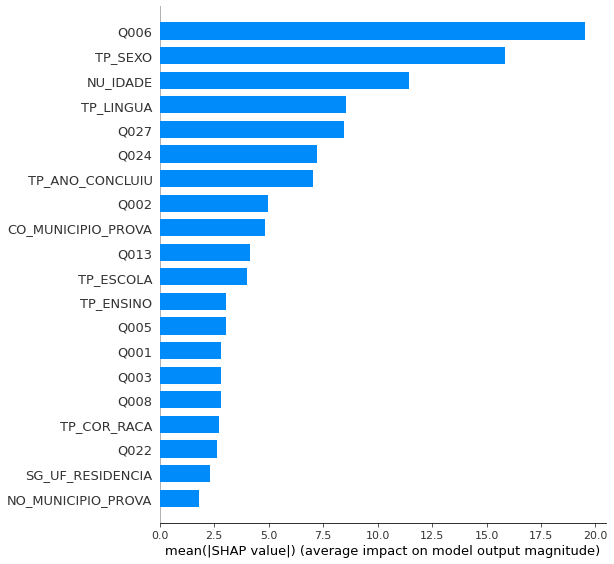

In [340]:
import shap

explainer = shap.TreeExplainer(model_mt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mt, test_size = 0.2)
model_redacao = model(y_redacao, 64)

[1]	valid_0's l1: 147.824	valid_0's l2: 34099.5
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 146.504	valid_0's l2: 33472.3
[3]	valid_0's l1: 145.296	valid_0's l2: 32900.7
[4]	valid_0's l1: 144.192	valid_0's l2: 32394.1
[5]	valid_0's l1: 143.17	valid_0's l2: 31923.5
[6]	valid_0's l1: 142.235	valid_0's l2: 31505.2
[7]	valid_0's l1: 141.389	valid_0's l2: 31119.4
[8]	valid_0's l1: 140.607	valid_0's l2: 30772.6
[9]	valid_0's l1: 139.88	valid_0's l2: 30447.6
[10]	valid_0's l1: 139.216	valid_0's l2: 30155.8
[11]	valid_0's l1: 138.614	valid_0's l2: 29891.7
[12]	valid_0's l1: 138.069	valid_0's l2: 29649.7
[13]	valid_0's l1: 137.555	valid_0's l2: 29424
[14]	valid_0's l1: 137.08	valid_0's l2: 29215.5
[15]	valid_0's l1: 136.637	valid_0's l2: 29027.8
[16]	valid_0's l1: 136.245	valid_0's l2: 28858
[17]	valid_0's l1: 135.875	valid_0's l2: 28694.2
[18]	valid_0's l1: 135.529	valid_0's l2: 28542.1
[19]	valid_0's l1: 135.215	valid_0's l2: 28408.5
[20]	valid_0's l1: 134.

[181]	valid_0's l1: 129.24	valid_0's l2: 26131.8
[182]	valid_0's l1: 129.241	valid_0's l2: 26131.8
[183]	valid_0's l1: 129.246	valid_0's l2: 26132.2
[184]	valid_0's l1: 129.246	valid_0's l2: 26134.3
[185]	valid_0's l1: 129.241	valid_0's l2: 26133
[186]	valid_0's l1: 129.241	valid_0's l2: 26133.2
[187]	valid_0's l1: 129.238	valid_0's l2: 26134.6
[188]	valid_0's l1: 129.234	valid_0's l2: 26136.4
[189]	valid_0's l1: 129.234	valid_0's l2: 26137.7
[190]	valid_0's l1: 129.241	valid_0's l2: 26139
[191]	valid_0's l1: 129.24	valid_0's l2: 26140.8
[192]	valid_0's l1: 129.244	valid_0's l2: 26142.7
[193]	valid_0's l1: 129.242	valid_0's l2: 26141.8
[194]	valid_0's l1: 129.236	valid_0's l2: 26140.2
[195]	valid_0's l1: 129.23	valid_0's l2: 26140
[196]	valid_0's l1: 129.23	valid_0's l2: 26138.6
[197]	valid_0's l1: 129.234	valid_0's l2: 26139.8
[198]	valid_0's l1: 129.244	valid_0's l2: 26141.8
[199]	valid_0's l1: 129.248	valid_0's l2: 26142.7
[200]	valid_0's l1: 129.247	valid_0's l2: 26142.4
[201]	vali

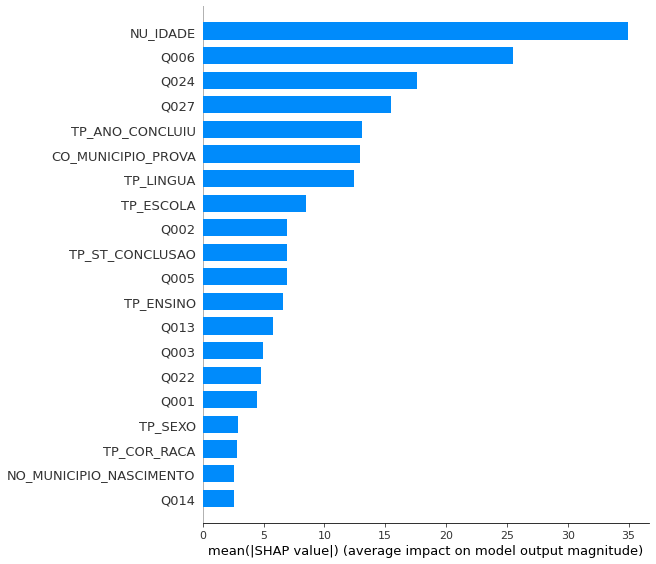

In [343]:
explainer = shap.TreeExplainer(model_redacao)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [358]:
y_pred_red = model_redacao.predict(X_test)

mean_squared_error(y_pred_red, y_test)**0.5/y_test.std()

0.9450458622198282

In [350]:
y_pred_red = model_redacao.predict(X_test)

mean_squared_error(y_pred_red, y_test)**0.5/y_test.std()

0.9473413518911872